# 1
# 租房数据
# 1

## 导入和加载

In [2]:
# ==================== 导入必要的库 ====================  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import re  
import warnings  
warnings.filterwarnings('ignore')  

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  
from sklearn.preprocessing import StandardScaler, LabelEncoder  
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
from sklearn.preprocessing import PolynomialFeatures  
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from scipy import stats  

# 设置显示选项  
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 100)  
pd.set_option('display.width', 1000)  

# 设置绘图风格  
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']  # 黑体、微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
plt.style.use('seaborn-v0_8-darkgrid')  
sns.set_palette("husl")  



In [3]:
# ==================== 1. 数据加载 ====================  
print("=" * 80)  
print("步骤 1: 数据加载")  
print("=" * 80)  

# 加载数据  
file_path = r"F:\大学之道\人工智能与python程序设计\Midterm_pj\ruc_Class25Q2_train_rent.csv"
df = pd.read_csv(file_path)  

print(f"数据形状: {df.shape}")  
print(f"\n数据列名:\n{df.columns.tolist()}")  
print(f"\n前5行数据:\n{df.head()}")  

步骤 1: 数据加载
数据形状: (98899, 46)

数据列名:
['城市', '户型', '装修', 'Price', '楼层', '面积', '朝向', '交易时间', '付款方式', '租赁方式', '电梯', '车位', '用水', '用电', '燃气', '采暖', '租期', '配套设施', 'lon', 'lat', '年份', '区县', '板块', '环线位置', '物业类别', '建筑年代', '开发商', '房屋总数', '楼栋总数', '物业公司', '绿 化 率', '容 积 率', '物 业 费', '建筑结构', '物业办公电话', '产权描述', '供水', '供暖', '供电', '燃气费', '供热费', '停车位', '停车费用', 'coord_x', 'coord_y', '客户反馈']

前5行数据:
   城市      户型   装修          Price      楼层      面积 朝向        交易时间 付款方式 租赁方式 电梯    车位  用水  用电 燃气    采暖      租期                         配套设施         lon        lat      年份     区县      板块  环线位置                                    物业类别        建筑年代            开发商   房屋总数 楼栋总数            物业公司 绿 化 率  容 积 率          物 业 费        建筑结构        物业办公电话                     产权描述     供水        供暖     供电            燃气费       供热费    停车位 停车费用     coord_x    coord_y                    客户反馈
0   0  1室1厅1卫  精装修  654646.481811    4/6层  36.42㎡  西  2024-11-28  季付价   整租  无   NaN  民水  民电  有  集中供暖      1年           洗衣机、空调、衣柜、热水器、床、宽带  117.3368


步骤 2: 探索性数据分析 (EDA)

--- 2.1 数据基本信息 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98899 entries, 0 to 98898
Data columns (total 46 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   城市       98899 non-null  int64  
 1   户型       98898 non-null  object 
 2   装修       25410 non-null  object 
 3   Price    98899 non-null  float64
 4   楼层       98894 non-null  object 
 5   面积       98899 non-null  object 
 6   朝向       98894 non-null  object 
 7   交易时间     98899 non-null  object 
 8   付款方式     80476 non-null  object 
 9   租赁方式     98899 non-null  object 
 10  电梯       98895 non-null  object 
 11  车位       24764 non-null  object 
 12  用水       81159 non-null  object 
 13  用电       81575 non-null  object 
 14  燃气       94317 non-null  object 
 15  采暖       34412 non-null  object 
 16  租期       51966 non-null  object 
 17  配套设施     68448 non-null  object 
 18  lon      98899 non-null  float64
 19  lat      98899 non-null  float64
 20  年份       

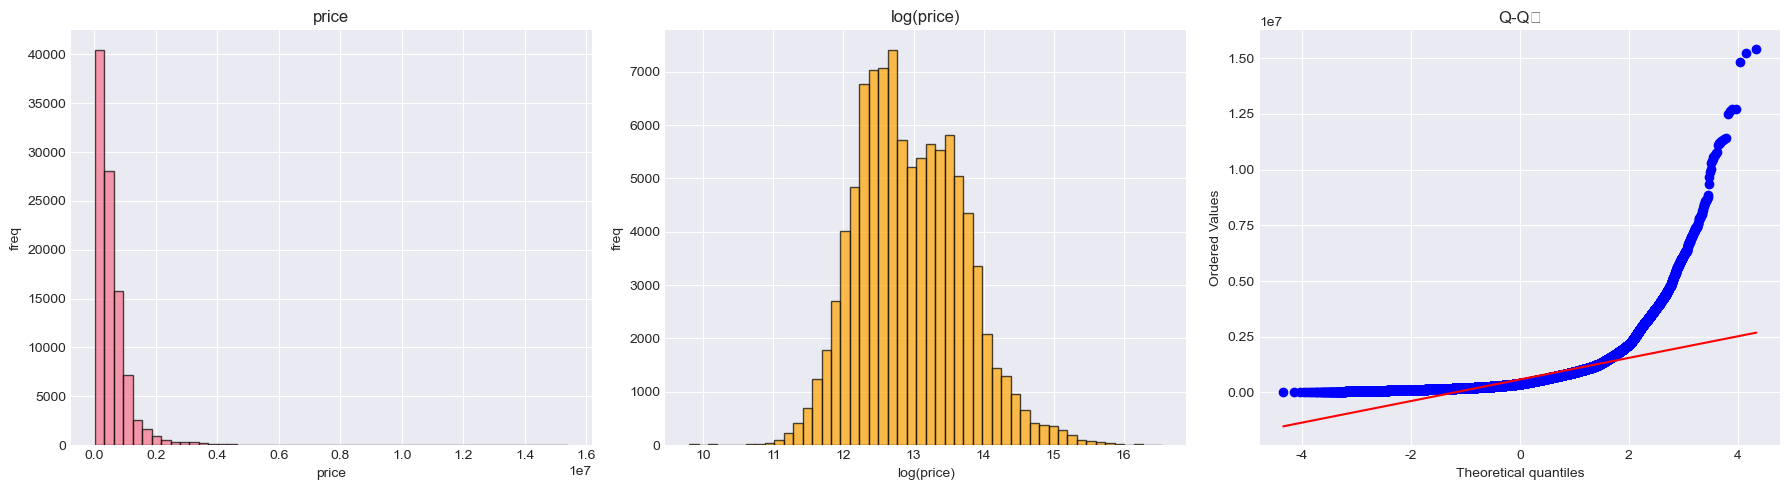

In [4]:
# ==================== 2. EDA（探索性数据分析）====================  
print("\n" + "=" * 80)  
print("步骤 2: 探索性数据分析 (EDA)")  
print("=" * 80)  

# 2.1 基本信息  
print("\n--- 2.1 数据基本信息 ---")  
print(df.info())  

# 2.2 统计描述  
print("\n--- 2.2 数值特征统计描述 ---")  
print(df.describe())  

# 2.3 缺失值分析  
print("\n--- 2.3 缺失值分析 ---")  
missing_data = pd.DataFrame({  
    '特征': df.columns,  
    '缺失数量': df.isnull().sum(),  
    '缺失比例': df.isnull().sum() / len(df) * 100  
})  
missing_data = missing_data[missing_data['缺失数量'] > 0].sort_values('缺失比例', ascending=False)  
print(missing_data)  

# 2.4 目标变量分析  
print("\n--- 2.4 目标变量(Price)分析 ---")  
print(f"价格统计:\n{df['Price'].describe()}")  
print(f"\n价格偏度: {df['Price'].skew():.2f}")  
print(f"价格峰度: {df['Price'].kurtosis():.2f}")  

# 可视化价格分布  
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

# 原始价格分布  
axes[0].hist(df['Price'], bins=50, edgecolor='black', alpha=0.7)  
axes[0].set_xlabel('price')  
axes[0].set_ylabel('freq')  
axes[0].set_title('price')  

# 对数价格分布  
axes[1].hist(np.log1p(df['Price']), bins=50, edgecolor='black', alpha=0.7, color='orange')  
axes[1].set_xlabel('log(price)')  
axes[1].set_ylabel('freq')  
axes[1].set_title('log(price)')  

# Q-Q图  
stats.probplot(df['Price'], dist="norm", plot=axes[2])  
axes[2].set_title('Q-Q图')  

plt.tight_layout()    
plt.show()  

## 创建缺失值列

In [30]:
print("=" * 80)
print("为缺失值创建0/1指示变量")
print("=" * 80)

# 获取所有有缺失值的列
missing_columns = df.columns[df.isnull().any()].tolist()

print(f"\n发现 {len(missing_columns)} 个特征存在缺失值")
print(f"将为这些特征创建缺失指示变量...\n")

# 为每个有缺失的列创建缺失指示变量
missing_indicator_features = []

for col in missing_columns:
    # 创建缺失指示变量
    indicator_col_name = f'{col}_is_missing'
    df[indicator_col_name] = df[col].isnull().astype(int)
    missing_indicator_features.append(indicator_col_name)
    
    # 统计缺失情况
    missing_count = df[indicator_col_name].sum()
    missing_pct = (missing_count / len(df)) * 100
    
    print(f"✓ {col:20s} -> {indicator_col_name:30s} | 缺失: {missing_count:6d} ({missing_pct:6.2f}%)")

print(f"\n{'='*80}")
print(f"成功创建 {len(missing_indicator_features)} 个缺失指示变量")
print(f"{'='*80}")

# 验证创建的指示变量
print("\n--- 验证缺失指示变量 ---")
print(f"原始数据形状: {df.shape}")
print(f"新增特征数量: {len(missing_indicator_features)}")

# 显示部分缺失指示变量的统计信息
print("\n缺失指示变量统计（前10个）:")
missing_indicator_stats = pd.DataFrame({
    '特征': missing_indicator_features[:10],
    '缺失数量(1的个数)': [df[col].sum() for col in missing_indicator_features[:10]],
    '非缺失数量(0的个数)': [len(df) - df[col].sum() for col in missing_indicator_features[:10]],
    '缺失比例': [df[col].mean() * 100 for col in missing_indicator_features[:10]]
})
print(missing_indicator_stats.to_string(index=False))

为缺失值创建0/1指示变量

发现 37 个特征存在缺失值
将为这些特征创建缺失指示变量...

✓ 户型                   -> 户型_is_missing                  | 缺失:      1 (  0.00%)
✓ 装修                   -> 装修_is_missing                  | 缺失:  73489 ( 74.31%)
✓ 楼层                   -> 楼层_is_missing                  | 缺失:      5 (  0.01%)
✓ 朝向                   -> 朝向_is_missing                  | 缺失:      5 (  0.01%)
✓ 付款方式                 -> 付款方式_is_missing                | 缺失:  18423 ( 18.63%)
✓ 电梯                   -> 电梯_is_missing                  | 缺失:      4 (  0.00%)
✓ 车位                   -> 车位_is_missing                  | 缺失:  74135 ( 74.96%)
✓ 用水                   -> 用水_is_missing                  | 缺失:  17740 ( 17.94%)
✓ 用电                   -> 用电_is_missing                  | 缺失:  17324 ( 17.52%)
✓ 燃气                   -> 燃气_is_missing                  | 缺失:   4582 (  4.63%)
✓ 采暖                   -> 采暖_is_missing                  | 缺失:  64487 ( 65.20%)
✓ 租期                   -> 租期_is_missing                  | 缺失:  46933 (

In [31]:
df_clean=df.copy()

## 特征提取

In [32]:
# ==================== 房屋户型特征提取 ====================

import re

def extract_room_info_optimized(room_str):
    """
    提取房屋户型中的房间数量
    处理格式：
    1. "X室X厅X厨X卫" - 标准格式
    2. "X房间X卫" - 简化格式
    3. 空值/缺失值
    """
    if pd.isna(room_str) or room_str == '':
        return {
            '卧室数量': np.nan,
            '客厅数量': np.nan,
            '厨房数量': np.nan,
            '卫生间数量': np.nan
        }
    
    room_str = str(room_str).strip()
    
    # 初始化结果
    result = {
        '卧室数量': np.nan,
        '客厅数量': np.nan,
        '厨房数量': np.nan,
        '卫生间数量': np.nan
    }
    
    # 提取卧室数量 (室)
    bedroom_match = re.search(r'(\d+)室', room_str)
    if bedroom_match:
        result['卧室数量'] = int(bedroom_match.group(1))
    
    # 如果没有"室"，尝试"房间"
    if pd.isna(result['卧室数量']):
        room_match = re.search(r'(\d+)房间', room_str)
        if room_match:
            result['卧室数量'] = int(room_match.group(1))
    
    # 提取客厅数量 (厅)
    living_match = re.search(r'(\d+)厅', room_str)
    if living_match:
        result['客厅数量'] = int(living_match.group(1))
    else:
        # 如果没有明确标注客厅，默认为0（如"X房间X卫"格式）
        if '房间' in room_str:
            result['客厅数量'] = 0
    
    # 提取厨房数量 (厨)
    kitchen_match = re.search(r'(\d+)厨', room_str)
    if kitchen_match:
        result['厨房数量'] = int(kitchen_match.group(1))
    else:
        # 如果没有明确标注厨房，默认为0（如"X房间X卫"格式）
        if '房间' in room_str:
            result['厨房数量'] = 0
    
    # 提取卫生间数量 (卫)
    bathroom_match = re.search(r'(\d+)卫', room_str)
    if bathroom_match:
        result['卫生间数量'] = int(bathroom_match.group(1))
    else:
        result['卫生间数量']=0
    
    return result

# ==================== 应用到数据集 ====================

print("=" * 80)
print("提取房屋户型特征")
print("=" * 80)

# 应用提取函数
room_features = df_clean['户型'].apply(extract_room_info_optimized)

# 将字典转换为DataFrame
room_features_df = pd.DataFrame(room_features.tolist())

# 添加到原数据集
df_clean['卧室数量'] = room_features_df['卧室数量']
df_clean['客厅数量'] = room_features_df['客厅数量']
df_clean['厨房数量'] = room_features_df['厨房数量']
df_clean['卫生间数量'] = room_features_df['卫生间数量']

# ==================== 验证提取结果 ====================

print("\n--- 提取结果验证 ---")
print("\n原始数据 vs 提取结果（前20行）：")
validation_df = pd.DataFrame({
    '户型': df_clean['户型'].head(20),
    '卧室': df_clean['卧室数量'].head(20),
    '客厅': df_clean['客厅数量'].head(20),
    '厨房': df_clean['厨房数量'].head(20),
    '卫生间': df_clean['卫生间数量'].head(20)
})
print(validation_df.to_string(index=False))



# 1. 卧室卫生间比例
df_clean['卧卫比'] = df_clean['卧室数量'] / (df_clean['卫生间数量'] + 1)

# 2. 房型完整性（是否所有信息都齐全）
df_clean['房型信息完整'] = (
    df_clean['卧室数量'].notna() & 
    df_clean['客厅数量'].notna() & 
    df_clean['厨房数量'].notna() & 
    df_clean['卫生间数量'].notna()
).astype(int)

print(f"房型信息完整比例: {df_clean['房型信息完整'].mean():.2%}")


new_room_features = [
    '卧室数量', '客厅数量', '厨房数量', '卫生间数量',
    '卧卫比', '房型信息完整'
]

print(f"\n新增房间相关特征: {new_room_features}")

print("\n" + "=" * 80)
print("房屋户型特征提取完成！")
print("=" * 80)

提取房屋户型特征

--- 提取结果验证 ---

原始数据 vs 提取结果（前20行）：
    户型  卧室  客厅  厨房  卫生间
1室1厅1卫 1.0 1.0 NaN  1.0
1室1厅1卫 1.0 1.0 NaN  1.0
1室1厅1卫 1.0 1.0 NaN  1.0
3室1厅2卫 3.0 1.0 NaN  2.0
1室1厅1卫 1.0 1.0 NaN  1.0
1室1厅1卫 1.0 1.0 NaN  1.0
1室1厅1卫 1.0 1.0 NaN  1.0
1室1厅1卫 1.0 1.0 NaN  1.0
1室1厅1卫 1.0 1.0 NaN  1.0
  3室2厅 3.0 2.0 NaN  0.0
1室1厅1卫 1.0 1.0 NaN  1.0
  4室2厅 4.0 2.0 NaN  0.0
  2室1厅 2.0 1.0 NaN  0.0
1室1厅1卫 1.0 1.0 NaN  1.0
  4室1厅 4.0 1.0 NaN  0.0
1室0厅1卫 1.0 0.0 NaN  1.0
1室1厅1卫 1.0 1.0 NaN  1.0
2室1厅1卫 2.0 1.0 NaN  1.0
2室1厅1卫 2.0 1.0 NaN  1.0
1室1厅1卫 1.0 1.0 NaN  1.0
房型信息完整比例: 1.28%

新增房间相关特征: ['卧室数量', '客厅数量', '厨房数量', '卫生间数量', '卧卫比', '房型信息完整']

房屋户型特征提取完成！


In [115]:
# ==================== 楼层信息解析 ====================
import pandas as pd
import numpy as np
import re

print("=" * 80)
print("楼层信息解析")
print("=" * 80)

def parse_floor_info(floor_str):
    """
    解析楼层信息，提取所在楼层和总楼层
    
    参数:
        floor_str: 楼层字符串
        
    返回:
        (当前楼层, 总楼层) 元组
    """
    if pd.isna(floor_str):
        return np.nan, np.nan
    
    floor_str = str(floor_str).strip()
    
    # 1. 处理地下室情况
    if '地下' in floor_str:
        # 提取总楼层（如果有）
        total_match = re.search(r'/(\d+)层', floor_str)
        total_floor = int(total_match.group(1)) if total_match else np.nan
        
        # 当前楼层统一赋值为-1
        return -1, total_floor
    
    # 2. 提取总楼层数
    total_match = re.search(r'/(\d+)层', floor_str)
    if total_match:
        total_floor = int(total_match.group(1))
    
    # 3. 确定当前楼层
    # 3.1 如果有具体数字（格式：数字/总层数）
    current_match = re.search(r'^(\d+)/', floor_str)
    if current_match:
        current_floor = int(current_match.group(1))
        return current_floor, total_floor
    
    # 3.2 如果是低/中/高楼层描述
    if '低楼层' in floor_str:
        if not pd.isna(total_floor):
            current_floor = total_floor * 0.2
        else:
            current_floor = np.nan
    elif '中楼层' in floor_str:
        if not pd.isna(total_floor):
            current_floor = total_floor * 0.5
        else:
            current_floor = np.nan
    elif '高楼层' in floor_str:
        if not pd.isna(total_floor):
            current_floor = total_floor * 0.8
        else:
            current_floor = np.nan
    else:
        current_floor = np.nan
    
    return current_floor, total_floor


# 应用解析函数
print("\n正在解析楼层信息...")

# 应用函数并创建新列
floor_info = df_clean['楼层'].apply(parse_floor_info)
df_clean['所在楼层'] = floor_info.apply(lambda x: x[0])
df_clean['总楼层'] = floor_info.apply(lambda x: x[1])

print("✓ 楼层信息解析完成")

# ==================== 验证和统计 ====================
print("\n" + "=" * 80)
print("解析结果验证")
print("=" * 80)

# 1. 基本统计
print("\n--- 所在楼层统计 ---")
print(df_clean['所在楼层'].describe())
print(f"\n地下楼层数量: {(df_clean['所在楼层'] == -1).sum()} ({(df_clean['所在楼层'] == -1).sum()/len(df_clean)*100:.2f}%)")
print(f"缺失值数量: {df_clean['所在楼层'].isna().sum()} ({df_clean['所在楼层'].isna().sum()/len(df_clean)*100:.2f}%)")

print("\n--- 总楼层统计 ---")
print(df_clean['总楼层'].describe())
print(f"缺失值数量: {df_clean['总楼层'].isna().sum()} ({df_clean['总楼层'].isna().sum()/len(df_clean)*100:.2f}%)")

# 2. 查看解析示例
print("\n" + "=" * 80)
print("解析示例展示")
print("=" * 80)

print("\n--- 示例1: 标准格式（低/中/高楼层） ---")
sample_standard = df_clean[df_clean['楼层'].str.contains('低楼层|中楼层|高楼层', na=False)][['楼层', '所在楼层', '总楼层']].head(15)
print(sample_standard.to_string(index=False))

print("\n--- 示例2: 数字格式 ---")
sample_numeric = df_clean[df_clean['楼层'].str.match(r'^\d+/', na=False)][['楼层', '所在楼层', '总楼层']].head(10)
if len(sample_numeric) > 0:
    print(sample_numeric.to_string(index=False))
else:
    print("未找到数字格式的楼层数据")

print("\n--- 示例3: 地下楼层 ---")
sample_underground = df_clean[df_clean['楼层'].str.contains('地下', na=False)][['楼层', '所在楼层', '总楼层']].head(10)
if len(sample_underground) > 0:
    print(sample_underground.to_string(index=False))
else:
    print("未找到地下楼层数据")



# 3. 创建楼层比例特征
print("\n" + "=" * 80)
print("创建衍生特征")
print("=" * 80)

# 楼层比例（排除地下室）
df_clean['楼层比例'] = np.where(
    (df_clean['所在楼层'] > 0) & (df_clean['总楼层'] > 0),
    df_clean['所在楼层'] / df_clean['总楼层'],
    np.nan
)

print("\n--- 楼层比例统计 ---")
print(df_clean['楼层比例'].describe())




# 4. 生成楼层特征汇总报告
print("\n" + "=" * 80)
print("楼层特征汇总")
print("=" * 80)

floor_summary = {
    '原始楼层特征': ['楼层'],
    '新增数值特征': ['所在楼层', '总楼层', '楼层比例'],
}

print("\n创建的楼层相关特征:")
for key, values in floor_summary.items():
    print(f"  {key}: {', '.join(values)}")


楼层信息解析

正在解析楼层信息...
✓ 楼层信息解析完成

解析结果验证

--- 所在楼层统计 ---
count    98894.000000
mean        10.117064
std          7.775240
min         -1.000000
25%          4.000000
50%          7.000000
75%         15.000000
max         48.000000
Name: 所在楼层, dtype: float64

地下楼层数量: 259 (0.26%)
缺失值数量: 5 (0.01%)

--- 总楼层统计 ---
count    98887.000000
mean        19.812412
std         11.110064
min          0.000000
25%          9.000000
50%         18.000000
75%         29.000000
max         75.000000
Name: 总楼层, dtype: float64
缺失值数量: 12 (0.01%)

解析示例展示

--- 示例1: 标准格式（低/中/高楼层） ---
     楼层  所在楼层  总楼层
中楼层/25层  12.5 25.0
高楼层/11层   8.8 11.0
 中楼层/5层   2.5  5.0
中楼层/12层   6.0 12.0
低楼层/28层   5.6 28.0
中楼层/56层  28.0 56.0
低楼层/22层   4.4 22.0
 高楼层/7层   5.6  7.0
 中楼层/6层   3.0  6.0
 低楼层/3层   0.6  3.0
低楼层/27层   5.4 27.0
低楼层/17层   3.4 17.0
低楼层/14层   2.8 14.0
高楼层/29层  23.2 29.0
中楼层/26层  13.0 26.0

--- 示例2: 数字格式 ---
    楼层  所在楼层  总楼层
  4/6层   4.0  6.0
  4/6层   4.0  6.0
 1/18层   1.0 18.0
 1/10层   1.0 10.0
18/18层  18.0 18.0
17

In [34]:
print("=" * 80)  
print("解析面积特征")  
print("=" * 80)  

# 查看原始面积数据  
print("\n--- 原始面积数据样本 ---")  
print(f"面积列数据类型: {df_clean['面积'].dtype}")  
print(f"面积列总数: {len(df_clean['面积'])}")  
print(f"面积列缺失数: {df_clean['面积'].isnull().sum()}")  
print(f"\n前20行面积数据:")  
print(df_clean['面积'].head(20))  

# 定义面积提取函数  
def extract_area(area_str):  
    """  
    从面积字符串中提取数值  
    例如: '100.00㎡' -> 100.00  
         '136㎡' -> 136.0  
         None -> NaN  
         '' -> NaN  
    """  
    # 处理空值  
    if pd.isna(area_str):  
        return np.nan  
    
    # 转换为字符串  
    area_str = str(area_str).strip()  
    
    # 处理空字符串  
    if area_str == '' or area_str.lower() == 'nan':  
        return np.nan  
    
    # 使用正则表达式提取数字（包括小数）  
    # 匹配模式：可能有负号，然后是数字，可能有小数点和小数部分  
    match = re.search(r'(-?\d+\.?\d*)', area_str)  
    
    if match:  
        try:  
            area_value = float(match.group(1))  
            # 验证合理性（面积应该为正数且在合理范围内）  
            if area_value > 0 and area_value < 10000:  # 假设最大10000平米  
                return area_value  
            else:  
                return np.nan  
        except ValueError:  
            return np.nan  
    else:  
        return np.nan  

# 应用提取函数  
print("\n--- 提取面积数值 ---")  
df_clean['面积_数值'] = df_clean['面积'].apply(extract_area)  

# 统计提取结果  
print(f"\n提取完成！")  
print(f"原始面积列缺失数: {df_clean['面积'].isnull().sum()}")  
print(f"提取后缺失数: {df_clean['面积_数值'].isnull().sum()}")  
print(f"成功提取数值: {df_clean['面积_数值'].notna().sum()} 条")  
print(f"提取失败/新增缺失: {df_clean['面积_数值'].isnull().sum() - df_clean['面积'].isnull().sum()} 条")  

# 显示提取结果样本  
print("\n--- 提取结果对比（前20行）---")  
comparison_df = pd.DataFrame({  
    '原始面积': df_clean['面积'].head(20),  
    '提取数值': df_clean['面积_数值'].head(20)  
})  
print(comparison_df.to_string())  

# 统计描述  
print("\n--- 面积数值统计描述 ---")  
print(df_clean['面积_数值'].describe())  


解析面积特征

--- 原始面积数据样本 ---
面积列数据类型: object
面积列总数: 98899
面积列缺失数: 0

前20行面积数据:
0      36.42㎡
1      41.00㎡
2      37.36㎡
3      55.42㎡
4      49.30㎡
5      42.00㎡
6      42.00㎡
7      42.12㎡
8      42.12㎡
9     176.00㎡
10     41.30㎡
11    265.54㎡
12     55.50㎡
13     27.09㎡
14    236.73㎡
15     57.36㎡
16     59.97㎡
17     65.00㎡
18     57.50㎡
19     27.00㎡
Name: 面积, dtype: object

--- 提取面积数值 ---

提取完成！
原始面积列缺失数: 0
提取后缺失数: 0
成功提取数值: 98899 条
提取失败/新增缺失: 0 条

--- 提取结果对比（前20行）---
       原始面积    提取数值
0    36.42㎡   36.42
1    41.00㎡   41.00
2    37.36㎡   37.36
3    55.42㎡   55.42
4    49.30㎡   49.30
5    42.00㎡   42.00
6    42.00㎡   42.00
7    42.12㎡   42.12
8    42.12㎡   42.12
9   176.00㎡  176.00
10   41.30㎡   41.30
11  265.54㎡  265.54
12   55.50㎡   55.50
13   27.09㎡   27.09
14  236.73㎡  236.73
15   57.36㎡   57.36
16   59.97㎡   59.97
17   65.00㎡   65.00
18   57.50㎡   57.50
19   27.00㎡   27.00

--- 面积数值统计描述 ---
count    98899.000000
mean        80.506477
std         42.643602
min          6.05000

In [35]:
# ==================== 处理房屋朝向（八个方向）====================
print("\n--- 处理朝向特征（八个方向）---")

def extract_orientation_features(orientation_str):
    """
    提取房屋朝向的八个方向特征
    返回：东、南、西、北、东南、东北、西南、西北的0/1标记
    如果原始数据为空，则返回nan
    """
    # 如果是空值，返回全nan
    if pd.isna(orientation_str):
        return {
            '朝东': np.nan,
            '朝南': np.nan,
            '朝西': np.nan,
            '朝北': np.nan,
            '朝东南': np.nan,
            '朝东北': np.nan,
            '朝西南': np.nan,
            '朝西北': np.nan
        }
    
    orientation_str = str(orientation_str).strip()
    
    # 如果字符串为空，返回全nan
    if orientation_str == '' or orientation_str == 'nan':
        return {
            '朝东': np.nan,
            '朝南': np.nan,
            '朝西': np.nan,
            '朝北': np.nan,
            '朝东南': np.nan,
            '朝东北': np.nan,
            '朝西南': np.nan,
            '朝西北': np.nan
        }
    
    # 初始化八个方向为0
    result = {
        '朝东': 0,
        '朝南': 0,
        '朝西': 0,
        '朝北': 0,
        '朝东南': 0,
        '朝东北': 0,
        '朝西南': 0,
        '朝西北': 0
    }
    
    # 先检查复合方向（两个字的方向，如"东南"、"东北"等）
    # 注意：要先检查复合方向，避免被单个方向匹配到
    if '东南' in orientation_str:
        result['朝东南'] = 1
    if '东北' in orientation_str:
        result['朝东北'] = 1
    if '西南' in orientation_str:
        result['朝西南'] = 1
    if '西北' in orientation_str:
        result['朝西北'] = 1
    
    # 再检查单个方向
    # 使用边界匹配，避免"东南"中的"东"被重复匹配
    # 检查是否有独立的"东"（不是"东南"或"东北"的一部分）
    if re.search(r'(?<!东)东(?![南北])', orientation_str) or \
       (orientation_str.startswith('东') and len(orientation_str) == 1):
        result['朝东'] = 1
    
    if '南' in orientation_str and '东南' not in orientation_str and '西南' not in orientation_str:
        # 检查是否是独立的"南"
        if re.search(r'(?<![东西])南', orientation_str):
            result['朝南'] = 1
    
    if re.search(r'(?<!西)西(?![南北])', orientation_str) or \
       (orientation_str.startswith('西') and len(orientation_str) == 1):
        result['朝西'] = 1
    
    if '北' in orientation_str and '东北' not in orientation_str and '西北' not in orientation_str:
        if re.search(r'(?<![东西])北', orientation_str):
            result['朝北'] = 1
    
    return result

# 应用提取函数
orientation_features = df_clean['朝向'].apply(extract_orientation_features)

# 将字典列表转换为DataFrame
orientation_df = pd.DataFrame(orientation_features.tolist())

# 添加到原数据框
for col in orientation_df.columns:
    df_clean[col] = orientation_df[col]

# 统计各方向的分布
print("\n各朝向的分布统计：")
for col in ['朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北']:
    valid_count = df_clean[col].notna().sum()
    has_orientation = (df_clean[col] == 1).sum()
    no_orientation = (df_clean[col] == 0).sum()
    nan_count = df_clean[col].isna().sum()
    
    print(f"\n{col}:")
    print(f"  有该朝向: {has_orientation} ({has_orientation/valid_count*100:.2f}% of valid)")
    print(f"  无该朝向: {no_orientation} ({no_orientation/valid_count*100:.2f}% of valid)")
    print(f"  缺失值: {nan_count} ({nan_count/len(df_clean)*100:.2f}% of total)")

# 创建朝向总数特征（只统计有效值）
def count_orientations(row):
    """统计房屋的朝向数量"""
    orientations = ['朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北']
    
    # 如果所有朝向都是nan，返回nan
    if all(pd.isna(row[o]) for o in orientations):
        return np.nan
    
    # 否则统计1的数量
    return sum(row[o] == 1 for o in orientations)

df_clean['朝向总数'] = df_clean.apply(count_orientations, axis=1)

print(f"\n朝向总数分布:")
print(df_clean['朝向总数'].value_counts(dropna=False).sort_index())

# 创建一些衍生特征
# 是否为单一朝向
df_clean['是否单一朝向'] = (df_clean['朝向总数'] == 1).astype(float)
df_clean.loc[df_clean['朝向总数'].isna(), '是否单一朝向'] = np.nan

# 是否为南北通透
df_clean['是否南北通透'] = ((df_clean['朝南'] == 1) & (df_clean['朝北'] == 1)).astype(float)
df_clean.loc[(df_clean['朝南'].isna()) | (df_clean['朝北'].isna()), '是否南北通透'] = np.nan

# 是否为东西通透
df_clean['是否东西通透'] = ((df_clean['朝东'] == 1) & (df_clean['朝西'] == 1)).astype(float)
df_clean.loc[(df_clean['朝东'].isna()) | (df_clean['朝西'].isna()), '是否东西通透'] = np.nan

# 是否有南向（南向房屋通常更受欢迎）
df_clean['是否有南向'] = ((df_clean['朝南'] == 1) | (df_clean['朝东南'] == 1) | (df_clean['朝西南'] == 1)).astype(float)
df_clean.loc[(df_clean['朝南'].isna()) & (df_clean['朝东南'].isna()) & (df_clean['朝西南'].isna()), '是否有南向'] = np.nan

print(f"\n南北通透房屋数量: {(df_clean['是否南北通透'] == 1).sum()}")
print(f"东西通透房屋数量: {(df_clean['是否东西通透'] == 1).sum()}")
print(f"有南向房屋数量: {(df_clean['是否有南向'] == 1).sum()}")

# 显示一些样例
print("\n前20行朝向特征示例：")
orientation_cols = ['朝向', '朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北', '朝向总数']
print(df_clean[orientation_cols].head(20).to_string())


--- 处理朝向特征（八个方向）---

各朝向的分布统计：

朝东:
  有该朝向: 8593 (8.69% of valid)
  无该朝向: 90301 (91.31% of valid)
  缺失值: 5 (0.01% of total)

朝南:
  有该朝向: 62319 (63.02% of valid)
  无该朝向: 36575 (36.98% of valid)
  缺失值: 5 (0.01% of total)

朝西:
  有该朝向: 4889 (4.94% of valid)
  无该朝向: 94005 (95.06% of valid)
  缺失值: 5 (0.01% of total)

朝北:
  有该朝向: 24250 (24.52% of valid)
  无该朝向: 74644 (75.48% of valid)
  缺失值: 5 (0.01% of total)

朝东南:
  有该朝向: 11926 (12.06% of valid)
  无该朝向: 86968 (87.94% of valid)
  缺失值: 5 (0.01% of total)

朝东北:
  有该朝向: 1696 (1.71% of valid)
  无该朝向: 97198 (98.29% of valid)
  缺失值: 5 (0.01% of total)

朝西南:
  有该朝向: 4232 (4.28% of valid)
  无该朝向: 94662 (95.72% of valid)
  缺失值: 5 (0.01% of total)

朝西北:
  有该朝向: 1675 (1.69% of valid)
  无该朝向: 97219 (98.31% of valid)
  缺失值: 5 (0.01% of total)

朝向总数分布:
朝向总数
0.0        9
1.0    78678
2.0    19773
3.0      381
4.0       52
5.0        1
NaN        5
Name: count, dtype: int64

南北通透房屋数量: 17060
东西通透房屋数量: 1010
有南向房屋数量: 78324

前20行朝向特征示例：
     朝向   朝东   朝南   朝西 

In [36]:
print("=" * 80)
print("付款方式 One-Hot 编码")
print("=" * 80)

# 定义付款方式的可能取值
payment_methods = ['半年付价', '季付价', '年付价', '双月付价', '月付价']

print(f"\n指定的付款方式类别: {payment_methods}")

# 检查原始数据
if '付款方式' in df_clean.columns:
    print(f"\n--- 原始数据分析 ---")
    print(f"付款方式列的唯一值数量: {df_clean['付款方式'].nunique()}")
    print(f"付款方式列的缺失数量: {df_clean['付款方式'].isnull().sum()}")
    print(f"付款方式列的缺失比例: {df_clean['付款方式'].isnull().sum() / len(df_clean) * 100:.2f}%")
    
    # 显示所有唯一值及其数量
    print(f"\n付款方式取值分布:")
    value_counts = df_clean['付款方式'].value_counts(dropna=False)
    print(value_counts)
    
    # 检查是否有不在指定列表中的值
    non_null_values = df_clean['付款方式'].dropna().unique()
    unexpected_values = [v for v in non_null_values if v not in payment_methods]
    
    if unexpected_values:
        print(f"\n⚠️ 发现 {len(unexpected_values)} 个未在指定列表中的值:")
        for val in unexpected_values[:10]:  # 只显示前10个
            count = (df_clean['付款方式'] == val).sum()
            print(f"  - '{val}': {count} 条")
    else:
        print(f"\n✓ 所有非空值都在指定列表中")
    
    # 创建 One-Hot 编码
    print(f"\n--- 创建 One-Hot 编码 ---")
    
    for method in payment_methods:
        col_name = f'付款方式_{method}'
        
        # 只有当付款方式完全匹配时才标记为1，缺失值和其他值都为0
        df_clean[col_name] = (df_clean['付款方式'] == method).astype(int)
        
        count = df_clean[col_name].sum()
        percentage = (count / len(df_clean)) * 100
        
        print(f"✓ 创建 {col_name:20s} | 数量: {count:6d} ({percentage:5.2f}%)")
    
    # 验证结果
    print(f"\n--- 验证 One-Hot 编码 ---")
    
    # 检查每行最多只有一个1
    onehot_cols = [f'付款方式_{method}' for method in payment_methods]
    row_sums = df_clean[onehot_cols].sum(axis=1)
    
    print(f"每行One-Hot列的和的分布:")
    print(row_sums.value_counts().sort_index())
    
    # 计算有多少行是全0（缺失值或其他值）
    all_zero_count = (row_sums == 0).sum()
    one_count = (row_sums == 1).sum()
    multi_count = (row_sums > 1).sum()
    
    print(f"\n统计:")
    print(f"  - 全0的行数（缺失或其他值）: {all_zero_count:6d} ({all_zero_count/len(df_clean)*100:5.2f}%)")
    print(f"  - 恰好1个1的行数: {one_count:6d} ({one_count/len(df_clean)*100:5.2f}%)")
    print(f"  - 多于1个1的行数: {multi_count:6d} ({multi_count/len(df_clean)*100:5.2f}%)")
    
    # 显示示例
    print(f"\n--- 示例展示 ---")
    print(f"原始付款方式列和对应的One-Hot编码（前20行）:\n")
    
    display_cols = ['付款方式'] + onehot_cols
    sample_df = df_clean[display_cols].head(20).copy()
    
    # 添加行总和列以便查看
    sample_df['One-Hot总和'] = df_clean[onehot_cols].head(20).sum(axis=1)
    
    print(sample_df.to_string(index=True))
    
    # 详细分析：展示每种付款方式的示例
    print(f"\n--- 每种付款方式的示例 ---")
    for method in payment_methods:
        col_name = f'付款方式_{method}'
        matching_rows = df_clean[df_clean[col_name] == 1]
        
        if len(matching_rows) > 0:
            print(f"\n{method} 的示例 (共 {len(matching_rows)} 条):")
            print(matching_rows[['付款方式'] + onehot_cols].head(3).to_string(index=False))
    
    # 展示缺失值和其他值的示例
    all_zero_rows = df_clean[row_sums == 0]
    if len(all_zero_rows) > 0:
        print(f"\n缺失值或其他值的示例 (共 {len(all_zero_rows)} 条，显示前5条):")
        print(all_zero_rows[['付款方式'] + onehot_cols].head(5).to_string(index=False))
    
    # 生成汇总报告
    print(f"\n" + "=" * 80)
    print("One-Hot 编码汇总报告")
    print("=" * 80)
    
    summary_data = []
    for method in payment_methods:
        col_name = f'付款方式_{method}'
        count = df_clean[col_name].sum()
        percentage = (count / len(df_clean)) * 100
        summary_data.append({
            '付款方式': method,
            'One-Hot列名': col_name,
            '数量': count,
            '占比(%)': f'{percentage:.2f}',
            '是否创建': '✓'
        })
    
    summary_df = pd.DataFrame(summary_data)
    print(f"\n{summary_df.to_string(index=False)}")

付款方式 One-Hot 编码

指定的付款方式类别: ['半年付价', '季付价', '年付价', '双月付价', '月付价']

--- 原始数据分析 ---
付款方式列的唯一值数量: 7
付款方式列的缺失数量: 18423
付款方式列的缺失比例: 18.63%

付款方式取值分布:
付款方式
季付价                               54530
月付价                               20955
NaN                               18423
半年付价                               4194
年付价                                 748
双月付价                                 44
https://img.ljcdn.com/usercent        3
https://image1.ljcdn.com/rent-        2
Name: count, dtype: int64

⚠️ 发现 2 个未在指定列表中的值:
  - 'https://image1.ljcdn.com/rent-': 2 条
  - 'https://img.ljcdn.com/usercent': 3 条

--- 创建 One-Hot 编码 ---
✓ 创建 付款方式_半年付价            | 数量:   4194 ( 4.24%)
✓ 创建 付款方式_季付价             | 数量:  54530 (55.14%)
✓ 创建 付款方式_年付价             | 数量:    748 ( 0.76%)
✓ 创建 付款方式_双月付价            | 数量:     44 ( 0.04%)
✓ 创建 付款方式_月付价             | 数量:  20955 (21.19%)

--- 验证 One-Hot 编码 ---
每行One-Hot列的和的分布:
0    18428
1    80471
Name: count, dtype: int64

统计:
  - 全0的行数（缺失或其他值）:  18428 (18.63%)
  - 恰好1个

In [37]:
# ==================== 租赁方式 One-Hot 编码 ====================  
import pandas as pd  
import numpy as np  

print("=" * 80)  
print("租赁方式 One-Hot 编码处理")  
print("=" * 80)  

# 1. 首先查看租赁方式的分布情况  
print("\n--- 1. 租赁方式数据探索 ---")  

if '租赁方式' in df_clean.columns:  
    print(f"\n租赁方式的类别分布:")  
    rental_type_counts = df_clean['租赁方式'].value_counts(dropna=False)  
    print(rental_type_counts)  
    
    print(f"\n租赁方式的类别占比:")  
    rental_type_pct = df_clean['租赁方式'].value_counts(normalize=True, dropna=False) * 100  
    for category, pct in rental_type_pct.items():  
        print(f"  {category}: {pct:.2f}%")  
    
    # 检查缺失值  
    missing_count = df_clean['租赁方式'].isnull().sum()  
    missing_pct = (missing_count / len(df_clean)) * 100  
    print(f"\n缺失值情况:")  
    print(f"  缺失数量: {missing_count}")  
    print(f"  缺失比例: {missing_pct:.2f}%")  
    
    # 唯一值数量  
    unique_values = df_clean['租赁方式'].nunique()  
    print(f"\n唯一类别数量: {unique_values}")  
    
    # 2. 处理缺失值（如果存在）  
    print("\n--- 2. 处理缺失值 ---")  
    if missing_count > 0:  
        print(f"发现 {missing_count} 个缺失值")  
        # 选项1: 填充为 "未知" 或最常见的值  
        mode_value = df_clean['租赁方式'].mode()[0] if len(df_clean['租赁方式'].mode()) > 0 else '整租'  
        print(f"将缺失值填充为: '{mode_value}'")  
        df_clean['租赁方式'] = df_clean['租赁方式'].fillna(mode_value)  
        print("✓ 缺失值填充完成")  
    else:  
        print("✓ 无缺失值，无需处理")  
    
    # 3. One-Hot 编码  
    print("\n--- 3. One-Hot 编码 ---")  
    
    # 方法1: 使用 pd.get_dummies() 并设置 drop_first=True  
    print("\n使用 pd.get_dummies() 进行 One-Hot 编码...")  
    
    # 保存原始列名用于后续删除  
    original_column = '租赁方式'  
    
    # 创建 One-Hot 编码，drop_first=True 会自动删除第一个类别  
    rental_dummies = pd.get_dummies(df_clean['租赁方式'],   
                                    prefix='租赁方式',   
                                    drop_first=True,  
                                    dtype=int)  
    
    print(f"✓ One-Hot 编码完成")  
    print(f"  原始特征: 1 列 ('{original_column}')")  
    print(f"  编码后特征: {rental_dummies.shape[1]} 列")  
    print(f"  新增特征列名: {rental_dummies.columns.tolist()}")  
    
    # 显示被删除的基准类别（reference category）  
    all_categories = df_clean['租赁方式'].unique()  
    dropped_category = [cat for cat in all_categories   
                       if f'租赁方式_{cat}' not in rental_dummies.columns]  
    print(f"\n  基准类别(已删除): {dropped_category}")  
    print(f"  保留类别: {[col.replace('租赁方式_', '') for col in rental_dummies.columns.tolist()]}")  
    
    # 4. 将 One-Hot 编码的列添加到原数据集  
    print("\n--- 4. 添加到原数据集 ---")  
    
    # 获取原始列的位置  
    original_position = df_clean.columns.get_loc(original_column)  
    
    # 将新列插入到原始列的位置  
    for i, col in enumerate(rental_dummies.columns):  
        df_clean.insert(original_position + i + 1, col, rental_dummies[col])  
    
    print(f"✓ 已将 {len(rental_dummies.columns)} 个 One-Hot 编码列添加到数据集")  
    
    # 5. 删除原始的租赁方式列  
    print("\n--- 5. 删除原始列 ---")  
    df_before = df_clean.shape[1]  
    df_clean = df_clean.drop(columns=[original_column])  
    df_after = df_clean.shape[1]  
    
    print(f"✓ 已删除原始列 '{original_column}'")  
    print(f"  删除前列数: {df_before}")  
    print(f"  删除后列数: {df_after}")  
    print(f"  净增加列数: {df_after - df_before + 1}")  
    
    # 6. 验证编码结果  
    print("\n--- 6. 验证编码结果 ---")  
    
    print("\n新增 One-Hot 编码列的统计信息:")  
    onehot_stats = pd.DataFrame({  
        '列名': rental_dummies.columns,  
        '为1的数量': [rental_dummies[col].sum() for col in rental_dummies.columns],  
        '为1的比例(%)': [rental_dummies[col].mean() * 100 for col in rental_dummies.columns],  
        '数据类型': [rental_dummies[col].dtype for col in rental_dummies.columns]  
    })  
    print(onehot_stats.to_string(index=False))  
    
    # 显示前10行示例  
    print("\n前10行数据示例（仅显示 One-Hot 编码列）:")  
    print(df_clean[rental_dummies.columns].head(10).to_string()) 

租赁方式 One-Hot 编码处理

--- 1. 租赁方式数据探索 ---

租赁方式的类别分布:
租赁方式
整租    93009
合租     5890
Name: count, dtype: int64

租赁方式的类别占比:
  整租: 94.04%
  合租: 5.96%

缺失值情况:
  缺失数量: 0
  缺失比例: 0.00%

唯一类别数量: 2

--- 2. 处理缺失值 ---
✓ 无缺失值，无需处理

--- 3. One-Hot 编码 ---

使用 pd.get_dummies() 进行 One-Hot 编码...
✓ One-Hot 编码完成
  原始特征: 1 列 ('租赁方式')
  编码后特征: 1 列
  新增特征列名: ['租赁方式_整租']

  基准类别(已删除): ['合租']
  保留类别: ['整租']

--- 4. 添加到原数据集 ---
✓ 已将 1 个 One-Hot 编码列添加到数据集

--- 5. 删除原始列 ---
✓ 已删除原始列 '租赁方式'
  删除前列数: 112
  删除后列数: 111
  净增加列数: 0

--- 6. 验证编码结果 ---

新增 One-Hot 编码列的统计信息:
     列名  为1的数量  为1的比例(%)  数据类型
租赁方式_整租  93009 94.044429 int32

前10行数据示例（仅显示 One-Hot 编码列）:
   租赁方式_整租
0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1


In [38]:
# ==================== 3.6 处理配备电梯（改进版）====================
print("\n--- 3.6 处理配备电梯 ---")

def extract_elevator(elevator_str):
    """
    提取电梯信息并编码为0/1
    - '有' -> 1
    - '无' -> 0
    - NaN/空值 -> 0
    """
    if pd.isna(elevator_str):
        return 0
    
    elevator_str = str(elevator_str).strip()
    
    if elevator_str == '有':
        return 1
    else:
        return 0

# 应用电梯特征提取
df_clean['有电梯'] = df_clean['电梯'].apply(extract_elevator)

# 验证处理结果
print(f"配备电梯原始值分布:\n{df_clean['电梯'].value_counts(dropna=False)}")
print(f"\n有电梯编码分布:\n{df_clean['有电梯'].value_counts()}")
print(f"\n有电梯比例: {df_clean['有电梯'].mean()*100:.2f}%")


--- 3.6 处理配备电梯 ---
配备电梯原始值分布:
电梯
有      69234
无      29661
NaN        4
Name: count, dtype: int64

有电梯编码分布:
有电梯
1    69234
0    29665
Name: count, dtype: int64

有电梯比例: 70.00%


In [39]:
# ==================== 车位特征 One-Hot 编码 ====================
import pandas as pd
import numpy as np

print("=" * 80)
print("车位特征 One-Hot 编码")
print("=" * 80)

# 1. 查看车位特征的基本信息
print("\n--- 1. 车位特征原始数据分析 ---")
print(f"数据类型: {df_clean['车位'].dtype}")
print(f"总样本数: {len(df_clean)}")
print(f"缺失值数量: {df_clean['车位'].isnull().sum()} ({df_clean['车位'].isnull().sum()/len(df_clean)*100:.2f}%)")
print(f"非缺失值数量: {df_clean['车位'].notnull().sum()}")

print("\n车位特征唯一值及其数量:")
print(df_clean['车位'].value_counts(dropna=False))

print("\n车位特征前20行:")
print(df_clean['车位'].head(20))

# 2. 进行 One-Hot 编码
print("\n--- 2. 执行 One-Hot 编码 ---")

# 保存原始的缺失情况（已经有了 车位_is_missing）
if '车位_is_missing' not in df_clean.columns:
    df_clean['车位_is_missing'] = df_clean['车位'].isnull().astype(int)
    print("✓ 已创建缺失指示变量: 车位_is_missing")

# 方法1：使用 pd.get_dummies，drop_first=True
# 这种方法会自动处理缺失值（缺失值在所有哑变量中都是0）
parking_dummies = pd.get_dummies(df_clean['车位'], prefix='车位', drop_first=True, dummy_na=False, dtype=int)

print(f"\n✓ One-Hot 编码完成")
print(f"  原始特征: 车位")
print(f"  生成的哑变量列: {parking_dummies.columns.tolist()}")
print(f"  哑变量数量: {len(parking_dummies.columns)}")

# 3. 查看编码结果
print("\n--- 3. 编码结果展示 ---")

# 显示哑变量的统计信息
print("\n各哑变量的统计:")
for col in parking_dummies.columns:
    count_1 = parking_dummies[col].sum()
    count_0 = len(parking_dummies) - count_1
    pct_1 = count_1 / len(parking_dummies) * 100
    print(f"  {col:30s}: 1的数量={count_1:6d} ({pct_1:5.2f}%), 0的数量={count_0:6d}")


车位特征 One-Hot 编码

--- 1. 车位特征原始数据分析 ---
数据类型: object
总样本数: 98899
缺失值数量: 74135 (74.96%)
非缺失值数量: 24764

车位特征唯一值及其数量:
车位
NaN     74135
租用车位    20319
免费使用     4445
Name: count, dtype: int64

车位特征前20行:
0      NaN
1      NaN
2     租用车位
3     租用车位
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11    免费使用
12    免费使用
13     NaN
14     NaN
15    租用车位
16    租用车位
17    租用车位
18     NaN
19    租用车位
Name: 车位, dtype: object

--- 2. 执行 One-Hot 编码 ---

✓ One-Hot 编码完成
  原始特征: 车位
  生成的哑变量列: ['车位_租用车位']
  哑变量数量: 1

--- 3. 编码结果展示 ---

各哑变量的统计:
  车位_租用车位                       : 1的数量= 20319 (20.55%), 0的数量= 78580


In [40]:
# ==================== One-Hot 编码 ====================
import pandas as pd

# 需要编码的列
columns_to_encode = ['用水', '用电', '燃气', '采暖']

print("对以下列进行 One-Hot 编码（drop_first=True）:")
print(columns_to_encode)
print()

# 执行 One-Hot 编码
for col in columns_to_encode:
    if col in df_clean.columns:
        # 查看该列的唯一值
        unique_values = df_clean[col].value_counts(dropna=False)
        print(f"{col}: {len(unique_values)} 个类别")
        print(f"  {unique_values.to_dict()}")
        
        # One-Hot 编码，drop_first=True 避免共线性，缺失值填充为0
        dummies = pd.get_dummies(df_clean[col], prefix=col, drop_first=True, dummy_na=False)
        
        # 将编码后的列添加到数据集
        df_clean = pd.concat([df_clean, dummies], axis=1)
        
        
        print(f"  ✓ 创建 {len(dummies.columns)} 个哑变量: {list(dummies.columns)}")
        print()

print(f"编码完成！当前数据形状: {df_clean.shape}")

# 显示新增的所有哑变量列
new_dummy_cols = [col for col in df_clean.columns if any(prefix in col for prefix in ['用水_', '用电_', '燃气_', '采暖_'])]
print(f"\n新增哑变量列 ({len(new_dummy_cols)} 个):")
print(new_dummy_cols)

# 显示前几行验证
print(f"\n前5行数据验证:")
print(df_clean[new_dummy_cols].head())

对以下列进行 One-Hot 编码（drop_first=True）:
['用水', '用电', '燃气', '采暖']

用水: 3 个类别
  {'民水': 73293, nan: 17740, '商水': 7866}
  ✓ 创建 1 个哑变量: ['用水_民水']

用电: 3 个类别
  {'民电': 73634, nan: 17324, '商电': 7941}
  ✓ 创建 1 个哑变量: ['用电_民电']

燃气: 3 个类别
  {'有': 84996, '无': 9321, nan: 4582}
  ✓ 创建 1 个哑变量: ['燃气_有']

采暖: 3 个类别
  {nan: 64487, '集中供暖': 21501, '自采暖': 12911}
  ✓ 创建 1 个哑变量: ['采暖_集中供暖']

编码完成！当前数据形状: (98899, 116)

新增哑变量列 (8 个):
['用水_is_missing', '用电_is_missing', '燃气_is_missing', '采暖_is_missing', '用水_民水', '用电_民电', '燃气_有', '采暖_集中供暖']

前5行数据验证:
   用水_is_missing  用电_is_missing  燃气_is_missing  采暖_is_missing  用水_民水  用电_民电   燃气_有  采暖_集中供暖
0              0              0              0              0   True   True   True     True
1              0              0              0              0   True   True   True     True
2              0              0              0              0   True   True   True     True
3              0              0              0              0  False  False  False     True
4              

In [41]:
# ==================== 配套设施 One-Hot 编码 ====================
import pandas as pd
import numpy as np

print("=" * 60)
print("配套设施解析与One-Hot编码")
print("=" * 60)

# 1. 解析所有配套设施项目
all_facilities = set()
for value in df_clean['配套设施'].dropna():
    items = str(value).split('、')
    for item in items:
        item = item.strip()
        # 统一天然气的表示
        if '天然' in item:
            item = '天然气'
        all_facilities.add(item)

print(f"\n发现 {len(all_facilities)} 种配套设施:")
print(sorted(all_facilities))

# 2. 创建 One-Hot 编码
for facility in sorted(all_facilities):
    col_name = f'设施_{facility}'
    
    # 检查每行是否包含该设施
    df_clean[col_name] = df_clean['配套设施'].apply(
        lambda x: 1 if pd.notna(x) and (
            facility in str(x) or 
            (facility == '天然气' and '天然' in str(x))
        ) else 0
    )

# 3. 统计结果
facility_cols = [col for col in df_clean.columns if col.startswith('设施_')]
print(f"\n✓ 成功创建 {len(facility_cols)} 个配套设施特征")

# 4. 显示统计信息
print("\n配套设施出现频率（前10）:")
facility_stats = pd.DataFrame({
    '设施': [col.replace('设施_', '') for col in facility_cols],
    '数量': [df_clean[col].sum() for col in facility_cols],
    '占比(%)': [df_clean[col].mean() * 100 for col in facility_cols]
}).sort_values('数量', ascending=False)

print(facility_stats.head(10).to_string(index=False))

# 5. 验证示例
print("\n前5行验证:")
example_cols = ['配套设施'] + facility_cols[:5]
print(df_clean[example_cols].head().to_string())

print(f"\n✅ 配套设施编码完成！新增 {len(facility_cols)} 个特征")



配套设施解析与One-Hot编码

发现 11 种配套设施:
['', '冰箱', '天然气', '宽带', '床', '暖气', '洗衣机', '热水器', '电视', '空调', '衣柜']

✓ 成功创建 11 个配套设施特征

配套设施出现频率（前10）:
 设施    数量     占比(%)
    68448 69.210002
  床 62901 63.601250
 衣柜 56845 57.477831
 空调 55971 56.594101
洗衣机 54534 55.141104
热水器 54179 54.782151
 冰箱 48202 48.738612
天然气 41361 41.821454
 电视 36146 36.548398
 暖气 18275 18.478448

前5行验证:
                          配套设施  设施_  设施_冰箱  设施_天然气  设施_宽带  设施_床
0           洗衣机、空调、衣柜、热水器、床、宽带    1      0       0      1     1
1        洗衣机、空调、衣柜、电视、热水器、床、宽带    1      0       0      1     1
2        洗衣机、空调、衣柜、电视、热水器、床、宽带    1      0       0      1     1
3  洗衣机、空调、衣柜、电视、冰箱、热水器、床、暖气、宽带    1      1       0      1     1
4        洗衣机、空调、衣柜、电视、热水器、床、宽带    1      0       0      1     1

✅ 配套设施编码完成！新增 11 个特征


In [43]:
# 删除'设施_ '或包含空字符串的设施列
cols_to_drop = [col for col in df_clean.columns if col == '设施_ ' or col == '设施_']

if cols_to_drop:
    df_clean.drop(columns=cols_to_drop, inplace=True)
    print(f"✓ 已删除空字符串列: {cols_to_drop}")
else:
    print("✓ 未发现空字符串列")

# 验证当前设施列
facility_cols = [col for col in df_clean.columns if col.startswith('设施_')]
print(f"✓ 当前有效配套设施特征数: {len(facility_cols)}")
print(f"特征列表: {[col.replace('设施_', '') for col in facility_cols]}")

✓ 已删除空字符串列: ['设施_']
✓ 当前有效配套设施特征数: 10
特征列表: ['冰箱', '天然气', '宽带', '床', '暖气', '洗衣机', '热水器', '电视', '空调', '衣柜']


In [44]:
# ==================== 处理环线信息====================
print("\n--- 处理环线信息 ---")

# 定义每个城市的环线顺序（从内到外）
ring_order = {
    0: ['二环内', '二至三环', '三至四环', '四至五环', '五至六环', '六环外'],
    2: ['内环内', '内环至外环', '外环外'],
    3: ['内环内', '内环至中环', '中环至外环', '外环外'],
    4: ['内环内', '内环至中环', '中环至外环', '外环外'],
    7: ['内环内', '内环至中环','中环至外环']
}

# 创建归一化映射
ring_normalized = {}
for city, rings in ring_order.items():
    n = len(rings)
    if n > 1:
        ring_normalized.update({(city, ring): i / (n - 1) for i, ring in enumerate(rings)})
    else:
        ring_normalized[(city, rings[0])] = 0.5  # 只有一个环线时设为0.5

# 应用归一化
df_clean['环线_归一化'] = df_clean.apply(
    lambda row: ring_normalized.get((row['城市'], row['环线位置']), np.nan), axis=1
)

# 用所在区域的中位数填充缺失值
df_clean['环线_归一化'] = df_clean.groupby('区县')['环线_归一化'].transform(
    lambda x: x.fillna(x.median())
)

# 如果区域中位数也是NaN，用城市的中位数填充
df_clean['环线_归一化'] = df_clean.groupby('城市')['环线_归一化'].transform(
    lambda x: x.fillna(x.median())
)

# 如果还有缺失，用全局中位数填充
df_clean['环线_归一化'].fillna(df_clean['环线_归一化'].median(), inplace=True)

print(f"环线归一化完成")
print(f"归一化后统计:\n{df_clean['环线_归一化'].describe()}")
print(f"\n各城市环线分布:")
print(df_clean.groupby('城市')['环线_归一化'].agg(['mean', 'median', 'min', 'max', 'count']))


--- 处理环线信息 ---
环线归一化完成
归一化后统计:
count    98899.000000
mean         0.673725
std          0.347423
min          0.000000
25%          0.500000
50%          0.800000
75%          1.000000
max          1.000000
Name: 环线_归一化, dtype: float64

各城市环线分布:
        mean    median  min  max  count
城市                                     
0   0.553596  0.600000  0.0  1.0  14542
1   0.800000  0.800000  0.8  0.8   7725
2   0.120906  0.000000  0.0  1.0  12059
3   1.000000  1.000000  1.0  1.0  15550
4   0.514920  0.666667  0.0  1.0  11796
5   0.800000  0.800000  0.8  0.8   4077
6   0.800000  0.800000  0.8  0.8   1020
7   0.754627  1.000000  0.0  1.0  10211
8   0.800000  0.800000  0.8  0.8   7274
9   0.800000  0.800000  0.8  0.8   1255
10  0.800000  0.800000  0.8  0.8  12979
11  0.800000  0.800000  0.8  0.8    411


In [45]:
# ==================== 物业类别解析与One-Hot编码 ====================
import pandas as pd

print("处理物业类别特征...")

# 1. 解析所有唯一的物业类别
all_categories = set()
for value in df_clean['物业类别'].dropna():
    categories = str(value).split('/')
    all_categories.update([cat.strip() for cat in categories])

all_categories = sorted(all_categories)
print(f"✓ 发现 {len(all_categories)} 个唯一物业类别: {all_categories}")

# 2. 创建One-Hot编码
for category in all_categories:
    col_name = f'物业类别_{category}'
    df_clean[col_name] = df_clean['物业类别'].apply(
        lambda x: 1 if pd.notna(x) and category in str(x) else 0
    )

print(f"✓ 已创建 {len(all_categories)} 个One-Hot特征")

# 3. 验证
print("\nOne-Hot编码统计（前10个类别）:")
onehot_cols = [f'物业类别_{cat}' for cat in all_categories[:10]]
for col in onehot_cols:
    count = df_clean[col].sum()
    pct = count / len(df_clean) * 100
    print(f"  {col:30s}: {count:6d} ({pct:5.1f}%)")

# 4. 检查每行包含的物业类别数量
category_cols = [f'物业类别_{cat}' for cat in all_categories]
df_clean['物业类别_总数'] = df_clean[category_cols].sum(axis=1)

print(f"\n每行物业类别数量统计:")
print(df_clean['物业类别_总数'].value_counts().sort_index().head(10))

print("\n✅ 物业类别处理完成！")
print(f"新增特征: {len(all_categories)} 个One-Hot编码列 + 1个总数列")

处理物业类别特征...
✓ 发现 26 个唯一物业类别: ['人防车位', '住宅', '住宅式公寓', '公寓', '公寓（住宅）', '写字楼', '别墅', '单身公寓（住宅）', '商业', '商业办公类', '商住两用', '商务公寓', '商务型公寓', '四合院', '地下仓储', '工业厂房', '平房', '库房', '底商', '新式里弄', '旧式里弄', '普通住宅', '老公寓', '花园洋房', '车库', '酒店式公寓']
✓ 已创建 26 个One-Hot特征

One-Hot编码统计（前10个类别）:
  物业类别_人防车位                     :    182 (  0.2%)
  物业类别_住宅                       :  78025 ( 78.9%)
  物业类别_住宅式公寓                    :    244 (  0.2%)
  物业类别_公寓                       :   5900 (  6.0%)
  物业类别_公寓（住宅）                   :    548 (  0.6%)
  物业类别_写字楼                      :   7455 (  7.5%)
  物业类别_别墅                       :   6216 (  6.3%)
  物业类别_单身公寓（住宅）                 :     25 (  0.0%)
  物业类别_商业                       :  34823 ( 35.2%)
  物业类别_商业办公类                    :  11280 ( 11.4%)

每行物业类别数量统计:
物业类别_总数
0    20124
1      178
2    24257
3    15729
4    13577
5    10746
6     9630
7     2432
8     1843
9      154
Name: count, dtype: int64

✅ 物业类别处理完成！
新增特征: 26 个One-Hot编码列 + 1个总数列


In [46]:
# ==================== 改进的建筑年代处理 ====================

def extract_build_year(year_str):
    """
    提取建筑年代，返回数值
    - 单个年份：直接返回，如 "2005年" -> 2005
    - 年份范围：返回中间值，如 "2011-2012年" -> 2011.5
    - 无效数据：返回 NaN
    """
    # 处理空值
    if pd.isna(year_str):
        return np.nan
    
    # 转换为字符串并去除空格
    year_str = str(year_str).strip()
    
    # 检查是否为空字符串或无意义值
    if year_str == '' or year_str.lower() in ['nan', 'none', '无', '未知', '暂无']:
        return np.nan
    
    # 提取所有四位数年份
    years = re.findall(r'(\d{4})', year_str)
    
    # 如果没有找到年份，返回NaN
    if not years:
        return np.nan
    
    # 将字符串转换为整数
    years = [int(y) for y in years]
    
    # 如果只有一个年份，直接返回
    if len(years) == 1:
        return float(years[0])
    
    # 如果有多个年份（年份范围），返回平均值（中间值）
    return np.mean(years)

# 应用到数据上
print("=" * 80)
print("处理建筑年代特征")
print("=" * 80)

df_clean['建筑年代_数值'] = df_clean['建筑年代'].apply(extract_build_year)

# 计算房龄（以2024年为基准）
current_year = 2025
df_clean['房龄'] = current_year - df_clean['建筑年代_数值']

# 查看结果
print("\n" + "=" * 80)
print("建筑年代处理结果统计")
print("=" * 80)

print(f"\n建筑年代_数值统计:")
print(df_clean['建筑年代_数值'].describe())

print(f"\n房龄统计:")
print(df_clean['房龄'].describe())

print(f"\n缺失值统计:")
print(f"建筑年代原始缺失: {df_clean['建筑年代'].isna().sum()} ({df_clean['建筑年代'].isna().sum()/len(df_clean)*100:.2f}%)")
print(f"建筑年代_数值缺失: {df_clean['建筑年代_数值'].isna().sum()} ({df_clean['建筑年代_数值'].isna().sum()/len(df_clean)*100:.2f}%)")


处理建筑年代特征

建筑年代处理结果统计

建筑年代_数值统计:
count    72750.000000
mean      2006.125945
std          9.667595
min       1936.000000
25%       2001.000000
50%       2008.000000
75%       2013.000000
max       2022.000000
Name: 建筑年代_数值, dtype: float64

房龄统计:
count    72750.000000
mean        18.874055
std          9.667595
min          3.000000
25%         12.000000
50%         17.000000
75%         24.000000
max         89.000000
Name: 房龄, dtype: float64

缺失值统计:
建筑年代原始缺失: 26149 (26.44%)
建筑年代_数值缺失: 26149 (26.44%)


In [47]:
import pandas as pd
import numpy as np
import re

# ==================== 专门针对这几列的解析函数 ====================

def parse_house_count(value):
    """
    解析房屋总数
    示例: '1317户' -> 1317
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)户', str(value))
    if match:
        return int(match.group(1))
    
    # 如果没有'户'字，尝试直接提取数字
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_building_count(value):
    """
    解析楼栋总数
    示例: '19栋' -> 19
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)栋', str(value))
    if match:
        return int(match.group(1))
    
    # 如果没有'栋'字，尝试直接提取数字
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_green_rate(value):
    """
    解析绿化率
    示例: '30%' -> 30.0, '40.10%' -> 40.10
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # 移除百分号并提取数字
    value_str = value_str.replace('%', '')
    
    # 提取数字（包括小数）
    match = re.search(r'([\d\.]+)', value_str)
    if match:
        return float(match.group(1))
    
    return np.nan


def parse_volume_rate(value):
    """
    解析容积率
    示例: '3' -> 3.0, '1.73' -> 1.73
    """
    if pd.isna(value):
        return np.nan
    
    try:
        return float(value)
    except (ValueError, TypeError):
        # 如果转换失败，尝试提取数字
        match = re.search(r'([\d\.]+)', str(value))
        if match:
            return float(match.group(1))
        return np.nan


def parse_property_fee(value):
    """
    解析物业费，处理范围值（取平均）
    示例: 
    '1.3-1.65元/月/㎡' -> 1.475
    '0.65元/月/㎡' -> 0.65
    '7元/月/㎡' -> 7.0
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # 提取所有数字（包括小数）
    numbers = re.findall(r'([\d\.]+)', value_str)
    
    if not numbers:
        return np.nan
    
    # 转换为浮点数
    numbers = [float(n) for n in numbers]
    
    # 如果有多个数字（范围），取平均值
    if len(numbers) > 1:
        return np.mean(numbers)
    else:
        return numbers[0]


# ==================== 应用解析函数 ====================

print("=" * 80)
print("解析特定列为数值类型")
print("=" * 80)

# 解析房屋总数
print("\n--- 解析房屋总数 ---")
df_clean['房屋总数_数值'] = df_clean['房屋总数'].apply(parse_house_count)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': df_clean['房屋总数'].head(20),
    '解析后': df_clean['房屋总数_数值'].head(20)
}))
print(f"\n统计信息:\n{df_clean['房屋总数_数值'].describe()}")
print(f"缺失值数量: {df_clean['房屋总数_数值'].isna().sum()} ({df_clean['房屋总数_数值'].isna().sum()/len(df_clean)*100:.2f}%)")

# 解析楼栋总数
print("\n" + "=" * 80)
print("--- 解析楼栋总数 ---")
df_clean['楼栋总数_数值'] = df_clean['楼栋总数'].apply(parse_building_count)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': df_clean['楼栋总数'].head(20),
    '解析后': df_clean['楼栋总数_数值'].head(20)
}))
print(f"\n统计信息:\n{df_clean['楼栋总数_数值'].describe()}")
print(f"缺失值数量: {df_clean['楼栋总数_数值'].isna().sum()} ({df_clean['楼栋总数_数值'].isna().sum()/len(df_clean)*100:.2f}%)")

# 解析绿化率
print("\n" + "=" * 80)
print("--- 解析绿化率 ---")
df_clean['绿化率_数值'] = df_clean['绿 化 率'].apply(parse_green_rate)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': df_clean['绿 化 率'].head(20),
    '解析后': df_clean['绿化率_数值'].head(20)
}))
print(f"\n统计信息:\n{df_clean['绿化率_数值'].describe()}")
print(f"缺失值数量: {df_clean['绿化率_数值'].isna().sum()} ({df_clean['绿化率_数值'].isna().sum()/len(df_clean)*100:.2f}%)")

# 解析容积率
print("\n" + "=" * 80)
print("--- 解析容积率 ---")
df_clean['容积率_数值'] = df_clean['容 积 率'].apply(parse_volume_rate)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': df_clean['容 积 率'].head(20),
    '解析后': df_clean['容积率_数值'].head(20)
}))
print(f"\n统计信息:\n{df_clean['容积率_数值'].describe()}")
print(f"缺失值数量: {df_clean['容积率_数值'].isna().sum()} ({df_clean['容积率_数值'].isna().sum()/len(df_clean)*100:.2f}%)")

# 解析物业费
print("\n" + "=" * 80)
print("--- 解析物业费 ---")
df_clean['物业费_数值'] = df_clean['物 业 费'].apply(parse_property_fee)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': df_clean['物 业 费'].head(20),
    '解析后': df_clean['物业费_数值'].head(20)
}))
print(f"\n统计信息:\n{df_clean['物业费_数值'].describe()}")
print(f"缺失值数量: {df_clean['物业费_数值'].isna().sum()} ({df_clean['物业费_数值'].isna().sum()/len(df_clean)*100:.2f}%)")


解析特定列为数值类型

--- 解析房屋总数 ---
前20个样本:
      原始值     解析后
0   1731户  1731.0
1   1931户  1931.0
2   1891户  1891.0
3   3026户  3026.0
4   3031户  3031.0
5   1018户  1018.0
6    546户   546.0
7   1018户  1018.0
8    546户   546.0
9    458户   458.0
10  3031户  3031.0
11  2028户  2028.0
12   498户   498.0
13  6070户  6070.0
14   290户   290.0
15   833户   833.0
16  1193户  1193.0
17  2433户  2433.0
18  1131户  1131.0
19  3026户  3026.0

统计信息:
count    94268.000000
mean      2051.735478
std       1921.359196
min          1.000000
25%        754.000000
50%       1445.000000
75%       2642.000000
max      12669.000000
Name: 房屋总数_数值, dtype: float64
缺失值数量: 4631 (4.68%)

--- 解析楼栋总数 ---
前20个样本:
    原始值   解析后
0   19栋  19.0
1    9栋   9.0
2   12栋  12.0
3   10栋  10.0
4   27栋  27.0
5    1栋   1.0
6    1栋   1.0
7    1栋   1.0
8    1栋   1.0
9    3栋   3.0
10  27栋  27.0
11  21栋  21.0
12   7栋   7.0
13  18栋  18.0
14   4栋   4.0
15   5栋   5.0
16   6栋   6.0
17  12栋  12.0
18   9栋   9.0
19  10栋  10.0

统计信息:
count    94268.000000
mean   

In [48]:
# ==================== 多值特征解析与One-Hot编码 ====================

# 需要处理的多值特征
multi_value_features = ['产权描述', '供水', '供暖', '供电']

print("多值特征One-Hot编码处理中...")

for feature in multi_value_features:
    if feature not in df_clean.columns:
        continue
    
    # 收集所有唯一值
    all_values = set()
    for val in df_clean[feature].dropna():
        # 按"/"分割并去除空格
        items = [item.strip() for item in str(val).split('/')]
        all_values.update(items)
    
    all_values = sorted(all_values)  # 排序保证一致性
    
    print(f"\n{feature}: 发现 {len(all_values)} 个唯一值")
    print(f"  {all_values}")
    
    # 为每个唯一值创建二进制列
    for value in all_values:
        col_name = f'{feature}_{value}'
        df_clean[col_name] = df_clean[feature].apply(
            lambda x: 1 if pd.notna(x) and value in str(x) else 0
        )
    
    print(f"  ✓ 创建 {len(all_values)} 个one-hot特征")

print("\n处理完成！")

# 显示结果示例
print("\n结果示例（前5行）:")
new_cols = [col for col in df_clean.columns if any(f in col for f in multi_value_features) and col not in multi_value_features]
print(df_clean[new_cols].head().to_string())

print(f"\n新增特征数量: {len(new_cols)}")

多值特征One-Hot编码处理中...

产权描述: 发现 25 个唯一值
  ['一类经济适用房', '乡产', '二类经济适用房', '使用权', '公租房', '共有产权房', '军产', '动迁安置房', '售后公房', '商品房', '回迁房', '央产房', '宅基房', '安居型商品房', '定向安置房', '已购公房', '廉租房', '房改房', '拆迁还建房', '校产', '私产', '经济适用房', '自住型商品房', '限价商品房', '集资房']
  ✓ 创建 25 个one-hot特征

供水: 发现 2 个唯一值
  ['商水', '民水']
  ✓ 创建 2 个one-hot特征

供暖: 发现 3 个唯一值
  ['无供暖', '自采暖', '集中供暖']
  ✓ 创建 3 个one-hot特征

供电: 发现 2 个唯一值
  ['商电', '民电']
  ✓ 创建 2 个one-hot特征

处理完成！

结果示例（前5行）:
   产权描述_is_missing  供水_is_missing  供暖_is_missing  供电_is_missing  采暖_集中供暖  产权描述_一类经济适用房  产权描述_乡产  产权描述_二类经济适用房  产权描述_使用权  产权描述_公租房  产权描述_共有产权房  产权描述_军产  产权描述_动迁安置房  产权描述_售后公房  产权描述_商品房  产权描述_回迁房  产权描述_央产房  产权描述_宅基房  产权描述_安居型商品房  产权描述_定向安置房  产权描述_已购公房  产权描述_廉租房  产权描述_房改房  产权描述_拆迁还建房  产权描述_校产  产权描述_私产  产权描述_经济适用房  产权描述_自住型商品房  产权描述_限价商品房  产权描述_集资房  供水_商水  供水_民水  供暖_无供暖  供暖_自采暖  供暖_集中供暖  供电_商电  供电_民电
0                0              0              0              0     True             0        0             1         0         0           0        0          

In [49]:
# ==================== 解析燃气费和供热费特征 ====================

def extract_utility_fee(fee_str):
    """
    提取费用数值（取范围的平均值）
    例如：'2.61元/m³' -> 2.61
         '2.61-2.63元/m³' -> 2.62
         '' 或 NaN -> NaN
    """
    if pd.isna(fee_str) or str(fee_str).strip() == '':
        return np.nan
    
    fee_str = str(fee_str)
    
    # 提取所有数字（包括小数）
    numbers = re.findall(r'(\d+\.?\d*)', fee_str)
    
    if numbers:
        # 如果有多个数字（范围），取平均值
        numbers = [float(n) for n in numbers]
        return np.mean(numbers)
    else:
        return np.nan

# 应用到燃气费列
print("=" * 80)
print("处理燃气费特征")
print("=" * 80)

df_clean['燃气费_数值'] = df_clean['燃气费'].apply(extract_utility_fee)

print(f"\n原始燃气费数据示例:")
print(df_clean['燃气费'].head(20))

print(f"\n处理后的燃气费数值:")
print(df_clean['燃气费_数值'].head(20))

print(f"\n燃气费统计信息:")
print(df_clean['燃气费_数值'].describe())

print(f"\n燃气费唯一值:")
print(df_clean['燃气费_数值'].value_counts().sort_index())

# 应用到供热费列
print("\n" + "=" * 80)
print("处理供热费特征")
print("=" * 80)

df_clean['供热费_数值'] = df_clean['供热费'].apply(extract_utility_fee)

print(f"\n原始供热费数据示例:")
print(df_clean['供热费'].head(20))

print(f"\n处理后的供热费数值:")
print(df_clean['供热费_数值'].head(20))

print(f"\n供热费统计信息:")
print(df_clean['供热费_数值'].describe())

print(f"\n供热费唯一值:")
print(df_clean['供热费_数值'].value_counts().sort_index())

# 检查缺失情况
print("\n" + "=" * 80)
print("缺失值统计")
print("=" * 80)

print(f"\n燃气费缺失数量: {df_clean['燃气费_数值'].isna().sum()} "
      f"({df_clean['燃气费_数值'].isna().sum() / len(df_clean) * 100:.2f}%)")

print(f"供热费缺失数量: {df_clean['供热费_数值'].isna().sum()} "
      f"({df_clean['供热费_数值'].isna().sum() / len(df_clean) * 100:.2f}%)")


处理燃气费特征

原始燃气费数据示例:
0          2.61元/m³
1          2.61元/m³
2     2.61-2.63元/m³
3          2.61元/m³
4          2.61元/m³
5          2.61元/m³
6          2.61元/m³
7          2.61元/m³
8          2.61元/m³
9          2.61元/m³
10         2.61元/m³
11         2.61元/m³
12     2.6-2.61元/m³
13         2.61元/m³
14         2.61元/m³
15         2.61元/m³
16         2.61元/m³
17    2.61-2.63元/m³
18         2.61元/m³
19         2.61元/m³
Name: 燃气费, dtype: object

处理后的燃气费数值:
0     2.610
1     2.610
2     2.620
3     2.610
4     2.610
5     2.610
6     2.610
7     2.610
8     2.610
9     2.610
10    2.610
11    2.610
12    2.605
13    2.610
14    2.610
15    2.610
16    2.610
17    2.620
18    2.610
19    2.610
Name: 燃气费_数值, dtype: float64

燃气费统计信息:
count    73842.000000
mean         2.883715
std          0.587940
min          0.400000
25%          2.470000
50%          2.950000
75%          3.450000
max          5.000000
Name: 燃气费_数值, dtype: float64

燃气费唯一值:
燃气费_数值
0.40      3
0.93      3
1.00     61
1.10   

In [51]:
# ==================== 建筑结构特征处理 ====================
import pandas as pd
import numpy as np

print("处理建筑结构特征...")

# 1. 提取所有唯一的建筑结构类型
all_structures = set()
for value in df_clean['建筑结构'].dropna():
    structures = str(value).split('/')
    all_structures.update([s.strip() for s in structures])

print(f"唯一建筑结构类型: {sorted(all_structures)}")

# 2. 创建one-hot编码
for structure in sorted(all_structures):
    col_name = f'建筑结构_{structure}'
    df_clean[col_name] = df_clean['建筑结构'].apply(
        lambda x: 1 if pd.notna(x) and structure in str(x) else 0
    )

# 3. 验证结果
structure_cols = [f'建筑结构_{s}' for s in sorted(all_structures)]
print(f"\n创建了 {len(structure_cols)} 个one-hot特征:")
print(structure_cols)

print(f"\n示例数据（前10行）:")
print(df_clean[['建筑结构'] + structure_cols].head(10))

print(f"\n各建筑结构类型分布:")
for col in structure_cols:
    count = df_clean[col].sum()
    pct = count / len(df_clean) * 100
    print(f"  {col}: {count} ({pct:.1f}%)")

print("\n✓ 建筑结构one-hot编码完成")

处理建筑结构特征...
唯一建筑结构类型: ['塔板结合', '塔楼', '平房', '板楼']

创建了 4 个one-hot特征:
['建筑结构_塔板结合', '建筑结构_塔楼', '建筑结构_平房', '建筑结构_板楼']

示例数据（前10行）:
         建筑结构  建筑结构_塔板结合  建筑结构_塔楼  建筑结构_平房  建筑结构_板楼
0       塔楼/板楼          0        1        0        1
1  塔楼/板楼/塔板结合          1        1        0        1
2  塔楼/板楼/塔板结合          1        1        0        1
3  塔楼/板楼/塔板结合          1        1        0        1
4       塔楼/板楼          0        1        0        1
5          塔楼          0        1        0        0
6          板楼          0        0        0        1
7          塔楼          0        1        0        0
8          板楼          0        0        0        1
9     塔楼/塔板结合          1        1        0        0

各建筑结构类型分布:
  建筑结构_塔板结合: 29482 (29.8%)
  建筑结构_塔楼: 44989 (45.5%)
  建筑结构_平房: 3723 (3.8%)
  建筑结构_板楼: 46903 (47.4%)

✓ 建筑结构one-hot编码完成


In [52]:
df_clean

,城市,户型,装修,Price,楼层,面积,朝向,交易时间,付款方式,租赁方式_整租,电梯,车位,用水,用电,燃气,采暖,租期,配套设施,lon,lat,年份,区县,板块,环线位置,物业类别,建筑年代,开发商,房屋总数,楼栋总数,物业公司,绿 化 率,容 积 率,物 业 费,建筑结构,物业办公电话,产权描述,供水,供暖,供电,燃气费,供热费,停车位,停车费用,coord_x,coord_y,客户反馈,户型_is_missing,装修_is_missing,楼层_is_missing,朝向_is_missing,付款方式_is_missing,电梯_is_missing,车位_is_missing,用水_is_missing,用电_is_missing,燃气_is_missing,采暖_is_missing,租期_is_missing,配套设施_is_missing,区县_is_missing,板块_is_missing,环线位置_is_missing,物业类别_is_missing,建筑年代_is_missing,开发商_is_missing,房屋总数_is_missing,楼栋总数_is_missing,物业公司_is_missing,绿 化 率_is_missing,容 积 率_is_missing,物 业 费_is_missing,建筑结构_is_missing,物业办公电话_is_missing,产权描述_is_missing,供水_is_missing,供暖_is_missing,供电_is_missing,燃气费_is_missing,供热费_is_missing,停车位_is_missing,停车费用_is_missing,coord_x_is_missing,coord_y_is_missing,卧室数量,客厅数量,厨房数量,卫生间数量,卧卫比,房型信息完整,所在楼层,总楼层,楼层比例,面积_数值,朝东,朝南,朝西,朝北,朝东南,朝东北,朝西南,朝西北,朝向总数,是否单一朝向,是否南北通透,是否东西通透,是否有南向,付款方式_半年付价,付款方式_季付价,付款方式_年付价,付款方式_双月付价,付款方式_月付价,有电梯,用水_民水,用电_民电,燃气_有,采暖_集中供暖,设施_冰箱,设施_天然气,设施_宽带,设施_床,设施_暖气,设施_洗衣机,设施_热水器,设施_电视,设施_空调,设施_衣柜,环线_归一化,物业类别_人防车位,物业类别_住宅,物业类别_住宅式公寓,物业类别_公寓,物业类别_公寓（住宅）,物业类别_写字楼,物业类别_别墅,物业类别_单身公寓（住宅）,物业类别_商业,物业类别_商业办公类,物业类别_商住两用,物业类别_商务公寓,物业类别_商务型公寓,物业类别_四合院,物业类别_地下仓储,物业类别_工业厂房,物业类别_平房,物业类别_库房,物业类别_底商,物业类别_新式里弄,物业类别_旧式里弄,物业类别_普通住宅,物业类别_老公寓,物业类别_花园洋房,物业类别_车库,物业类别_酒店式公寓,物业类别_总数,建筑年代_数值,房龄,房屋总数_数值,楼栋总数_数值,绿化率_数值,容积率_数值,物业费_数值,产权描述_一类经济适用房,产权描述_乡产,产权描述_二类经济适用房,产权描述_使用权,产权描述_公租房,产权描述_共有产权房,产权描述_军产,产权描述_动迁安置房,产权描述_售后公房,产权描述_商品房,产权描述_回迁房,产权描述_央产房,产权描述_宅基房,产权描述_安居型商品房,产权描述_定向安置房,产权描述_已购公房,产权描述_廉租房,产权描述_房改房,产权描述_拆迁还建房,产权描述_校产,产权描述_私产,产权描述_经济适用房,产权描述_自住型商品房,产权描述_限价商品房,产权描述_集资房,供水_商水,供水_民水,供暖_无供暖,供暖_自采暖,供暖_集中供暖,供电_商电,供电_民电,燃气费_数值,供热费_数值,建筑结构_塔板结合,建筑结构_塔楼,建筑结构_平房,建筑结构_板楼
0,0,1室1厅1卫,精装修,654646.481811,4/6层,36.42㎡,西,2024-11-28,季付价,1,无,NaN,民水,民电,有,集中供暖,1年,洗衣机、空调、衣柜、热水器、床、宽带,117.336830,40.930871,2022.0,81.0,145.0,三至四环,普通住宅/底商,1963-2001年,中国房地产开发北京有限公司,1731户,19栋,北京中房物业管理有限公司,30%,2.5,1.1-1.85元/月/㎡,塔楼/板楼,010-68185279,商品房/已购公房/央产房/二类经济适用房/私产,民水,集中供暖,民电,2.61元/m³,24-30元/㎡,450.0,150,117.339283,40.930007,潮气重，仔细一看，房屋保养好,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,NaN,1.0,0.5,0,4.0,6.0,0.666667,36.42,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,True,True,True,True,0,0,1,1,0,1,1,0,1,1,0.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3,1982.0,43.0,1731.0,19.0,30.0,2.5,1.475,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,2.61,27.0,0,1,0,1
1,0,1室1厅1卫,精装修,665412.057415,4/6层,41.00㎡,南,2024-10-30,季付价,1,无,NaN,民水,民电,有,集中供暖,NaN,洗衣机、空调、衣柜、电视、热水器、床、宽带,117.450170,40.876186,2022.0,7.0,581.0,二至三环,普通住宅/商业/底商,1988-2002年,北京城建集团,1931户,9栋,北京美加兴业物业管理有限公司,30%,1.2,0.6-1.15元/月/㎡,塔楼/板楼/塔板结合,NaN,商品房/已购公房/使用权/私产,民水,集中供暖,民电,2.61元/m³,30元/㎡,150.0,150,117.446526,40.876743,服务响应中等，看起来，管线老化，消防设施齐全,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,1.0,NaN,1.0,0.5,0,4.0,6.0,0.666667,41.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,1,0,0,0,0,True,True,True,True,0,0,1,1,0,1,1,1,1,1,0.2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,4,1995.0,30.0,1931.0,9.0,30.0,1.2,0.875,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,2.61,30.0,1,1,0,1
2,0,1室1厅1卫,精装修,778222.820548,1/18层,37.36㎡,北,2024-11-12,季付价,1,有,租用车位,民水,民电,有,集中供暖,NaN,洗衣机、空调、衣柜、电视、热水器、床、宽带,117.516502,40.903514,2022.0,68.0,355.0,三至四环,车库/普通住宅/写字楼/商业/底商,2004-2009年,北京中力房地产开发有限公司,1891户,12栋,北京颐中国际物业管理有限公司,30%,2.7,2-2.66元/月/㎡,塔楼/板楼/塔板结合,010-58610780,商品房/私产,商水/民水,集中供暖,商电/民电,2.61-2.63元/m³,30-46元/㎡,965.0,500,117.518524,40.905357,差不多这样，电梯新，总的来说，宽敞，性价比高,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,NaN,1.0,0.5,0,1.0,18.0,0.055556,37.36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,1,True,True,True,True,0,0,1,1,0,1,1,1,1,1,0.4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,6,2006.5,18.5,1891.0,12.0,30.0,2.7,2.330,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,1,2.62,38.0,1,1,0,1
3,0,3室1厅2卫,精装修,612084.974699,1/10层,55.42㎡,南,2024-10-14,季付价,1,有,租用车位,商水,商电,无,集中供

## 保留指定变量

In [55]:
# ==================== 保留指定变量并统计缺失值 ====================

# 1. 定义需要保留的变量
selected_features = [
    # 缺失指示变量
    '户型_is_missing', '装修_is_missing', '楼层_is_missing', '朝向_is_missing', 
    '付款方式_is_missing', '电梯_is_missing', '车位_is_missing', '用水_is_missing', 
    '用电_is_missing', '燃气_is_missing', '采暖_is_missing', '租期_is_missing', 
    '配套设施_is_missing', '区县_is_missing', '板块_is_missing', '环线位置_is_missing', 
    '物业类别_is_missing', '建筑年代_is_missing', '开发商_is_missing', '房屋总数_is_missing', 
    '楼栋总数_is_missing', '物业公司_is_missing', '绿 化 率_is_missing', '容 积 率_is_missing', 
    '物 业 费_is_missing', '建筑结构_is_missing', '产权描述_is_missing', '供水_is_missing', 
    '供暖_is_missing', '供电_is_missing', '燃气费_is_missing', '供热费_is_missing', 
    '停车位_is_missing', '停车费用_is_missing', 'coord_x_is_missing', 'coord_y_is_missing',
    
    # 房型特征
    '卧室数量', '客厅数量', '厨房数量', '卫生间数量', '卧卫比', '房型信息完整',
    
    # 楼层特征
    '所在楼层', '总楼层', '楼层比例',
    
    # 面积特征
    '面积_数值',
    
    # 朝向特征
    '朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北', 
    '朝向总数', '是否单一朝向', '是否南北通透', '是否东西通透', '是否有南向',
    
    # 付款方式
    '付款方式_半年付价', '付款方式_季付价', '付款方式_年付价', 
    '付款方式_双月付价', '付款方式_月付价',
    
    # 配套设施
    '有电梯', '用水_民水', '用电_民电', '燃气_有', '采暖_集中供暖',
    '设施_冰箱', '设施_天然气', '设施_宽带', '设施_床', '设施_暖气', 
    '设施_洗衣机', '设施_热水器', '设施_电视', '设施_空调', '设施_衣柜',
    
    # 位置特征
    '环线_归一化', 'lon', 'lat', '年份', '区县', '板块', '城市',
    
    # 物业类别
    '物业类别_人防车位', '物业类别_住宅', '物业类别_住宅式公寓', '物业类别_公寓',
    '物业类别_公寓（住宅）', '物业类别_写字楼', '物业类别_别墅', '物业类别_单身公寓（住宅）',
    '物业类别_商业', '物业类别_商业办公类', '物业类别_商住两用', '物业类别_商务公寓',
    '物业类别_商务型公寓', '物业类别_四合院', '物业类别_地下仓储', '物业类别_工业厂房',
    '物业类别_平房', '物业类别_库房', '物业类别_底商', '物业类别_新式里弄',
    '物业类别_旧式里弄', '物业类别_普通住宅', '物业类别_老公寓', '物业类别_花园洋房',
    '物业类别_车库', '物业类别_酒店式公寓', '物业类别_总数',
    
    # 小区属性
    '建筑年代_数值', '房龄', '房屋总数_数值', '楼栋总数_数值', 
    '绿化率_数值', '容积率_数值', '物业费_数值',
    
    # 产权描述
    '产权描述_一类经济适用房', '产权描述_乡产', '产权描述_二类经济适用房', '产权描述_使用权',
    '产权描述_公租房', '产权描述_共有产权房', '产权描述_军产', '产权描述_动迁安置房',
    '产权描述_售后公房', '产权描述_商品房', '产权描述_回迁房', '产权描述_央产房',
    '产权描述_宅基房', '产权描述_安居型商品房', '产权描述_定向安置房', '产权描述_已购公房',
    '产权描述_廉租房', '产权描述_房改房', '产权描述_拆迁还建房', '产权描述_校产',
    '产权描述_私产', '产权描述_经济适用房', '产权描述_自住型商品房', '产权描述_限价商品房',
    '产权描述_集资房',
    
    # 供应设施
    '供水_商水', '供水_民水', '供暖_无供暖', '供暖_自采暖', '供暖_集中供暖',
    '供电_商电', '供电_民电', '燃气费_数值', '供热费_数值',
    
    # 建筑结构
    '建筑结构_塔板结合', '建筑结构_塔楼', '建筑结构_平房', '建筑结构_板楼',
    
    # 目标变量
    'Price'
]

# 2. 筛选存在的列
existing_features = [col for col in selected_features if col in df_clean.columns]
missing_features = [col for col in selected_features if col not in df_clean.columns]

if missing_features:
    print(f"⚠️ 警告: {len(missing_features)} 个特征不存在于数据集中")
    print(f"缺失特征: {missing_features[:10]}..." if len(missing_features) > 10 else f"缺失特征: {missing_features}")

# 3. 保留指定列
df_selected = df_clean[existing_features]
print(f"\n✓ 保留 {len(existing_features)} 个特征")
print(f"数据集形状: {df_selected.shape}")

# 4. 统计缺失值
print("\n" + "="*60)
print("缺失值统计")
print("="*60)

missing_info = pd.DataFrame({
    '特征': df_selected.columns,
    '缺失数量': df_selected.isnull().sum(),
    '缺失比例(%)': df_selected.isnull().sum() / len(df_selected) * 100
})

# 只显示有缺失的特征
missing_info = missing_info[missing_info['缺失数量'] > 0].sort_values('缺失比例(%)', ascending=False)

if len(missing_info) > 0:
    print(f"\n发现 {len(missing_info)} 个特征存在缺失值:\n")
    print(missing_info.to_string(index=False))
    
    # 按缺失比例分组
    high_missing = missing_info[missing_info['缺失比例(%)'] > 50]
    medium_missing = missing_info[(missing_info['缺失比例(%)'] > 20) & (missing_info['缺失比例(%)'] <= 50)]
    low_missing = missing_info[missing_info['缺失比例(%)'] <= 20]
    
    print(f"\n缺失等级分布:")
    print(f"  高缺失(>50%): {len(high_missing)} 个")
    print(f"  中缺失(20-50%): {len(medium_missing)} 个")
    print(f"  低缺失(≤20%): {len(low_missing)} 个")
else:
    print("\n✓ 所有特征无缺失值")

print("\n" + "="*60)


✓ 保留 159 个特征
数据集形状: (98899, 159)

缺失值统计

发现 32 个特征存在缺失值:

     特征  缺失数量   缺失比例(%)
   厨房数量 97632 98.718895
 供热费_数值 70064 70.843992
     房龄 26149 26.440106
建筑年代_数值 26149 26.440106
 燃气费_数值 25057 25.335949
 绿化率_数值 24402 24.673657
 容积率_数值 24080 24.348072
 物业费_数值 22159 22.405687
     板块  5144  5.201266
     区县  4677  4.729067
楼栋总数_数值  4631  4.682555
房屋总数_数值  4631  4.682555
   卧室数量  3783  3.825115
    卧卫比  3783  3.825115
   客厅数量  3761  3.802870
   楼层比例   265  0.267950
    总楼层    12  0.012134
    朝东北     5  0.005056
     朝西     5  0.005056
   所在楼层     5  0.005056
     朝东     5  0.005056
     朝南     5  0.005056
     朝北     5  0.005056
    朝西南     5  0.005056
    朝东南     5  0.005056
  是否有南向     5  0.005056
 是否东西通透     5  0.005056
 是否南北通透     5  0.005056
 是否单一朝向     5  0.005056
    朝西北     5  0.005056
   朝向总数     5  0.005056
  卫生间数量     1  0.001011

缺失等级分布:
  高缺失(>50%): 2 个
  中缺失(20-50%): 6 个
  低缺失(≤20%): 24 个



## 缺失值填充

In [56]:
# ==================== 缺失值填充 ====================
import pandas as pd
import numpy as np

print("开始缺失值填充...")

# 1. 删除指定列
print("\n[1/7] 删除厨房数量和供热费_数值")
drop_cols = ['厨房数量', '供热费_数值']
df_selected = df_selected.drop(columns=drop_cols, errors='ignore')
print(f"✓ 已删除: {drop_cols}")

# 2. 城市平均数填充（房龄、建筑年代、燃气费、绿化率、容积率、物业费）
print("\n[2/7] 用城市平均数填充数值特征")
city_mean_cols = ['房龄', '建筑年代_数值', '燃气费_数值', '绿化率_数值', '容积率_数值', '物业费_数值']

for col in city_mean_cols:
    if col in df_selected.columns:
        # 计算每个城市的平均值
        city_means = df_selected.groupby('城市')[col].mean()
        
        # 用城市平均值填充
        missing_mask = df_selected[col].isnull()
        df_selected.loc[missing_mask, col] = df_selected.loc[missing_mask, '城市'].map(city_means)
        
        # 剩余缺失用全局平均值填充
        global_mean = df_selected[col].mean()
        df_selected[col].fillna(global_mean, inplace=True)
        
        print(f"  ✓ {col}: 缺失 → 城市均值 → 全局均值({global_mean:.2f})")

# 3. 城市众数填充（板块和区县），城市9特殊处理
print("\n[3/7] 用城市众数填充板块和区县")

# 区县填充
if '区县' in df_selected.columns:
    # 城市9特殊处理
    df_selected.loc[(df_selected['城市'] == 9) & df_selected['区县'].isnull(), '区县'] = 900
    
    # 其他城市用众数填充
    city_mode_district = df_selected[df_selected['城市'] != 9].groupby('城市')['区县'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0])
    missing_mask = df_selected['区县'].isnull()
    df_selected.loc[missing_mask, '区县'] = df_selected.loc[missing_mask, '城市'].map(city_mode_district)
    
    # 剩余缺失用全局众数
    global_mode = df_selected['区县'].mode()[0] if len(df_selected['区县'].mode()) > 0 else 0
    df_selected['区县'].fillna(global_mode, inplace=True)
    print(f"  ✓ 区县: 城市9→900, 其他→城市众数, 剩余→全局众数({global_mode})")

# 板块填充
if '板块' in df_selected.columns:
    # 城市9特殊处理
    df_selected.loc[(df_selected['城市'] == 9) & df_selected['板块'].isnull(), '板块'] = 990
    
    # 其他城市用众数填充
    city_mode_area = df_selected[df_selected['城市'] != 9].groupby('城市')['板块'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0])
    missing_mask = df_selected['板块'].isnull()
    df_selected.loc[missing_mask, '板块'] = df_selected.loc[missing_mask, '城市'].map(city_mode_area)
    
    # 剩余缺失用全局众数
    global_mode = df_selected['板块'].mode()[0] if len(df_selected['板块'].mode()) > 0 else 0
    df_selected['板块'].fillna(global_mode, inplace=True)
    print(f"  ✓ 板块: 城市9→990, 其他→城市众数, 剩余→全局众数({global_mode})")

# 4. 楼栋总数、房屋总数用城市均值填充
print("\n[4/7] 用城市均值填充楼栋和房屋数量")
building_cols = ['楼栋总数_数值', '房屋总数_数值']

for col in building_cols:
    if col in df_selected.columns:
        city_means = df_selected.groupby('城市')[col].mean()
        missing_mask = df_selected[col].isnull()
        df_selected.loc[missing_mask, col] = df_selected.loc[missing_mask, '城市'].map(city_means)
        
        # 剩余缺失用全局平均值
        global_mean = df_selected[col].mean()
        df_selected[col].fillna(global_mean, inplace=True)
        print(f"  ✓ {col}: 缺失 → 城市均值 → 全局均值({global_mean:.2f})")

# 5. 卧室、客厅、卫生间数量填充0，重新计算卧卫比
print("\n[5/7] 填充房型数量并重新计算卧卫比")
room_cols = ['卧室数量', '客厅数量', '卫生间数量']

for col in room_cols:
    if col in df_selected.columns:
        before_missing = df_selected[col].isnull().sum()
        df_selected[col].fillna(0, inplace=True)
        print(f"  ✓ {col}: {before_missing} 个缺失值 → 0")

# 重新计算卧卫比
if '卧室数量' in df_selected.columns and '卫生间数量' in df_selected.columns:
    df_selected['卧卫比'] = df_selected['卧室数量'] / (df_selected['卫生间数量'] + 1)
    print(f"  ✓ 卧卫比已重新计算: 卧室数量 / (卫生间数量 + 1)")

# 6. 朝向及其衍生变量填充0
print("\n[6/7] 填充朝向相关变量为0")
orientation_cols = ['朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北',
                    '朝向总数', '是否单一朝向', '是否南北通透', '是否东西通透', '是否有南向']

orientation_filled = 0
for col in orientation_cols:
    if col in df_selected.columns:
        before_missing = df_selected[col].isnull().sum()
        df_selected[col].fillna(0, inplace=True)
        orientation_filled += before_missing

print(f"  ✓ {len([c for c in orientation_cols if c in df_selected.columns])} 个朝向特征: 共 {orientation_filled} 个缺失值 → 0")

# 7. 楼层相关用城市平均值填充
print("\n[7/7] 用城市均值填充楼层相关特征")
floor_cols = ['所在楼层', '总楼层', '楼层比例']

for col in floor_cols:
    if col in df_selected.columns:
        city_means = df_selected.groupby('城市')[col].mean()
        missing_mask = df_selected[col].isnull()
        df_selected.loc[missing_mask, col] = df_selected.loc[missing_mask, '城市'].map(city_means)
        
        # 剩余缺失用全局平均值
        global_mean = df_selected[col].mean()
        df_selected[col].fillna(global_mean, inplace=True)
        print(f"  ✓ {col}: 缺失 → 城市均值 → 全局均值({global_mean:.4f})")

# 8. 最终检查
print("\n" + "="*60)
print("缺失值填充完成")
print("="*60)

remaining_missing = df_selected.isnull().sum().sum()
if remaining_missing > 0:
    print(f"\n⚠️ 仍有 {remaining_missing} 个缺失值:")
    remaining_cols = df_selected.columns[df_selected.isnull().any()].tolist()
    for col in remaining_cols:
        missing_count = df_selected[col].isnull().sum()
        print(f"  {col}: {missing_count}")
else:
    print("\n✓ 所有缺失值已填充完毕！")

print(f"\n最终数据集形状: {df_selected.shape}")
print(f"特征数量: {df_selected.shape[1] - 1} (不含Price)")

开始缺失值填充...

[1/7] 删除厨房数量和供热费_数值
✓ 已删除: ['厨房数量', '供热费_数值']

[2/7] 用城市平均数填充数值特征
  ✓ 房龄: 缺失 → 城市均值 → 全局均值(18.69)
  ✓ 建筑年代_数值: 缺失 → 城市均值 → 全局均值(2006.31)
  ✓ 燃气费_数值: 缺失 → 城市均值 → 全局均值(2.87)
  ✓ 绿化率_数值: 缺失 → 城市均值 → 全局均值(45.39)
  ✓ 容积率_数值: 缺失 → 城市均值 → 全局均值(2.88)
  ✓ 物业费_数值: 缺失 → 城市均值 → 全局均值(2.53)

[3/7] 用城市众数填充板块和区县
  ✓ 区县: 城市9→900, 其他→城市众数, 剩余→全局众数(64.0)
  ✓ 板块: 城市9→990, 其他→城市众数, 剩余→全局众数(66.0)

[4/7] 用城市均值填充楼栋和房屋数量
  ✓ 楼栋总数_数值: 缺失 → 城市均值 → 全局均值(28.35)
  ✓ 房屋总数_数值: 缺失 → 城市均值 → 全局均值(2062.98)

[5/7] 填充房型数量并重新计算卧卫比
  ✓ 卧室数量: 3783 个缺失值 → 0
  ✓ 客厅数量: 3761 个缺失值 → 0
  ✓ 卫生间数量: 1 个缺失值 → 0
  ✓ 卧卫比已重新计算: 卧室数量 / (卫生间数量 + 1)

[6/7] 填充朝向相关变量为0
  ✓ 13 个朝向特征: 共 65 个缺失值 → 0

[7/7] 用城市均值填充楼层相关特征
  ✓ 所在楼层: 缺失 → 城市均值 → 全局均值(10.1169)
  ✓ 总楼层: 缺失 → 城市均值 → 全局均值(19.8121)
  ✓ 楼层比例: 缺失 → 城市均值 → 全局均值(0.5198)

缺失值填充完成

✓ 所有缺失值已填充完毕！

最终数据集形状: (98899, 157)
特征数量: 156 (不含Price)


## 特征类型转换

In [58]:
# ==================== 将所有数据转换为数值类型 ====================
import pandas as pd
import numpy as np

print("开始转换数据类型...")

# 1. 检查当前数据类型
print("\n当前非数值类型的列:")
non_numeric_cols = df_selected.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_cols:
    print(f"发现 {len(non_numeric_cols)} 个非数值列:")
    for col in non_numeric_cols:
        print(f"  {col}: {df_selected[col].dtype}")
else:
    print("  所有列已是数值类型")

# 2. 转换所有列为数值类型
print("\n开始转换...")

for col in df_selected.columns:
    if df_selected[col].dtype == 'bool':
        # 布尔型转换为0/1
        df_selected[col] = df_selected[col].astype(int)
        print(f"  ✓ {col}: bool → int")
    elif df_selected[col].dtype == 'object':
        # 对象型尝试转换为数值
        try:
            df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce')
            print(f"  ✓ {col}: object → numeric")
        except:
            print(f"  ⚠️ {col}: 转换失败")
    elif df_selected[col].dtype.name == 'category':
        # 分类型转换为数值
        df_selected[col] = df_selected[col].cat.codes
        print(f"  ✓ {col}: category → int")

# 3. 确保所有列都是数值类型
df_selected = df_selected.select_dtypes(include=[np.number])

# 4. 验证结果
print("\n" + "="*60)
print("数据类型转换完成")
print("="*60)

print(f"\n最终数据集信息:")
print(f"  形状: {df_selected.shape}")
print(f"  数值列数: {len(df_selected.columns)}")

# 检查是否还有非数值列
non_numeric_remaining = df_selected.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_remaining:
    print(f"\n⚠️ 仍有 {len(non_numeric_remaining)} 个非数值列:")
    print(non_numeric_remaining)
else:
    print("\n✓ 所有列均为数值类型")

# 显示数据类型分布
print(f"\n数据类型分布:")
print(df_selected.dtypes.value_counts())

# 检查是否有无穷值
inf_count = np.isinf(df_selected.select_dtypes(include=[np.number])).sum().sum()
if inf_count > 0:
    print(f"\n⚠️ 发现 {inf_count} 个无穷值，正在处理...")
    df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
    # 用列均值填充
    for col in df_selected.columns:
        if df_selected[col].isnull().any():
            df_selected[col].fillna(df_selected[col].mean(), inplace=True)
    print("✓ 无穷值已替换为列均值")

# 最终缺失值检查
final_missing = df_selected.isnull().sum().sum()
print(f"\n最终缺失值数量: {final_missing}")

print("\n✓ 数据集已完全数值化，可用于建模")

开始转换数据类型...

当前非数值类型的列:
发现 4 个非数值列:
  用水_民水: bool
  用电_民电: bool
  燃气_有: bool
  采暖_集中供暖: bool

开始转换...
  ✓ 用水_民水: bool → int
  ✓ 用电_民电: bool → int
  ✓ 燃气_有: bool → int
  ✓ 采暖_集中供暖: bool → int

数据类型转换完成

最终数据集信息:
  形状: (98899, 157)
  数值列数: 157

✓ 所有列均为数值类型

数据类型分布:
int64      75
int32      46
float64    36
Name: count, dtype: int64

最终缺失值数量: 0

✓ 数据集已完全数值化，可用于建模


## 特征工程

In [59]:
# ==================== 特征工程：非线性项和交互项 ====================
import numpy as np
import pandas as pd

print("="*60)
print("特征工程：生成非线性项和交互项")
print("="*60)

# ============ 第一部分：非线性项 ============
print("\n[1/2] 生成非线性项...")

# 1. 面积相关非线性项
if '面积_数值' in df_selected.columns:
    df_selected['面积_平方'] = df_selected['面积_数值'] ** 2
    df_selected['面积_立方'] = df_selected['面积_数值'] ** 3
    df_selected['面积_对数'] = np.log1p(df_selected['面积_数值'])
    df_selected['面积_开方'] = np.sqrt(df_selected['面积_数值'])
    print("  ✓ 面积: 平方、立方、对数、开方")

# 2. 楼层相关非线性项
if '楼层比例' in df_selected.columns:
    df_selected['楼层比例_平方'] = df_selected['楼层比例'] ** 2
    df_selected['楼层比例_立方'] = df_selected['楼层比例'] ** 3
    print("  ✓ 楼层比例: 平方、立方")

if '所在楼层' in df_selected.columns:
    df_selected['所在楼层_平方'] = df_selected['所在楼层'] ** 2
    df_selected['所在楼层_对数'] = np.log1p(df_selected['所在楼层'])

if '总楼层' in df_selected.columns:
    df_selected['总楼层_平方'] = df_selected['总楼层'] ** 2
    df_selected['总楼层_对数'] = np.log1p(df_selected['总楼层'])
    print("  ✓ 所在楼层、总楼层: 平方、对数")

# 3. 房龄相关非线性项
if '房龄' in df_selected.columns:
    df_selected['房龄_平方'] = df_selected['房龄'] ** 2
    df_selected['房龄_立方'] = df_selected['房龄'] ** 3
    df_selected['房龄_对数'] = np.log1p(df_selected['房龄'])
    df_selected['房龄_倒数'] = 1 / (df_selected['房龄'] + 1)
    print("  ✓ 房龄: 平方、立方、对数、倒数")

# 4. 小区规模相关非线性项
if '房屋总数_数值' in df_selected.columns:
    df_selected['房屋总数_对数'] = np.log1p(df_selected['房屋总数_数值'])
    df_selected['房屋总数_平方'] = df_selected['房屋总数_数值'] ** 2

if '楼栋总数_数值' in df_selected.columns:
    df_selected['楼栋总数_对数'] = np.log1p(df_selected['楼栋总数_数值'])
    print("  ✓ 房屋总数、楼栋总数: 对数、平方")

# 5. 环线相关非线性项
if '环线_归一化' in df_selected.columns:
    df_selected['环线_平方'] = df_selected['环线_归一化'] ** 2
    df_selected['环线_立方'] = df_selected['环线_归一化'] ** 3
    print("  ✓ 环线: 平方、立方")

# 6. 绿化率、容积率非线性项
if '绿化率_数值' in df_selected.columns:
    df_selected['绿化率_平方'] = df_selected['绿化率_数值'] ** 2
    df_selected['绿化率_对数'] = np.log1p(df_selected['绿化率_数值'])

if '容积率_数值' in df_selected.columns:
    df_selected['容积率_平方'] = df_selected['容积率_数值'] ** 2
    df_selected['容积率_对数'] = np.log1p(df_selected['容积率_数值'])
    print("  ✓ 绿化率、容积率: 平方、对数")

# 7. 物业费非线性项
if '物业费_数值' in df_selected.columns:
    df_selected['物业费_平方'] = df_selected['物业费_数值'] ** 2
    df_selected['物业费_对数'] = np.log1p(df_selected['物业费_数值'])
    print("  ✓ 物业费: 平方、对数")

# 8. 坐标相关非线性项
if 'lon' in df_selected.columns and 'lat' in df_selected.columns:
    df_selected['lon_平方'] = df_selected['lon'] ** 2
    df_selected['lat_平方'] = df_selected['lat'] ** 2
    print("  ✓ 经纬度: 平方")

# ============ 第二部分：交互项 ============
print("\n[2/2] 生成交互项...")

# 1. 面积 × 房型交互
if '面积_数值' in df_selected.columns:
    if '卧室数量' in df_selected.columns:
        df_selected['面积×卧室'] = df_selected['面积_数值'] * df_selected['卧室数量']
        df_selected['每卧室面积'] = df_selected['面积_数值'] / (df_selected['卧室数量'] + 1)
    
    if '客厅数量' in df_selected.columns:
        df_selected['面积×客厅'] = df_selected['面积_数值'] * df_selected['客厅数量']
    
    if '卫生间数量' in df_selected.columns:
        df_selected['面积×卫生间'] = df_selected['面积_数值'] * df_selected['卫生间数量']
        df_selected['每卫面积'] = df_selected['面积_数值'] / (df_selected['卫生间数量'] + 1)
    
    print("  ✓ 面积 × 房型: 面积×卧室/客厅/卫生间, 每卧室面积, 每卫面积")

# 2. 面积 × 楼层交互
if '面积_数值' in df_selected.columns and '楼层比例' in df_selected.columns:
    df_selected['面积×楼层比例'] = df_selected['面积_数值'] * df_selected['楼层比例']
    
if '面积_数值' in df_selected.columns and '总楼层' in df_selected.columns:
    df_selected['面积×总楼层'] = df_selected['面积_数值'] * df_selected['总楼层']
    print("  ✓ 面积 × 楼层: 面积×楼层比例, 面积×总楼层")

# 3. 面积 × 房龄交互
if '面积_数值' in df_selected.columns and '房龄' in df_selected.columns:
    df_selected['面积×房龄'] = df_selected['面积_数值'] * df_selected['房龄']
    df_selected['面积÷房龄'] = df_selected['面积_数值'] / (df_selected['房龄'] + 1)
    print("  ✓ 面积 × 房龄: 面积×房龄, 面积÷房龄")

# 4. 面积 × 朝向交互
if '面积_数值' in df_selected.columns:
    if '是否有南向' in df_selected.columns:
        df_selected['面积×有南向'] = df_selected['面积_数值'] * df_selected['是否有南向']
    
    if '朝向总数' in df_selected.columns:
        df_selected['面积×朝向总数'] = df_selected['面积_数值'] * df_selected['朝向总数']
    print("  ✓ 面积 × 朝向: 面积×有南向, 面积×朝向总数")

# 5. 面积 × 环线交互
if '面积_数值' in df_selected.columns and '环线_归一化' in df_selected.columns:
    df_selected['面积×环线'] = df_selected['面积_数值'] * df_selected['环线_归一化']
    df_selected['面积÷环线'] = df_selected['面积_数值'] / (df_selected['环线_归一化'] + 0.1)
    print("  ✓ 面积 × 环线: 面积×环线, 面积÷环线")

# 6. 房型 × 楼层交互
if '卧室数量' in df_selected.columns and '楼层比例' in df_selected.columns:
    df_selected['卧室×楼层比例'] = df_selected['卧室数量'] * df_selected['楼层比例']

if '卧室数量' in df_selected.columns and '总楼层' in df_selected.columns:
    df_selected['卧室×总楼层'] = df_selected['卧室数量'] * df_selected['总楼层']
    print("  ✓ 房型 × 楼层: 卧室×楼层比例, 卧室×总楼层")

# 7. 房型 × 房龄交互
if '卧室数量' in df_selected.columns and '房龄' in df_selected.columns:
    df_selected['卧室×房龄'] = df_selected['卧室数量'] * df_selected['房龄']
    print("  ✓ 房型 × 房龄: 卧室×房龄")

# 8. 楼层 × 房龄交互
if '楼层比例' in df_selected.columns and '房龄' in df_selected.columns:
    df_selected['楼层比例×房龄'] = df_selected['楼层比例'] * df_selected['房龄']

if '总楼层' in df_selected.columns and '房龄' in df_selected.columns:
    df_selected['总楼层×房龄'] = df_selected['总楼层'] * df_selected['房龄']
    print("  ✓ 楼层 × 房龄: 楼层比例×房龄, 总楼层×房龄")

# 9. 楼层 × 环线交互
if '楼层比例' in df_selected.columns and '环线_归一化' in df_selected.columns:
    df_selected['楼层比例×环线'] = df_selected['楼层比例'] * df_selected['环线_归一化']
    print("  ✓ 楼层 × 环线: 楼层比例×环线")

# 10. 房龄 × 环线交互
if '房龄' in df_selected.columns and '环线_归一化' in df_selected.columns:
    df_selected['房龄×环线'] = df_selected['房龄'] * df_selected['环线_归一化']
    print("  ✓ 房龄 × 环线: 房龄×环线")

# 11. 绿化率 × 容积率交互
if '绿化率_数值' in df_selected.columns and '容积率_数值' in df_selected.columns:
    df_selected['绿化率×容积率'] = df_selected['绿化率_数值'] * df_selected['容积率_数值']
    df_selected['绿化率÷容积率'] = df_selected['绿化率_数值'] / (df_selected['容积率_数值'] + 0.1)
    print("  ✓ 绿化率 × 容积率: 绿化率×容积率, 绿化率÷容积率")

# 12. 物业费相关交互
if '物业费_数值' in df_selected.columns and '面积_数值' in df_selected.columns:
    df_selected['物业费×面积'] = df_selected['物业费_数值'] * df_selected['面积_数值']

if '物业费_数值' in df_selected.columns and '房龄' in df_selected.columns:
    df_selected['物业费×房龄'] = df_selected['物业费_数值'] * df_selected['房龄']
    print("  ✓ 物业费交互: 物业费×面积, 物业费×房龄")

# 13. 小区规模交互
if '房屋总数_数值' in df_selected.columns and '楼栋总数_数值' in df_selected.columns:
    df_selected['每栋房屋数'] = df_selected['房屋总数_数值'] / (df_selected['楼栋总数_数值'] + 1)
    df_selected['房屋×楼栋'] = df_selected['房屋总数_数值'] * df_selected['楼栋总数_数值']
    print("  ✓ 小区规模: 每栋房屋数, 房屋×楼栋")

# 14. 朝向相关交互
if '是否有南向' in df_selected.columns and '房龄' in df_selected.columns:
    df_selected['有南向×房龄'] = df_selected['是否有南向'] * df_selected['房龄']

if '朝向总数' in df_selected.columns and '卧室数量' in df_selected.columns:
    df_selected['朝向总数×卧室'] = df_selected['朝向总数'] * df_selected['卧室数量']
    print("  ✓ 朝向交互: 有南向×房龄, 朝向总数×卧室")

# 15. 配套设施相关交互（重要设施加权）
facility_cols = ['设施_冰箱', '设施_洗衣机', '设施_热水器', '设施_电视', '设施_空调', '设施_衣柜']
existing_facilities = [col for col in facility_cols if col in df_selected.columns]
if len(existing_facilities) > 0:
    df_selected['配套设施总分'] = df_selected[existing_facilities].sum(axis=1)
    
    if '面积_数值' in df_selected.columns:
        df_selected['配套×面积'] = df_selected['配套设施总分'] * df_selected['面积_数值']
    
    if '房龄' in df_selected.columns:
        df_selected['配套×房龄'] = df_selected['配套设施总分'] * df_selected['房龄']
    print("  ✓ 配套设施: 配套设施总分, 配套×面积, 配套×房龄")

# 16. 坐标交互（距离相关）
if 'lon' in df_selected.columns and 'lat' in df_selected.columns:
    df_selected['lon×lat'] = df_selected['lon'] * df_selected['lat']
    # 计算到城市中心的距离（假设各城市中心坐标）
    city_centers = df_selected.groupby('城市')[['lon', 'lat']].median()
    df_selected['距中心距离'] = df_selected.apply(
        lambda row: np.sqrt((row['lon'] - city_centers.loc[row['城市'], 'lon'])**2 + 
                           (row['lat'] - city_centers.loc[row['城市'], 'lat'])**2) 
        if row['城市'] in city_centers.index else 0, axis=1
    )
    df_selected['距中心距离_平方'] = df_selected['距中心距离'] ** 2
    print("  ✓ 坐标交互: lon×lat, 距中心距离, 距中心距离_平方")

# 17. 年份相关交互
if '年份' in df_selected.columns:
    if '房龄' in df_selected.columns:
        df_selected['年份×房龄'] = df_selected['年份'] * df_selected['房龄']
    
    if '面积_数值' in df_selected.columns:
        df_selected['年份×面积'] = df_selected['年份'] * df_selected['面积_数值']
    print("  ✓ 年份交互: 年份×房龄, 年份×面积")

# 18. 房型组合特征
if all(col in df_selected.columns for col in ['卧室数量', '客厅数量', '卫生间数量']):
    df_selected['总房间数'] = df_selected['卧室数量'] + df_selected['客厅数量'] + df_selected['卫生间数量']
    df_selected['卧室占比'] = df_selected['卧室数量'] / (df_selected['总房间数'] + 1)
    df_selected['客厅占比'] = df_selected['客厅数量'] / (df_selected['总房间数'] + 1)
    df_selected['卫生间占比'] = df_selected['卫生间数量'] / (df_selected['总房间数'] + 1)
    print("  ✓ 房型组合: 总房间数, 卧室占比, 客厅占比, 卫生间占比")

# 19. 电梯与楼层交互
if '有电梯' in df_selected.columns and '楼层比例' in df_selected.columns:
    df_selected['有电梯×楼层比例'] = df_selected['有电梯'] * df_selected['楼层比例']

if '有电梯' in df_selected.columns and '所在楼层' in df_selected.columns:
    df_selected['有电梯×所在楼层'] = df_selected['有电梯'] * df_selected['所在楼层']
    print("  ✓ 电梯交互: 有电梯×楼层比例, 有电梯×所在楼层")

# 20. 付款方式相关交互
payment_cols = ['付款方式_月付价', '付款方式_季付价', '付款方式_半年付价', '付款方式_年付价']
existing_payments = [col for col in payment_cols if col in df_selected.columns]
if len(existing_payments) > 0 and '面积_数值' in df_selected.columns:
    for pay_col in existing_payments:
        df_selected[f'{pay_col}×面积'] = df_selected[pay_col] * df_selected['面积_数值']
    print(f"  ✓ 付款方式交互: {len(existing_payments)}个付款方式×面积")

# ============ 汇总统计 ============
print("\n" + "="*60)
print("特征工程完成")
print("="*60)

original_features = 156  # 原始特征数（不含Price）
new_features = df_selected.shape[1] - 1 - original_features
total_features = df_selected.shape[1] - 1

print(f"\n原始特征数: {original_features}")
print(f"新增特征数: {new_features}")
print(f"总特征数: {total_features}")
print(f"数据集形状: {df_selected.shape}")

# 检查是否有无穷值
inf_cols = df_selected.columns[np.isinf(df_selected).any()].tolist()
if inf_cols:
    print(f"\n⚠️ 发现无穷值，进行处理: {len(inf_cols)} 个特征")
    df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_selected.fillna(0, inplace=True)
    print("  ✓ 无穷值已替换为0")

print("\n✓ 所有非线性项和交互项已生成！")

特征工程：生成非线性项和交互项

[1/2] 生成非线性项...
  ✓ 面积: 平方、立方、对数、开方
  ✓ 楼层比例: 平方、立方
  ✓ 所在楼层、总楼层: 平方、对数
  ✓ 房龄: 平方、立方、对数、倒数
  ✓ 房屋总数、楼栋总数: 对数、平方
  ✓ 环线: 平方、立方
  ✓ 绿化率、容积率: 平方、对数
  ✓ 物业费: 平方、对数
  ✓ 经纬度: 平方

[2/2] 生成交互项...
  ✓ 面积 × 房型: 面积×卧室/客厅/卫生间, 每卧室面积, 每卫面积
  ✓ 面积 × 楼层: 面积×楼层比例, 面积×总楼层
  ✓ 面积 × 房龄: 面积×房龄, 面积÷房龄
  ✓ 面积 × 朝向: 面积×有南向, 面积×朝向总数
  ✓ 面积 × 环线: 面积×环线, 面积÷环线
  ✓ 房型 × 楼层: 卧室×楼层比例, 卧室×总楼层
  ✓ 房型 × 房龄: 卧室×房龄
  ✓ 楼层 × 房龄: 楼层比例×房龄, 总楼层×房龄
  ✓ 楼层 × 环线: 楼层比例×环线
  ✓ 房龄 × 环线: 房龄×环线
  ✓ 绿化率 × 容积率: 绿化率×容积率, 绿化率÷容积率
  ✓ 物业费交互: 物业费×面积, 物业费×房龄
  ✓ 小区规模: 每栋房屋数, 房屋×楼栋
  ✓ 朝向交互: 有南向×房龄, 朝向总数×卧室
  ✓ 配套设施: 配套设施总分, 配套×面积, 配套×房龄
  ✓ 坐标交互: lon×lat, 距中心距离, 距中心距离_平方
  ✓ 年份交互: 年份×房龄, 年份×面积
  ✓ 房型组合: 总房间数, 卧室占比, 客厅占比, 卫生间占比
  ✓ 电梯交互: 有电梯×楼层比例, 有电梯×所在楼层
  ✓ 付款方式交互: 4个付款方式×面积

特征工程完成

原始特征数: 156
新增特征数: 73
总特征数: 229
数据集形状: (98899, 230)

⚠️ 发现无穷值，进行处理: 1 个特征
  ✓ 无穷值已替换为0

✓ 所有非线性项和交互项已生成！


## 准备训练模型

In [75]:
# ==================== 租房价格预测建模流程 ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("租房价格预测建模流程")
print("="*80)

# ==================== 1. 数据备份 ====================
print("\n[1/8] 数据备份...")
df_modeling = df_selected.copy()
print(f"✓ 备份完成，数据形状: {df_modeling.shape}")


# 检查数据质量  
print("\n检查数据质量...")  
print(f"  NaN数量: {df_modeling.isnull().sum().sum()}")  
print(f"  Inf数量: {np.isinf(df_modeling.select_dtypes(include=[np.number])).sum().sum()}")  

# 处理NaN和Inf  
if df_modeling.isnull().sum().sum() > 0:  
    print("  警告: 发现NaN，填充为0")  
    df_modeling.fillna(0, inplace=True)  

if np.isinf(df_modeling.select_dtypes(include=[np.number])).sum().sum() > 0:  
    print("  警告: 发现Inf，替换为0")  
    df_modeling.replace([np.inf, -np.inf], 0, inplace=True)  

# ==================== 2. 删除数据泄露特征 ====================
print("\n[2/8] 检查并删除数据泄露特征...")

# 定义可能的数据泄露特征（包含价格、均价等信息的特征）
leakage_keywords = ['价格', '均价', '平均价', '总价', 'price', 'Price', 'PRICE']
leakage_features = []

for col in df_modeling.columns:
    if col != 'Price':  # 保留目标变量
        for keyword in leakage_keywords:
            if keyword in col:
                leakage_features.append(col)
                break

if leakage_features:
    print(f"  发现潜在数据泄露特征: {leakage_features}")
    df_modeling = df_modeling.drop(columns=leakage_features)
    print(f"  ✓ 已删除 {len(leakage_features)} 个特征")
else:
    print("  ✓ 未发现数据泄露特征")

# ==================== 3. 划分训练测试集 ====================
print("\n[3/8] 划分训练测试集（80/20）...")

X = df_modeling.drop(columns=['Price'])
y = df_modeling['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=111
)

print(f"  训练集: {X_train.shape}, 测试集: {X_test.shape}")
print(f"  训练集Price统计: mean={y_train.mean():.2f}, std={y_train.std():.2f}")
print(f"  测试集Price统计: mean={y_test.mean():.2f}, std={y_test.std():.2f}")

租房价格预测建模流程

[1/8] 数据备份...
✓ 备份完成，数据形状: (98899, 230)

检查数据质量...
  NaN数量: 0
  Inf数量: 0

[2/8] 检查并删除数据泄露特征...
  ✓ 未发现数据泄露特征

[3/8] 划分训练测试集（80/20）...
  训练集: (79119, 229), 测试集: (19780, 229)
  训练集Price统计: mean=583164.03, std=625019.92
  测试集Price统计: mean=581888.79, std=608981.20


## 特征选择

In [77]:


# ==================== 4. 特征选择 ====================
print("\n[4/8] 特征选择...")

# 4.1 相关性分析
print("\n  [4.1] 相关性分析...")
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print(f"    Top 20 相关特征:")
print(correlations.head(20))

# 删除低相关性特征（绝对相关系数<0.001）
low_corr_threshold = 0.001
low_corr_features = correlations[correlations < low_corr_threshold].index.tolist()
print(f"\n    低相关性特征(<{low_corr_threshold}): {len(low_corr_features)} 个")

# 4.2 方差分析（删除零方差特征）
print("\n  [4.2] 方差分析...")
zero_var_features = X_train.columns[X_train.var() == 0].tolist()
print(f"    零方差特征: {len(zero_var_features)} 个")

# 4.3 VIF分析（多重共线性）- 采样进行（因为计算量大）
print("\n  [4.3] VIF分析（采样30000条）...")
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 只在高相关特征上做VIF（减少计算量）
high_corr_features = correlations[correlations >= 0.01].index.tolist()[:150]  # 选top 100
print(f"    在 {len(high_corr_features)} 个高相关特征上进行VIF分析...")

# 采样减少计算量
sample_size = min(30000, len(X_train))
X_train_sample = X_train[high_corr_features].sample(n=sample_size, random_state=111)

high_vif_features = []
vif_threshold = 10  # VIF阈值设为20（较宽松）

try:
    vif_data = pd.DataFrame()
    vif_data["特征"] = X_train_sample.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train_sample.values, i) 
                       for i in range(X_train_sample.shape[1])]
    vif_data = vif_data.sort_values('VIF', ascending=False)
    
    high_vif_features = vif_data[vif_data['VIF'] > vif_threshold]['特征'].tolist()
    print(f"    高VIF特征(>{vif_threshold}): {len(high_vif_features)} 个")
    if len(high_vif_features) > 0:
        print(f"    示例: {high_vif_features[:5]}")
except Exception as e:
    print(f"    VIF计算出错: {e}，跳过VIF筛选")
    high_vif_features = []

# 4.4 组合特征筛选结果
features_to_drop = list(set(low_corr_features + zero_var_features + high_vif_features))
print(f"\n  [4.4] 特征筛选汇总:")
print(f"    待删除特征: {len(features_to_drop)} 个")




[4/8] 特征选择...

  [4.1] 相关性分析...
    Top 20 相关特征:
面积_平方              0.538140
年份×面积              0.492589
面积_数值              0.492580
面积_立方              0.489831
面积×房龄              0.476339
物业费×面积             0.462603
面积×卧室              0.451690
面积_开方              0.435280
面积×朝向总数            0.430178
每卧室面积              0.416298
面积×客厅              0.398184
付款方式_季付价×面积        0.390308
环线位置_is_missing    0.379403
面积×有南向             0.377188
面积_对数              0.368447
每卫面积               0.365929
配套×面积              0.315004
面积÷房龄              0.314093
面积×楼层比例            0.310002
面积÷环线              0.309111
dtype: float64

    低相关性特征(<0.001): 2 个

  [4.2] 方差分析...
    零方差特征: 0 个

  [4.3] VIF分析（采样30000条）...
    在 150 个高相关特征上进行VIF分析...
    高VIF特征(>10): 82 个
    示例: ['卫生间数量', '物业类别_is_missing', '客厅数量', '产权描述_is_missing', '卧室数量']

  [4.4] 特征筛选汇总:
    待删除特征: 84 个


In [78]:
X_train_selected = X_train.drop(columns=features_to_drop, errors='ignore')
X_test_selected = X_test.drop(columns=features_to_drop, errors='ignore')

print(f"    筛选后特征数: {X_train_selected.shape[1]}")

    筛选后特征数: 145


## 异常值处理


[5/8] 异常值检测和处理...

  [5.1] 对log(Price)进行Z-score异常值检测...
    log(Price)统计:
      均值: 12.9589
      标准差: 0.7596
      Z-score范围: [0.00, 4.73]
    异常值数量: 427 (0.54%)
    异常值Price范围: [17,938, 15,404,193]

  [5.2] 移除异常值...
    移除样本数: 427 (0.54%)
    清洗后训练集: (78692, 145)
    清洗后Price统计: mean=558960.35, std=496617.97


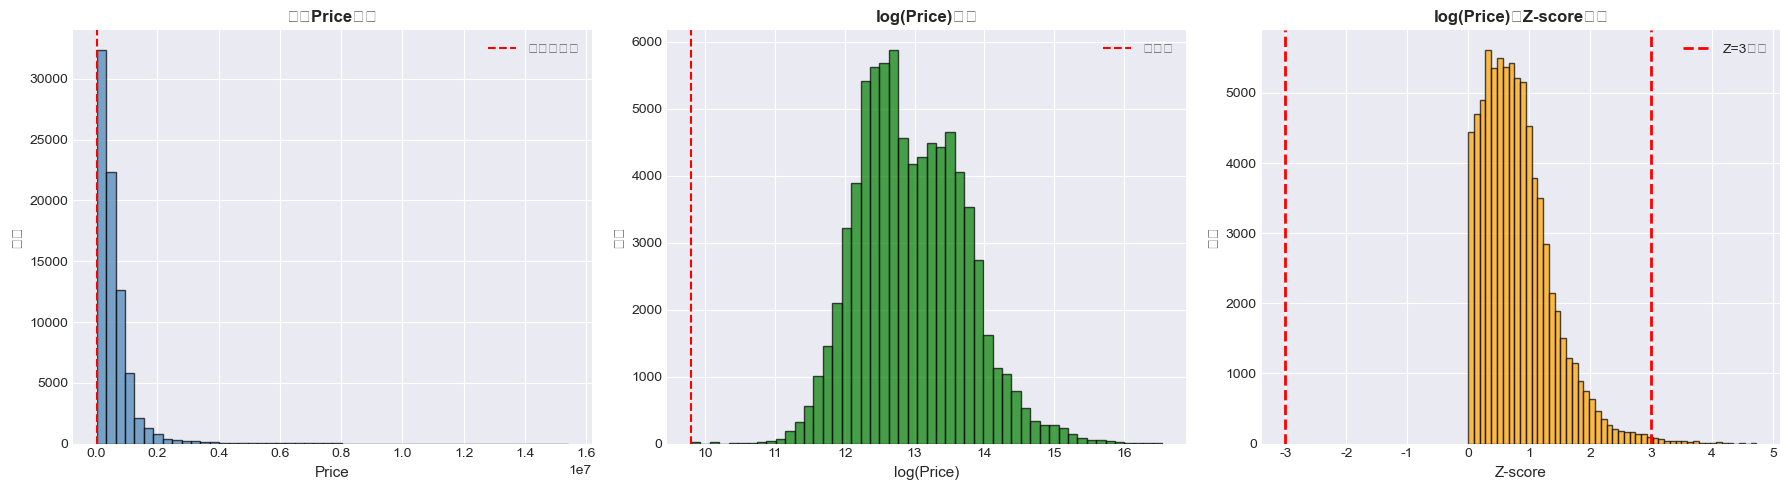

In [79]:


# ==================== 5. 异常值检测和处理（使用log(Price)的Z-score）====================
print("\n[5/8] 异常值检测和处理...")

print("\n  [5.1] 对log(Price)进行Z-score异常值检测...")

# 对Price取对数
log_price_train = np.log(y_train)

# 计算Z-score
z_scores = np.abs(stats.zscore(log_price_train))

# 识别异常值（|z-score| > 3）
outlier_mask = z_scores > 3
outliers_count = outlier_mask.sum()

print(f"    log(Price)统计:")
print(f"      均值: {log_price_train.mean():.4f}")
print(f"      标准差: {log_price_train.std():.4f}")
print(f"      Z-score范围: [{z_scores.min():.2f}, {z_scores.max():.2f}]")
print(f"    异常值数量: {outliers_count} ({outliers_count/len(y_train)*100:.2f}%)")

# 显示异常值的Price范围
if outliers_count > 0:
    outlier_prices = y_train[outlier_mask]
    print(f"    异常值Price范围: [{outlier_prices.min():,.0f}, {outlier_prices.max():,.0f}]")

# 移除异常值
print("\n  [5.2] 移除异常值...")
normal_mask = ~outlier_mask
X_train_clean = X_train_selected[normal_mask]
y_train_clean = y_train[normal_mask]

removed_count = len(y_train) - len(y_train_clean)
print(f"    移除样本数: {removed_count} ({removed_count/len(y_train)*100:.2f}%)")
print(f"    清洗后训练集: {X_train_clean.shape}")
print(f"    清洗后Price统计: mean={y_train_clean.mean():.2f}, std={y_train_clean.std():.2f}")

# 可视化异常值检测结果
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 原始Price分布
axes[0].hist(y_train, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(y_train[outlier_mask].min() if outliers_count > 0 else 0, 
                color='r', linestyle='--', label='异常值阈值')
axes[0].set_xlabel('Price', fontsize=11)
axes[0].set_ylabel('频数', fontsize=11)
axes[0].set_title('原始Price分布', fontsize=12, fontweight='bold')
axes[0].legend()

# log(Price)分布和Z-score
axes[1].hist(log_price_train, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].axvline(log_price_train[outlier_mask].min() if outliers_count > 0 else 0,
                color='r', linestyle='--', label='异常值')
axes[1].set_xlabel('log(Price)', fontsize=11)
axes[1].set_ylabel('频数', fontsize=11)
axes[1].set_title('log(Price)分布', fontsize=12, fontweight='bold')
axes[1].legend()

# Z-score分布
axes[2].hist(z_scores, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[2].axvline(3, color='r', linestyle='--', linewidth=2, label='Z=3阈值')
axes[2].axvline(-3, color='r', linestyle='--', linewidth=2)
axes[2].set_xlabel('Z-score', fontsize=11)
axes[2].set_ylabel('频数', fontsize=11)
axes[2].set_title('log(Price)的Z-score分布', fontsize=12, fontweight='bold')
axes[2].legend()

plt.tight_layout()
plt.show()


## 训练模型

In [80]:
# ==================== 6. 特征标准化 ====================
print("\n[6/8] 特征标准化...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test_selected)

print(f"  ✓ 标准化完成")
print(f"    训练集形状: {X_train_scaled.shape}")
print(f"    测试集形状: {X_test_scaled.shape}")

# ==================== 7. 模型训练与评估 ====================
print("\n[7/8] 模型训练与评估...")

# 评估函数
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """评估模型性能"""
    print(f"\n  {'='*60}")
    print(f"  {model_name}")
    print(f"  {'='*60}")
    
    # 训练模型
    model.fit(X_train, y_train)
    
    # 预测
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # 样本内MAE
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    
    # 样本外MAE
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    
    # 6折交叉验证
    cv_mae_scores = -cross_val_score(
        model, X_train, y_train, 
        cv=6, scoring='neg_mean_absolute_error', n_jobs=-1
    )
    cv_mae = cv_mae_scores.mean()
    cv_mae_std = cv_mae_scores.std()
    
    # RMAE (Relative MAE)
    train_rmae = train_mae / y_train.mean()
    test_rmae = test_mae / y_test.mean()
    cv_rmae = cv_mae / y_train.mean()
    
    print(f"  样本内 (In-sample):")
    print(f"    MAE:  {train_mae:,.2f}")
    print(f"    RMSE: {train_rmse:,.2f}")
    print(f"    RMAE: {train_rmae:.4f}")
    print(f"    R²:   {train_r2:.4f}")
    
    print(f"\n  样本外 (Out-of-sample):")
    print(f"    MAE:  {test_mae:,.2f}")
    print(f"    RMSE: {test_rmse:,.2f}")
    print(f"    RMAE: {test_rmae:.4f}")
    print(f"    R²:   {test_r2:.4f}")
    
    print(f"\n  6折交叉验证 (Cross-validation):")
    print(f"    MAE:  {cv_mae:,.2f} (±{cv_mae_std:,.2f})")
    print(f"    RMAE: {cv_rmae:.4f}")
    
    return {
        'model': model,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'cv_mae': cv_mae,
        'train_rmae': train_rmae,
        'test_rmae': test_rmae,
        'cv_rmae': cv_rmae,
        'train_r2': train_r2,
        'test_r2': test_r2
    }



[6/8] 特征标准化...
  ✓ 标准化完成
    训练集形状: (78692, 145)
    测试集形状: (19780, 145)

[7/8] 模型训练与评估...


In [82]:
# 7.1 OLS模型
print("\n  [7.1] OLS (普通最小二乘法)...")
ols_model = LinearRegression()
ols_results = evaluate_model(
    ols_model, X_train_scaled, X_test_scaled, 
    y_train_clean, y_test, "OLS"
)



  [7.1] OLS (普通最小二乘法)...

  OLS
  样本内 (In-sample):
    MAE:  192,025.92
    RMSE: 295,396.21
    RMAE: 0.3435
    R²:   0.6462

  样本外 (Out-of-sample):
    MAE:  207,268.86
    RMSE: 371,124.39
    RMAE: 0.3562
    R²:   0.6286

  6折交叉验证 (Cross-validation):
    MAE:  193,844.39 (±2,940.02)
    RMAE: 0.3468


In [86]:

# 7.2 Lasso模型（固定参数）
print("\n  [7.2] Lasso回归...")
lasso_model = Lasso(alpha=10, random_state=111, max_iter=10000)
lasso_results = evaluate_model(
    lasso_model, X_train_scaled, X_test_scaled, 
    y_train_clean, y_test, "Lasso"
)



  [7.2] Lasso回归...

  Lasso
  样本内 (In-sample):
    MAE:  192,049.24
    RMSE: 295,403.55
    RMAE: 0.3436
    R²:   0.6462

  样本外 (Out-of-sample):
    MAE:  207,280.57
    RMSE: 371,172.02
    RMAE: 0.3562
    R²:   0.6285

  6折交叉验证 (Cross-validation):
    MAE:  192,600.09 (±1,150.58)
    RMAE: 0.3446


In [98]:
# 7.3 Ridge模型（固定参数）
print("\n  [7.3] Ridge回归...")
ridge_model = Ridge(alpha=10, random_state=111, max_iter=10000)
ridge_results = evaluate_model(
    ridge_model, X_train_scaled, X_test_scaled, 
    y_train_clean, y_test, "Ridge"
)

# 7.4 Elastic Net模型（固定参数）
print("\n  [7.4] Elastic Net回归...")
elastic_model = ElasticNet(alpha=10, l1_ratio=0.9, random_state=111, max_iter=10000)
elastic_results = evaluate_model(
    elastic_model, X_train_scaled, X_test_scaled, 
    y_train_clean, y_test, "Elastic Net"
)


  [7.3] Ridge回归...

  Ridge
  样本内 (In-sample):
    MAE:  192,146.89
    RMSE: 295,423.27
    RMAE: 0.3438
    R²:   0.6461

  样本外 (Out-of-sample):
    MAE:  207,370.60
    RMSE: 371,223.94
    RMAE: 0.3564
    R²:   0.6284

  6折交叉验证 (Cross-validation):
    MAE:  192,708.84 (±1,137.18)
    RMAE: 0.3448

  [7.4] Elastic Net回归...

  Elastic Net
  样本内 (In-sample):
    MAE:  211,419.63
    RMSE: 345,748.99
    RMAE: 0.3782
    R²:   0.5153

  样本外 (Out-of-sample):
    MAE:  229,342.11
    RMSE: 448,317.90
    RMAE: 0.3941
    R²:   0.4580

  6折交叉验证 (Cross-validation):
    MAE:  211,593.93 (±1,527.89)
    RMAE: 0.3785


In [101]:


# ==================== 在模型训练部分添加 Log-OLS 模型 ====================

# 在现有的 evaluate_model 函数之后，添加一个新的评估函数用于log变换模型

def evaluate_log_model(model, X_train, X_test, y_train, y_test, model_name):
    """评估使用log变换的模型性能"""
    print(f"\n  {'='*60}")
    print(f"  {model_name}")
    print(f"  {'='*60}")
    
    # 对目标变量取log
    y_train_log = np.log(y_train)
    y_test_log = np.log(y_test)
    
    # 训练模型（使用log后的y）
    model.fit(X_train, y_train_log)
    
    # 预测（得到log(price)）
    y_train_pred_log = model.predict(X_train)
    y_test_pred_log = model.predict(X_test)
    
    # 将预测结果转换回原始尺度
    y_train_pred = np.exp(y_train_pred_log)
    y_test_pred = np.exp(y_test_pred_log)
    
    # 样本内MAE（原始尺度）
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    
    # 样本外MAE（原始尺度）
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    
    # 6折交叉验证
    from sklearn.model_selection import cross_val_predict
    # 对log(y)进行交叉验证预测
    y_train_log_cv_pred = cross_val_predict(
        model, X_train, y_train_log, cv=6, n_jobs=-1
    )
    # 转换回原始尺度
    y_train_cv_pred = np.exp(y_train_log_cv_pred)
    cv_mae = mean_absolute_error(y_train, y_train_cv_pred)
    
    # 计算交叉验证的标准差（通过bootstrap方式估计）
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=6, shuffle=True, random_state=111)
    cv_mae_scores = []
    
    for train_idx, val_idx in kf.split(X_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr_log, y_val = y_train_log.iloc[train_idx], y_train.iloc[val_idx]
        
        model_temp = LinearRegression()
        model_temp.fit(X_tr, y_tr_log)
        y_val_pred_log = model_temp.predict(X_val)
        y_val_pred = np.exp(y_val_pred_log)
        
        mae = mean_absolute_error(y_val, y_val_pred)
        cv_mae_scores.append(mae)
    
    cv_mae_std = np.std(cv_mae_scores)
    
    # RMAE (Relative MAE)
    train_rmae = train_mae / y_train.mean()
    test_rmae = test_mae / y_test.mean()
    cv_rmae = cv_mae / y_train.mean()
    
    print(f"  样本内 (In-sample):")
    print(f"    MAE:  {train_mae:,.2f}")
    print(f"    RMSE: {train_rmse:,.2f}")
    print(f"    RMAE: {train_rmae:.4f}")
    print(f"    R²:   {train_r2:.4f}")
    
    print(f"\n  样本外 (Out-of-sample):")
    print(f"    MAE:  {test_mae:,.2f}")
    print(f"    RMSE: {test_rmse:,.2f}")
    print(f"    RMAE: {test_rmae:.4f}")
    print(f"    R²:   {test_r2:.4f}")
    
    print(f"\n  6折交叉验证 (Cross-validation):")
    print(f"    MAE:  {cv_mae:,.2f} (±{cv_mae_std:,.2f})")
    print(f"    RMAE: {cv_rmae:.4f}")
    
    return {
        'model': model,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'cv_mae': cv_mae,
        'cv_mae_std': cv_mae_std,
        'train_rmae': train_rmae,
        'test_rmae': test_rmae,
        'cv_rmae': cv_rmae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'is_log_model': True  # 标记这是log模型
    }


# 7.1.1 Log-OLS模型（新增）
print("\n  [7.1.1] Log-OLS (对数变换后的OLS)...")
log_ols_model = LinearRegression()
log_ols_results = evaluate_log_model(
    log_ols_model, X_train_scaled, X_test_scaled, 
    y_train_clean, y_test, "Log-OLS"
)


  [7.1.1] Log-OLS (对数变换后的OLS)...

  Log-OLS
  样本内 (In-sample):
    MAE:  170,645.52
    RMSE: 382,733.49
    RMAE: 0.3053
    R²:   0.4060

  样本外 (Out-of-sample):
    MAE:  186,588.49
    RMSE: 660,948.93
    RMAE: 0.3207
    R²:   -0.1780

  6折交叉验证 (Cross-validation):
    MAE:  171,285.34 (±4,146.93)
    RMAE: 0.3064


In [103]:

# 7.6 随机森林模型（新增）
print("\n  [7.6] Random Forest (随机森林)...")
rf_model = RandomForestRegressor(
    n_estimators=150,        # 树的数量
    max_depth=40,            # 树的最大深度
    min_samples_split=5,     # 分裂节点的最小样本数
    min_samples_leaf=2,      # 叶节点的最小样本数
    max_features='sqrt',     # 每次分裂考虑的特征数
    random_state=111,
    n_jobs=-1,               # 使用所有CPU核心
    verbose=0
)
rf_results = evaluate_model(
    rf_model, X_train_scaled, X_test_scaled, 
    y_train_clean, y_test, "Random Forest"
)

# ==================== 8. 结果汇总（更新） ====================
print("\n[8/8] 结果汇总...")

# 确定最佳模型
all_results = {
    'OLS': ols_results,
    'Log-OLS': log_ols_results,
    'Lasso': lasso_results,
    'Ridge': ridge_results,
    'Elastic Net': elastic_results,
    'Random Forest': rf_results  # 新增
}

best_model_name = min(all_results.keys(), key=lambda k: all_results[k]['test_mae'])
best_model_results = all_results[best_model_name]

print(f"\n  最佳模型: {best_model_name}")
print(f"  测试集MAE: {best_model_results['test_mae']:,.2f}")

# 生成指标表格（MAE）
print("\n" + "="*90)
print("模型性能对比表（MAE）")
print("="*90)

metrics_table = pd.DataFrame({
    'Metrics': ['OLS', 'Log-OLS', 'Lasso', 'Ridge', 'Elastic Net', 'Random Forest', f'Best Model ({best_model_name})'],
    'In-sample': [
        f"{ols_results['train_mae']:,.0f}",
        f"{log_ols_results['train_mae']:,.0f}",
        f"{lasso_results['train_mae']:,.0f}",
        f"{ridge_results['train_mae']:,.0f}",
        f"{elastic_results['train_mae']:,.0f}",
        f"{rf_results['train_mae']:,.0f}",
        f"{best_model_results['train_mae']:,.0f}"
    ],
    'Out-of-sample': [
        f"{ols_results['test_mae']:,.0f}",
        f"{log_ols_results['test_mae']:,.0f}",
        f"{lasso_results['test_mae']:,.0f}",
        f"{ridge_results['test_mae']:,.0f}",
        f"{elastic_results['test_mae']:,.0f}",
        f"{rf_results['test_mae']:,.0f}",
        f"{best_model_results['test_mae']:,.0f}"
    ],
    'Cross-validation': [
        f"{ols_results['cv_mae']:,.0f}",
        f"{log_ols_results['cv_mae']:,.0f}",
        f"{lasso_results['cv_mae']:,.0f}",
        f"{ridge_results['cv_mae']:,.0f}",
        f"{elastic_results['cv_mae']:,.0f}",
        f"{rf_results['cv_mae']:,.0f}",
        f"{best_model_results['cv_mae']:,.0f}"
    ],
    'Kaggle Score': ['--', '--', '--', '--', '--', '--', '--']
})

print(metrics_table.to_string(index=False))

# 生成RMAE表格
print("\n" + "="*90)
print("模型性能对比表（RMAE）")
print("="*90)

rmae_table = pd.DataFrame({
    'Metrics': ['OLS', 'Log-OLS', 'Lasso', 'Ridge', 'Elastic Net', 'Random Forest', f'Best Model ({best_model_name})'],
    'In-sample': [
        f"{ols_results['train_rmae']:.4f}",
        f"{log_ols_results['train_rmae']:.4f}",
        f"{lasso_results['train_rmae']:.4f}",
        f"{ridge_results['train_rmae']:.4f}",
        f"{elastic_results['train_rmae']:.4f}",
        f"{rf_results['train_rmae']:.4f}",
        f"{best_model_results['train_rmae']:.4f}"
    ],
    'Out-of-sample': [
        f"{ols_results['test_rmae']:.4f}",
        f"{log_ols_results['test_rmae']:.4f}",
        f"{lasso_results['test_rmae']:.4f}",
        f"{ridge_results['test_rmae']:.4f}",
        f"{elastic_results['test_rmae']:.4f}",
        f"{rf_results['test_rmae']:.4f}",
        f"{best_model_results['test_rmae']:.4f}"
    ],
    'Cross-validation': [
        f"{ols_results['cv_rmae']:.4f}",
        f"{log_ols_results['cv_rmae']:.4f}",
        f"{lasso_results['cv_rmae']:.4f}",
        f"{ridge_results['cv_rmae']:.4f}",
        f"{elastic_results['cv_rmae']:.4f}",
        f"{rf_results['cv_rmae']:.4f}",
        f"{best_model_results['cv_rmae']:.4f}"
    ]
})

print(rmae_table.to_string(index=False))



  [7.6] Random Forest (随机森林)...

  Random Forest
  样本内 (In-sample):
    MAE:  47,298.21
    RMSE: 91,982.04
    RMAE: 0.0846
    R²:   0.9657

  样本外 (Out-of-sample):
    MAE:  86,230.96
    RMSE: 259,277.16
    RMAE: 0.1482
    R²:   0.8187

  6折交叉验证 (Cross-validation):
    MAE:  nan (±nan)
    RMAE: nan

[8/8] 结果汇总...

  最佳模型: Random Forest
  测试集MAE: 86,230.96

模型性能对比表（MAE）
                   Metrics In-sample Out-of-sample Cross-validation Kaggle Score
                       OLS   192,026       207,269          193,844           --
                   Log-OLS   170,646       186,588          171,285           --
                     Lasso   192,049       207,281          192,600           --
                     Ridge   192,147       207,371          192,709           --
               Elastic Net   211,420       229,342          211,594           --
             Random Forest    47,298        86,231              nan           --
Best Model (Random Forest)    47,298        86,231    

## 开始读取和预测测试集

In [104]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestRegressor

In [106]:

print("="*80)  
print("测试集预测流程")  
print("="*80)  

# ==================== 步骤 1: 保存训练好的模型 ====================  
print("\n步骤 1: 保存训练好的模型")  
print("-"*80)  

# 保存模型和必要的训练信息  
models_dict = {  
    'ols': ols_model,  
    'lasso': lasso_model,  
    'log_ols': log_ols_model,  
    'rf': rf_model,  
    'feature_columns': X_train_scaled.shape[1],  # 特征数量  
    'scaler': scaler,  
    'feature_names': X_train_clean.columns.tolist()  # 特征名称  
}  

# 保存到文件  
with open('trained_models.pkl', 'wb') as f:  
    pickle.dump(models_dict, f)  

print("✓ 模型保存成功！")  
print(f"  - OLS模型")  
print(f"  - Lasso模型")  
print(f"  - Log-OLS模型")  
print(f"  - 随机森林模型")  
print(f"  - 特征数量: {models_dict['feature_columns']}")  
print(f"  - StandardScaler")  

测试集预测流程

步骤 1: 保存训练好的模型
--------------------------------------------------------------------------------
✓ 模型保存成功！
  - OLS模型
  - Lasso模型
  - Log-OLS模型
  - 随机森林模型
  - 特征数量: 145
  - StandardScaler


In [128]:
# ==================== 导入必要的库 ====================  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import re  
import warnings  
warnings.filterwarnings('ignore')  

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  
from sklearn.preprocessing import StandardScaler, LabelEncoder  
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
from sklearn.preprocessing import PolynomialFeatures  
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from scipy import stats  
import pickle

# 设置显示选项  
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 100)  
pd.set_option('display.width', 1000)  

# 设置绘图风格  
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-darkgrid')  
sns.set_palette("husl")  

## 测试集-缺失值特征创建和特征提取

In [117]:
import pandas as pd
import numpy as np

# ==================== 读取测试集 ====================
print("=" * 80)
print("读取测试集")
print("=" * 80)

# 读取测试集
test_file_path = r"F:\大学之道\人工智能与python程序设计\Midterm_pj\ruc_Class25Q2_test_rent.csv"
df_test = pd.read_csv(test_file_path)

print(f"\n测试集数据形状: {df_test.shape}")
print(f"\n测试集列名:\n{df_test.columns.tolist()}")
print(f"\n测试集前5行数据:\n{df_test.head()}")

# 备份测试集
df_test_clean = df_test.copy()







################################
# ==================== 创建缺失指示变量（与训练集保持一致）====================
print("\n" + "=" * 80)
print("为测试集创建与训练集相同的37个缺失指示变量")
print("=" * 80)

# 定义训练集中创建的37个缺失指示变量对应的原始特征
missing_indicator_features_map = {
    '户型': '户型_is_missing',
    '装修': '装修_is_missing',
    '楼层': '楼层_is_missing',
    '朝向': '朝向_is_missing',
    '付款方式': '付款方式_is_missing',
    '电梯': '电梯_is_missing',
    '车位': '车位_is_missing',
    '用水': '用水_is_missing',
    '用电': '用电_is_missing',
    '燃气': '燃气_is_missing',
    '采暖': '采暖_is_missing',
    '租期': '租期_is_missing',
    '配套设施': '配套设施_is_missing',
    '区县': '区县_is_missing',
    '板块': '板块_is_missing',
    '环线位置': '环线位置_is_missing',
    '物业类别': '物业类别_is_missing',
    '建筑年代': '建筑年代_is_missing',
    '开发商': '开发商_is_missing',
    '房屋总数': '房屋总数_is_missing',
    '楼栋总数': '楼栋总数_is_missing',
    '物业公司': '物业公司_is_missing',
    '绿 化 率': '绿 化 率_is_missing',
    '容 积 率': '容 积 率_is_missing',
    '物 业 费': '物 业 费_is_missing',
    '建筑结构': '建筑结构_is_missing',
    '物业办公电话': '物业办公电话_is_missing',
    '产权描述': '产权描述_is_missing',
    '供水': '供水_is_missing',
    '供暖': '供暖_is_missing',
    '供电': '供电_is_missing',
    '燃气费': '燃气费_is_missing',
    '供热费': '供热费_is_missing',
    '停车位': '停车位_is_missing',
    '停车费用': '停车费用_is_missing',
    'coord_x': 'coord_x_is_missing',
    'coord_y': 'coord_y_is_missing'
}

# 为每个特征创建缺失指示变量（无论是否实际缺失）
print(f"\n将创建 {len(missing_indicator_features_map)} 个缺失指示变量...\n")

created_count = 0
for original_col, indicator_col in missing_indicator_features_map.items():
    if original_col in df_test_clean.columns:
        # 创建缺失指示变量
        df_test_clean[indicator_col] = df_test_clean[original_col].isnull().astype(int)
        
        # 统计缺失情况
        missing_count = df_test_clean[indicator_col].sum()
        missing_pct = (missing_count / len(df_test_clean)) * 100
        
        print(f"✓ {original_col:20s} -> {indicator_col:30s} | 缺失: {missing_count:6d} ({missing_pct:6.2f}%)")
        created_count += 1
    else:
        print(f"⚠️ {original_col:20s} -> 特征不存在，跳过")

print(f"\n{'='*80}")
print(f"成功创建 {created_count} 个缺失指示变量")
print(f"{'='*80}")

# 验证
print("\n--- 验证缺失指示变量 ---")
print(f"测试集数据形状: {df_test_clean.shape}")
indicator_cols = [col for col in df_test_clean.columns if col.endswith('_is_missing')]
print(f"缺失指示变量数量: {len(indicator_cols)}")
print(f"\n前10个缺失指示变量统计:")
indicator_stats = pd.DataFrame({
    '特征': indicator_cols[:10],
    '缺失数量(1的个数)': [df_test_clean[col].sum() for col in indicator_cols[:10]],
    '非缺失数量(0的个数)': [len(df_test_clean) - df_test_clean[col].sum() for col in indicator_cols[:10]],
    '缺失比例': [df_test_clean[col].mean() * 100 for col in indicator_cols[:10]]
})
print(indicator_stats.to_string(index=False))

print("\n✓ 测试集缺失指示变量创建完成！")




###############################################
# ==================== 房屋户型特征提取（测试集）====================

import re

def extract_room_info_optimized(room_str):
    """
    提取房屋户型中的房间数量
    处理格式：
    1. "X室X厅X厨X卫" - 标准格式
    2. "X房间X卫" - 简化格式
    3. 空值/缺失值
    """
    if pd.isna(room_str) or room_str == '':
        return {
            '卧室数量': np.nan,
            '客厅数量': np.nan,
            '厨房数量': np.nan,
            '卫生间数量': np.nan
        }
    
    room_str = str(room_str).strip()
    
    # 初始化结果
    result = {
        '卧室数量': np.nan,
        '客厅数量': np.nan,
        '厨房数量': np.nan,
        '卫生间数量': np.nan
    }
    
    # 提取卧室数量 (室)
    bedroom_match = re.search(r'(\d+)室', room_str)
    if bedroom_match:
        result['卧室数量'] = int(bedroom_match.group(1))
    
    # 如果没有"室"，尝试"房间"
    if pd.isna(result['卧室数量']):
        room_match = re.search(r'(\d+)房间', room_str)
        if room_match:
            result['卧室数量'] = int(room_match.group(1))
    
    # 提取客厅数量 (厅)
    living_match = re.search(r'(\d+)厅', room_str)
    if living_match:
        result['客厅数量'] = int(living_match.group(1))
    else:
        # 如果没有明确标注客厅，默认为0（如"X房间X卫"格式）
        if '房间' in room_str:
            result['客厅数量'] = 0
    
    # 提取厨房数量 (厨)
    kitchen_match = re.search(r'(\d+)厨', room_str)
    if kitchen_match:
        result['厨房数量'] = int(kitchen_match.group(1))
    else:
        # 如果没有明确标注厨房，默认为0（如"X房间X卫"格式）
        if '房间' in room_str:
            result['厨房数量'] = 0
    
    # 提取卫生间数量 (卫)
    bathroom_match = re.search(r'(\d+)卫', room_str)
    if bathroom_match:
        result['卫生间数量'] = int(bathroom_match.group(1))
    else:
        result['卫生间数量'] = 0
    
    return result

# ==================== 应用到测试集 ====================

print("=" * 80)
print("提取房屋户型特征（测试集）")
print("=" * 80)

# 应用提取函数
room_features = df_test_clean['户型'].apply(extract_room_info_optimized)

# 将字典转换为DataFrame
room_features_df = pd.DataFrame(room_features.tolist())

# 添加到测试集
df_test_clean['卧室数量'] = room_features_df['卧室数量']
df_test_clean['客厅数量'] = room_features_df['客厅数量']
df_test_clean['厨房数量'] = room_features_df['厨房数量']
df_test_clean['卫生间数量'] = room_features_df['卫生间数量']

# ==================== 验证提取结果 ====================

print("\n--- 提取结果验证 ---")
print("\n原始数据 vs 提取结果（前20行）：")
validation_df = pd.DataFrame({
    '户型': df_test_clean['户型'].head(20),
    '卧室': df_test_clean['卧室数量'].head(20),
    '客厅': df_test_clean['客厅数量'].head(20),
    '厨房': df_test_clean['厨房数量'].head(20),
    '卫生间': df_test_clean['卫生间数量'].head(20)
})
print(validation_df.to_string(index=False))

# ==================== 创建衍生特征 ====================

# 1. 卧室卫生间比例
df_test_clean['卧卫比'] = df_test_clean['卧室数量'] / (df_test_clean['卫生间数量'] + 1)

# 2. 房型完整性（是否所有信息都齐全）
df_test_clean['房型信息完整'] = (
    df_test_clean['卧室数量'].notna() & 
    df_test_clean['客厅数量'].notna() & 
    df_test_clean['厨房数量'].notna() & 
    df_test_clean['卫生间数量'].notna()
).astype(int)

print(f"\n房型信息完整比例: {df_test_clean['房型信息完整'].mean():.2%}")

new_room_features = [
    '卧室数量', '客厅数量', '厨房数量', '卫生间数量',
    '卧卫比', '房型信息完整'
]

print(f"\n新增房间相关特征: {new_room_features}")

print("\n" + "=" * 80)
print("房屋户型特征提取完成！")
print("=" * 80)





#####################
print("=" * 80)
print("楼层信息解析（测试集）")
print("=" * 80)

def parse_floor_info(floor_str):
    """
    解析楼层信息，提取所在楼层和总楼层
    
    参数:
        floor_str: 楼层字符串
        
    返回:
        (当前楼层, 总楼层) 元组
    """
    if pd.isna(floor_str):
        return np.nan, np.nan
    
    floor_str = str(floor_str).strip()
    
    # 1. 处理地下室情况
    if '地下' in floor_str:
        # 提取总楼层（如果有）
        total_match = re.search(r'/(\d+)层', floor_str)
        total_floor = int(total_match.group(1)) if total_match else np.nan
        
        # 当前楼层统一赋值为-1
        return -1, total_floor
    
    # 2. 提取总楼层数
    total_match = re.search(r'/(\d+)层', floor_str)
    if total_match:
        total_floor = int(total_match.group(1))
    else:
        total_floor = np.nan
    
    # 3. 确定当前楼层
    # 3.1 如果有具体数字（格式：数字/总层数）
    current_match = re.search(r'^(\d+)/', floor_str)
    if current_match:
        current_floor = int(current_match.group(1))
        return current_floor, total_floor
    
    # 3.2 如果是低/中/高楼层描述
    if '低楼层' in floor_str:
        if not pd.isna(total_floor):
            current_floor = total_floor * 0.2
        else:
            current_floor = np.nan
    elif '中楼层' in floor_str:
        if not pd.isna(total_floor):
            current_floor = total_floor * 0.5
        else:
            current_floor = np.nan
    elif '高楼层' in floor_str:
        if not pd.isna(total_floor):
            current_floor = total_floor * 0.8
        else:
            current_floor = np.nan
    else:
        current_floor = np.nan
    
    return current_floor, total_floor


# 应用解析函数
print("\n正在解析楼层信息...")

# 应用函数并创建新列
floor_info = df_test_clean['楼层'].apply(parse_floor_info)
df_test_clean['所在楼层'] = floor_info.apply(lambda x: x[0])
df_test_clean['总楼层'] = floor_info.apply(lambda x: x[1])

print("✓ 楼层信息解析完成")

# ==================== 验证和统计 ====================
print("\n" + "=" * 80)
print("解析结果验证")
print("=" * 80)

# 1. 基本统计
print("\n--- 所在楼层统计 ---")
print(df_test_clean['所在楼层'].describe())
print(f"\n地下楼层数量: {(df_test_clean['所在楼层'] == -1).sum()} ({(df_test_clean['所在楼层'] == -1).sum()/len(df_test_clean)*100:.2f}%)")
print(f"缺失值数量: {df_test_clean['所在楼层'].isna().sum()} ({df_test_clean['所在楼层'].isna().sum()/len(df_test_clean)*100:.2f}%)")

print("\n--- 总楼层统计 ---")
print(df_test_clean['总楼层'].describe())
print(f"缺失值数量: {df_test_clean['总楼层'].isna().sum()} ({df_test_clean['总楼层'].isna().sum()/len(df_test_clean)*100:.2f}%)")

# 2. 查看解析示例
print("\n" + "=" * 80)
print("解析示例展示")
print("=" * 80)

print("\n--- 示例1: 标准格式（低/中/高楼层） ---")
sample_standard = df_test_clean[df_test_clean['楼层'].str.contains('低楼层|中楼层|高楼层', na=False)][['楼层', '所在楼层', '总楼层']].head(15)
print(sample_standard.to_string(index=False))

print("\n--- 示例2: 数字格式 ---")
sample_numeric = df_test_clean[df_test_clean['楼层'].str.match(r'^\d+/', na=False)][['楼层', '所在楼层', '总楼层']].head(10)
if len(sample_numeric) > 0:
    print(sample_numeric.to_string(index=False))
else:
    print("未找到数字格式的楼层数据")

print("\n--- 示例3: 地下楼层 ---")
sample_underground = df_test_clean[df_test_clean['楼层'].str.contains('地下', na=False)][['楼层', '所在楼层', '总楼层']].head(10)
if len(sample_underground) > 0:
    print(sample_underground.to_string(index=False))
else:
    print("未找到地下楼层数据")

# 3. 创建楼层比例特征
print("\n" + "=" * 80)
print("创建衍生特征")
print("=" * 80)

# 楼层比例（排除地下室）
df_test_clean['楼层比例'] = np.where(
    (df_test_clean['所在楼层'] > 0) & (df_test_clean['总楼层'] > 0),
    df_test_clean['所在楼层'] / df_test_clean['总楼层'],
    np.nan
)

print("\n--- 楼层比例统计 ---")
print(df_test_clean['楼层比例'].describe())

# 4. 生成楼层特征汇总报告
print("\n" + "=" * 80)
print("楼层特征汇总")
print("=" * 80)

floor_summary = {
    '原始楼层特征': ['楼层'],
    '新增数值特征': ['所在楼层', '总楼层', '楼层比例'],
}

print("\n创建的楼层相关特征:")
for key, values in floor_summary.items():
    print(f"  {key}: {', '.join(values)}")

print("\n" + "=" * 80)
print("测试集楼层信息解析完成！")
print("=" * 80)


###################################################################
# ==================== 解析面积特征（测试集）====================
print("=" * 80)  
print("解析面积特征（测试集）")  
print("=" * 80)  

# 查看原始面积数据  
print("\n--- 原始面积数据样本 ---")  
print(f"面积列数据类型: {df_test_clean['面积'].dtype}")  
print(f"面积列总数: {len(df_test_clean['面积'])}")  
print(f"面积列缺失数: {df_test_clean['面积'].isnull().sum()}")  
print(f"\n前20行面积数据:")  
print(df_test_clean['面积'].head(20))  

# 定义面积提取函数  
def extract_area(area_str):  
    """  
    从面积字符串中提取数值  
    例如: '100.00㎡' -> 100.00  
         '136㎡' -> 136.0  
         None -> NaN  
         '' -> NaN  
    """  
    # 处理空值  
    if pd.isna(area_str):  
        return np.nan  
    
    # 转换为字符串  
    area_str = str(area_str).strip()  
    
    # 处理空字符串  
    if area_str == '' or area_str.lower() == 'nan':  
        return np.nan  
    
    # 使用正则表达式提取数字（包括小数）  
    # 匹配模式：可能有负号，然后是数字，可能有小数点和小数部分  
    match = re.search(r'(-?\d+\.?\d*)', area_str)  
    
    if match:  
        try:  
            area_value = float(match.group(1))  
            # 验证合理性（面积应该为正数且在合理范围内）  
            if area_value > 0 and area_value < 10000:  # 假设最大10000平米  
                return area_value  
            else:  
                return np.nan  
        except ValueError:  
            return np.nan  
    else:  
        return np.nan  

# 应用提取函数  
print("\n--- 提取面积数值 ---")  
df_test_clean['面积_数值'] = df_test_clean['面积'].apply(extract_area)  

# 统计提取结果  
print(f"\n提取完成！")  
print(f"原始面积列缺失数: {df_test_clean['面积'].isnull().sum()}")  
print(f"提取后缺失数: {df_test_clean['面积_数值'].isnull().sum()}")  
print(f"成功提取数值: {df_test_clean['面积_数值'].notna().sum()} 条")  
print(f"提取失败/新增缺失: {df_test_clean['面积_数值'].isnull().sum() - df_test_clean['面积'].isnull().sum()} 条")  

# 显示提取结果样本  
print("\n--- 提取结果对比（前20行）---")  
comparison_df = pd.DataFrame({  
    '原始面积': df_test_clean['面积'].head(20),  
    '提取数值': df_test_clean['面积_数值'].head(20)  
})  
print(comparison_df.to_string())  

# 统计描述  
print("\n--- 面积数值统计描述 ---")  
print(df_test_clean['面积_数值'].describe())  

# ==================== 处理房屋朝向（八个方向）（测试集）====================
print("\n" + "=" * 80)
print("处理朝向特征（八个方向）（测试集）")
print("=" * 80)

def extract_orientation_features(orientation_str):
    """
    提取房屋朝向的八个方向特征
    返回：东、南、西、北、东南、东北、西南、西北的0/1标记
    如果原始数据为空，则返回nan
    """
    # 如果是空值，返回全nan
    if pd.isna(orientation_str):
        return {
            '朝东': np.nan,
            '朝南': np.nan,
            '朝西': np.nan,
            '朝北': np.nan,
            '朝东南': np.nan,
            '朝东北': np.nan,
            '朝西南': np.nan,
            '朝西北': np.nan
        }
    
    orientation_str = str(orientation_str).strip()
    
    # 如果字符串为空，返回全nan
    if orientation_str == '' or orientation_str == 'nan':
        return {
            '朝东': np.nan,
            '朝南': np.nan,
            '朝西': np.nan,
            '朝北': np.nan,
            '朝东南': np.nan,
            '朝东北': np.nan,
            '朝西南': np.nan,
            '朝西北': np.nan
        }
    
    # 初始化八个方向为0
    result = {
        '朝东': 0,
        '朝南': 0,
        '朝西': 0,
        '朝北': 0,
        '朝东南': 0,
        '朝东北': 0,
        '朝西南': 0,
        '朝西北': 0
    }
    
    # 先检查复合方向（两个字的方向，如"东南"、"东北"等）
    # 注意：要先检查复合方向，避免被单个方向匹配到
    if '东南' in orientation_str:
        result['朝东南'] = 1
    if '东北' in orientation_str:
        result['朝东北'] = 1
    if '西南' in orientation_str:
        result['朝西南'] = 1
    if '西北' in orientation_str:
        result['朝西北'] = 1
    
    # 再检查单个方向
    # 使用边界匹配，避免"东南"中的"东"被重复匹配
    # 检查是否有独立的"东"（不是"东南"或"东北"的一部分）
    if re.search(r'(?<!东)东(?![南北])', orientation_str) or \
       (orientation_str.startswith('东') and len(orientation_str) == 1):
        result['朝东'] = 1
    
    if '南' in orientation_str and '东南' not in orientation_str and '西南' not in orientation_str:
        # 检查是否是独立的"南"
        if re.search(r'(?<![东西])南', orientation_str):
            result['朝南'] = 1
    
    if re.search(r'(?<!西)西(?![南北])', orientation_str) or \
       (orientation_str.startswith('西') and len(orientation_str) == 1):
        result['朝西'] = 1
    
    if '北' in orientation_str and '东北' not in orientation_str and '西北' not in orientation_str:
        if re.search(r'(?<![东西])北', orientation_str):
            result['朝北'] = 1
    
    return result

# 应用提取函数
orientation_features = df_test_clean['朝向'].apply(extract_orientation_features)

# 将字典列表转换为DataFrame
orientation_df = pd.DataFrame(orientation_features.tolist())

# 添加到原数据框
for col in orientation_df.columns:
    df_test_clean[col] = orientation_df[col]

# 统计各方向的分布
print("\n各朝向的分布统计：")
for col in ['朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北']:
    valid_count = df_test_clean[col].notna().sum()
    has_orientation = (df_test_clean[col] == 1).sum()
    no_orientation = (df_test_clean[col] == 0).sum()
    nan_count = df_test_clean[col].isna().sum()
    
    print(f"\n{col}:")
    print(f"  有该朝向: {has_orientation} ({has_orientation/valid_count*100:.2f}% of valid)")
    print(f"  无该朝向: {no_orientation} ({no_orientation/valid_count*100:.2f}% of valid)")
    print(f"  缺失值: {nan_count} ({nan_count/len(df_test_clean)*100:.2f}% of total)")

# 创建朝向总数特征（只统计有效值）
def count_orientations(row):
    """统计房屋的朝向数量"""
    orientations = ['朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北']
    
    # 如果所有朝向都是nan，返回nan
    if all(pd.isna(row[o]) for o in orientations):
        return np.nan
    
    # 否则统计1的数量
    return sum(row[o] == 1 for o in orientations)

df_test_clean['朝向总数'] = df_test_clean.apply(count_orientations, axis=1)

print(f"\n朝向总数分布:")
print(df_test_clean['朝向总数'].value_counts(dropna=False).sort_index())

# 创建一些衍生特征
# 是否为单一朝向
df_test_clean['是否单一朝向'] = (df_test_clean['朝向总数'] == 1).astype(float)
df_test_clean.loc[df_test_clean['朝向总数'].isna(), '是否单一朝向'] = np.nan

# 是否为南北通透
df_test_clean['是否南北通透'] = ((df_test_clean['朝南'] == 1) & (df_test_clean['朝北'] == 1)).astype(float)
df_test_clean.loc[(df_test_clean['朝南'].isna()) | (df_test_clean['朝北'].isna()), '是否南北通透'] = np.nan

# 是否为东西通透
df_test_clean['是否东西通透'] = ((df_test_clean['朝东'] == 1) & (df_test_clean['朝西'] == 1)).astype(float)
df_test_clean.loc[(df_test_clean['朝东'].isna()) | (df_test_clean['朝西'].isna()), '是否东西通透'] = np.nan

# 是否有南向（南向房屋通常更受欢迎）
df_test_clean['是否有南向'] = ((df_test_clean['朝南'] == 1) | (df_test_clean['朝东南'] == 1) | (df_test_clean['朝西南'] == 1)).astype(float)
df_test_clean.loc[(df_test_clean['朝南'].isna()) & (df_test_clean['朝东南'].isna()) & (df_test_clean['朝西南'].isna()), '是否有南向'] = np.nan

print(f"\n南北通透房屋数量: {(df_test_clean['是否南北通透'] == 1).sum()}")
print(f"东西通透房屋数量: {(df_test_clean['是否东西通透'] == 1).sum()}")
print(f"有南向房屋数量: {(df_test_clean['是否有南向'] == 1).sum()}")

# 显示一些样例
print("\n前20行朝向特征示例：")
orientation_cols = ['朝向', '朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北', '朝向总数']
print(df_test_clean[orientation_cols].head(20).to_string())

# ==================== 付款方式 One-Hot 编码（测试集）====================
print("\n" + "=" * 80)
print("付款方式 One-Hot 编码（测试集）")
print("=" * 80)

# 定义付款方式的可能取值
payment_methods = ['半年付价', '季付价', '年付价', '双月付价', '月付价']

print(f"\n指定的付款方式类别: {payment_methods}")

# 检查原始数据
if '付款方式' in df_test_clean.columns:
    print(f"\n--- 原始数据分析 ---")
    print(f"付款方式列的唯一值数量: {df_test_clean['付款方式'].nunique()}")
    print(f"付款方式列的缺失数量: {df_test_clean['付款方式'].isnull().sum()}")
    print(f"付款方式列的缺失比例: {df_test_clean['付款方式'].isnull().sum() / len(df_test_clean) * 100:.2f}%")
    
    # 显示所有唯一值及其数量
    print(f"\n付款方式取值分布:")
    value_counts = df_test_clean['付款方式'].value_counts(dropna=False)
    print(value_counts)
    
    # 检查是否有不在指定列表中的值
    non_null_values = df_test_clean['付款方式'].dropna().unique()
    unexpected_values = [v for v in non_null_values if v not in payment_methods]
    
    if unexpected_values:
        print(f"\n⚠️ 发现 {len(unexpected_values)} 个未在指定列表中的值:")
        for val in unexpected_values[:10]:  # 只显示前10个
            count = (df_test_clean['付款方式'] == val).sum()
            print(f"  - '{val}': {count} 条")
    else:
        print(f"\n✓ 所有非空值都在指定列表中")
    
    # 创建 One-Hot 编码
    print(f"\n--- 创建 One-Hot 编码 ---")
    
    for method in payment_methods:
        col_name = f'付款方式_{method}'
        
        # 只有当付款方式完全匹配时才标记为1，缺失值和其他值都为0
        df_test_clean[col_name] = (df_test_clean['付款方式'] == method).astype(int)
        
        count = df_test_clean[col_name].sum()
        percentage = (count / len(df_test_clean)) * 100
        
        print(f"✓ 创建 {col_name:20s} | 数量: {count:6d} ({percentage:5.2f}%)")
    
    # 验证结果
    print(f"\n--- 验证 One-Hot 编码 ---")
    
    # 检查每行最多只有一个1
    onehot_cols = [f'付款方式_{method}' for method in payment_methods]
    row_sums = df_test_clean[onehot_cols].sum(axis=1)
    
    print(f"每行One-Hot列的和的分布:")
    print(row_sums.value_counts().sort_index())
    
    # 计算有多少行是全0（缺失值或其他值）
    all_zero_count = (row_sums == 0).sum()
    one_count = (row_sums == 1).sum()
    multi_count = (row_sums > 1).sum()
    
    print(f"\n统计:")
    print(f"  - 全0的行数（缺失或其他值）: {all_zero_count:6d} ({all_zero_count/len(df_test_clean)*100:5.2f}%)")
    print(f"  - 恰好1个1的行数: {one_count:6d} ({one_count/len(df_test_clean)*100:5.2f}%)")
    print(f"  - 多于1个1的行数: {multi_count:6d} ({multi_count/len(df_test_clean)*100:5.2f}%)")
    
    # 显示示例
    print(f"\n--- 示例展示 ---")
    print(f"原始付款方式列和对应的One-Hot编码（前20行）:\n")
    
    display_cols = ['付款方式'] + onehot_cols
    sample_df = df_test_clean[display_cols].head(20).copy()
    
    # 添加行总和列以便查看
    sample_df['One-Hot总和'] = df_test_clean[onehot_cols].head(20).sum(axis=1)
    
    print(sample_df.to_string(index=True))
    
    # 详细分析：展示每种付款方式的示例
    print(f"\n--- 每种付款方式的示例 ---")
    for method in payment_methods:
        col_name = f'付款方式_{method}'
        matching_rows = df_test_clean[df_test_clean[col_name] == 1]
        
        if len(matching_rows) > 0:
            print(f"\n{method} 的示例 (共 {len(matching_rows)} 条):")
            print(matching_rows[['付款方式'] + onehot_cols].head(3).to_string(index=False))
    
    # 展示缺失值和其他值的示例
    all_zero_rows = df_test_clean[row_sums == 0]
    if len(all_zero_rows) > 0:
        print(f"\n缺失值或其他值的示例 (共 {len(all_zero_rows)} 条，显示前5条):")
        print(all_zero_rows[['付款方式'] + onehot_cols].head(5).to_string(index=False))
    
    # 生成汇总报告
    print(f"\n" + "=" * 80)
    print("One-Hot 编码汇总报告")
    print("=" * 80)
    
    summary_data = []
    for method in payment_methods:
        col_name = f'付款方式_{method}'
        count = df_test_clean[col_name].sum()
        percentage = (count / len(df_test_clean)) * 100
        summary_data.append({
            '付款方式': method,
            'One-Hot列名': col_name,
            '数量': count,
            '占比(%)': f'{percentage:.2f}',
            '是否创建': '✓'
        })
    
    summary_df = pd.DataFrame(summary_data)
    print(f"\n{summary_df.to_string(index=False)}")

print("\n" + "=" * 80)
print("测试集面积、朝向、付款方式特征处理完成！")
print("=" * 80)




###########################################
# ==================== 租赁方式 One-Hot 编码（测试集）====================  
import pandas as pd  
import numpy as np  

print("=" * 80)  
print("租赁方式 One-Hot 编码处理（测试集）")  
print("=" * 80)  

# 1. 首先查看租赁方式的分布情况  
print("\n--- 1. 租赁方式数据探索 ---")  

if '租赁方式' in df_test_clean.columns:  
    print(f"\n租赁方式的类别分布:")  
    rental_type_counts = df_test_clean['租赁方式'].value_counts(dropna=False)  
    print(rental_type_counts)  
    
    print(f"\n租赁方式的类别占比:")  
    rental_type_pct = df_test_clean['租赁方式'].value_counts(normalize=True, dropna=False) * 100  
    for category, pct in rental_type_pct.items():  
        print(f"  {category}: {pct:.2f}%")  
    
    # 检查缺失值  
    missing_count = df_test_clean['租赁方式'].isnull().sum()  
    missing_pct = (missing_count / len(df_test_clean)) * 100  
    print(f"\n缺失值情况:")  
    print(f"  缺失数量: {missing_count}")  
    print(f"  缺失比例: {missing_pct:.2f}%")  
    
    # 唯一值数量  
    unique_values = df_test_clean['租赁方式'].nunique()  
    print(f"\n唯一类别数量: {unique_values}")  
    
    # 2. 处理缺失值（如果存在）  
    print("\n--- 2. 处理缺失值 ---")  
    if missing_count > 0:  
        print(f"发现 {missing_count} 个缺失值")  
        # 选项1: 填充为 "未知" 或最常见的值  
        mode_value = df_test_clean['租赁方式'].mode()[0] if len(df_test_clean['租赁方式'].mode()) > 0 else '整租'  
        print(f"将缺失值填充为: '{mode_value}'")  
        df_test_clean['租赁方式'] = df_test_clean['租赁方式'].fillna(mode_value)  
        print("✓ 缺失值填充完成")  
    else:  
        print("✓ 无缺失值，无需处理")  
    
    # 3. One-Hot 编码  
    print("\n--- 3. One-Hot 编码 ---")  
    
    # 方法1: 使用 pd.get_dummies() 并设置 drop_first=True  
    print("\n使用 pd.get_dummies() 进行 One-Hot 编码...")  
    
    # 保存原始列名用于后续删除  
    original_column = '租赁方式'  
    
    # 创建 One-Hot 编码，drop_first=True 会自动删除第一个类别  
    rental_dummies = pd.get_dummies(df_test_clean['租赁方式'],   
                                    prefix='租赁方式',   
                                    drop_first=True,  
                                    dtype=int)  
    
    print(f"✓ One-Hot 编码完成")  
    print(f"  原始特征: 1 列 ('{original_column}')")  
    print(f"  编码后特征: {rental_dummies.shape[1]} 列")  
    print(f"  新增特征列名: {rental_dummies.columns.tolist()}")  
    
    # 显示被删除的基准类别（reference category）  
    all_categories = df_test_clean['租赁方式'].unique()  
    dropped_category = [cat for cat in all_categories   
                       if f'租赁方式_{cat}' not in rental_dummies.columns]  
    print(f"\n  基准类别(已删除): {dropped_category}")  
    print(f"  保留类别: {[col.replace('租赁方式_', '') for col in rental_dummies.columns.tolist()]}")  
    
    # 4. 将 One-Hot 编码的列添加到原数据集  
    print("\n--- 4. 添加到原数据集 ---")  
    
    # 获取原始列的位置  
    original_position = df_test_clean.columns.get_loc(original_column)  
    
    # 将新列插入到原始列的位置  
    for i, col in enumerate(rental_dummies.columns):  
        df_test_clean.insert(original_position + i + 1, col, rental_dummies[col])  
    
    print(f"✓ 已将 {len(rental_dummies.columns)} 个 One-Hot 编码列添加到数据集")  
    
    # 5. 删除原始的租赁方式列  
    print("\n--- 5. 删除原始列 ---")  
    df_before = df_test_clean.shape[1]  
    df_test_clean = df_test_clean.drop(columns=[original_column])  
    df_after = df_test_clean.shape[1]  
    
    print(f"✓ 已删除原始列 '{original_column}'")  
    print(f"  删除前列数: {df_before}")  
    print(f"  删除后列数: {df_after}")  
    print(f"  净增加列数: {df_after - df_before + 1}")  
    
    # 6. 验证编码结果  
    print("\n--- 6. 验证编码结果 ---")  
    
    print("\n新增 One-Hot 编码列的统计信息:")  
    onehot_stats = pd.DataFrame({  
        '列名': rental_dummies.columns,  
        '为1的数量': [rental_dummies[col].sum() for col in rental_dummies.columns],  
        '为1的比例(%)': [rental_dummies[col].mean() * 100 for col in rental_dummies.columns],  
        '数据类型': [rental_dummies[col].dtype for col in rental_dummies.columns]  
    })  
    print(onehot_stats.to_string(index=False))  
    
    # 显示前10行示例  
    print("\n前10行数据示例（仅显示 One-Hot 编码列）:")  
    print(df_test_clean[rental_dummies.columns].head(10).to_string())

# ==================== 处理配备电梯（测试集）====================
print("\n" + "=" * 80)
print("处理配备电梯（测试集）")
print("=" * 80)

def extract_elevator(elevator_str):
    """
    提取电梯信息并编码为0/1
    - '有' -> 1
    - '无' -> 0
    - NaN/空值 -> 0
    """
    if pd.isna(elevator_str):
        return 0
    
    elevator_str = str(elevator_str).strip()
    
    if elevator_str == '有':
        return 1
    else:
        return 0

# 应用电梯特征提取
df_test_clean['有电梯'] = df_test_clean['电梯'].apply(extract_elevator)

# 验证处理结果
print(f"配备电梯原始值分布:\n{df_test_clean['电梯'].value_counts(dropna=False)}")
print(f"\n有电梯编码分布:\n{df_test_clean['有电梯'].value_counts()}")
print(f"\n有电梯比例: {df_test_clean['有电梯'].mean()*100:.2f}%")

print("\n" + "=" * 80)
print("测试集租赁方式和电梯特征处理完成！")
print("=" * 80)



##############################################3
# ==================== 车位特征 One-Hot 编码（测试集）====================
import pandas as pd
import numpy as np

print("=" * 80)
print("车位特征 One-Hot 编码（测试集）")
print("=" * 80)

# 1. 查看车位特征的基本信息
print("\n--- 1. 车位特征原始数据分析 ---")
print(f"数据类型: {df_test_clean['车位'].dtype}")
print(f"总样本数: {len(df_test_clean)}")
print(f"缺失值数量: {df_test_clean['车位'].isnull().sum()} ({df_test_clean['车位'].isnull().sum()/len(df_test_clean)*100:.2f}%)")
print(f"非缺失值数量: {df_test_clean['车位'].notnull().sum()}")

print("\n车位特征唯一值及其数量:")
print(df_test_clean['车位'].value_counts(dropna=False))

print("\n车位特征前20行:")
print(df_test_clean['车位'].head(20))

# 2. 进行 One-Hot 编码
print("\n--- 2. 执行 One-Hot 编码 ---")

# 保存原始的缺失情况（已经有了 车位_is_missing）
if '车位_is_missing' not in df_test_clean.columns:
    df_test_clean['车位_is_missing'] = df_test_clean['车位'].isnull().astype(int)
    print("✓ 已创建缺失指示变量: 车位_is_missing")

# 方法1：使用 pd.get_dummies，drop_first=True
# 这种方法会自动处理缺失值（缺失值在所有哑变量中都是0）
parking_dummies = pd.get_dummies(df_test_clean['车位'], prefix='车位', drop_first=True, dummy_na=False, dtype=int)

print(f"\n✓ One-Hot 编码完成")
print(f"  原始特征: 车位")
print(f"  生成的哑变量列: {parking_dummies.columns.tolist()}")
print(f"  哑变量数量: {len(parking_dummies.columns)}")

# 3. 查看编码结果
print("\n--- 3. 编码结果展示 ---")

# 显示哑变量的统计信息
print("\n各哑变量的统计:")
for col in parking_dummies.columns:
    count_1 = parking_dummies[col].sum()
    count_0 = len(parking_dummies) - count_1
    pct_1 = count_1 / len(parking_dummies) * 100
    print(f"  {col:30s}: 1的数量={count_1:6d} ({pct_1:5.2f}%), 0的数量={count_0:6d}")

# 4. 将哑变量添加到数据集
df_test_clean = pd.concat([df_test_clean, parking_dummies], axis=1)
print(f"\n✓ 已将车位哑变量添加到测试集")
print(f"  当前数据形状: {df_test_clean.shape}")

# ==================== 用水、用电、燃气、采暖 One-Hot 编码（测试集）====================
print("\n" + "=" * 80)
print("用水、用电、燃气、采暖 One-Hot 编码（测试集）")
print("=" * 80)

# 需要编码的列
columns_to_encode = ['用水', '用电', '燃气', '采暖']

print("\n对以下列进行 One-Hot 编码（drop_first=True）:")
print(columns_to_encode)
print()

# 执行 One-Hot 编码
for col in columns_to_encode:
    if col in df_test_clean.columns:
        # 查看该列的唯一值
        unique_values = df_test_clean[col].value_counts(dropna=False)
        print(f"{col}: {len(unique_values)} 个类别")
        print(f"  {unique_values.to_dict()}")
        
        # One-Hot 编码，drop_first=True 避免共线性，缺失值填充为0
        dummies = pd.get_dummies(df_test_clean[col], prefix=col, drop_first=True, dummy_na=False)
        
        # 将编码后的列添加到数据集
        df_test_clean = pd.concat([df_test_clean, dummies], axis=1)
        
        print(f"  ✓ 创建 {len(dummies.columns)} 个哑变量: {list(dummies.columns)}")
        print()

print(f"编码完成！当前数据形状: {df_test_clean.shape}")

# 显示新增的所有哑变量列
new_dummy_cols = [col for col in df_test_clean.columns if any(prefix in col for prefix in ['用水_', '用电_', '燃气_', '采暖_'])]
print(f"\n新增哑变量列 ({len(new_dummy_cols)} 个):")
print(new_dummy_cols)

# 显示前几行验证
print(f"\n前5行数据验证:")
print(df_test_clean[new_dummy_cols].head())

# ==================== 配套设施 One-Hot 编码（测试集）====================
print("\n" + "=" * 80)
print("配套设施解析与One-Hot编码（测试集）")
print("=" * 80)

# 1. 解析所有配套设施项目
all_facilities = set()
for value in df_test_clean['配套设施'].dropna():
    items = str(value).split('、')
    for item in items:
        item = item.strip()
        # 统一天然气的表示
        if '天然' in item:
            item = '天然气'
        all_facilities.add(item)

print(f"\n发现 {len(all_facilities)} 种配套设施:")
print(sorted(all_facilities))

# 2. 创建 One-Hot 编码
for facility in sorted(all_facilities):
    col_name = f'设施_{facility}'
    
    # 检查每行是否包含该设施
    df_test_clean[col_name] = df_test_clean['配套设施'].apply(
        lambda x: 1 if pd.notna(x) and (
            facility in str(x) or 
            (facility == '天然气' and '天然' in str(x))
        ) else 0
    )

# 3. 统计结果
facility_cols = [col for col in df_test_clean.columns if col.startswith('设施_')]
print(f"\n✓ 成功创建 {len(facility_cols)} 个配套设施特征")

# 4. 显示统计信息
print("\n配套设施出现频率（前10）:")
facility_stats = pd.DataFrame({
    '设施': [col.replace('设施_', '') for col in facility_cols],
    '数量': [df_test_clean[col].sum() for col in facility_cols],
    '占比(%)': [df_test_clean[col].mean() * 100 for col in facility_cols]
}).sort_values('数量', ascending=False)

print(facility_stats.head(10).to_string(index=False))

# 5. 验证示例
print("\n前5行验证:")
example_cols = ['配套设施'] + facility_cols[:5]
print(df_test_clean[example_cols].head().to_string())

print(f"\n✅ 配套设施编码完成！新增 {len(facility_cols)} 个特征")

# 6. 删除空字符串的设施列
print("\n--- 清理空字符串列 ---")
cols_to_drop = [col for col in df_test_clean.columns if col == '设施_ ' or col == '设施_']

if cols_to_drop:
    df_test_clean.drop(columns=cols_to_drop, inplace=True)
    print(f"✓ 已删除空字符串列: {cols_to_drop}")
else:
    print("✓ 未发现空字符串列")

# 验证当前设施列
facility_cols = [col for col in df_test_clean.columns if col.startswith('设施_')]
print(f"✓ 当前有效配套设施特征数: {len(facility_cols)}")
print(f"特征列表: {[col.replace('设施_', '') for col in facility_cols]}")

print("\n" + "=" * 80)
print("测试集车位、用水用电燃气采暖、配套设施特征处理完成！")
print("=" * 80)





###################################################################
# ==================== 处理环线信息（测试集）====================
print("=" * 80)
print("处理环线信息（测试集）")
print("=" * 80)

# 定义每个城市的环线顺序（从内到外）
ring_order = {
    0: ['二环内', '二至三环', '三至四环', '四至五环', '五至六环', '六环外'],
    2: ['内环内', '内环至外环', '外环外'],
    3: ['内环内', '内环至中环', '中环至外环', '外环外'],
    4: ['内环内', '内环至中环', '中环至外环', '外环外'],
    7: ['内环内', '内环至中环','中环至外环']
}

# 创建归一化映射
ring_normalized = {}
for city, rings in ring_order.items():
    n = len(rings)
    if n > 1:
        ring_normalized.update({(city, ring): i / (n - 1) for i, ring in enumerate(rings)})
    else:
        ring_normalized[(city, rings[0])] = 0.5  # 只有一个环线时设为0.5

# 应用归一化
df_test_clean['环线_归一化'] = df_test_clean.apply(
    lambda row: ring_normalized.get((row['城市'], row['环线位置']), np.nan), axis=1
)

# 用所在区域的中位数填充缺失值
df_test_clean['环线_归一化'] = df_test_clean.groupby('区县')['环线_归一化'].transform(
    lambda x: x.fillna(x.median())
)

# 如果区域中位数也是NaN，用城市的中位数填充
df_test_clean['环线_归一化'] = df_test_clean.groupby('城市')['环线_归一化'].transform(
    lambda x: x.fillna(x.median())
)

# 如果还有缺失，用全局中位数填充
df_test_clean['环线_归一化'].fillna(df_test_clean['环线_归一化'].median(), inplace=True)

print(f"✓ 环线归一化完成")
print(f"\n归一化后统计:")
print(df_test_clean['环线_归一化'].describe())
print(f"\n各城市环线分布:")
print(df_test_clean.groupby('城市')['环线_归一化'].agg(['mean', 'median', 'min', 'max', 'count']))

# ==================== 物业类别解析与One-Hot编码（测试集）====================
print("\n" + "=" * 80)
print("物业类别解析与One-Hot编码（测试集）")
print("=" * 80)

# 1. 解析所有唯一的物业类别
all_categories = set()
for value in df_test_clean['物业类别'].dropna():
    categories = str(value).split('/')
    all_categories.update([cat.strip() for cat in categories])

all_categories = sorted(all_categories)
print(f"✓ 发现 {len(all_categories)} 个唯一物业类别: {all_categories}")

# 2. 创建One-Hot编码
for category in all_categories:
    col_name = f'物业类别_{category}'
    df_test_clean[col_name] = df_test_clean['物业类别'].apply(
        lambda x: 1 if pd.notna(x) and category in str(x) else 0
    )

print(f"✓ 已创建 {len(all_categories)} 个One-Hot特征")

# 3. 验证
print("\nOne-Hot编码统计（前10个类别）:")
onehot_cols = [f'物业类别_{cat}' for cat in all_categories[:10]]
for col in onehot_cols:
    count = df_test_clean[col].sum()
    pct = count / len(df_test_clean) * 100
    print(f"  {col:30s}: {count:6d} ({pct:5.1f}%)")

# 4. 检查每行包含的物业类别数量
category_cols = [f'物业类别_{cat}' for cat in all_categories]
df_test_clean['物业类别_总数'] = df_test_clean[category_cols].sum(axis=1)

print(f"\n每行物业类别数量统计:")
print(df_test_clean['物业类别_总数'].value_counts().sort_index().head(10))

print("\n✅ 物业类别处理完成！")
print(f"新增特征: {len(all_categories)} 个One-Hot编码列 + 1个总数列")

# ==================== 建筑年代处理（测试集）====================
print("\n" + "=" * 80)
print("处理建筑年代特征（测试集）")
print("=" * 80)

def extract_build_year(year_str):
    """
    提取建筑年代，返回数值
    - 单个年份：直接返回，如 "2005年" -> 2005
    - 年份范围：返回中间值，如 "2011-2012年" -> 2011.5
    - 无效数据：返回 NaN
    """
    # 处理空值
    if pd.isna(year_str):
        return np.nan
    
    # 转换为字符串并去除空格
    year_str = str(year_str).strip()
    
    # 检查是否为空字符串或无意义值
    if year_str == '' or year_str.lower() in ['nan', 'none', '无', '未知', '暂无']:
        return np.nan
    
    # 提取所有四位数年份
    years = re.findall(r'(\d{4})', year_str)
    
    # 如果没有找到年份，返回NaN
    if not years:
        return np.nan
    
    # 将字符串转换为整数
    years = [int(y) for y in years]
    
    # 如果只有一个年份，直接返回
    if len(years) == 1:
        return float(years[0])
    
    # 如果有多个年份（年份范围），返回平均值（中间值）
    return np.mean(years)

# 应用到数据上
df_test_clean['建筑年代_数值'] = df_test_clean['建筑年代'].apply(extract_build_year)

# 计算房龄（以2025年为基准）
current_year = 2025
df_test_clean['房龄'] = current_year - df_test_clean['建筑年代_数值']

# 查看结果
print("\n建筑年代处理结果统计")
print("=" * 80)

print(f"\n建筑年代_数值统计:")
print(df_test_clean['建筑年代_数值'].describe())

print(f"\n房龄统计:")
print(df_test_clean['房龄'].describe())

print(f"\n缺失值统计:")
print(f"建筑年代原始缺失: {df_test_clean['建筑年代'].isna().sum()} ({df_test_clean['建筑年代'].isna().sum()/len(df_test_clean)*100:.2f}%)")
print(f"建筑年代_数值缺失: {df_test_clean['建筑年代_数值'].isna().sum()} ({df_test_clean['建筑年代_数值'].isna().sum()/len(df_test_clean)*100:.2f}%)")

# ==================== 数值特征解析（测试集）====================
print("\n" + "=" * 80)
print("数值特征解析：房屋总数、楼栋总数、绿化率、容积率等（测试集）")
print("=" * 80)

def parse_house_count(value):
    """
    解析房屋总数
    示例: '1317户' -> 1317
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)户', str(value))
    if match:
        return int(match.group(1))
    
    # 如果没有'户'字，尝试直接提取数字
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_building_count(value):
    """
    解析楼栋总数
    示例: '19栋' -> 19
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)栋', str(value))
    if match:
        return int(match.group(1))
    
    # 如果没有'栋'字，尝试直接提取数字
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_green_rate(value):
    """
    解析绿化率
    示例: '30%' -> 30.0, '40.10%' -> 40.10
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # 移除百分号并提取数字
    value_str = value_str.replace('%', '')
    
    # 提取数字（包括小数）
    match = re.search(r'([\d\.]+)', value_str)
    if match:
        return float(match.group(1))
    
    return np.nan


def parse_volume_rate(value):
    """
    解析容积率
    示例: '2.5' -> 2.5, '3.00' -> 3.0
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # 提取数字（包括小数）
    match = re.search(r'([\d\.]+)', value_str)
    if match:
        return float(match.group(1))
    
    return np.nan


# 应用解析函数
print("\n--- 解析房屋总数 ---")
df_test_clean['房屋总数_数值'] = df_test_clean['房屋总数'].apply(parse_house_count)
print(f"原始缺失: {df_test_clean['房屋总数'].isna().sum()}")
print(f"解析后缺失: {df_test_clean['房屋总数_数值'].isna().sum()}")
print(f"统计:\n{df_test_clean['房屋总数_数值'].describe()}")

print("\n--- 解析楼栋总数 ---")
df_test_clean['楼栋总数_数值'] = df_test_clean['楼栋总数'].apply(parse_building_count)
print(f"原始缺失: {df_test_clean['楼栋总数'].isna().sum()}")
print(f"解析后缺失: {df_test_clean['楼栋总数_数值'].isna().sum()}")
print(f"统计:\n{df_test_clean['楼栋总数_数值'].describe()}")

print("\n--- 解析绿化率 ---")
df_test_clean['绿化率_数值'] = df_test_clean['绿 化 率'].apply(parse_green_rate)
print(f"原始缺失: {df_test_clean['绿 化 率'].isna().sum()}")
print(f"解析后缺失: {df_test_clean['绿化率_数值'].isna().sum()}")
print(f"统计:\n{df_test_clean['绿化率_数值'].describe()}")

print("\n--- 解析容积率 ---")
df_test_clean['容积率_数值'] = df_test_clean['容 积 率'].apply(parse_volume_rate)
print(f"原始缺失: {df_test_clean['容 积 率'].isna().sum()}")
print(f"解析后缺失: {df_test_clean['容积率_数值'].isna().sum()}")
print(f"统计:\n{df_test_clean['容积率_数值'].describe()}")

print("\n" + "=" * 80)
print("测试集环线、物业类别、建筑年代、数值特征解析完成！")
print("=" * 80)




####################################################
import pandas as pd
import numpy as np
import re

# ==================== 专门针对这几列的解析函数（测试集）====================

def parse_house_count(value):
    """
    解析房屋总数
    示例: '1317户' -> 1317
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)户', str(value))
    if match:
        return int(match.group(1))
    
    # 如果没有'户'字，尝试直接提取数字
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_building_count(value):
    """
    解析楼栋总数
    示例: '19栋' -> 19
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)栋', str(value))
    if match:
        return int(match.group(1))
    
    # 如果没有'栋'字，尝试直接提取数字
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_green_rate(value):
    """
    解析绿化率
    示例: '30%' -> 30.0, '40.10%' -> 40.10
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # 移除百分号并提取数字
    value_str = value_str.replace('%', '')
    
    # 提取数字（包括小数）
    match = re.search(r'([\d\.]+)', value_str)
    if match:
        return float(match.group(1))
    
    return np.nan


def parse_volume_rate(value):
    """
    解析容积率
    示例: '3' -> 3.0, '1.73' -> 1.73
    """
    if pd.isna(value):
        return np.nan
    
    try:
        return float(value)
    except (ValueError, TypeError):
        # 如果转换失败，尝试提取数字
        match = re.search(r'([\d\.]+)', str(value))
        if match:
            return float(match.group(1))
        return np.nan


def parse_property_fee(value):
    """
    解析物业费，处理范围值（取平均）
    示例: 
    '1.3-1.65元/月/㎡' -> 1.475
    '0.65元/月/㎡' -> 0.65
    '7元/月/㎡' -> 7.0
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # 提取所有数字（包括小数）
    numbers = re.findall(r'([\d\.]+)', value_str)
    
    if not numbers:
        return np.nan
    
    # 转换为浮点数
    numbers = [float(n) for n in numbers]
    
    # 如果有多个数字（范围），取平均值
    if len(numbers) > 1:
        return np.mean(numbers)
    else:
        return numbers[0]


# ==================== 应用解析函数（测试集）====================

print("=" * 80)
print("解析特定列为数值类型（测试集）")
print("=" * 80)

# 解析房屋总数
print("\n--- 解析房屋总数 ---")
df_test_clean['房屋总数_数值'] = df_test_clean['房屋总数'].apply(parse_house_count)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': df_test_clean['房屋总数'].head(20),
    '解析后': df_test_clean['房屋总数_数值'].head(20)
}))
print(f"\n统计信息:\n{df_test_clean['房屋总数_数值'].describe()}")
print(f"缺失值数量: {df_test_clean['房屋总数_数值'].isna().sum()} ({df_test_clean['房屋总数_数值'].isna().sum()/len(df_test_clean)*100:.2f}%)")

# 解析楼栋总数
print("\n" + "=" * 80)
print("--- 解析楼栋总数 ---")
df_test_clean['楼栋总数_数值'] = df_test_clean['楼栋总数'].apply(parse_building_count)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': df_test_clean['楼栋总数'].head(20),
    '解析后': df_test_clean['楼栋总数_数值'].head(20)
}))
print(f"\n统计信息:\n{df_test_clean['楼栋总数_数值'].describe()}")
print(f"缺失值数量: {df_test_clean['楼栋总数_数值'].isna().sum()} ({df_test_clean['楼栋总数_数值'].isna().sum()/len(df_test_clean)*100:.2f}%)")

# 解析绿化率
print("\n" + "=" * 80)
print("--- 解析绿化率 ---")
df_test_clean['绿化率_数值'] = df_test_clean['绿 化 率'].apply(parse_green_rate)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': df_test_clean['绿 化 率'].head(20),
    '解析后': df_test_clean['绿化率_数值'].head(20)
}))
print(f"\n统计信息:\n{df_test_clean['绿化率_数值'].describe()}")
print(f"缺失值数量: {df_test_clean['绿化率_数值'].isna().sum()} ({df_test_clean['绿化率_数值'].isna().sum()/len(df_test_clean)*100:.2f}%)")

# 解析容积率
print("\n" + "=" * 80)
print("--- 解析容积率 ---")
df_test_clean['容积率_数值'] = df_test_clean['容 积 率'].apply(parse_volume_rate)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': df_test_clean['容 积 率'].head(20),
    '解析后': df_test_clean['容积率_数值'].head(20)
}))
print(f"\n统计信息:\n{df_test_clean['容积率_数值'].describe()}")
print(f"缺失值数量: {df_test_clean['容积率_数值'].isna().sum()} ({df_test_clean['容积率_数值'].isna().sum()/len(df_test_clean)*100:.2f}%)")

# 解析物业费
print("\n" + "=" * 80)
print("--- 解析物业费 ---")
df_test_clean['物业费_数值'] = df_test_clean['物 业 费'].apply(parse_property_fee)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': df_test_clean['物 业 费'].head(20),
    '解析后': df_test_clean['物业费_数值'].head(20)
}))
print(f"\n统计信息:\n{df_test_clean['物业费_数值'].describe()}")
print(f"缺失值数量: {df_test_clean['物业费_数值'].isna().sum()} ({df_test_clean['物业费_数值'].isna().sum()/len(df_test_clean)*100:.2f}%)")

# ==================== 多值特征解析与One-Hot编码（测试集）====================

print("\n" + "=" * 80)
print("多值特征One-Hot编码处理（测试集）")
print("=" * 80)

# 需要处理的多值特征
multi_value_features = ['产权描述', '供水', '供暖', '供电']

for feature in multi_value_features:
    if feature not in df_test_clean.columns:
        continue
    
    # 收集所有唯一值
    all_values = set()
    for val in df_test_clean[feature].dropna():
        # 按"/"分割并去除空格
        items = [item.strip() for item in str(val).split('/')]
        all_values.update(items)
    
    all_values = sorted(all_values)  # 排序保证一致性
    
    print(f"\n{feature}: 发现 {len(all_values)} 个唯一值")
    print(f"  {all_values}")
    
    # 为每个唯一值创建二进制列
    for value in all_values:
        col_name = f'{feature}_{value}'
        df_test_clean[col_name] = df_test_clean[feature].apply(
            lambda x: 1 if pd.notna(x) and value in str(x) else 0
        )
    
    print(f"  ✓ 创建 {len(all_values)} 个one-hot特征")

print("\n✅ 多值特征处理完成！")

# 显示结果示例
print("\n结果示例（前5行）:")
new_cols = [col for col in df_test_clean.columns if any(f in col for f in multi_value_features) and col not in multi_value_features]
print(df_test_clean[new_cols].head().to_string())

print(f"\n新增特征数量: {len(new_cols)}")

# ==================== 解析燃气费和供热费特征（测试集）====================

print("\n" + "=" * 80)
print("解析燃气费和供热费特征（测试集）")
print("=" * 80)

def extract_utility_fee(fee_str):
    """
    提取费用数值（取范围的平均值）
    例如：'2.61元/m³' -> 2.61
         '2.61-2.63元/m³' -> 2.62
         '' 或 NaN -> NaN
    """
    if pd.isna(fee_str) or str(fee_str).strip() == '':
        return np.nan
    
    fee_str = str(fee_str)
    
    # 提取所有数字（包括小数）
    numbers = re.findall(r'(\d+\.?\d*)', fee_str)
    
    if numbers:
        # 如果有多个数字（范围），取平均值
        numbers = [float(n) for n in numbers]
        return np.mean(numbers)
    else:
        return np.nan

# 应用到燃气费列
print("\n--- 处理燃气费特征 ---")

df_test_clean['燃气费_数值'] = df_test_clean['燃气费'].apply(extract_utility_fee)

print(f"\n原始燃气费数据示例:")
print(df_test_clean['燃气费'].head(20))

print(f"\n处理后的燃气费数值:")
print(df_test_clean['燃气费_数值'].head(20))

print(f"\n燃气费统计信息:")
print(df_test_clean['燃气费_数值'].describe())

print(f"\n燃气费唯一值:")
print(df_test_clean['燃气费_数值'].value_counts().sort_index())

# 应用到供热费列
print("\n--- 处理供热费特征 ---")

df_test_clean['供热费_数值'] = df_test_clean['供热费'].apply(extract_utility_fee)

print(f"\n原始供热费数据示例:")
print(df_test_clean['供热费'].head(20))

print(f"\n处理后的供热费数值:")
print(df_test_clean['供热费_数值'].head(20))

print(f"\n供热费统计信息:")
print(df_test_clean['供热费_数值'].describe())

print(f"\n供热费唯一值:")
print(df_test_clean['供热费_数值'].value_counts().sort_index())

# 检查缺失情况
print("\n" + "=" * 80)
print("缺失值统计")
print("=" * 80)

print(f"\n燃气费缺失数量: {df_test_clean['燃气费_数值'].isna().sum()} "
      f"({df_test_clean['燃气费_数值'].isna().sum() / len(df_test_clean) * 100:.2f}%)")

print(f"供热费缺失数量: {df_test_clean['供热费_数值'].isna().sum()} "
      f"({df_test_clean['供热费_数值'].isna().sum() / len(df_test_clean) * 100:.2f}%)")

print("\n" + "=" * 80)
print("测试集房屋总数、楼栋总数、绿化率、容积率、物业费、")
print("多值特征、燃气费、供热费解析完成！")
print("=" * 80)



#####################################
# ==================== 建筑结构特征处理（测试集）====================
import pandas as pd
import numpy as np

print("=" * 80)
print("处理建筑结构特征（测试集）")
print("=" * 80)

# 1. 提取所有唯一的建筑结构类型
all_structures = set()
for value in df_test_clean['建筑结构'].dropna():
    structures = str(value).split('/')
    all_structures.update([s.strip() for s in structures])

print(f"\n唯一建筑结构类型: {sorted(all_structures)}")
print(f"类型数量: {len(all_structures)}")

# 2. 创建one-hot编码
for structure in sorted(all_structures):
    col_name = f'建筑结构_{structure}'
    df_test_clean[col_name] = df_test_clean['建筑结构'].apply(
        lambda x: 1 if pd.notna(x) and structure in str(x) else 0
    )

# 3. 验证结果
structure_cols = [f'建筑结构_{s}' for s in sorted(all_structures)]
print(f"\n✓ 创建了 {len(structure_cols)} 个one-hot特征:")
print(structure_cols)

print(f"\n示例数据（前10行）:")
print(df_test_clean[['建筑结构'] + structure_cols].head(10))

print(f"\n各建筑结构类型分布:")
for col in structure_cols:
    count = df_test_clean[col].sum()
    pct = count / len(df_test_clean) * 100
    print(f"  {col:30s}: {count:6d} ({pct:5.1f}%)")

# 4. 统计每行的建筑结构数量
df_test_clean['建筑结构_总数'] = df_test_clean[structure_cols].sum(axis=1)

print(f"\n每行建筑结构数量分布:")
print(df_test_clean['建筑结构_总数'].value_counts().sort_index())

# 5. 检查缺失情况
missing_count = df_test_clean['建筑结构'].isna().sum()
missing_pct = missing_count / len(df_test_clean) * 100
print(f"\n原始建筑结构缺失:")
print(f"  缺失数量: {missing_count} ({missing_pct:.2f}%)")

# 检查缺失值在One-Hot编码中的表现（缺失值应该在所有列中都是0）
zero_structures = (df_test_clean['建筑结构_总数'] == 0).sum()
print(f"\n所有建筑结构列都为0的行数: {zero_structures}")

print("\n" + "=" * 80)
print("✅ 测试集建筑结构one-hot编码完成")
print("=" * 80)

读取测试集

测试集数据形状: (9773, 46)

测试集列名:
['ID', '城市', '户型', '装修', '楼层', '面积', '朝向', '交易时间', '付款方式', '租赁方式', '电梯', '车位', '用水', '用电', '燃气', '采暖', '租期', '配套设施', 'lon', 'lat', '年份', '区县', '板块', '环线位置', '物业类别', '建筑年代', '开发商', '房屋总数', '楼栋总数', '物业公司', '绿 化 率', '容 积 率', '物 业 费', '建筑结构', '物业办公电话', '产权描述', '供水', '供暖', '供电', '燃气费', '供热费', '停车位', '停车费用', 'coord_x', 'coord_y', '客户反馈']

测试集前5行数据:
        ID  城市      户型   装修       楼层       面积   朝向        交易时间 付款方式 租赁方式 电梯    车位   用水   用电 燃气    采暖    租期                            配套设施         lon        lat      年份     区县     板块  环线位置                 物业类别        建筑年代             开发商   房屋总数 楼栋总数            物业公司 绿 化 率  容 积 率          物 业 费        建筑结构        物业办公电话     产权描述     供水        供暖     供电       燃气费    供热费     停车位  停车费用     coord_x    coord_y                       客户反馈
0  2000000   1  2室2厅1卫  精装修  低楼层/18层   86.94㎡  南 北  2025-08-01  NaN   整租  有   NaN   民水   民电  有   自采暖   NaN  洗衣机、空调、衣柜、电视、冰箱、热水器、床、暖气、宽带、天然  117.345687  40.447235  2023.0   24.0  303.0  

In [118]:
df_test_clean

,ID,城市,户型,装修,楼层,面积,朝向,交易时间,付款方式,租赁方式_整租,电梯,车位,用水,用电,燃气,采暖,租期,配套设施,lon,lat,年份,区县,板块,环线位置,物业类别,建筑年代,开发商,房屋总数,楼栋总数,物业公司,绿 化 率,容 积 率,物 业 费,建筑结构,物业办公电话,产权描述,供水,供暖,供电,燃气费,供热费,停车位,停车费用,coord_x,coord_y,客户反馈,户型_is_missing,装修_is_missing,楼层_is_missing,朝向_is_missing,付款方式_is_missing,电梯_is_missing,车位_is_missing,用水_is_missing,用电_is_missing,燃气_is_missing,采暖_is_missing,租期_is_missing,配套设施_is_missing,区县_is_missing,板块_is_missing,环线位置_is_missing,物业类别_is_missing,建筑年代_is_missing,开发商_is_missing,房屋总数_is_missing,楼栋总数_is_missing,物业公司_is_missing,绿 化 率_is_missing,容 积 率_is_missing,物 业 费_is_missing,建筑结构_is_missing,物业办公电话_is_missing,产权描述_is_missing,供水_is_missing,供暖_is_missing,供电_is_missing,燃气费_is_missing,供热费_is_missing,停车位_is_missing,停车费用_is_missing,coord_x_is_missing,coord_y_is_missing,卧室数量,客厅数量,厨房数量,卫生间数量,卧卫比,房型信息完整,所在楼层,总楼层,楼层比例,面积_数值,朝东,朝南,朝西,朝北,朝东南,朝东北,朝西南,朝西北,朝向总数,是否单一朝向,是否南北通透,是否东西通透,是否有南向,付款方式_半年付价,付款方式_季付价,付款方式_年付价,付款方式_双月付价,付款方式_月付价,有电梯,车位_租用车位,用水_民水,用电_民电,燃气_有,采暖_集中供暖,设施_冰箱,设施_天然气,设施_宽带,设施_床,设施_暖气,设施_洗衣机,设施_热水器,设施_电视,设施_空调,设施_衣柜,环线_归一化,物业类别_人防车位,物业类别_住宅,物业类别_住宅式公寓,物业类别_公寓,物业类别_公寓（住宅）,物业类别_写字楼,物业类别_别墅,物业类别_单身公寓（住宅）,物业类别_商业,物业类别_商业办公类,物业类别_商住两用,物业类别_商务公寓,物业类别_商务型公寓,物业类别_四合院,物业类别_地下仓储,物业类别_工业厂房,物业类别_平房,物业类别_库房,物业类别_底商,物业类别_新式里弄,物业类别_旧式里弄,物业类别_普通住宅,物业类别_老公寓,物业类别_花园洋房,物业类别_车库,物业类别_酒店式公寓,物业类别_总数,建筑年代_数值,房龄,房屋总数_数值,楼栋总数_数值,绿化率_数值,容积率_数值,物业费_数值,产权描述_一类经济适用房,产权描述_乡产,产权描述_二类经济适用房,产权描述_使用权,产权描述_公租房,产权描述_共有产权房,产权描述_军产,产权描述_动迁安置房,产权描述_售后公房,产权描述_商品房,产权描述_回迁房,产权描述_央产房,产权描述_宅基房,产权描述_安居型商品房,产权描述_定向安置房,产权描述_已购公房,产权描述_廉租房,产权描述_房改房,产权描述_拆迁还建房,产权描述_校产,产权描述_私产,产权描述_经济适用房,产权描述_自住型商品房,产权描述_限价商品房,产权描述_集资房,供水_商水,供水_民水,供暖_无供暖,供暖_自采暖,供暖_集中供暖,供电_商电,供电_民电,燃气费_数值,供热费_数值,建筑结构_塔板结合,建筑结构_塔楼,建筑结构_平房,建筑结构_板楼,建筑结构_总数
0,2000000,1,2室2厅1卫,精装修,低楼层/18层,86.94㎡,南 北,2025-08-01,NaN,1,有,NaN,民水,民电,有,自采暖,NaN,洗衣机、空调、衣柜、电视、冰箱、热水器、床、暖气、宽带、天然,117.345687,40.447235,2023.0,24.0,303.0,NaN,普通住宅,2011-2019年,固安县兴源房地产开发有限公司,992户,12栋,固安县兴业源物业服务有限公司,40%,2.5,1.5-1.99元/月/㎡,塔板结合,NaN,商品房,民水,自采暖,民电,2.15元/m³,NaN,1600.0,100,117.345687,40.447235,电费按表计量，治安堪忧，拎包入住,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2.0,2,NaN,1,1.0,0,3.6,18,0.200000,86.94,0,1,0,1,0,0,0,0,2,0.0,1.0,0.0,1.0,0,0,0,0,0,1,0,True,True,True,False,1,1,1,1,1,1,1,1,1,1,0.500000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,2015.0,10.0,992.0,12.0,40.0,2.5,1.745,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,2.15,NaN,1,0,0,0,1
1,2000001,10,2室1厅1卫,精装修,低楼层/8层,72.60㎡,南,2025-05-23,月付价,1,有,NaN,民水,民电,有,NaN,NaN,洗衣机、空调、衣柜、冰箱、热水器、床,114.279469,24.158183,2022.0,105.0,985.0,NaN,普通住宅,1985-2008年,无开发商,806户,15栋,NaN,25%,3.0,NaN,塔楼/板楼,无,商品房/房改房,民水,NaN,民电,3.45元/m³,NaN,200.0,800,114.279469,24.158183,简单来说，交通方便，体感上还好，邻居和善,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,2.0,1,NaN,1,1.0,0,1.6,8,0.200000,72.60,0,1,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0,0,0,0,1,1,0,True,True,True,False,1,0,0,1,0,1,1,0,1,1,0.500000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1996.5,28.5,806.0,15.0,25.0,3.0,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3.45,NaN,0,1,0,1,2
2,2000002,3,2室2厅1卫,精装修,中楼层/20层,98.00㎡,南,2025-02-18,NaN,1,有,租用车位,NaN,NaN,有,NaN,1年以内,洗衣机、空调、衣柜、电视、冰箱、热水器、床、天然气,121.684578,32.198660,2022.0,21.0,387.0,NaN,NaN,NaN,NaN,1327户,13栋,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.684578,32.198660,公用设施正常，绿化分布均匀,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2.0,2,NaN,1,1.0,0,10.0,20,0.500000,98.00,0,1,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0,0,0,0,0,1,1,False,False,True,False,1,1,0,1,0,1,1,1,1,1,0.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1327.0,13.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
3,2000003,0,2室1厅1卫,精装修,高楼层/12层,98.97㎡,东 西,2025-02-17,季付价,1,有,NaN,民水,民电,有,集中供暖,NaN,NaN,117.323901,40.935338,2022.0,81.0,111.0,三至四环,车库/普通住宅/商业/底商/商业办公类,2004-2009年,北京澳林房地产开发有限公司,2660户,19栋,北京银达物业管理有限公司,35%,2.9,2.6-4.88元/月/㎡,塔楼/板楼/塔板结合,010-58943388,商品房/私产,商水/民水,集中供暖/自采暖,商电/民电,2.61元/m³,30元/㎡,2317.0,12

## 测试集-保留特征、填充缺失值、特征工程

In [119]:
# ==================== 保留指定变量并统计缺失值（测试集）====================

print("=" * 80)
print("测试集特征选择与缺失值统计")
print("=" * 80)

# 1. 定义需要保留的变量（与训练集一致，但不包括Price）
selected_features = [
    # ID列（测试集特有）
    'ID',
    
    # 缺失指示变量
    '户型_is_missing', '装修_is_missing', '楼层_is_missing', '朝向_is_missing', 
    '付款方式_is_missing', '电梯_is_missing', '车位_is_missing', '用水_is_missing', 
    '用电_is_missing', '燃气_is_missing', '采暖_is_missing', '租期_is_missing', 
    '配套设施_is_missing', '区县_is_missing', '板块_is_missing', '环线位置_is_missing', 
    '物业类别_is_missing', '建筑年代_is_missing', '开发商_is_missing', '房屋总数_is_missing', 
    '楼栋总数_is_missing', '物业公司_is_missing', '绿 化 率_is_missing', '容 积 率_is_missing', 
    '物 业 费_is_missing', '建筑结构_is_missing', '产权描述_is_missing', '供水_is_missing', 
    '供暖_is_missing', '供电_is_missing', '燃气费_is_missing', '供热费_is_missing', 
    '停车位_is_missing', '停车费用_is_missing', 'coord_x_is_missing', 'coord_y_is_missing',
    
    # 房型特征
    '卧室数量', '客厅数量', '厨房数量', '卫生间数量', '卧卫比', '房型信息完整',
    
    # 楼层特征
    '所在楼层', '总楼层', '楼层比例',
    
    # 面积特征
    '面积_数值',
    
    # 朝向特征
    '朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北', 
    '朝向总数', '是否单一朝向', '是否南北通透', '是否东西通透', '是否有南向',
    
    # 付款方式
    '付款方式_半年付价', '付款方式_季付价', '付款方式_年付价', 
    '付款方式_双月付价', '付款方式_月付价',
    
    # 配套设施
    '有电梯', '用水_民水', '用电_民电', '燃气_有', '采暖_集中供暖',
    '设施_冰箱', '设施_天然气', '设施_宽带', '设施_床', '设施_暖气', 
    '设施_洗衣机', '设施_热水器', '设施_电视', '设施_空调', '设施_衣柜',
    
    # 位置特征
    '环线_归一化', 'lon', 'lat', '年份', '区县', '板块', '城市',
    
    # 物业类别
    '物业类别_人防车位', '物业类别_住宅', '物业类别_住宅式公寓', '物业类别_公寓',
    '物业类别_公寓（住宅）', '物业类别_写字楼', '物业类别_别墅', '物业类别_单身公寓（住宅）',
    '物业类别_商业', '物业类别_商业办公类', '物业类别_商住两用', '物业类别_商务公寓',
    '物业类别_商务型公寓', '物业类别_四合院', '物业类别_地下仓储', '物业类别_工业厂房',
    '物业类别_平房', '物业类别_库房', '物业类别_底商', '物业类别_新式里弄',
    '物业类别_旧式里弄', '物业类别_普通住宅', '物业类别_老公寓', '物业类别_花园洋房',
    '物业类别_车库', '物业类别_酒店式公寓', '物业类别_总数',
    
    # 小区属性
    '建筑年代_数值', '房龄', '房屋总数_数值', '楼栋总数_数值', 
    '绿化率_数值', '容积率_数值', '物业费_数值',
    
    # 产权描述
    '产权描述_一类经济适用房', '产权描述_乡产', '产权描述_二类经济适用房', '产权描述_使用权',
    '产权描述_公租房', '产权描述_共有产权房', '产权描述_军产', '产权描述_动迁安置房',
    '产权描述_售后公房', '产权描述_商品房', '产权描述_回迁房', '产权描述_央产房',
    '产权描述_宅基房', '产权描述_安居型商品房', '产权描述_定向安置房', '产权描述_已购公房',
    '产权描述_廉租房', '产权描述_房改房', '产权描述_拆迁还建房', '产权描述_校产',
    '产权描述_私产', '产权描述_经济适用房', '产权描述_自住型商品房', '产权描述_限价商品房',
    '产权描述_集资房',
    
    # 供应设施
    '供水_商水', '供水_民水', '供暖_无供暖', '供暖_自采暖', '供暖_集中供暖',
    '供电_商电', '供电_民电', '燃气费_数值', '供热费_数值',
    
    # 建筑结构
    '建筑结构_塔板结合', '建筑结构_塔楼', '建筑结构_平房', '建筑结构_板楼',
]

# 2. 筛选存在的列
existing_features = [col for col in selected_features if col in df_test_clean.columns]
missing_features = [col for col in selected_features if col not in df_test_clean.columns]

print(f"\n--- 特征选择结果 ---")
print(f"期望保留特征数: {len(selected_features)}")
print(f"实际存在特征数: {len(existing_features)}")
print(f"缺失特征数: {len(missing_features)}")

if missing_features:
    print(f"\n⚠️ 警告: {len(missing_features)} 个特征不存在于测试集中")
    if len(missing_features) <= 20:
        print(f"缺失特征列表:")
        for feat in missing_features:
            print(f"  - {feat}")
    else:
        print(f"缺失特征前20个:")
        for feat in missing_features[:20]:
            print(f"  - {feat}")
        print(f"  ... 还有 {len(missing_features) - 20} 个")

# 3. 保留指定列
df_test_selected = df_test_clean[existing_features]
print(f"\n✓ 保留 {len(existing_features)} 个特征")
print(f"数据集形状: {df_test_selected.shape}")

# 4. 统计缺失值
print("\n" + "="*80)
print("缺失值统计")
print("="*80)

missing_info = pd.DataFrame({
    '特征': df_test_selected.columns,
    '数据类型': df_test_selected.dtypes.astype(str),
    '缺失数量': df_test_selected.isnull().sum(),
    '缺失比例(%)': df_test_selected.isnull().sum() / len(df_test_selected) * 100
})

# 只显示有缺失的特征
missing_features_df = missing_info[missing_info['缺失数量'] > 0].sort_values('缺失比例(%)', ascending=False)

if len(missing_features_df) > 0:
    print(f"\n发现 {len(missing_features_df)} 个特征存在缺失值:\n")
    print(missing_features_df.to_string(index=False))
    
    # 按缺失比例分组
    high_missing = missing_features_df[missing_features_df['缺失比例(%)'] > 50]
    medium_missing = missing_features_df[(missing_features_df['缺失比例(%)'] > 20) & (missing_features_df['缺失比例(%)'] <= 50)]
    low_missing = missing_features_df[missing_features_df['缺失比例(%)'] <= 20]
    
    print(f"\n缺失等级分布:")
    print(f"  高缺失(>50%): {len(high_missing)} 个")
    if len(high_missing) > 0:
        print(f"    特征: {high_missing['特征'].tolist()[:5]}")
    print(f"  中缺失(20-50%): {len(medium_missing)} 个")
    if len(medium_missing) > 0:
        print(f"    特征: {medium_missing['特征'].tolist()[:5]}")
    print(f"  低缺失(≤20%): {len(low_missing)} 个")
    if len(low_missing) > 0:
        print(f"    特征: {low_missing['特征'].tolist()[:10]}")
else:
    print("\n✓ 所有特征无缺失值")

# 5. 数据类型统计
print("\n" + "="*80)
print("数据类型统计")
print("="*80)

dtype_counts = df_test_selected.dtypes.value_counts()
print(f"\n数据类型分布:")
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} 个特征")

# 6. 基本统计信息
print("\n" + "="*80)
print("数值型特征统计摘要")
print("="*80)

numeric_cols = df_test_selected.select_dtypes(include=[np.number]).columns
print(f"\n数值型特征数量: {len(numeric_cols)}")
print(f"\n前10个数值型特征的统计:")
print(df_test_selected[numeric_cols[:10]].describe().T)

# 7. 分类型特征统计
print("\n" + "="*80)
print("分类型特征统计摘要")
print("="*80)

categorical_cols = df_test_selected.select_dtypes(include=['object']).columns
print(f"\n分类型特征数量: {len(categorical_cols)}")
if len(categorical_cols) > 0:
    print(f"分类型特征列表: {list(categorical_cols)}")
    
    for col in categorical_cols[:5]:  # 只显示前5个
        unique_count = df_test_selected[col].nunique()
        print(f"\n{col}:")
        print(f"  唯一值数量: {unique_count}")
        print(f"  前5个值: {df_test_selected[col].value_counts().head().to_dict()}")

print("\n" + "="*80)
print("✅ 测试集特征选择与统计完成！")
print("="*80)
print(f"\n最终测试集形状: {df_test_selected.shape}")
print(f"特征数（包含ID）: {df_test_selected.shape[1]}")
print(f"样本数: {df_test_selected.shape[0]}")

测试集特征选择与缺失值统计

--- 特征选择结果 ---
期望保留特征数: 159
实际存在特征数: 159
缺失特征数: 0

✓ 保留 159 个特征
数据集形状: (9773, 159)

缺失值统计

发现 15 个特征存在缺失值:

     特征    数据类型  缺失数量   缺失比例(%)
   厨房数量 float64  9644 98.680037
 供热费_数值 float64  7054 72.178451
建筑年代_数值 float64  3381 34.595314
     房龄 float64  3381 34.595314
 燃气费_数值 float64  3142 32.149800
 绿化率_数值 float64  3019 30.891231
 容积率_数值 float64  2988 30.574030
 物业费_数值 float64  2804 28.691292
     板块 float64   936  9.577407
     区县 float64   925  9.464852
房屋总数_数值 float64   923  9.444388
楼栋总数_数值 float64   923  9.444388
   楼层比例 float64    40  0.409291
   卧室数量 float64    12  0.122787
    卧卫比 float64    12  0.122787

缺失等级分布:
  高缺失(>50%): 2 个
    特征: ['厨房数量', '供热费_数值']
  中缺失(20-50%): 6 个
    特征: ['建筑年代_数值', '房龄', '燃气费_数值', '绿化率_数值', '容积率_数值']
  低缺失(≤20%): 7 个
    特征: ['板块', '区县', '房屋总数_数值', '楼栋总数_数值', '楼层比例', '卧室数量', '卧卫比']

数据类型统计

数据类型分布:
  int64: 88 个特征
  int32: 42 个特征
  float64: 25 个特征
  bool: 4 个特征

数值型特征统计摘要

数值型特征数量: 155

前10个数值型特征的统计:
                  count          

In [121]:
# ==================== 缺失值填充（测试集）====================
import pandas as pd
import numpy as np

print("=" * 80)
print("测试集缺失值填充")
print("=" * 80)

# 0. 保存ID列
test_ids = df_test_selected['ID'].copy()
print(f"\n✓ 已保存 {len(test_ids)} 个测试集ID")

# 1. 删除指定列
print("\n[1/7] 删除厨房数量和供热费_数值")
drop_cols = ['厨房数量', '供热费_数值']
df_test_selected = df_test_selected.drop(columns=drop_cols, errors='ignore')
print(f"✓ 已删除: {drop_cols}")

# 2. 城市平均数填充（房龄、建筑年代、燃气费、绿化率、容积率、物业费）
print("\n[2/7] 用城市平均数填充数值特征")
city_mean_cols = ['房龄', '建筑年代_数值', '燃气费_数值', '绿化率_数值', '容积率_数值', '物业费_数值']

for col in city_mean_cols:
    if col in df_test_selected.columns:
        # 计算每个城市的平均值
        city_means = df_test_selected.groupby('城市')[col].mean()
        
        # 用城市平均值填充
        missing_mask = df_test_selected[col].isnull()
        df_test_selected.loc[missing_mask, col] = df_test_selected.loc[missing_mask, '城市'].map(city_means)
        
        # 剩余缺失用全局平均值填充
        global_mean = df_test_selected[col].mean()
        df_test_selected[col].fillna(global_mean, inplace=True)
        
        print(f"  ✓ {col}: 缺失 → 城市均值 → 全局均值({global_mean:.2f})")

# 3. 城市众数填充（板块和区县），城市9特殊处理
print("\n[3/7] 用城市众数填充板块和区县")

# 区县填充
if '区县' in df_test_selected.columns:
    # 城市9特殊处理
    df_test_selected.loc[(df_test_selected['城市'] == 9) & df_test_selected['区县'].isnull(), '区县'] = 900
    
    # 其他城市用众数填充
    city_mode_district = df_test_selected[df_test_selected['城市'] != 9].groupby('城市')['区县'].agg(
        lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0] if len(x) > 0 else np.nan
    )
    missing_mask = df_test_selected['区县'].isnull()
    df_test_selected.loc[missing_mask, '区县'] = df_test_selected.loc[missing_mask, '城市'].map(city_mode_district)
    
    # 剩余缺失用全局众数
    global_mode = df_test_selected['区县'].mode()[0] if len(df_test_selected['区县'].mode()) > 0 else 0
    df_test_selected['区县'].fillna(global_mode, inplace=True)
    print(f"  ✓ 区县: 城市9→900, 其他→城市众数, 剩余→全局众数({global_mode})")

# 板块填充
if '板块' in df_test_selected.columns:
    # 城市9特殊处理
    df_test_selected.loc[(df_test_selected['城市'] == 9) & df_test_selected['板块'].isnull(), '板块'] = 990
    
    # 其他城市用众数填充
    city_mode_area = df_test_selected[df_test_selected['城市'] != 9].groupby('城市')['板块'].agg(
        lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0] if len(x) > 0 else np.nan
    )
    missing_mask = df_test_selected['板块'].isnull()
    df_test_selected.loc[missing_mask, '板块'] = df_test_selected.loc[missing_mask, '城市'].map(city_mode_area)
    
    # 剩余缺失用全局众数
    global_mode = df_test_selected['板块'].mode()[0] if len(df_test_selected['板块'].mode()) > 0 else 0
    df_test_selected['板块'].fillna(global_mode, inplace=True)
    print(f"  ✓ 板块: 城市9→990, 其他→城市众数, 剩余→全局众数({global_mode})")

# 4. 楼栋总数、房屋总数用城市均值填充
print("\n[4/7] 用城市均值填充楼栋和房屋数量")
building_cols = ['楼栋总数_数值', '房屋总数_数值']

for col in building_cols:
    if col in df_test_selected.columns:
        city_means = df_test_selected.groupby('城市')[col].mean()
        missing_mask = df_test_selected[col].isnull()
        df_test_selected.loc[missing_mask, col] = df_test_selected.loc[missing_mask, '城市'].map(city_means)
        
        # 剩余缺失用全局平均值
        global_mean = df_test_selected[col].mean()
        df_test_selected[col].fillna(global_mean, inplace=True)
        print(f"  ✓ {col}: 缺失 → 城市均值 → 全局均值({global_mean:.2f})")

# 5. 卧室、客厅、卫生间数量填充0，重新计算卧卫比
print("\n[5/7] 填充房型数量并重新计算卧卫比")
room_cols = ['卧室数量', '客厅数量', '卫生间数量']

for col in room_cols:
    if col in df_test_selected.columns:
        before_missing = df_test_selected[col].isnull().sum()
        df_test_selected[col].fillna(0, inplace=True)
        print(f"  ✓ {col}: {before_missing} 个缺失值 → 0")

# 重新计算卧卫比
if '卧室数量' in df_test_selected.columns and '卫生间数量' in df_test_selected.columns:
    df_test_selected['卧卫比'] = df_test_selected['卧室数量'] / (df_test_selected['卫生间数量'] + 1)
    print(f"  ✓ 卧卫比已重新计算: 卧室数量 / (卫生间数量 + 1)")

# 6. 朝向及其衍生变量填充0
print("\n[6/7] 填充朝向相关变量为0")
orientation_cols = ['朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北',
                    '朝向总数', '是否单一朝向', '是否南北通透', '是否东西通透', '是否有南向']

orientation_filled = 0
for col in orientation_cols:
    if col in df_test_selected.columns:
        before_missing = df_test_selected[col].isnull().sum()
        df_test_selected[col].fillna(0, inplace=True)
        orientation_filled += before_missing

print(f"  ✓ {len([c for c in orientation_cols if c in df_test_selected.columns])} 个朝向特征: 共 {orientation_filled} 个缺失值 → 0")

# 7. 楼层相关用城市平均值填充
print("\n[7/7] 用城市均值填充楼层相关特征")
floor_cols = ['所在楼层', '总楼层', '楼层比例']

for col in floor_cols:
    if col in df_test_selected.columns:
        city_means = df_test_selected.groupby('城市')[col].mean()
        missing_mask = df_test_selected[col].isnull()
        df_test_selected.loc[missing_mask, col] = df_test_selected.loc[missing_mask, '城市'].map(city_means)
        
        # 剩余缺失用全局平均值
        global_mean = df_test_selected[col].mean()
        df_test_selected[col].fillna(global_mean, inplace=True)
        print(f"  ✓ {col}: 缺失 → 城市均值 → 全局均值({global_mean:.4f})")

# 8. 最终检查
print("\n" + "="*80)
print("缺失值填充完成")
print("="*80)

remaining_missing = df_test_selected.isnull().sum().sum()
if remaining_missing > 0:
    print(f"\n⚠️ 仍有 {remaining_missing} 个缺失值:")
    remaining_cols = df_test_selected.columns[df_test_selected.isnull().any()].tolist()
    missing_detail = pd.DataFrame({
        '特征': remaining_cols,
        '缺失数量': [df_test_selected[col].isnull().sum() for col in remaining_cols],
        '缺失比例(%)': [df_test_selected[col].isnull().sum() / len(df_test_selected) * 100 for col in remaining_cols]
    }).sort_values('缺失数量', ascending=False)
    print(missing_detail.to_string(index=False))
else:
    print("\n✓ 所有缺失值已填充完毕！")

print(f"\n最终数据集形状: {df_test_selected.shape}")
print(f"样本数: {df_test_selected.shape[0]}")
print(f"特征数: {df_test_selected.shape[1]} (含ID列)")

# 9. 验证ID列完整性
print("\n" + "="*80)
print("ID列验证")
print("="*80)
print(f"ID列是否存在: {'ID' in df_test_selected.columns}")
print(f"ID缺失数: {df_test_selected['ID'].isnull().sum()}")
print(f"ID唯一值数: {df_test_selected['ID'].nunique()}")
print(f"ID范围: [{df_test_selected['ID'].min()}, {df_test_selected['ID'].max()}]")

# 10. 数据类型检查
print("\n" + "="*80)
print("数据类型分布")
print("="*80)
dtype_counts = df_test_selected.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} 个特征")

# 11. 数值型特征统计
print("\n" + "="*80)
print("数值型特征统计（前10个）")
print("="*80)
numeric_cols = df_test_selected.select_dtypes(include=[np.number]).columns.tolist()
if 'ID' in numeric_cols:
    numeric_cols.remove('ID')  # 排除ID列的统计
print(f"数值型特征总数: {len(numeric_cols)}")
if len(numeric_cols) > 0:
    print("\n前10个数值型特征的基本统计:")
    print(df_test_selected[numeric_cols[:10]].describe().T)

print("\n" + "="*80)
print("✅ 测试集缺失值填充完成！")
print("="*80)

测试集缺失值填充

✓ 已保存 9773 个测试集ID

[1/7] 删除厨房数量和供热费_数值
✓ 已删除: ['厨房数量', '供热费_数值']

[2/7] 用城市平均数填充数值特征
  ✓ 房龄: 缺失 → 城市均值 → 全局均值(19.35)
  ✓ 建筑年代_数值: 缺失 → 城市均值 → 全局均值(2005.65)
  ✓ 燃气费_数值: 缺失 → 城市均值 → 全局均值(2.93)
  ✓ 绿化率_数值: 缺失 → 城市均值 → 全局均值(41.44)
  ✓ 容积率_数值: 缺失 → 城市均值 → 全局均值(2.95)
  ✓ 物业费_数值: 缺失 → 城市均值 → 全局均值(2.70)

[3/7] 用城市众数填充板块和区县
  ✓ 区县: 城市9→900, 其他→城市众数, 剩余→全局众数(64.0)
  ✓ 板块: 城市9→990, 其他→城市众数, 剩余→全局众数(990.0)

[4/7] 用城市均值填充楼栋和房屋数量
  ✓ 楼栋总数_数值: 缺失 → 城市均值 → 全局均值(28.29)
  ✓ 房屋总数_数值: 缺失 → 城市均值 → 全局均值(1884.79)

[5/7] 填充房型数量并重新计算卧卫比
  ✓ 卧室数量: 12 个缺失值 → 0
  ✓ 客厅数量: 0 个缺失值 → 0
  ✓ 卫生间数量: 0 个缺失值 → 0
  ✓ 卧卫比已重新计算: 卧室数量 / (卫生间数量 + 1)

[6/7] 填充朝向相关变量为0
  ✓ 13 个朝向特征: 共 0 个缺失值 → 0

[7/7] 用城市均值填充楼层相关特征
  ✓ 所在楼层: 缺失 → 城市均值 → 全局均值(9.6549)
  ✓ 总楼层: 缺失 → 城市均值 → 全局均值(19.0135)
  ✓ 楼层比例: 缺失 → 城市均值 → 全局均值(0.5220)

缺失值填充完成

✓ 所有缺失值已填充完毕！

最终数据集形状: (9773, 157)
样本数: 9773
特征数: 157 (含ID列)

ID列验证
ID列是否存在: True
ID缺失数: 0
ID唯一值数: 9773
ID范围: [2000000, 2009772]

数据类型分布
  int64: 88 个特征
  int32: 42 个特征
  float64: 23 个特征
  boo

In [122]:
# ==================== 将所有数据转换为数值类型（测试集）====================
import pandas as pd
import numpy as np

print("=" * 80)
print("测试集数据类型转换")
print("=" * 80)

# 0. 保存ID列（重要！）
test_ids = df_test_selected['ID'].copy()
print(f"\n✓ 已保存测试集ID列 ({len(test_ids)} 个样本)")

# 1. 检查当前数据类型
print("\n[1/5] 检查当前数据类型")
print("\n当前非数值类型的列:")
non_numeric_cols = df_test_selected.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_cols:
    print(f"发现 {len(non_numeric_cols)} 个非数值列:")
    for col in non_numeric_cols:
        unique_count = df_test_selected[col].nunique()
        print(f"  {col}: {df_test_selected[col].dtype} (唯一值: {unique_count})")
else:
    print("  所有列已是数值类型")

# 2. 转换所有列为数值类型
print("\n[2/5] 开始转换数据类型...")

conversion_log = {'bool_to_int': [], 'object_to_numeric': [], 'category_to_int': [], 'failed': []}

for col in df_test_selected.columns:
    if col == 'ID':
        # 保持ID列不变
        continue
        
    if df_test_selected[col].dtype == 'bool':
        # 布尔型转换为0/1
        df_test_selected[col] = df_test_selected[col].astype(int)
        conversion_log['bool_to_int'].append(col)
        print(f"  ✓ {col}: bool → int")
        
    elif df_test_selected[col].dtype == 'object':
        # 对象型尝试转换为数值
        try:
            df_test_selected[col] = pd.to_numeric(df_test_selected[col], errors='coerce')
            conversion_log['object_to_numeric'].append(col)
            print(f"  ✓ {col}: object → numeric")
        except Exception as e:
            conversion_log['failed'].append(col)
            print(f"  ⚠️ {col}: 转换失败 ({str(e)[:50]})")
            
    elif df_test_selected[col].dtype.name == 'category':
        # 分类型转换为数值
        df_test_selected[col] = df_test_selected[col].cat.codes
        conversion_log['category_to_int'].append(col)
        print(f"  ✓ {col}: category → int")

# 3. 确保所有列都是数值类型（除了ID）
print("\n[3/5] 筛选数值类型列")
id_col = df_test_selected[['ID']].copy()
numeric_cols = df_test_selected.select_dtypes(include=[np.number]).columns.tolist()
df_test_selected = df_test_selected[numeric_cols]

# 如果ID不在数值列中，需要重新添加
if 'ID' not in df_test_selected.columns:
    df_test_selected = pd.concat([id_col, df_test_selected], axis=1)
    print(f"  ✓ ID列已重新添加")

# 4. 验证结果
print("\n" + "="*80)
print("[4/5] 数据类型转换结果验证")
print("="*80)

print(f"\n转换统计:")
print(f"  bool → int: {len(conversion_log['bool_to_int'])} 个")
print(f"  object → numeric: {len(conversion_log['object_to_numeric'])} 个")
print(f"  category → int: {len(conversion_log['category_to_int'])} 个")
print(f"  转换失败: {len(conversion_log['failed'])} 个")

if conversion_log['failed']:
    print(f"\n转换失败的列: {conversion_log['failed']}")

print(f"\n最终数据集信息:")
print(f"  形状: {df_test_selected.shape}")
print(f"  数值列数: {len(df_test_selected.columns)}")
print(f"  样本数: {df_test_selected.shape[0]}")

# 检查是否还有非数值列
non_numeric_remaining = df_test_selected.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_remaining:
    print(f"\n⚠️ 仍有 {len(non_numeric_remaining)} 个非数值列:")
    for col in non_numeric_remaining:
        print(f"  - {col}: {df_test_selected[col].dtype}")
else:
    print("\n✓ 所有列均为数值类型")

# 显示数据类型分布
print(f"\n数据类型分布:")
dtype_dist = df_test_selected.dtypes.value_counts()
for dtype, count in dtype_dist.items():
    print(f"  {dtype}: {count} 个特征")

# 5. 检查并处理无穷值和缺失值
print("\n" + "="*80)
print("[5/5] 数据质量检查")
print("="*80)

# 检查无穷值
numeric_only = df_test_selected.select_dtypes(include=[np.number])
inf_count = np.isinf(numeric_only).sum().sum()

if inf_count > 0:
    print(f"\n⚠️ 发现 {inf_count} 个无穷值，正在处理...")
    
    # 找出包含无穷值的列
    inf_cols = numeric_only.columns[np.isinf(numeric_only).any()].tolist()
    print(f"包含无穷值的列: {inf_cols}")
    
    # 替换无穷值为NaN
    df_test_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # 用列均值填充（排除ID列）
    for col in df_test_selected.columns:
        if col == 'ID':
            continue
        if df_test_selected[col].isnull().any():
            col_mean = df_test_selected[col].mean()
            df_test_selected[col].fillna(col_mean, inplace=True)
            print(f"  ✓ {col}: 无穷值 → {col_mean:.4f} (列均值)")
    
    print("✓ 无穷值已替换为列均值")
else:
    print("\n✓ 未发现无穷值")

# 最终缺失值检查（排除ID列）
final_missing = df_test_selected.drop(columns=['ID']).isnull().sum().sum()
print(f"\n最终缺失值数量（不含ID）: {final_missing}")

if final_missing > 0:
    print("\n⚠️ 仍存在缺失值的列:")
    missing_cols = df_test_selected.drop(columns=['ID']).columns[df_test_selected.drop(columns=['ID']).isnull().any()].tolist()
    for col in missing_cols:
        missing_count = df_test_selected[col].isnull().sum()
        missing_pct = missing_count / len(df_test_selected) * 100
        print(f"  {col}: {missing_count} ({missing_pct:.2f}%)")
else:
    print("✓ 所有特征无缺失值")

# ID列完整性检查
id_missing = df_test_selected['ID'].isnull().sum()
print(f"\nID列缺失: {id_missing}")
if id_missing > 0:
    print("⚠️ 警告: ID列存在缺失值！")
else:
    print("✓ ID列完整")

print("\n" + "="*80)
print("✅ 测试集数据类型转换完成！")
print("="*80)
print(f"\n最终数据集形状: {df_test_selected.shape}")
print(f"  样本数: {df_test_selected.shape[0]}")
print(f"  特征数（含ID）: {df_test_selected.shape[1]}")
print(f"  数值特征数（不含ID）: {df_test_selected.shape[1] - 1}")

# 显示前几行数据预览
print("\n数据预览（前5行，前10列）:")
print(df_test_selected.iloc[:5, :10])

print("\n✓ 测试集已完全数值化，可用于预测")

测试集数据类型转换

✓ 已保存测试集ID列 (9773 个样本)

[1/5] 检查当前数据类型

当前非数值类型的列:
发现 4 个非数值列:
  用水_民水: bool (唯一值: 2)
  用电_民电: bool (唯一值: 2)
  燃气_有: bool (唯一值: 2)
  采暖_集中供暖: bool (唯一值: 2)

[2/5] 开始转换数据类型...
  ✓ 用水_民水: bool → int
  ✓ 用电_民电: bool → int
  ✓ 燃气_有: bool → int
  ✓ 采暖_集中供暖: bool → int

[3/5] 筛选数值类型列

[4/5] 数据类型转换结果验证

转换统计:
  bool → int: 4 个
  object → numeric: 0 个
  category → int: 0 个
  转换失败: 0 个

最终数据集信息:
  形状: (9773, 157)
  数值列数: 157
  样本数: 9773

✓ 所有列均为数值类型

数据类型分布:
  int64: 88 个特征
  int32: 46 个特征
  float64: 23 个特征

[5/5] 数据质量检查

✓ 未发现无穷值

最终缺失值数量（不含ID）: 0
✓ 所有特征无缺失值

ID列缺失: 0
✓ ID列完整

✅ 测试集数据类型转换完成！

最终数据集形状: (9773, 157)
  样本数: 9773
  特征数（含ID）: 157
  数值特征数（不含ID）: 156

数据预览（前5行，前10列）:
        ID  户型_is_missing  装修_is_missing  楼层_is_missing  朝向_is_missing  付款方式_is_missing  电梯_is_missing  车位_is_missing  用水_is_missing  用电_is_missing
0  2000000              0              0              0              0                1              0              1              0              0
1  2000001      

In [123]:
# ==================== 特征工程：非线性项和交互项（测试集）====================
import numpy as np
import pandas as pd

print("="*80)
print("测试集特征工程：生成非线性项和交互项")
print("="*80)

# 记录原始特征数（不含ID）
original_features = df_test_selected.shape[1] - 1  # 减去ID列

# ============ 第一部分：非线性项 ============
print("\n[1/2] 生成非线性项...")

# 1. 面积相关非线性项
if '面积_数值' in df_test_selected.columns:
    df_test_selected['面积_平方'] = df_test_selected['面积_数值'] ** 2
    df_test_selected['面积_立方'] = df_test_selected['面积_数值'] ** 3
    df_test_selected['面积_对数'] = np.log1p(df_test_selected['面积_数值'])
    df_test_selected['面积_开方'] = np.sqrt(df_test_selected['面积_数值'])
    print("  ✓ 面积: 平方、立方、对数、开方")

# 2. 楼层相关非线性项
if '楼层比例' in df_test_selected.columns:
    df_test_selected['楼层比例_平方'] = df_test_selected['楼层比例'] ** 2
    df_test_selected['楼层比例_立方'] = df_test_selected['楼层比例'] ** 3
    print("  ✓ 楼层比例: 平方、立方")

if '所在楼层' in df_test_selected.columns:
    df_test_selected['所在楼层_平方'] = df_test_selected['所在楼层'] ** 2
    df_test_selected['所在楼层_对数'] = np.log1p(df_test_selected['所在楼层'])

if '总楼层' in df_test_selected.columns:
    df_test_selected['总楼层_平方'] = df_test_selected['总楼层'] ** 2
    df_test_selected['总楼层_对数'] = np.log1p(df_test_selected['总楼层'])
    print("  ✓ 所在楼层、总楼层: 平方、对数")

# 3. 房龄相关非线性项
if '房龄' in df_test_selected.columns:
    df_test_selected['房龄_平方'] = df_test_selected['房龄'] ** 2
    df_test_selected['房龄_立方'] = df_test_selected['房龄'] ** 3
    df_test_selected['房龄_对数'] = np.log1p(df_test_selected['房龄'])
    df_test_selected['房龄_倒数'] = 1 / (df_test_selected['房龄'] + 1)
    print("  ✓ 房龄: 平方、立方、对数、倒数")

# 4. 小区规模相关非线性项
if '房屋总数_数值' in df_test_selected.columns:
    df_test_selected['房屋总数_对数'] = np.log1p(df_test_selected['房屋总数_数值'])
    df_test_selected['房屋总数_平方'] = df_test_selected['房屋总数_数值'] ** 2

if '楼栋总数_数值' in df_test_selected.columns:
    df_test_selected['楼栋总数_对数'] = np.log1p(df_test_selected['楼栋总数_数值'])
    print("  ✓ 房屋总数、楼栋总数: 对数、平方")

# 5. 环线相关非线性项
if '环线_归一化' in df_test_selected.columns:
    df_test_selected['环线_平方'] = df_test_selected['环线_归一化'] ** 2
    df_test_selected['环线_立方'] = df_test_selected['环线_归一化'] ** 3
    print("  ✓ 环线: 平方、立方")

# 6. 绿化率、容积率非线性项
if '绿化率_数值' in df_test_selected.columns:
    df_test_selected['绿化率_平方'] = df_test_selected['绿化率_数值'] ** 2
    df_test_selected['绿化率_对数'] = np.log1p(df_test_selected['绿化率_数值'])

if '容积率_数值' in df_test_selected.columns:
    df_test_selected['容积率_平方'] = df_test_selected['容积率_数值'] ** 2
    df_test_selected['容积率_对数'] = np.log1p(df_test_selected['容积率_数值'])
    print("  ✓ 绿化率、容积率: 平方、对数")

# 7. 物业费非线性项
if '物业费_数值' in df_test_selected.columns:
    df_test_selected['物业费_平方'] = df_test_selected['物业费_数值'] ** 2
    df_test_selected['物业费_对数'] = np.log1p(df_test_selected['物业费_数值'])
    print("  ✓ 物业费: 平方、对数")

# 8. 坐标相关非线性项
if 'lon' in df_test_selected.columns and 'lat' in df_test_selected.columns:
    df_test_selected['lon_平方'] = df_test_selected['lon'] ** 2
    df_test_selected['lat_平方'] = df_test_selected['lat'] ** 2
    print("  ✓ 经纬度: 平方")

# ============ 第二部分：交互项 ============
print("\n[2/2] 生成交互项...")

# 1. 面积 × 房型交互
if '面积_数值' in df_test_selected.columns:
    if '卧室数量' in df_test_selected.columns:
        df_test_selected['面积×卧室'] = df_test_selected['面积_数值'] * df_test_selected['卧室数量']
        df_test_selected['每卧室面积'] = df_test_selected['面积_数值'] / (df_test_selected['卧室数量'] + 1)
    
    if '客厅数量' in df_test_selected.columns:
        df_test_selected['面积×客厅'] = df_test_selected['面积_数值'] * df_test_selected['客厅数量']
    
    if '卫生间数量' in df_test_selected.columns:
        df_test_selected['面积×卫生间'] = df_test_selected['面积_数值'] * df_test_selected['卫生间数量']
        df_test_selected['每卫面积'] = df_test_selected['面积_数值'] / (df_test_selected['卫生间数量'] + 1)
    
    print("  ✓ 面积 × 房型: 面积×卧室/客厅/卫生间, 每卧室面积, 每卫面积")

# 2. 面积 × 楼层交互
if '面积_数值' in df_test_selected.columns and '楼层比例' in df_test_selected.columns:
    df_test_selected['面积×楼层比例'] = df_test_selected['面积_数值'] * df_test_selected['楼层比例']
    
if '面积_数值' in df_test_selected.columns and '总楼层' in df_test_selected.columns:
    df_test_selected['面积×总楼层'] = df_test_selected['面积_数值'] * df_test_selected['总楼层']
    print("  ✓ 面积 × 楼层: 面积×楼层比例, 面积×总楼层")

# 3. 面积 × 房龄交互
if '面积_数值' in df_test_selected.columns and '房龄' in df_test_selected.columns:
    df_test_selected['面积×房龄'] = df_test_selected['面积_数值'] * df_test_selected['房龄']
    df_test_selected['面积÷房龄'] = df_test_selected['面积_数值'] / (df_test_selected['房龄'] + 1)
    print("  ✓ 面积 × 房龄: 面积×房龄, 面积÷房龄")

# 4. 面积 × 朝向交互
if '面积_数值' in df_test_selected.columns:
    if '是否有南向' in df_test_selected.columns:
        df_test_selected['面积×有南向'] = df_test_selected['面积_数值'] * df_test_selected['是否有南向']
    
    if '朝向总数' in df_test_selected.columns:
        df_test_selected['面积×朝向总数'] = df_test_selected['面积_数值'] * df_test_selected['朝向总数']
    print("  ✓ 面积 × 朝向: 面积×有南向, 面积×朝向总数")

# 5. 面积 × 环线交互
if '面积_数值' in df_test_selected.columns and '环线_归一化' in df_test_selected.columns:
    df_test_selected['面积×环线'] = df_test_selected['面积_数值'] * df_test_selected['环线_归一化']
    df_test_selected['面积÷环线'] = df_test_selected['面积_数值'] / (df_test_selected['环线_归一化'] + 0.1)
    print("  ✓ 面积 × 环线: 面积×环线, 面积÷环线")

# 6. 房型 × 楼层交互
if '卧室数量' in df_test_selected.columns and '楼层比例' in df_test_selected.columns:
    df_test_selected['卧室×楼层比例'] = df_test_selected['卧室数量'] * df_test_selected['楼层比例']

if '卧室数量' in df_test_selected.columns and '总楼层' in df_test_selected.columns:
    df_test_selected['卧室×总楼层'] = df_test_selected['卧室数量'] * df_test_selected['总楼层']
    print("  ✓ 房型 × 楼层: 卧室×楼层比例, 卧室×总楼层")

# 7. 房型 × 房龄交互
if '卧室数量' in df_test_selected.columns and '房龄' in df_test_selected.columns:
    df_test_selected['卧室×房龄'] = df_test_selected['卧室数量'] * df_test_selected['房龄']
    print("  ✓ 房型 × 房龄: 卧室×房龄")

# 8. 楼层 × 房龄交互
if '楼层比例' in df_test_selected.columns and '房龄' in df_test_selected.columns:
    df_test_selected['楼层比例×房龄'] = df_test_selected['楼层比例'] * df_test_selected['房龄']

if '总楼层' in df_test_selected.columns and '房龄' in df_test_selected.columns:
    df_test_selected['总楼层×房龄'] = df_test_selected['总楼层'] * df_test_selected['房龄']
    print("  ✓ 楼层 × 房龄: 楼层比例×房龄, 总楼层×房龄")

# 9. 楼层 × 环线交互
if '楼层比例' in df_test_selected.columns and '环线_归一化' in df_test_selected.columns:
    df_test_selected['楼层比例×环线'] = df_test_selected['楼层比例'] * df_test_selected['环线_归一化']
    print("  ✓ 楼层 × 环线: 楼层比例×环线")

# 10. 房龄 × 环线交互
if '房龄' in df_test_selected.columns and '环线_归一化' in df_test_selected.columns:
    df_test_selected['房龄×环线'] = df_test_selected['房龄'] * df_test_selected['环线_归一化']
    print("  ✓ 房龄 × 环线: 房龄×环线")

# 11. 绿化率 × 容积率交互
if '绿化率_数值' in df_test_selected.columns and '容积率_数值' in df_test_selected.columns:
    df_test_selected['绿化率×容积率'] = df_test_selected['绿化率_数值'] * df_test_selected['容积率_数值']
    df_test_selected['绿化率÷容积率'] = df_test_selected['绿化率_数值'] / (df_test_selected['容积率_数值'] + 0.1)
    print("  ✓ 绿化率 × 容积率: 绿化率×容积率, 绿化率÷容积率")

# 12. 物业费相关交互
if '物业费_数值' in df_test_selected.columns and '面积_数值' in df_test_selected.columns:
    df_test_selected['物业费×面积'] = df_test_selected['物业费_数值'] * df_test_selected['面积_数值']

if '物业费_数值' in df_test_selected.columns and '房龄' in df_test_selected.columns:
    df_test_selected['物业费×房龄'] = df_test_selected['物业费_数值'] * df_test_selected['房龄']
    print("  ✓ 物业费交互: 物业费×面积, 物业费×房龄")

# 13. 小区规模交互
if '房屋总数_数值' in df_test_selected.columns and '楼栋总数_数值' in df_test_selected.columns:
    df_test_selected['每栋房屋数'] = df_test_selected['房屋总数_数值'] / (df_test_selected['楼栋总数_数值'] + 1)
    df_test_selected['房屋×楼栋'] = df_test_selected['房屋总数_数值'] * df_test_selected['楼栋总数_数值']
    print("  ✓ 小区规模: 每栋房屋数, 房屋×楼栋")

# 14. 朝向相关交互
if '是否有南向' in df_test_selected.columns and '房龄' in df_test_selected.columns:
    df_test_selected['有南向×房龄'] = df_test_selected['是否有南向'] * df_test_selected['房龄']

if '朝向总数' in df_test_selected.columns and '卧室数量' in df_test_selected.columns:
    df_test_selected['朝向总数×卧室'] = df_test_selected['朝向总数'] * df_test_selected['卧室数量']
    print("  ✓ 朝向交互: 有南向×房龄, 朝向总数×卧室")

# 15. 配套设施相关交互（重要设施加权）
facility_cols = ['设施_冰箱', '设施_洗衣机', '设施_热水器', '设施_电视', '设施_空调', '设施_衣柜']
existing_facilities = [col for col in facility_cols if col in df_test_selected.columns]
if len(existing_facilities) > 0:
    df_test_selected['配套设施总分'] = df_test_selected[existing_facilities].sum(axis=1)
    
    if '面积_数值' in df_test_selected.columns:
        df_test_selected['配套×面积'] = df_test_selected['配套设施总分'] * df_test_selected['面积_数值']
    
    if '房龄' in df_test_selected.columns:
        df_test_selected['配套×房龄'] = df_test_selected['配套设施总分'] * df_test_selected['房龄']
    print("  ✓ 配套设施: 配套设施总分, 配套×面积, 配套×房龄")

# 16. 坐标交互（距离相关）
if 'lon' in df_test_selected.columns and 'lat' in df_test_selected.columns:
    df_test_selected['lon×lat'] = df_test_selected['lon'] * df_test_selected['lat']
    # 计算到城市中心的距离（假设各城市中心坐标）
    city_centers = df_test_selected.groupby('城市')[['lon', 'lat']].median()
    df_test_selected['距中心距离'] = df_test_selected.apply(
        lambda row: np.sqrt((row['lon'] - city_centers.loc[row['城市'], 'lon'])**2 + 
                           (row['lat'] - city_centers.loc[row['城市'], 'lat'])**2) 
        if row['城市'] in city_centers.index else 0, axis=1
    )
    df_test_selected['距中心距离_平方'] = df_test_selected['距中心距离'] ** 2
    print("  ✓ 坐标交互: lon×lat, 距中心距离, 距中心距离_平方")

# 17. 年份相关交互
if '年份' in df_test_selected.columns:
    if '房龄' in df_test_selected.columns:
        df_test_selected['年份×房龄'] = df_test_selected['年份'] * df_test_selected['房龄']
    
    if '面积_数值' in df_test_selected.columns:
        df_test_selected['年份×面积'] = df_test_selected['年份'] * df_test_selected['面积_数值']
    print("  ✓ 年份交互: 年份×房龄, 年份×面积")

# 18. 房型组合特征
if all(col in df_test_selected.columns for col in ['卧室数量', '客厅数量', '卫生间数量']):
    df_test_selected['总房间数'] = df_test_selected['卧室数量'] + df_test_selected['客厅数量'] + df_test_selected['卫生间数量']
    df_test_selected['卧室占比'] = df_test_selected['卧室数量'] / (df_test_selected['总房间数'] + 1)
    df_test_selected['客厅占比'] = df_test_selected['客厅数量'] / (df_test_selected['总房间数'] + 1)
    df_test_selected['卫生间占比'] = df_test_selected['卫生间数量'] / (df_test_selected['总房间数'] + 1)
    print("  ✓ 房型组合: 总房间数, 卧室占比, 客厅占比, 卫生间占比")

# 19. 电梯与楼层交互
if '有电梯' in df_test_selected.columns and '楼层比例' in df_test_selected.columns:
    df_test_selected['有电梯×楼层比例'] = df_test_selected['有电梯'] * df_test_selected['楼层比例']

if '有电梯' in df_test_selected.columns and '所在楼层' in df_test_selected.columns:
    df_test_selected['有电梯×所在楼层'] = df_test_selected['有电梯'] * df_test_selected['所在楼层']
    print("  ✓ 电梯交互: 有电梯×楼层比例, 有电梯×所在楼层")

# 20. 付款方式相关交互
payment_cols = ['付款方式_月付价', '付款方式_季付价', '付款方式_半年付价', '付款方式_年付价']
existing_payments = [col for col in payment_cols if col in df_test_selected.columns]
if len(existing_payments) > 0 and '面积_数值' in df_test_selected.columns:
    for pay_col in existing_payments:
        df_test_selected[f'{pay_col}×面积'] = df_test_selected[pay_col] * df_test_selected['面积_数值']
    print(f"  ✓ 付款方式交互: {len(existing_payments)}个付款方式×面积")

# ============ 汇总统计 ============
print("\n" + "="*80)
print("特征工程完成")
print("="*80)

new_features = df_test_selected.shape[1] - 1 - original_features  # 减去ID列
total_features = df_test_selected.shape[1] - 1  # 不含ID的特征数

print(f"\n原始特征数（不含ID）: {original_features}")
print(f"新增特征数: {new_features}")
print(f"总特征数（不含ID）: {total_features}")
print(f"数据集形状: {df_test_selected.shape}")

# 检查是否有无穷值
inf_count = np.isinf(df_test_selected.select_dtypes(include=[np.number])).sum().sum()
if inf_count > 0:
    inf_cols = df_test_selected.columns[np.isinf(df_test_selected).any()].tolist()
    print(f"\n⚠️ 发现无穷值，进行处理: {len(inf_cols)} 个特征")
    print(f"包含无穷值的列: {inf_cols[:10]}..." if len(inf_cols) > 10 else f"包含无穷值的列: {inf_cols}")
    
    df_test_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # 用列均值填充（排除ID列）
    for col in df_test_selected.columns:
        if col == 'ID':
            continue
        if df_test_selected[col].isnull().any():
            col_mean = df_test_selected[col].mean()
            df_test_selected[col].fillna(col_mean, inplace=True)
    
    print("  ✓ 无穷值已替换为列均值")
else:
    print("\n✓ 未发现无穷值")

# 最终缺失值检查
final_missing = df_test_selected.drop(columns=['ID']).isnull().sum().sum()
print(f"\n最终缺失值数量（不含ID）: {final_missing}")

if final_missing > 0:
    print("\n⚠️ 仍存在缺失值的列:")
    missing_cols = df_test_selected.columns[df_test_selected.isnull().any()].tolist()
    for col in missing_cols:
        if col == 'ID':
            continue
        missing_count = df_test_selected[col].isnull().sum()
        print(f"  {col}: {missing_count}")

# ID列验证
print("\n" + "="*80)
print("ID列验证")
print("="*80)
print(f"ID列存在: {'ID' in df_test_selected.columns}")
print(f"ID缺失数: {df_test_selected['ID'].isnull().sum()}")
print(f"ID唯一值数: {df_test_selected['ID'].nunique()}")

print("\n" + "="*80)
print("✅ 测试集所有非线性项和交互项已生成！")
print("="*80)

测试集特征工程：生成非线性项和交互项

[1/2] 生成非线性项...
  ✓ 面积: 平方、立方、对数、开方
  ✓ 楼层比例: 平方、立方
  ✓ 所在楼层、总楼层: 平方、对数
  ✓ 房龄: 平方、立方、对数、倒数
  ✓ 房屋总数、楼栋总数: 对数、平方
  ✓ 环线: 平方、立方
  ✓ 绿化率、容积率: 平方、对数
  ✓ 物业费: 平方、对数
  ✓ 经纬度: 平方

[2/2] 生成交互项...
  ✓ 面积 × 房型: 面积×卧室/客厅/卫生间, 每卧室面积, 每卫面积
  ✓ 面积 × 楼层: 面积×楼层比例, 面积×总楼层
  ✓ 面积 × 房龄: 面积×房龄, 面积÷房龄
  ✓ 面积 × 朝向: 面积×有南向, 面积×朝向总数
  ✓ 面积 × 环线: 面积×环线, 面积÷环线
  ✓ 房型 × 楼层: 卧室×楼层比例, 卧室×总楼层
  ✓ 房型 × 房龄: 卧室×房龄
  ✓ 楼层 × 房龄: 楼层比例×房龄, 总楼层×房龄
  ✓ 楼层 × 环线: 楼层比例×环线
  ✓ 房龄 × 环线: 房龄×环线
  ✓ 绿化率 × 容积率: 绿化率×容积率, 绿化率÷容积率
  ✓ 物业费交互: 物业费×面积, 物业费×房龄
  ✓ 小区规模: 每栋房屋数, 房屋×楼栋
  ✓ 朝向交互: 有南向×房龄, 朝向总数×卧室
  ✓ 配套设施: 配套设施总分, 配套×面积, 配套×房龄
  ✓ 坐标交互: lon×lat, 距中心距离, 距中心距离_平方
  ✓ 年份交互: 年份×房龄, 年份×面积
  ✓ 房型组合: 总房间数, 卧室占比, 客厅占比, 卫生间占比
  ✓ 电梯交互: 有电梯×楼层比例, 有电梯×所在楼层
  ✓ 付款方式交互: 4个付款方式×面积

特征工程完成

原始特征数（不含ID）: 156
新增特征数: 73
总特征数（不含ID）: 229
数据集形状: (9773, 230)

⚠️ 发现无穷值，进行处理: 1 个特征
包含无穷值的列: ['所在楼层_对数']
  ✓ 无穷值已替换为列均值

最终缺失值数量（不含ID）: 0

ID列验证
ID列存在: True
ID缺失数: 0
ID唯一值数: 9773

✅ 测试集所有非线性项和交互项已生成！


In [125]:
# ==================== 测试集特征筛选 ====================
import pandas as pd
import numpy as np

print("="*80)
print("测试集特征筛选（与训练集对齐）")
print("="*80)

# 1. 备份测试集
df_test_backup = df_test_selected.copy()
print(f"\n✓ 测试集已备份")
print(f"  备份形状: {df_test_backup.shape}")

# 2. 定义训练集筛选后的特征列表（需要加上ID列）
selected_features = [
    'ID',  # 测试集需要保留ID列
    # 缺失指示变量
    '户型_is_missing', '装修_is_missing', '楼层_is_missing', '朝向_is_missing',
    '电梯_is_missing', '车位_is_missing', '燃气_is_missing', '采暖_is_missing',
    '租期_is_missing', '配套设施_is_missing', '环线位置_is_missing', '建筑年代_is_missing',
    '开发商_is_missing', '物业公司_is_missing', '燃气费_is_missing', '供热费_is_missing',
    '停车位_is_missing', '停车费用_is_missing',
    
    # 房型特征
    '房型信息完整',
    
    # 楼层特征
    '所在楼层', '总楼层', '楼层比例',
    
    # 朝向特征
    '朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北',
    '是否南北通透', '是否东西通透', '是否有南向',
    
    # 付款方式
    '付款方式_半年付价', '付款方式_年付价', '付款方式_双月付价',
    
    # 配套设施
    '有电梯', '燃气_有', '采暖_集中供暖',
    '设施_冰箱', '设施_天然气', '设施_宽带', '设施_床', '设施_暖气',
    '设施_洗衣机', '设施_热水器', '设施_电视', '设施_空调', '设施_衣柜',
    
    # 位置特征
    '年份', '区县', '板块', '城市',
    
    # 物业类别
    '物业类别_人防车位', '物业类别_住宅式公寓', '物业类别_公寓', '物业类别_公寓（住宅）',
    '物业类别_写字楼', '物业类别_别墅', '物业类别_单身公寓（住宅）', '物业类别_商业',
    '物业类别_商业办公类', '物业类别_商住两用', '物业类别_商务公寓', '物业类别_商务型公寓',
    '物业类别_四合院', '物业类别_地下仓储', '物业类别_工业厂房', '物业类别_平房',
    '物业类别_库房', '物业类别_底商', '物业类别_新式里弄', '物业类别_旧式里弄',
    '物业类别_老公寓', '物业类别_花园洋房', '物业类别_车库', '物业类别_酒店式公寓',
    
    # 小区属性
    '楼栋总数_数值', '绿化率_数值', '容积率_数值',
    
    # 产权描述
    '产权描述_一类经济适用房', '产权描述_乡产', '产权描述_二类经济适用房', '产权描述_使用权',
    '产权描述_公租房', '产权描述_共有产权房', '产权描述_军产', '产权描述_动迁安置房',
    '产权描述_售后公房', '产权描述_回迁房', '产权描述_央产房', '产权描述_宅基房',
    '产权描述_安居型商品房', '产权描述_定向安置房', '产权描述_已购公房', '产权描述_房改房',
    '产权描述_拆迁还建房', '产权描述_校产', '产权描述_私产', '产权描述_经济适用房',
    '产权描述_自住型商品房', '产权描述_限价商品房', '产权描述_集资房',
    
    # 供应设施
    '供水_商水', '供暖_无供暖', '供暖_自采暖', '供暖_集中供暖', '供电_商电', '燃气费_数值',
    
    # 建筑结构
    '建筑结构_塔板结合', '建筑结构_塔楼', '建筑结构_平房', '建筑结构_板楼',
    
    # 非线性项
    '楼层比例_平方', '楼层比例_立方', '所在楼层_平方', '所在楼层_对数', '总楼层_对数',
    '房屋总数_对数', '楼栋总数_对数', '绿化率_平方', '绿化率_对数', '容积率_平方',
    '容积率_对数', '物业费_平方', '物业费_对数',
    
    # 交互项
    '面积×有南向', '楼层比例×房龄', '总楼层×房龄', '楼层比例×环线',
    '绿化率×容积率', '绿化率÷容积率', '物业费×面积', '每栋房屋数', '房屋×楼栋',
    '有南向×房龄', '配套×面积', '配套×房龄', '距中心距离_平方', '卫生间占比',
    '有电梯×楼层比例', '有电梯×所在楼层', '付款方式_月付价×面积', '付款方式_半年付价×面积',
    '付款方式_年付价×面积'
]

print(f"\n期望筛选特征数: {len(selected_features)} (含ID列)")
print(f"期望模型特征数: {len(selected_features) - 1} (不含ID)")

# 3. 检查特征存在性
existing_features = []
missing_features = []

for feat in selected_features:
    if feat in df_test_selected.columns:
        existing_features.append(feat)
    else:
        missing_features.append(feat)

print(f"\n--- 特征检查结果 ---")
print(f"存在的特征数: {len(existing_features)}")
print(f"缺失的特征数: {len(missing_features)}")

if missing_features:
    print(f"\n⚠️ 警告：{len(missing_features)} 个特征在测试集中不存在！")
    print("\n缺失特征列表：")
    for i, feat in enumerate(missing_features, 1):
        print(f"  {i}. {feat}")
    
    # 提供解决方案
    print("\n💡 建议：")
    print("  1. 检查特征工程步骤是否完全一致")
    print("  2. 对于缺失的特征，可以选择：")
    print("     - 在测试集中创建这些特征（填充为0）")
    print("     - 从训练集特征列表中删除这些特征")

# 4. 筛选特征
df_test_filtered = df_test_selected[existing_features].copy()

print(f"\n--- 筛选结果 ---")
print(f"筛选前: {df_test_selected.shape}")
print(f"筛选后: {df_test_filtered.shape}")
print(f"删除特征数: {df_test_selected.shape[1] - df_test_filtered.shape[1]}")

# 5. 数据质量检查
print("\n" + "="*80)
print("数据质量检查")
print("="*80)

# 缺失值检查
missing_count = df_test_filtered.drop(columns=['ID']).isnull().sum().sum()
print(f"\n缺失值数量（不含ID）: {missing_count}")

if missing_count > 0:
    print("\n存在缺失值的特征：")
    missing_info = df_test_filtered.drop(columns=['ID']).isnull().sum()
    missing_info = missing_info[missing_info > 0].sort_values(ascending=False)
    for col, count in missing_info.items():
        pct = count / len(df_test_filtered) * 100
        print(f"  {col}: {count} ({pct:.2f}%)")

# 无穷值检查
inf_count = np.isinf(df_test_filtered.select_dtypes(include=[np.number])).sum().sum()
print(f"\n无穷值数量: {inf_count}")

if inf_count > 0:
    print("  ⚠️ 存在无穷值，需要处理！")

# ID列检查
print(f"\nID列检查:")
print(f"  ID缺失数: {df_test_filtered['ID'].isnull().sum()}")
print(f"  ID唯一值数: {df_test_filtered['ID'].nunique()}")
print(f"  ID重复数: {df_test_filtered['ID'].duplicated().sum()}")

# 6. 数据类型统计
print("\n" + "="*80)
print("数据类型分布")
print("="*80)

dtype_dist = df_test_filtered.dtypes.value_counts()
for dtype, count in dtype_dist.items():
    print(f"  {dtype}: {count} 个特征")

# 7. 特征分类统计
print("\n" + "="*80)
print("特征分类统计")
print("="*80)

feature_categories = {
    '缺失指示': [f for f in existing_features if '_is_missing' in f],
    '原始特征': [f for f in existing_features if not any(x in f for x in ['_is_missing', '_平方', '_立方', '_对数', '×', '÷', '_开方', '_倒数'])],
    '非线性项': [f for f in existing_features if any(x in f for x in ['_平方', '_立方', '_对数', '_开方', '_倒数'])],
    '交互项': [f for f in existing_features if any(x in f for x in ['×', '÷'])]
}

for cat, feats in feature_categories.items():
    # 排除ID
    if 'ID' in feats:
        feats.remove('ID')
    print(f"\n{cat}: {len(feats)} 个")
    if len(feats) <= 10:
        print(f"  特征: {feats}")

# 8. 与训练集对比
print("\n" + "="*80)
print("与训练集特征对齐检查")
print("="*80)

train_expected_features = len(selected_features) - 1  # 训练集没有ID，有Price
test_actual_features = len(existing_features) - 1  # 测试集有ID，没有Price

print(f"\n训练集期望特征数: {train_expected_features}")
print(f"测试集实际特征数: {test_actual_features}")
print(f"特征数差异: {abs(train_expected_features - test_actual_features)}")

if train_expected_features == test_actual_features:
    print("✓ 特征数完全对齐！")
else:
    print("⚠️ 特征数不一致，需要检查！")

# 9. 数据预览
print("\n" + "="*80)
print("数据预览")
print("="*80)

print(f"\n前5行数据（前10列）：")
print(df_test_filtered.iloc[:5, :10])

print(f"\n数值型特征统计摘要（前10个，不含ID）：")
numeric_cols = [col for col in df_test_filtered.select_dtypes(include=[np.number]).columns if col != 'ID']
if len(numeric_cols) > 0:
    print(df_test_filtered[numeric_cols[:10]].describe().T)

# 10. 最终汇总
print("\n" + "="*80)
print("✅ 测试集特征筛选完成！")
print("="*80)

print(f"\n最终测试集信息：")
print(f"  形状: {df_test_filtered.shape}")
print(f"  样本数: {df_test_filtered.shape[0]}")
print(f"  总列数: {df_test_filtered.shape[1]}")
print(f"  特征数（不含ID）: {df_test_filtered.shape[1] - 1}")
print(f"  ID列: {'✓' if 'ID' in df_test_filtered.columns else '✗'}")
print(f"  缺失值: {missing_count}")
print(f"  无穷值: {inf_count}")

# 保存备份信息
print(f"\n备份信息：")
print(f"  df_test_backup: {df_test_backup.shape} (原始完整测试集)")
print(f"  df_test_filtered: {df_test_filtered.shape} (筛选后测试集)")

print("\n💡 建议：")
print("  1. 保存筛选后的测试集: df_test_filtered.to_csv('test_final.csv', index=False)")
print("  2. 如有缺失特征，需要在建模前对齐")
print("  3. 确保ID列完整且无重复")

测试集特征筛选（与训练集对齐）

✓ 测试集已备份
  备份形状: (9773, 230)

期望筛选特征数: 146 (含ID列)
期望模型特征数: 145 (不含ID)

--- 特征检查结果 ---
存在的特征数: 146
缺失的特征数: 0

--- 筛选结果 ---
筛选前: (9773, 230)
筛选后: (9773, 146)
删除特征数: 84

数据质量检查

缺失值数量（不含ID）: 0

无穷值数量: 0

ID列检查:
  ID缺失数: 0
  ID唯一值数: 9773
  ID重复数: 0

数据类型分布
  int64: 78 个特征
  float64: 44 个特征
  int32: 24 个特征

特征分类统计

缺失指示: 18 个

原始特征: 97 个

非线性项: 14 个

交互项: 16 个

与训练集特征对齐检查

训练集期望特征数: 145
测试集实际特征数: 145
特征数差异: 0
✓ 特征数完全对齐！

数据预览

前5行数据（前10列）：
        ID  户型_is_missing  装修_is_missing  楼层_is_missing  朝向_is_missing  电梯_is_missing  车位_is_missing  燃气_is_missing  采暖_is_missing  租期_is_missing
0  2000000              0              0              0              0              0              1              0              0              1
1  2000001              0              0              0              0              0              1              0              1              1
2  2000002              0              0              0              0              0              0      

## 预测

In [127]:
# ==================== 测试集预测流程 ====================
import pandas as pd
import numpy as np
import pickle
import os

print("="*80)
print("测试集预测流程")
print("="*80)

# ==================== 步骤 1: 加载训练好的模型 ====================
print("\n步骤 1: 加载训练好的模型")
print("-"*80)

model_path = r"F:\大学之道\人工智能与python程序设计\trained_models.pkl"

try:
    with open(model_path, 'rb') as f:
        models_dict = pickle.load(f)
    
    print("✓ 模型加载成功！")
    print(f"  - 包含模型: {[k for k in models_dict.keys() if k not in ['feature_columns', 'scaler', 'feature_names']]}")
    print(f"  - 特征数量: {models_dict['feature_columns']}")
    print(f"  - 特征名称数量: {len(models_dict['feature_names'])}")
    
    # 提取模型
    ols_model = models_dict['ols']
    lasso_model = models_dict['lasso']
    log_ols_model = models_dict['log_ols']
    rf_model = models_dict['rf']
    scaler = models_dict['scaler']
    train_feature_names = models_dict['feature_names']
    
    print(f"\n训练集特征列表（前10个）:")
    for i, feat in enumerate(train_feature_names[:10], 1):
        print(f"  {i}. {feat}")
    if len(train_feature_names) > 10:
        print(f"  ... 还有 {len(train_feature_names) - 10} 个特征")
    
except FileNotFoundError:
    print(f"❌ 错误：找不到模型文件: {model_path}")
    print("请检查文件路径是否正确")
    raise
except Exception as e:
    print(f"❌ 错误：加载模型失败: {str(e)}")
    raise

# ==================== 步骤 2: 准备测试集数据 ====================
print("\n" + "="*80)
print("步骤 2: 准备测试集数据")
print("="*80)

# 保存ID列
test_ids = df_test_filtered['ID'].copy()
print(f"\n✓ 保存测试集ID: {len(test_ids)} 个样本")
print(f"  ID范围: [{test_ids.min()}, {test_ids.max()}]")

# 准备特征数据（不含ID）
X_test = df_test_filtered.drop(columns=['ID']).copy()
print(f"\n测试集原始特征:")
print(f"  形状: {X_test.shape}")
print(f"  特征数: {X_test.shape[1]}")

# 检查特征对齐
print("\n特征对齐检查:")
test_features = set(X_test.columns)
train_features = set(train_feature_names)

missing_in_test = train_features - test_features
missing_in_train = test_features - train_features

if missing_in_test:
    print(f"\n⚠️ 警告: {len(missing_in_test)} 个训练集特征在测试集中缺失!")
    print("缺失特征（前10个）:")
    for i, feat in enumerate(list(missing_in_test)[:10], 1):
        print(f"  {i}. {feat}")
    
    # 为缺失特征创建零值列
    print("\n正在为缺失特征创建零值列...")
    for feat in missing_in_test:
        X_test[feat] = 0
    print(f"✓ 已添加 {len(missing_in_test)} 个特征（填充为0）")

if missing_in_train:
    print(f"\n⚠️ 警告: {len(missing_in_train)} 个测试集特征不在训练集中!")
    print("多余特征（前10个）:")
    for i, feat in enumerate(list(missing_in_train)[:10], 1):
        print(f"  {i}. {feat}")
    
    # 删除多余特征
    print("\n正在删除多余特征...")
    X_test = X_test.drop(columns=list(missing_in_train))
    print(f"✓ 已删除 {len(missing_in_train)} 个特征")

# 按训练集特征顺序重新排列
X_test = X_test[train_feature_names]
print(f"\n✓ 特征已对齐")
print(f"  对齐后形状: {X_test.shape}")
print(f"  特征顺序与训练集一致: {list(X_test.columns) == train_feature_names}")

# 数据质量检查
print("\n数据质量检查:")
missing_count = X_test.isnull().sum().sum()
inf_count = np.isinf(X_test).sum().sum()
print(f"  缺失值: {missing_count}")
print(f"  无穷值: {inf_count}")

if missing_count > 0:
    print("\n  处理缺失值...")
    X_test = X_test.fillna(0)
    print("  ✓ 缺失值已填充为0")

if inf_count > 0:
    print("\n  处理无穷值...")
    X_test = X_test.replace([np.inf, -np.inf], 0)
    print("  ✓ 无穷值已替换为0")

# 标准化
print("\n标准化测试集数据:")
X_test_scaled = scaler.transform(X_test)
print(f"  ✓ 标准化完成")
print(f"  形状: {X_test_scaled.shape}")

# ==================== 步骤 3: 模型预测 ====================
print("\n" + "="*80)
print("步骤 3: 使用各模型进行预测")
print("="*80)

predictions = {}

# 3.1 OLS模型预测
print("\n[1/4] OLS模型预测")
print("-"*80)
try:
    y_pred_ols = ols_model.predict(X_test_scaled)
    predictions['ols'] = y_pred_ols
    
    print(f"✓ OLS预测完成")
    print(f"  预测数量: {len(y_pred_ols)}")
    print(f"  预测范围: [{y_pred_ols.min():.2f}, {y_pred_ols.max():.2f}]")
    print(f"  预测均值: {y_pred_ols.mean():.2f}")
    print(f"  预测中位数: {np.median(y_pred_ols):.2f}")
except Exception as e:
    print(f"❌ OLS预测失败: {str(e)}")
    predictions['ols'] = None

# 3.2 Lasso模型预测
print("\n[2/4] Lasso模型预测")
print("-"*80)
try:
    y_pred_lasso = lasso_model.predict(X_test_scaled)
    predictions['lasso'] = y_pred_lasso
    
    print(f"✓ Lasso预测完成")
    print(f"  预测数量: {len(y_pred_lasso)}")
    print(f"  预测范围: [{y_pred_lasso.min():.2f}, {y_pred_lasso.max():.2f}]")
    print(f"  预测均值: {y_pred_lasso.mean():.2f}")
    print(f"  预测中位数: {np.median(y_pred_lasso):.2f}")
except Exception as e:
    print(f"❌ Lasso预测失败: {str(e)}")
    predictions['lasso'] = None

# 3.3 Log-OLS模型预测
print("\n[3/4] Log-OLS模型预测")
print("-"*80)
try:
    y_pred_log_ols = log_ols_model.predict(X_test_scaled)
    # 对数模型需要反变换
    y_pred_log_ols_exp = np.expm1(y_pred_log_ols)  # 反对数变换
    predictions['log_ols'] = y_pred_log_ols_exp
    
    print(f"✓ Log-OLS预测完成")
    print(f"  预测数量: {len(y_pred_log_ols_exp)}")
    print(f"  对数预测范围: [{y_pred_log_ols.min():.2f}, {y_pred_log_ols.max():.2f}]")
    print(f"  原始尺度范围: [{y_pred_log_ols_exp.min():.2f}, {y_pred_log_ols_exp.max():.2f}]")
    print(f"  原始尺度均值: {y_pred_log_ols_exp.mean():.2f}")
    print(f"  原始尺度中位数: {np.median(y_pred_log_ols_exp):.2f}")
except Exception as e:
    print(f"❌ Log-OLS预测失败: {str(e)}")
    predictions['log_ols'] = None

# 3.4 随机森林模型预测
print("\n[4/4] 随机森林模型预测")
print("-"*80)
try:
    y_pred_rf = rf_model.predict(X_test_scaled)
    predictions['rf'] = y_pred_rf
    
    print(f"✓ 随机森林预测完成")
    print(f"  预测数量: {len(y_pred_rf)}")
    print(f"  预测范围: [{y_pred_rf.min():.2f}, {y_pred_rf.max():.2f}]")
    print(f"  预测均值: {y_pred_rf.mean():.2f}")
    print(f"  预测中位数: {np.median(y_pred_rf):.2f}")
except Exception as e:
    print(f"❌ 随机森林预测失败: {str(e)}")
    predictions['rf'] = None

# ==================== 步骤 4: 保存预测结果 ====================
print("\n" + "="*80)
print("步骤 4: 保存预测结果")
print("="*80)

# 确保输出目录存在
output_dir = r"F:\大学之道\人工智能与python程序设计"
os.makedirs(output_dir, exist_ok=True)

saved_files = []

# 保存每个模型的预测结果
model_names = {
    'ols': 'OLS线性回归',
    'lasso': 'Lasso回归',
    'log_ols': '对数OLS回归',
    'rf': '随机森林'
}

for model_key, model_name in model_names.items():
    if predictions[model_key] is not None:
        # 创建结果DataFrame
        result_df = pd.DataFrame({
            'ID': test_ids,
            'Price': predictions[model_key]
        })
        
        # 确保Price为正数
        result_df['Price'] = result_df['Price'].clip(lower=0)
        
        # 保存到CSV
        output_path = os.path.join(output_dir, f'rent_predictions_{model_key}.csv')
        result_df.to_csv(output_path, index=False)
        saved_files.append(output_path)
        
        print(f"\n✓ {model_name}预测结果已保存")
        print(f"  文件路径: {output_path}")
        print(f"  样本数: {len(result_df)}")
        print(f"  Price统计:")
        print(f"    最小值: {result_df['Price'].min():.2f}")
        print(f"    最大值: {result_df['Price'].max():.2f}")
        print(f"    均值: {result_df['Price'].mean():.2f}")
        print(f"    中位数: {result_df['Price'].median():.2f}")
        print(f"    标准差: {result_df['Price'].std():.2f}")
        
        # 显示前5行
        print(f"\n  前5行预测结果:")
        print(result_df.head().to_string(index=False))

测试集预测流程

步骤 1: 加载训练好的模型
--------------------------------------------------------------------------------
✓ 模型加载成功！
  - 包含模型: ['ols', 'lasso', 'log_ols', 'rf']
  - 特征数量: 145
  - 特征名称数量: 145

训练集特征列表（前10个）:
  1. 户型_is_missing
  2. 装修_is_missing
  3. 楼层_is_missing
  4. 朝向_is_missing
  5. 电梯_is_missing
  6. 车位_is_missing
  7. 燃气_is_missing
  8. 采暖_is_missing
  9. 租期_is_missing
  10. 配套设施_is_missing
  ... 还有 135 个特征

步骤 2: 准备测试集数据

✓ 保存测试集ID: 9773 个样本
  ID范围: [2000000, 2009772]

测试集原始特征:
  形状: (9773, 145)
  特征数: 145

特征对齐检查:

✓ 特征已对齐
  对齐后形状: (9773, 145)
  特征顺序与训练集一致: True

数据质量检查:
  缺失值: 0
  无穷值: 0

标准化测试集数据:
  ✓ 标准化完成
  形状: (9773, 145)

步骤 3: 使用各模型进行预测

[1/4] OLS模型预测
--------------------------------------------------------------------------------
✓ OLS预测完成
  预测数量: 9773
  预测范围: [-1159047.71, 3893833.66]
  预测均值: 648602.80
  预测中位数: 615143.40

[2/4] Lasso模型预测
--------------------------------------------------------------------------------
✓ Lasso预测完成
  预测数量: 9773
  预测范围: [-1157435.16, 3896434

# 2
# 2售房数据
# 2

## 导入和加载

In [111]:
# ==================== 导入必要的库 ====================  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import re  
import warnings  
warnings.filterwarnings('ignore')  

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  
from sklearn.preprocessing import StandardScaler, LabelEncoder  
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
from sklearn.preprocessing import PolynomialFeatures  
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from scipy import stats  

# 设置显示选项  
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 100)  
pd.set_option('display.width', 1000)  

# 设置绘图风格  
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']  # 黑体、微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
plt.style.use('seaborn-v0_8-darkgrid')  
sns.set_palette("husl")  



In [112]:
# ==================== 1. 数据加载 ====================  
print("=" * 80)  
print("步骤 1: 数据加载")  
print("=" * 80)  

# 加载数据  
file_path = r"F:\大学之道\人工智能与python程序设计\Midterm_pj\ruc_Class25Q2_train_price.csv"  
df = pd.read_csv(file_path)  

print(f"数据形状: {df.shape}")  
print(f"\n数据列名:\n{df.columns.tolist()}")  
print(f"\n前5行数据:\n{df.head()}")  

步骤 1: 数据加载
数据形状: (103871, 55)

数据列名:
['城市', '区域', '板块', '环线', 'Price', '房屋户型', '所在楼层', '建筑面积', '套内面积', '房屋朝向', '建筑结构', '装修情况', '梯户比例', '配备电梯', '别墅类型', '交易时间', '交易权属', '上次交易', '房屋用途', '房屋年限', '产权所属', '抵押信息', '房屋优势', '核心卖点', '户型介绍', '周边配套', '交通出行', 'lon', 'lat', '年份', '区县', '板块_comm', '环线位置', '物业类别', '建筑年代', '开发商', '房屋总数', '楼栋总数', '物业公司', '绿 化 率', '容 积 率', '物 业 费', '建筑结构_comm', '物业办公电话', '产权描述', '供水', '供暖', '供电', '燃气费', '供热费', '停车位', '停车费用', 'coord_x', 'coord_y', '客户反馈']

前5行数据:
   城市     区域      板块    环线         Price      房屋户型        所在楼层     建筑面积     套内面积     房屋朝向  建筑结构 装修情况   梯户比例 配备电梯 别墅类型        交易时间 交易权属        上次交易   房屋用途 房屋年限 产权所属  抵押信息         房屋优势                        核心卖点                                               户型介绍                                               周边配套                                             交通出行         lon        lat      年份     区县  板块_comm  环线位置                    物业类别        建筑年代           开发商   房屋总数 楼栋总数              物业公司  绿 化 率  容 积 率          


步骤 2: 探索性数据分析 (EDA)

--- 2.1 数据基本信息 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103871 entries, 0 to 103870
Data columns (total 55 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   城市         103871 non-null  int64  
 1   区域         103871 non-null  float64
 2   板块         103871 non-null  float64
 3   环线         40419 non-null   object 
 4   Price      103871 non-null  float64
 5   房屋户型       103291 non-null  object 
 6   所在楼层       103871 non-null  object 
 7   建筑面积       103871 non-null  object 
 8   套内面积       35984 non-null   object 
 9   房屋朝向       103870 non-null  object 
 10  建筑结构       103291 non-null  object 
 11  装修情况       103291 non-null  object 
 12  梯户比例       101252 non-null  object 
 13  配备电梯       91520 non-null   object 
 14  别墅类型       1443 non-null    object 
 15  交易时间       103871 non-null  object 
 16  交易权属       103871 non-null  object 
 17  上次交易       78422 non-null   object 
 18  房屋用途       103870 non-n

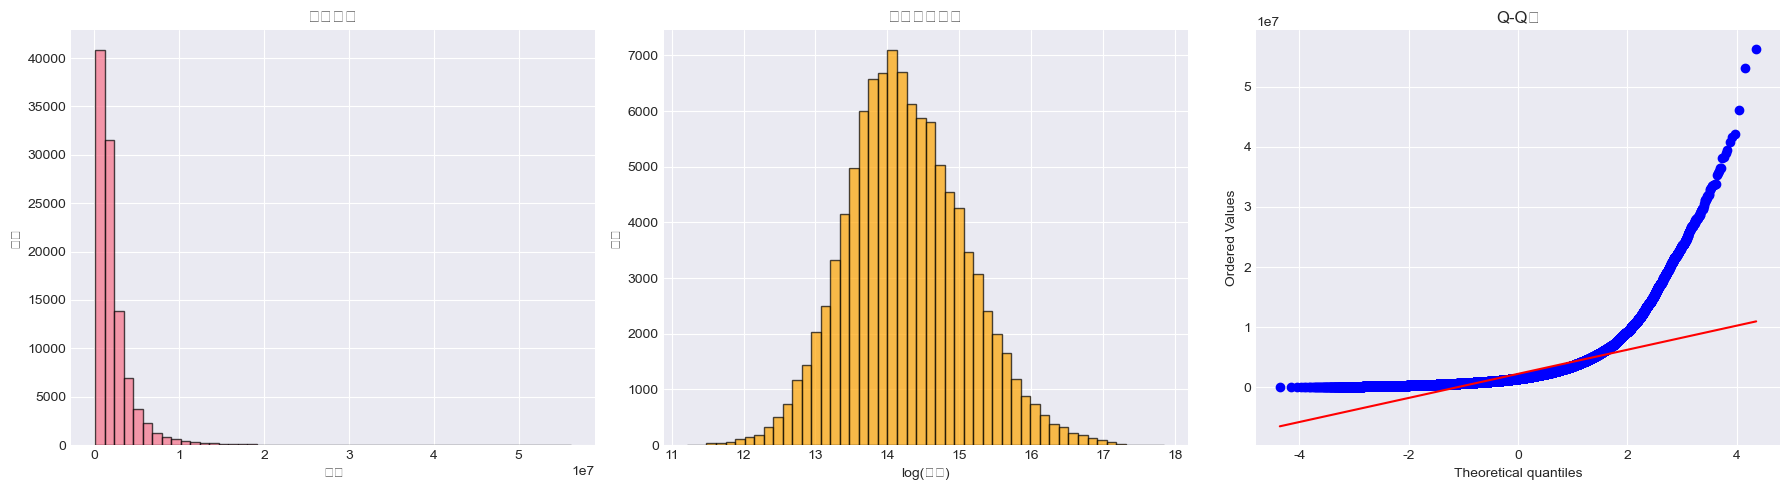

In [113]:
# ==================== 2. EDA（探索性数据分析）====================  
print("\n" + "=" * 80)  
print("步骤 2: 探索性数据分析 (EDA)")  
print("=" * 80)  

# 2.1 基本信息  
print("\n--- 2.1 数据基本信息 ---")  
print(df.info())  

# 2.2 统计描述  
print("\n--- 2.2 数值特征统计描述 ---")  
print(df.describe())  

# 2.3 缺失值分析  
print("\n--- 2.3 缺失值分析 ---")  
missing_data = pd.DataFrame({  
    '特征': df.columns,  
    '缺失数量': df.isnull().sum(),  
    '缺失比例': df.isnull().sum() / len(df) * 100  
})  
missing_data = missing_data[missing_data['缺失数量'] > 0].sort_values('缺失比例', ascending=False)  
print(missing_data)  

# 2.4 目标变量分析  
print("\n--- 2.4 目标变量(Price)分析 ---")  
print(f"价格统计:\n{df['Price'].describe()}")  
print(f"\n价格偏度: {df['Price'].skew():.2f}")  
print(f"价格峰度: {df['Price'].kurtosis():.2f}")  

# 可视化价格分布  
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

# 原始价格分布  
axes[0].hist(df['Price'], bins=50, edgecolor='black', alpha=0.7)  
axes[0].set_xlabel('价格')  
axes[0].set_ylabel('频数')  
axes[0].set_title('价格分布')  

# 对数价格分布  
axes[1].hist(np.log1p(df['Price']), bins=50, edgecolor='black', alpha=0.7, color='orange')  
axes[1].set_xlabel('log(价格)')  
axes[1].set_ylabel('频数')  
axes[1].set_title('对数价格分布')  

# Q-Q图  
stats.probplot(df['Price'], dist="norm", plot=axes[2])  
axes[2].set_title('Q-Q图')  

plt.tight_layout()  
plt.savefig('price_distribution.png', dpi=300, bbox_inches='tight')  
print("价格分布图已保存为 'price_distribution.png'")  
plt.show()  

## 数据清洗和预处理

In [114]:
df_clean = df.copy()

In [115]:
# ==================== 创建缺失值指示变量 ====================
print("\n" + "=" * 80)
print("步骤 3.0: 创建缺失值指示变量")
print("=" * 80)

# 3.0.1 首先检测所有有缺失值的特征
print("\n--- 3.0.1 检测缺失值 ---")
missing_info = pd.DataFrame({
    '特征名': df_clean.columns,
    '缺失数量': df_clean.isnull().sum(),
    '缺失比例': df_clean.isnull().sum() / len(df_clean) * 100
})
missing_info = missing_info[missing_info['缺失数量'] > 0].sort_values('缺失比例', ascending=False)

print(f"\n发现 {len(missing_info)} 个特征有缺失值:")
print(missing_info.to_string(index=False))

# 3.0.2 为每个有缺失值的特征创建指示变量
print("\n--- 3.0.2 创建缺失指示变量 ---")

# 逐个创建缺失指示变量
for feature in missing_info['特征名']:
    # 创建缺失指示变量名
    indicator_name = f'{feature}_缺失'
    
    # 创建0/1变量：1表示缺失，0表示非缺失
    df_clean[indicator_name] = df_clean[feature].isnull().astype(int)
    
    # 统计信息
    missing_count = df_clean[indicator_name].sum()
    missing_pct = missing_count / len(df_clean) * 100
    
    print(f"✓ 已创建 '{indicator_name}': 缺失样本数 = {missing_count} ({missing_pct:.2f}%)")

# 3.0.3 验证创建的指示变量
print("\n--- 3.0.3 验证缺失指示变量 ---")

# 统计所有缺失指示变量
missing_indicator_cols = [col for col in df_clean.columns if col.endswith('_缺失')]
print(f"\n总共创建了 {len(missing_indicator_cols)} 个缺失指示变量")

# 显示前10个缺失指示变量的统计
print("\n前10个缺失指示变量的统计:")
for col in missing_indicator_cols[:10]:
    original_col = col.replace('_缺失', '')
    missing_count = df_clean[col].sum()
    print(f"{col:40s}: {missing_count:6d} 个缺失 ({missing_count/len(df_clean)*100:5.2f}%)")

# 3.0.4 查看某些具体特征的缺失指示变量示例
print("\n--- 3.0.4 缺失指示变量示例 ---")

# 选择几个关键特征展示
example_features = ['套内面积', '房屋户型', '别墅类型', '上次交易', '抵押信息']
example_features = [f for f in example_features if f in df_clean.columns]

if example_features:
    print("\n关键特征的缺失情况示例（前10行）:")
    for feat in example_features[:3]:  # 只展示前3个
        if f'{feat}_缺失' in df_clean.columns:
            print(f"\n特征: {feat}")
            print(df_clean[[feat, f'{feat}_缺失']].head(10).to_string())


步骤 3.0: 创建缺失值指示变量

--- 3.0.1 检测缺失值 ---

发现 42 个特征有缺失值:
      特征名   缺失数量       缺失比例
     抵押信息 103871 100.000000
     别墅类型 102428  98.610777
     环线位置  75774  72.950102
     户型介绍  75100  72.301220
       供暖  72926  70.208239
      供热费  72488  69.786562
   物业办公电话  68935  66.365973
     套内面积  67887  65.357029
       环线  63452  61.087310
     房屋年限  44510  42.851229
     交通出行  43264  41.651664
     周边配套  43138  41.530360
     物业公司  37908  36.495268
      开发商  36141  34.794120
     停车费用  35553  34.228033
     建筑年代  35101  33.792878
      停车位  34568  33.279741
    容 积 率  33154  31.918437
    绿 化 率  32883  31.657537
      燃气费  32701  31.482319
    物 业 费  31158  29.996823
       供水  30298  29.168873
       供电  30292  29.163097
建筑结构_comm  29119  28.033811
     产权描述  28413  27.354122
     物业类别  28413  27.354122
     上次交易  25449  24.500582
     房屋优势  21236  20.444590
     核心卖点  18614  17.920305
     配备电梯  12351  11.890711
  板块_comm   7578   7.295588
       区县   7241   6.971147
     楼栋总数   7131   6

In [116]:
# ==================== 处理环线信息====================
print("\n--- 处理环线信息 ---")



# 定义每个城市的环线顺序（从内到外）
ring_order = {
    0: ['二环内', '二至三环', '三至四环', '四至五环', '五至六环', '六环外'],
    2: ['内环内', '内环至外环', '外环外'],
    3: ['内环内', '内环至中环', '中环至外环', '外环外'],
    4: ['内环内', '内环至中环', '中环至外环', '外环外'],
    7: ['内环内', '中环至外环']
}

# 创建归一化映射
ring_normalized = {}
for city, rings in ring_order.items():
    n = len(rings)
    if n > 1:
        ring_normalized.update({(city, ring): i / (n - 1) for i, ring in enumerate(rings)})
    else:
        ring_normalized[(city, rings[0])] = 0.5  # 只有一个环线时设为0.5

# 应用归一化
df_clean['环线_归一化'] = df_clean.apply(
    lambda row: ring_normalized.get((row['城市'], row['环线']), np.nan), axis=1
)

# 用所在区域的中位数填充缺失值
df_clean['环线_归一化'] = df_clean.groupby('区域')['环线_归一化'].transform(
    lambda x: x.fillna(x.median())
)

# 如果区域中位数也是NaN，用城市的中位数填充
df_clean['环线_归一化'] = df_clean.groupby('城市')['环线_归一化'].transform(
    lambda x: x.fillna(x.median())
)

# 如果还有缺失，用全局中位数填充
df_clean['环线_归一化'].fillna(df_clean['环线_归一化'].median(), inplace=True)

print(f"环线归一化完成")
print(f"归一化后统计:\n{df_clean['环线_归一化'].describe()}")
print(f"\n各城市环线分布:")
print(df_clean.groupby('城市')['环线_归一化'].agg(['mean', 'median', 'min', 'max', 'count']))




#############################################################################################




--- 处理环线信息 ---
环线归一化完成
归一化后统计:
count    103871.000000
mean          0.440063
std           0.317317
min           0.000000
25%           0.333333
50%           0.400000
75%           0.600000
max           1.000000
Name: 环线_归一化, dtype: float64

各城市环线分布:
        mean    median       min       max  count
城市                                               
0   0.603796  0.600000  0.000000  1.000000  16491
1   0.400000  0.400000  0.400000  0.400000   6437
2   0.189710  0.000000  0.000000  1.000000  24996
3   0.634190  0.666667  0.000000  1.000000  21472
4   0.574834  0.666667  0.000000  1.000000   4363
5   0.333333  0.333333  0.333333  0.333333   3582
6   0.400000  0.400000  0.400000  0.400000   2281
7   0.826014  1.000000  0.000000  1.000000   1184
8   0.400000  0.400000  0.400000  0.400000   5931
9   0.400000  0.400000  0.400000  0.400000   1323
10  0.400000  0.400000  0.400000  0.400000  15057
11  0.400000  0.400000  0.400000  0.400000    754


In [117]:
# ==================== 房屋户型特征提取 ====================

import re

def extract_room_info_optimized(room_str):
    """
    提取房屋户型中的房间数量
    处理格式：
    1. "X室X厅X厨X卫" - 标准格式
    2. "X房间X卫" - 简化格式
    3. 空值/缺失值
    """
    if pd.isna(room_str) or room_str == '':
        return {
            '卧室数量': np.nan,
            '客厅数量': np.nan,
            '厨房数量': np.nan,
            '卫生间数量': np.nan
        }
    
    room_str = str(room_str).strip()
    
    # 初始化结果
    result = {
        '卧室数量': np.nan,
        '客厅数量': np.nan,
        '厨房数量': np.nan,
        '卫生间数量': np.nan
    }
    
    # 提取卧室数量 (室)
    bedroom_match = re.search(r'(\d+)室', room_str)
    if bedroom_match:
        result['卧室数量'] = int(bedroom_match.group(1))
    
    # 如果没有"室"，尝试"房间"
    if pd.isna(result['卧室数量']):
        room_match = re.search(r'(\d+)房间', room_str)
        if room_match:
            result['卧室数量'] = int(room_match.group(1))
    
    # 提取客厅数量 (厅)
    living_match = re.search(r'(\d+)厅', room_str)
    if living_match:
        result['客厅数量'] = int(living_match.group(1))
    else:
        # 如果没有明确标注客厅，默认为0（如"X房间X卫"格式）
        if '房间' in room_str:
            result['客厅数量'] = 0
    
    # 提取厨房数量 (厨)
    kitchen_match = re.search(r'(\d+)厨', room_str)
    if kitchen_match:
        result['厨房数量'] = int(kitchen_match.group(1))
    else:
        # 如果没有明确标注厨房，默认为0（如"X房间X卫"格式）
        if '房间' in room_str:
            result['厨房数量'] = 0
    
    # 提取卫生间数量 (卫)
    bathroom_match = re.search(r'(\d+)卫', room_str)
    if bathroom_match:
        result['卫生间数量'] = int(bathroom_match.group(1))
    
    return result

# ==================== 应用到数据集 ====================

print("=" * 80)
print("提取房屋户型特征")
print("=" * 80)

# 应用提取函数
room_features = df_clean['房屋户型'].apply(extract_room_info_optimized)

# 将字典转换为DataFrame
room_features_df = pd.DataFrame(room_features.tolist())

# 添加到原数据集
df_clean['卧室数量'] = room_features_df['卧室数量']
df_clean['客厅数量'] = room_features_df['客厅数量']
df_clean['厨房数量'] = room_features_df['厨房数量']
df_clean['卫生间数量'] = room_features_df['卫生间数量']

# ==================== 验证提取结果 ====================

print("\n--- 提取结果验证 ---")
print("\n原始数据 vs 提取结果（前20行）：")
validation_df = pd.DataFrame({
    '房屋户型': df_clean['房屋户型'].head(20),
    '卧室': df_clean['卧室数量'].head(20),
    '客厅': df_clean['客厅数量'].head(20),
    '厨房': df_clean['厨房数量'].head(20),
    '卫生间': df_clean['卫生间数量'].head(20)
})
print(validation_df.to_string(index=False))



# 1. 卧室卫生间比例
df_clean['卧卫比'] = df_clean['卧室数量'] / (df_clean['卫生间数量'] + 1)

# 2. 房型完整性（是否所有信息都齐全）
df_clean['房型信息完整'] = (
    df_clean['卧室数量'].notna() & 
    df_clean['客厅数量'].notna() & 
    df_clean['厨房数量'].notna() & 
    df_clean['卫生间数量'].notna()
).astype(int)

print(f"房型信息完整比例: {df_clean['房型信息完整'].mean():.2%}")


new_room_features = [
    '卧室数量', '客厅数量', '厨房数量', '卫生间数量',
    '卧卫比', '房型信息完整'
]

print(f"\n新增房间相关特征: {new_room_features}")

print("\n" + "=" * 80)
print("房屋户型特征提取完成！")
print("=" * 80)

提取房屋户型特征

--- 提取结果验证 ---

原始数据 vs 提取结果（前20行）：
    房屋户型  卧室  客厅  厨房  卫生间
2室1厅1厨1卫 2.0 1.0 1.0  1.0
3室1厅1厨1卫 3.0 1.0 1.0  1.0
3室2厅1厨2卫 3.0 2.0 1.0  2.0
6室3厅1厨3卫 6.0 3.0 1.0  3.0
   1房间1卫 1.0 0.0 0.0  1.0
5室2厅1厨4卫 5.0 2.0 1.0  4.0
3室2厅1厨2卫 3.0 2.0 1.0  2.0
     NaN NaN NaN NaN  NaN
3室1厅1厨2卫 3.0 1.0 1.0  2.0
5室3厅1厨4卫 5.0 3.0 1.0  4.0
3室2厅1厨3卫 3.0 2.0 1.0  3.0
2室1厅1厨1卫 2.0 1.0 1.0  1.0
3室2厅1厨3卫 3.0 2.0 1.0  3.0
1室1厅1厨1卫 1.0 1.0 1.0  1.0
3室2厅1厨2卫 3.0 2.0 1.0  2.0
2室1厅1厨1卫 2.0 1.0 1.0  1.0
   2房间1卫 2.0 0.0 0.0  1.0
2室1厅1厨1卫 2.0 1.0 1.0  1.0
2室1厅1厨1卫 2.0 1.0 1.0  1.0
4室3厅1厨2卫 4.0 3.0 1.0  2.0
房型信息完整比例: 99.44%

新增房间相关特征: ['卧室数量', '客厅数量', '厨房数量', '卫生间数量', '卧卫比', '房型信息完整']

房屋户型特征提取完成！


In [118]:
# ==================== 处理楼层特征====================
print("\n---处理楼层特征---")

def extract_floor_info_improved(floor_str):
    """
    提取楼层信息
    返回: (当前楼层0-1数值, 总楼层数, 楼层位置文本)
    
    当前楼层映射规则:
    - 地下室: 0
    - 底层: 0.1
    - 低楼层: 0.3
    - 中楼层: 0.5
    - 高楼层: 0.8
    - 顶层: 1
    - 其他/空白: nan
    """
    if pd.isna(floor_str) or str(floor_str).strip() == '':
        return np.nan, np.nan, np.nan
    
    floor_str = str(floor_str).strip()
    
    # 提取总楼层数（从括号中提取）
    total_match = re.search(r'共(\d+)层', floor_str)
    total_floor = int(total_match.group(1)) if total_match else np.nan
    
    # 定义楼层位置到数值的映射
    floor_mapping = {
        '地下室': 0.0,
        '底层': 0.1,
        '低楼层': 0.3,
        '中楼层': 0.5,
        '高楼层': 0.8,
        '顶层': 1.0
    }
    
    # 识别当前楼层类型
    current_floor_value = np.nan
    floor_position = '未知'
    
    for position, value in floor_mapping.items():
        if position in floor_str:
            current_floor_value = value
            floor_position = position
            break
    
    return current_floor_value, total_floor, floor_position

# 应用函数
print("处理楼层信息...")
floor_info = df_clean['所在楼层'].apply(lambda x: extract_floor_info_improved(x))

df_clean['当前楼层_0到1'] = floor_info.apply(lambda x: x[0])
df_clean['总楼层数'] = floor_info.apply(lambda x: x[1])
df_clean['楼层位置'] = floor_info.apply(lambda x: x[2])

# 查看处理结果
print("\n楼层位置分布:")
print(df_clean['楼层位置'].value_counts())

print("\n当前楼层(0-1数值)的统计:")
print(df_clean['当前楼层_0到1'].describe())

print("\n当前楼层(0-1数值)的取值分布:")
print(df_clean['当前楼层_0到1'].value_counts().sort_index())

print("\n总楼层数统计:")
print(df_clean['总楼层数'].describe())

# 展示一些示例
print("\n处理示例（前20行）:")
sample_df = pd.DataFrame({
    '原始所在楼层': df_clean['所在楼层'].head(20),
    '当前楼层(0-1)': df_clean['当前楼层_0到1'].head(20),
    '总楼层数': df_clean['总楼层数'].head(20),
    '楼层位置': df_clean['楼层位置'].head(20)
})
print(sample_df.to_string(index=True))


---处理楼层特征---
处理楼层信息...

楼层位置分布:
楼层位置
中楼层    36251
高楼层    32132
低楼层    30668
顶层      2264
底层      1854
地下室      702
Name: count, dtype: int64

当前楼层(0-1数值)的统计:
count    103871.000000
mean          0.534133
std           0.220184
min           0.000000
25%           0.300000
50%           0.500000
75%           0.800000
max           1.000000
Name: 当前楼层_0到1, dtype: float64

当前楼层(0-1数值)的取值分布:
当前楼层_0到1
0.0      702
0.1     1854
0.3    30668
0.5    36251
0.8    32132
1.0     2264
Name: count, dtype: int64

总楼层数统计:
count    103871.000000
mean         18.272184
std          10.983698
min           0.000000
25%           7.000000
50%          18.000000
75%          28.000000
max          70.000000
Name: 总楼层数, dtype: float64

处理示例（前20行）:
        原始所在楼层  当前楼层(0-1)  总楼层数 楼层位置
0    中楼层 (共5层)        0.5     5  中楼层
1     顶层 (共6层)        1.0     6   顶层
2    低楼层 (共6层)        0.3     6  低楼层
3     底层 (共2层)        0.1     2   底层
4   中楼层 (共10层)        0.5    10  中楼层
5    地下室 (共2层)        0.0     2  地下室
6 

In [119]:
# ==================== 处理建筑面积和套内面积 ====================

def extract_area_value(area_str):
    """
    提取面积数值
    参数：
        area_str: 面积字符串，如 "52.3㎡", "127.44㎡", "" 等
    返回：
        float: 提取的数值，如果无数据则返回 np.nan
    """
    # 处理空值、空字符串、纯空格的情况
    if pd.isna(area_str) or str(area_str).strip() == '':
        return np.nan
    
    # 转换为字符串并去除首尾空格
    area_str = str(area_str).strip()
    
    # 如果字符串为空，返回nan
    if not area_str:
        return np.nan
    
    # 使用正则表达式提取数字（包括小数点）
    # 匹配模式：可能的负号 + 数字 + 可能的小数点和小数部分
    match = re.search(r'(\d+\.?\d*)', area_str)
    
    if match:
        try:
            return float(match.group(1))
        except ValueError:
            return np.nan
    else:
        return np.nan

# 应用到建筑面积列
print("处理建筑面积...")
df_clean['建筑面积_clean'] = df_clean['建筑面积'].apply(extract_area_value)

# 应用到套内面积列
print("处理套内面积...")
df_clean['套内面积_clean'] = df_clean['套内面积'].apply(extract_area_value)

# 查看处理结果
print("\n处理后的前20行数据对比：")
comparison_df = pd.DataFrame({
    '原始建筑面积': df_clean['建筑面积'].head(20),
    '处理后建筑面积': df_clean['建筑面积_clean'].head(20),
    '原始套内面积': df_clean['套内面积'].head(20),
    '处理后套内面积': df_clean['套内面积_clean'].head(20)
})
print(comparison_df.to_string())

# 统计信息
print("\n" + "="*60)
print("建筑面积统计信息：")
print(f"  - 总样本数: {len(df_clean)}")
print(f"  - 有效值数量: {df_clean['建筑面积_clean'].notna().sum()}")
print(f"  - 缺失值数量: {df_clean['建筑面积_clean'].isna().sum()}")
print(f"  - 缺失率: {df_clean['建筑面积_clean'].isna().sum() / len(df_clean) * 100:.2f}%")
print(f"\n数值统计：")
print(df_clean['建筑面积_clean'].describe())

print("\n" + "="*60)
print("套内面积统计信息：")
print(f"  - 总样本数: {len(df_clean)}")
print(f"  - 有效值数量: {df_clean['套内面积_clean'].notna().sum()}")
print(f"  - 缺失值数量: {df_clean['套内面积_clean'].isna().sum()}")
print(f"  - 缺失率: {df_clean['套内面积_clean'].isna().sum() / len(df_clean) * 100:.2f}%")
print(f"\n数值统计：")
print(df_clean['套内面积_clean'].describe())

# 计算得房率（套内面积/建筑面积）
print("\n" + "="*60)
print("计算得房率...")
df_clean['得房率'] = df_clean['套内面积_clean'] / df_clean['建筑面积_clean']

处理建筑面积...
处理套内面积...

处理后的前20行数据对比：
     原始建筑面积  处理后建筑面积   原始套内面积  处理后套内面积
0     52.3㎡    52.30      NaN      NaN
1   127.44㎡   127.44   123.7㎡   123.70
2   118.02㎡   118.02  101.95㎡   101.95
3   293.23㎡   293.23  293.23㎡   293.23
4    39.85㎡    39.85   29.94㎡    29.94
5   259.72㎡   259.72      NaN      NaN
6    134.1㎡   134.10  108.16㎡   108.16
7    12.74㎡    12.74      NaN      NaN
8   192.12㎡   192.12      NaN      NaN
9   288.96㎡   288.96  273.48㎡   273.48
10  250.35㎡   250.35  212.88㎡   212.88
11    90.6㎡    90.60   81.03㎡    81.03
12  221.56㎡   221.56  181.04㎡   181.04
13   49.97㎡    49.97   33.22㎡    33.22
14  147.19㎡   147.19      NaN      NaN
15   70.95㎡    70.95      NaN      NaN
16   46.06㎡    46.06    33.6㎡    33.60
17    82.4㎡    82.40      NaN      NaN
18   84.26㎡    84.26   73.44㎡    73.44
19  295.01㎡   295.01   250.3㎡   250.30

建筑面积统计信息：
  - 总样本数: 103871
  - 有效值数量: 103871
  - 缺失值数量: 0
  - 缺失率: 0.00%

数值统计：
count    103871.000000
mean         99.236130
std          46.793

In [120]:
# ==================== 3.4 处理房屋朝向（八个方向）====================
print("\n--- 3.4 处理朝向特征（八个方向）---")

def extract_orientation_features(orientation_str):
    """
    提取房屋朝向的八个方向特征
    返回：东、南、西、北、东南、东北、西南、西北的0/1标记
    如果原始数据为空，则返回nan
    """
    # 如果是空值，返回全nan
    if pd.isna(orientation_str):
        return {
            '朝东': np.nan,
            '朝南': np.nan,
            '朝西': np.nan,
            '朝北': np.nan,
            '朝东南': np.nan,
            '朝东北': np.nan,
            '朝西南': np.nan,
            '朝西北': np.nan
        }
    
    orientation_str = str(orientation_str).strip()
    
    # 如果字符串为空，返回全nan
    if orientation_str == '' or orientation_str == 'nan':
        return {
            '朝东': np.nan,
            '朝南': np.nan,
            '朝西': np.nan,
            '朝北': np.nan,
            '朝东南': np.nan,
            '朝东北': np.nan,
            '朝西南': np.nan,
            '朝西北': np.nan
        }
    
    # 初始化八个方向为0
    result = {
        '朝东': 0,
        '朝南': 0,
        '朝西': 0,
        '朝北': 0,
        '朝东南': 0,
        '朝东北': 0,
        '朝西南': 0,
        '朝西北': 0
    }
    
    # 先检查复合方向（两个字的方向，如"东南"、"东北"等）
    # 注意：要先检查复合方向，避免被单个方向匹配到
    if '东南' in orientation_str:
        result['朝东南'] = 1
    if '东北' in orientation_str:
        result['朝东北'] = 1
    if '西南' in orientation_str:
        result['朝西南'] = 1
    if '西北' in orientation_str:
        result['朝西北'] = 1
    
    # 再检查单个方向
    # 使用边界匹配，避免"东南"中的"东"被重复匹配
    # 检查是否有独立的"东"（不是"东南"或"东北"的一部分）
    if re.search(r'(?<!东)东(?![南北])', orientation_str) or \
       (orientation_str.startswith('东') and len(orientation_str) == 1):
        result['朝东'] = 1
    
    if '南' in orientation_str and '东南' not in orientation_str and '西南' not in orientation_str:
        # 检查是否是独立的"南"
        if re.search(r'(?<![东西])南', orientation_str):
            result['朝南'] = 1
    
    if re.search(r'(?<!西)西(?![南北])', orientation_str) or \
       (orientation_str.startswith('西') and len(orientation_str) == 1):
        result['朝西'] = 1
    
    if '北' in orientation_str and '东北' not in orientation_str and '西北' not in orientation_str:
        if re.search(r'(?<![东西])北', orientation_str):
            result['朝北'] = 1
    
    return result

# 应用提取函数
orientation_features = df_clean['房屋朝向'].apply(extract_orientation_features)

# 将字典列表转换为DataFrame
orientation_df = pd.DataFrame(orientation_features.tolist())

# 添加到原数据框
for col in orientation_df.columns:
    df_clean[col] = orientation_df[col]

# 统计各方向的分布
print("\n各朝向的分布统计：")
for col in ['朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北']:
    valid_count = df_clean[col].notna().sum()
    has_orientation = (df_clean[col] == 1).sum()
    no_orientation = (df_clean[col] == 0).sum()
    nan_count = df_clean[col].isna().sum()
    
    print(f"\n{col}:")
    print(f"  有该朝向: {has_orientation} ({has_orientation/valid_count*100:.2f}% of valid)")
    print(f"  无该朝向: {no_orientation} ({no_orientation/valid_count*100:.2f}% of valid)")
    print(f"  缺失值: {nan_count} ({nan_count/len(df_clean)*100:.2f}% of total)")

# 创建朝向总数特征（只统计有效值）
def count_orientations(row):
    """统计房屋的朝向数量"""
    orientations = ['朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北']
    
    # 如果所有朝向都是nan，返回nan
    if all(pd.isna(row[o]) for o in orientations):
        return np.nan
    
    # 否则统计1的数量
    return sum(row[o] == 1 for o in orientations)

df_clean['朝向总数'] = df_clean.apply(count_orientations, axis=1)

print(f"\n朝向总数分布:")
print(df_clean['朝向总数'].value_counts(dropna=False).sort_index())

# 创建一些衍生特征
# 是否为单一朝向
df_clean['是否单一朝向'] = (df_clean['朝向总数'] == 1).astype(float)
df_clean.loc[df_clean['朝向总数'].isna(), '是否单一朝向'] = np.nan

# 是否为南北通透
df_clean['是否南北通透'] = ((df_clean['朝南'] == 1) & (df_clean['朝北'] == 1)).astype(float)
df_clean.loc[(df_clean['朝南'].isna()) | (df_clean['朝北'].isna()), '是否南北通透'] = np.nan

# 是否为东西通透
df_clean['是否东西通透'] = ((df_clean['朝东'] == 1) & (df_clean['朝西'] == 1)).astype(float)
df_clean.loc[(df_clean['朝东'].isna()) | (df_clean['朝西'].isna()), '是否东西通透'] = np.nan

# 是否有南向（南向房屋通常更受欢迎）
df_clean['是否有南向'] = ((df_clean['朝南'] == 1) | (df_clean['朝东南'] == 1) | (df_clean['朝西南'] == 1)).astype(float)
df_clean.loc[(df_clean['朝南'].isna()) & (df_clean['朝东南'].isna()) & (df_clean['朝西南'].isna()), '是否有南向'] = np.nan

print(f"\n南北通透房屋数量: {(df_clean['是否南北通透'] == 1).sum()}")
print(f"东西通透房屋数量: {(df_clean['是否东西通透'] == 1).sum()}")
print(f"有南向房屋数量: {(df_clean['是否有南向'] == 1).sum()}")

# 显示一些样例
print("\n前20行朝向特征示例：")
orientation_cols = ['房屋朝向', '朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北', '朝向总数']
print(df_clean[orientation_cols].head(20).to_string())


--- 3.4 处理朝向特征（八个方向）---

各朝向的分布统计：

朝东:
  有该朝向: 8426 (8.11% of valid)
  无该朝向: 95444 (91.89% of valid)
  缺失值: 1 (0.00% of total)

朝南:
  有该朝向: 66752 (64.26% of valid)
  无该朝向: 37118 (35.74% of valid)
  缺失值: 1 (0.00% of total)

朝西:
  有该朝向: 4805 (4.63% of valid)
  无该朝向: 99065 (95.37% of valid)
  缺失值: 1 (0.00% of total)

朝北:
  有该朝向: 31371 (30.20% of valid)
  无该朝向: 72499 (69.80% of valid)
  缺失值: 1 (0.00% of total)

朝东南:
  有该朝向: 14100 (13.57% of valid)
  无该朝向: 89770 (86.43% of valid)
  缺失值: 1 (0.00% of total)

朝东北:
  有该朝向: 2274 (2.19% of valid)
  无该朝向: 101596 (97.81% of valid)
  缺失值: 1 (0.00% of total)

朝西南:
  有该朝向: 4709 (4.53% of valid)
  无该朝向: 99161 (95.47% of valid)
  缺失值: 1 (0.00% of total)

朝西北:
  有该朝向: 2195 (2.11% of valid)
  无该朝向: 101675 (97.89% of valid)
  缺失值: 1 (0.00% of total)

朝向总数分布:
朝向总数
1.0    74211
2.0    28640
3.0      935
4.0       84
NaN        1
Name: count, dtype: int64

南北通透房屋数量: 25476
东西通透房屋数量: 1505
有南向房屋数量: 85394

前20行朝向特征示例：
       房屋朝向   朝东   朝南   朝西   朝北  朝东南  朝东北  

In [121]:
# ==================== One-Hot编码处理（保留NaN）====================
print("\n" + "=" * 80)
print("One-Hot编码处理：装修情况和建筑结构")
print("=" * 80)

def create_onehot_with_nan(df, column_name, prefix=None):
    """
    创建one-hot编码，保留NaN值
    
    Parameters:
    -----------
    df : DataFrame
        输入数据框
    column_name : str
        要编码的列名
    prefix : str, optional
        one-hot列的前缀，默认使用列名
    
    Returns:
    --------
    DataFrame : 包含one-hot编码列的数据框
    """
    if prefix is None:
        prefix = column_name
    
    # 记录原始NaN位置
    nan_mask = df[column_name].isna()
    
    # 对非NaN值进行one-hot编码
    onehot_df = pd.get_dummies(df[column_name], prefix=prefix, dummy_na=False)
    
    # 将原本是NaN的行，其所有one-hot列都设为NaN
    if nan_mask.sum() > 0:
        onehot_df.loc[nan_mask, :] = np.nan
    
    return onehot_df

# 1. 处理"建筑结构"列
print("\n--- 1. 处理建筑结构 ---")
print(f"建筑结构唯一值:\n{df_clean['建筑结构'].value_counts()}")
print(f"建筑结构缺失数量: {df_clean['建筑结构'].isna().sum()}")

# 创建one-hot编码
structure_onehot = create_onehot_with_nan(df_clean, '建筑结构', prefix='建筑结构')

print(f"\n生成的建筑结构one-hot列:")
print(structure_onehot.columns.tolist())
print(f"\n建筑结构one-hot编码示例（前10行）:")
print(structure_onehot.head(10))

# 将one-hot列添加到数据框
for col in structure_onehot.columns:
    df_clean[col] = structure_onehot[col]

# 2. 处理"装修情况"列
print("\n--- 2. 处理装修情况 ---")
print(f"装修情况唯一值:\n{df_clean['装修情况'].value_counts()}")
print(f"装修情况缺失数量: {df_clean['装修情况'].isna().sum()}")

# 创建one-hot编码
decoration_onehot = create_onehot_with_nan(df_clean, '装修情况', prefix='装修情况')

print(f"\n生成的装修情况one-hot列:")
print(decoration_onehot.columns.tolist())
print(f"\n装修情况one-hot编码示例（前10行）:")
print(decoration_onehot.head(10))

# 将one-hot列添加到数据框
for col in decoration_onehot.columns:
    df_clean[col] = decoration_onehot[col]

# 3. 验证编码结果
print("\n--- 3. 验证编码结果 ---")

# 检查前几行
print("\n原始列和对应的one-hot编码（前10行）:")
check_cols = ['建筑结构', '装修情况'] + structure_onehot.columns.tolist() + decoration_onehot.columns.tolist()
print(df_clean[check_cols].head(10))

# 验证NaN是否正确保留
print("\n验证NaN保留情况:")

# 找到建筑结构为NaN的行
structure_nan_indices = df_clean[df_clean['建筑结构'].isna()].index
if len(structure_nan_indices) > 0:
    print(f"\n建筑结构为NaN的行数: {len(structure_nan_indices)}")
    print(f"示例行索引: {structure_nan_indices[:5].tolist()}")
    print(f"\n这些行的建筑结构one-hot编码:")
    print(df_clean.loc[structure_nan_indices[:5], structure_onehot.columns])
else:
    print("建筑结构无NaN值")

# 找到装修情况为NaN的行
decoration_nan_indices = df_clean[df_clean['装修情况'].isna()].index
if len(decoration_nan_indices) > 0:
    print(f"\n装修情况为NaN的行数: {len(decoration_nan_indices)}")
    print(f"示例行索引: {decoration_nan_indices[:5].tolist()}")
    print(f"\n这些行的装修情况one-hot编码:")
    print(df_clean.loc[decoration_nan_indices[:5], decoration_onehot.columns])
else:
    print("装修情况无NaN值")

# 验证one-hot编码的正确性（每行应该只有一个1，或全是NaN）
print("\n--- 4. 验证one-hot编码正确性 ---")

# 验证建筑结构
structure_sum = df_clean[structure_onehot.columns].sum(axis=1)
print(f"\n建筑结构one-hot每行求和统计:")
print(structure_sum.value_counts().sort_index())
print("(应该只有1.0和NaN)")

# 验证装修情况
decoration_sum = df_clean[decoration_onehot.columns].sum(axis=1)
print(f"\n装修情况one-hot每行求和统计:")
print(decoration_sum.value_counts().sort_index())
print("(应该只有1.0和NaN)")

# 5. 更新特征列表
print("\n--- 5. 更新模型特征列表 ---")

# 移除原始分类列的编码版本（如果之前创建过）
if '建筑结构_编码' in df_clean.columns:
    df_clean = df_clean.drop(columns=['建筑结构_编码'])
if '装修情况_编码' in df_clean.columns:
    df_clean = df_clean.drop(columns=['装修情况_编码'])

# 将新的one-hot特征添加到特征列表
onehot_features = structure_onehot.columns.tolist() + decoration_onehot.columns.tolist()
print(f"\n新增one-hot特征数量: {len(onehot_features)}")
print(f"one-hot特征列表: {onehot_features}")

print("\n" + "=" * 80)
print("One-Hot编码完成！")
print("=" * 80)


One-Hot编码处理：装修情况和建筑结构

--- 1. 处理建筑结构 ---
建筑结构唯一值:
建筑结构
钢混结构    82519
混合结构     8971
未知结构     4808
砖混结构     4201
框架结构     1676
钢结构      1066
砖木结构       50
Name: count, dtype: int64
建筑结构缺失数量: 580

生成的建筑结构one-hot列:
['建筑结构_未知结构', '建筑结构_框架结构', '建筑结构_混合结构', '建筑结构_砖木结构', '建筑结构_砖混结构', '建筑结构_钢混结构', '建筑结构_钢结构']

建筑结构one-hot编码示例（前10行）:
  建筑结构_未知结构 建筑结构_框架结构 建筑结构_混合结构 建筑结构_砖木结构 建筑结构_砖混结构 建筑结构_钢混结构 建筑结构_钢结构
0     False     False      True     False     False     False    False
1     False     False      True     False     False     False    False
2     False     False     False     False     False      True    False
3     False     False      True     False     False     False    False
4     False     False     False     False     False      True    False
5     False     False     False     False     False      True    False
6     False     False     False     False     False      True    False
7       NaN       NaN       NaN       NaN       NaN       NaN      NaN
8     False     False     False   

In [122]:
# ==================== 改进的梯户比例提取函数 ====================

def extract_elevator_ratio(ratio_str):
    """
    提取梯户比例信息
    返回：(梯数, 户数, 梯户比)
    """
    # 处理空值
    if pd.isna(ratio_str) or str(ratio_str).strip() == '':
        return np.nan, np.nan, np.nan
    
    ratio_str = str(ratio_str).strip()
    
    # 中文数字映射
    chinese_numbers = {
        '一': 1, '二': 2, '三': 3, '四': 4, '五': 5,
        '六': 6, '七': 7, '八': 8, '九': 9, '十': 10,
        '两': 2
    }
    
    # 提取梯数
    elevator_match = re.search(r'([一二三四五六七八九十两])梯', ratio_str)
    if elevator_match:
        elevator_chinese = elevator_match.group(1)
        elevator = chinese_numbers.get(elevator_chinese, np.nan)
    else:
        # 尝试提取阿拉伯数字
        elevator_match_num = re.search(r'(\d+)梯', ratio_str)
        elevator = int(elevator_match_num.group(1)) if elevator_match_num else np.nan
    
    # 提取户数 - 需要处理复杂的中文数字（如"十一"、"二十五"）
    household = np.nan
    
    # 先尝试匹配阿拉伯数字
    household_match_num = re.search(r'(\d+)户', ratio_str)
    if household_match_num:
        household = int(household_match_num.group(1))
    else:
        # 匹配中文数字户数
        # 处理 "二十五户" 这种复杂情况
        household_match = re.search(r'([一二三四五六七八九十两]+)户', ratio_str)
        if household_match:
            household_chinese = household_match.group(1)
            household = parse_chinese_number(household_chinese)
    
    # 计算梯户比
    if pd.notna(elevator) and pd.notna(household) and household != 0:
        ratio = elevator / household
    else:
        ratio = np.nan
    
    return elevator, household, ratio


def parse_chinese_number(chinese_str):
    """
    解析中文数字
    支持：一、二、...、十、十一、...、二十、二十一、...、九十九
    """
    chinese_numbers = {
        '一': 1, '二': 2, '三': 3, '四': 4, '五': 5,
        '六': 6, '七': 7, '八': 8, '九': 9, '十': 10,
        '两': 2, '零': 0
    }
    
    # 处理简单情况（一位数）
    if len(chinese_str) == 1:
        return chinese_numbers.get(chinese_str, np.nan)
    
    # 处理"十"
    if chinese_str == '十':
        return 10
    
    # 处理"十X"（如"十一"、"十五"）
    if chinese_str.startswith('十') and len(chinese_str) == 2:
        unit = chinese_numbers.get(chinese_str[1], 0)
        return 10 + unit
    
    # 处理"X十"（如"二十"、"三十"）
    if '十' in chinese_str and len(chinese_str) == 2:
        tens = chinese_numbers.get(chinese_str[0], 0)
        return tens * 10
    
    # 处理"X十Y"（如"二十五"、"三十八"）
    if '十' in chinese_str and len(chinese_str) == 3:
        tens = chinese_numbers.get(chinese_str[0], 0)
        unit = chinese_numbers.get(chinese_str[2], 0)
        return tens * 10 + unit
    
    return np.nan


# ==================== 应用改进的函数 ====================

print("\n--- 改进的梯户比例处理 ---")

# 应用提取函数
elevator_info = df_clean['梯户比例'].apply(lambda x: extract_elevator_ratio(x))

df_clean['梯数'] = elevator_info.apply(lambda x: x[0])
df_clean['户数'] = elevator_info.apply(lambda x: x[1])
df_clean['梯户比'] = elevator_info.apply(lambda x: x[2])

# 显示处理结果
print("\n梯户比例处理结果示例：")
sample_df = df_clean[['梯户比例', '梯数', '户数', '梯户比']].head(25)
print(sample_df.to_string())

# 统计信息
print("\n\n梯数统计：")
print(df_clean['梯数'].value_counts().sort_index())

print("\n户数统计（前20）：")
print(df_clean['户数'].value_counts().sort_index().head(20))

print("\n梯户比统计：")
print(df_clean['梯户比'].describe())

# 检查缺失值
print(f"\n梯数缺失值数量: {df_clean['梯数'].isna().sum()} ({df_clean['梯数'].isna().sum()/len(df_clean)*100:.2f}%)")
print(f"户数缺失值数量: {df_clean['户数'].isna().sum()} ({df_clean['户数'].isna().sum()/len(df_clean)*100:.2f}%)")
print(f"梯户比缺失值数量: {df_clean['梯户比'].isna().sum()} ({df_clean['梯户比'].isna().sum()/len(df_clean)*100:.2f}%)")


--- 改进的梯户比例处理 ---

梯户比例处理结果示例：
      梯户比例   梯数    户数       梯户比
0     一梯三户  1.0   3.0  0.333333
1     一梯两户  1.0   2.0  0.500000
2     一梯五户  1.0   5.0  0.200000
3      NaN  NaN   NaN       NaN
4    两梯十一户  2.0  11.0  0.181818
5     一梯六户  1.0   6.0  0.166667
6     两梯四户  2.0   4.0  0.500000
7      NaN  NaN   NaN       NaN
8     三梯八户  3.0   8.0  0.375000
9     一梯一户  1.0   1.0  1.000000
10    一梯两户  1.0   2.0  0.500000
11    一梯两户  1.0   2.0  0.500000
12    两梯两户  2.0   2.0  1.000000
13    一梯两户  1.0   2.0  0.500000
14    两梯八户  2.0   8.0  0.250000
15    一梯两户  1.0   2.0  0.500000
16  两梯二十五户  2.0  25.0  0.080000
17    两梯八户  2.0   8.0  0.250000
18    一梯两户  1.0   2.0  0.500000
19    一梯两户  1.0   2.0  0.500000
20    一梯三户  1.0   3.0  0.333333
21    一梯三户  1.0   3.0  0.333333
22    两梯四户  2.0   4.0  0.500000
23   三梯十三户  3.0  13.0  0.230769
24    一梯三户  1.0   3.0  0.333333


梯数统计：
梯数
1.0     43278
2.0     35061
3.0     15624
4.0      4504
5.0      1157
6.0      1054
7.0       150
8.0       264
9.0        15

In [123]:
# ==================== 3.6 处理配备电梯（改进版）====================
print("\n--- 3.6 处理配备电梯 ---")

def extract_elevator(elevator_str):
    """
    提取电梯信息并编码为0/1
    - '有' -> 1
    - '无' -> 0
    - NaN/空值 -> 0
    """
    if pd.isna(elevator_str):
        return 0
    
    elevator_str = str(elevator_str).strip()
    
    if elevator_str == '有':
        return 1
    else:
        return 0

# 应用电梯特征提取
df_clean['有电梯'] = df_clean['配备电梯'].apply(extract_elevator)

# 验证处理结果
print(f"配备电梯原始值分布:\n{df_clean['配备电梯'].value_counts(dropna=False)}")
print(f"\n有电梯编码分布:\n{df_clean['有电梯'].value_counts()}")
print(f"\n有电梯比例: {df_clean['有电梯'].mean()*100:.2f}%")


--- 3.6 处理配备电梯 ---
配备电梯原始值分布:
配备电梯
有      70830
无      20690
NaN    12351
Name: count, dtype: int64

有电梯编码分布:
有电梯
1    70830
0    33041
Name: count, dtype: int64

有电梯比例: 68.19%


In [124]:
# ==================== 处理别墅类型特征（One-Hot编码）====================
print("\n--- 处理别墅类型特征（One-Hot编码）---")

# 查看别墅类型的原始分布
print("别墅类型原始分布:")
print(df_clean['别墅类型'].value_counts(dropna=False))
print(f"\n空值数量: {df_clean['别墅类型'].isnull().sum()}")

# 1. 将空白/NaN标记为"非别墅"
df_clean['别墅类型_填充'] = df_clean['别墅类型'].fillna('非别墅')

# 如果有空字符串，也标记为非别墅
df_clean['别墅类型_填充'] = df_clean['别墅类型_填充'].replace('', '非别墅')
df_clean['别墅类型_填充'] = df_clean['别墅类型_填充'].replace(' ', '非别墅')

print("\n填充后的别墅类型分布:")
print(df_clean['别墅类型_填充'].value_counts())

# 2. 创建One-Hot编码，drop="独栋"以避免共线性
villa_dummies = pd.get_dummies(df_clean['别墅类型_填充'], 
                               prefix='别墅类型',
                               drop_first=False)  # 先不drop

# 3. 手动删除"独栋"列（如果存在）
if '别墅类型_独栋' in villa_dummies.columns:
    print("\n删除'独栋'列以避免共线性")
    villa_dummies = villa_dummies.drop(columns=['别墅类型_独栋'])
    print(f"删除后剩余的别墅类型列: {villa_dummies.columns.tolist()}")
else:
    print("\n'独栋'列不存在，无需删除")

# 4. 将One-Hot编码后的列添加到数据集
df_clean = pd.concat([df_clean, villa_dummies], axis=1)

print(f"\n创建的虚拟变量列:")
for col in villa_dummies.columns:
    print(f"  - {col}: {df_clean[col].sum()} 个样本")


--- 处理别墅类型特征（One-Hot编码）---
别墅类型原始分布:
别墅类型
NaN    102428
联排        852
叠拼        280
独栋        215
双拼         96
Name: count, dtype: int64

空值数量: 102428

填充后的别墅类型分布:
别墅类型_填充
非别墅    102428
联排        852
叠拼        280
独栋        215
双拼         96
Name: count, dtype: int64

删除'独栋'列以避免共线性
删除后剩余的别墅类型列: ['别墅类型_双拼', '别墅类型_叠拼', '别墅类型_联排', '别墅类型_非别墅']

创建的虚拟变量列:
  - 别墅类型_双拼: 96 个样本
  - 别墅类型_叠拼: 280 个样本
  - 别墅类型_联排: 852 个样本
  - 别墅类型_非别墅: 102428 个样本


In [125]:
# ==================== 交易权属的One-Hot编码处理 ====================
print("\n--- 处理交易权属特征（One-Hot编码）---")

# 查看交易权属的唯一值和分布
print("交易权属的唯一值和分布：")
print(df_clean['交易权属'].value_counts(dropna=False))
print(f"\n缺失值数量: {df_clean['交易权属'].isnull().sum()}")

# 使用pandas的get_dummies进行one-hot编码
# drop_first=True：删除第一个类别，避免共线性（虚拟变量陷阱）
# dummy_na=False：不为NaN创建单独的列，NaN会在所有编码列中都是0
交易权属_encoded = pd.get_dummies(
    df_clean['交易权属'], 
    prefix='交易权属',
    drop_first=True,  # 删除第一个类别以避免共线性
    dummy_na=False    # NaN不创建单独的列
)

print(f"\nOne-Hot编码后的列名:")
print(交易权属_encoded.columns.tolist())
print(f"\n编码后的特征数量: {交易权属_encoded.shape[1]}")

# 查看编码结果的前几行
print("\n编码结果示例（前10行）:")
print(交易权属_encoded.head(10))

# 将编码后的特征添加到df_clean中
df_clean = pd.concat([df_clean, 交易权属_encoded], axis=1)

# 显示哪个类别被作为基准（被删除的类别）
all_categories = df_clean['交易权属'].dropna().unique()
encoded_categories = [col.replace('交易权属_', '') for col in 交易权属_encoded.columns]
baseline_category = [cat for cat in all_categories if cat not in encoded_categories]

print(f"\n基准类别（被删除以避免共线性）: {baseline_category}")
print(f"保留的类别: {encoded_categories}")


# 统计信息
print(f"\n{'='*60}")
print("One-Hot编码统计信息")
print(f"{'='*60}")
print(f"原始特征: 交易权属 (1列)")
print(f"编码后特征: {交易权属_encoded.shape[1]}列")
print(f"基准类别: {baseline_category[0] if baseline_category else '无'}")
print(f"数据形状: {df_clean.shape}")


--- 处理交易权属特征（One-Hot编码）---
交易权属的唯一值和分布：
交易权属
商品房        98242
已购公房        2173
动迁安置房        540
二类经济适用房      535
房改房          484
集资房          461
一类经济适用房      369
拆迁还建房        308
经济适用房        272
私产           169
央产房          155
限价商品房         94
定向安置房         51
售后公房          17
回迁房            1
Name: count, dtype: int64

缺失值数量: 0

One-Hot编码后的列名:
['交易权属_二类经济适用房', '交易权属_动迁安置房', '交易权属_售后公房', '交易权属_商品房', '交易权属_回迁房', '交易权属_央产房', '交易权属_定向安置房', '交易权属_已购公房', '交易权属_房改房', '交易权属_拆迁还建房', '交易权属_私产', '交易权属_经济适用房', '交易权属_限价商品房', '交易权属_集资房']

编码后的特征数量: 14

编码结果示例（前10行）:
   交易权属_二类经济适用房  交易权属_动迁安置房  交易权属_售后公房  交易权属_商品房  交易权属_回迁房  交易权属_央产房  交易权属_定向安置房  交易权属_已购公房  交易权属_房改房  交易权属_拆迁还建房  交易权属_私产  交易权属_经济适用房  交易权属_限价商品房  交易权属_集资房
0         False       False      False      True     False     False       False      False     False       False    False       False       False     False
1         False       False      False      True     False     False       False      False     False       False    Fal

In [126]:
# ==================== 对房屋用途进行One-Hot编码 ====================
print("\n--- 对房屋用途进行One-Hot编码 ---")

# 查看房屋用途的唯一值和分布
print(f"房屋用途的唯一值:\n{df_clean['房屋用途'].value_counts()}")
print(f"\n缺失值数量: {df_clean['房屋用途'].isnull().sum()}")

# 使用pandas的get_dummies进行one-hot编码
# drop_first=True 会自动删除第一个类别以避免共线性
# dummy_na=False 会将NaN值在编码后保持为NaN（所有one-hot列都是NaN）
房屋用途_dummies = pd.get_dummies(
    df_clean['房屋用途'], 
    prefix='房屋用途',
    drop_first=True,  # 删除第一个类别以避免共线性
    dummy_na=False     # 不为NaN创建单独的列
)

# 将one-hot编码的列添加到数据框中
df_clean = pd.concat([df_clean, 房屋用途_dummies], axis=1)

print(f"\n生成的One-Hot编码列:")
print(房屋用途_dummies.columns.tolist())

print(f"\n编码后的数据示例（前10行）:")
print(df_clean[['房屋用途'] + 房屋用途_dummies.columns.tolist()].head(10))


# 统计信息
print(f"\n编码后的统计信息:")
print(房屋用途_dummies.describe())


--- 对房屋用途进行One-Hot编码 ---
房屋用途的唯一值:
房屋用途
普通住宅      96099
商住两用       3066
别墅         2032
商业办公类      1527
车库          580
公寓          311
商务公寓        144
酒店式公寓        55
公寓/公寓        14
新式里弄         10
公寓/住宅         5
商务型公寓         5
底商            5
写字楼           4
老公寓           3
商业            3
四合院           3
公寓（住宅）        2
花园洋房          1
住宅式公寓         1
Name: count, dtype: int64

缺失值数量: 1

生成的One-Hot编码列:
['房屋用途_公寓', '房屋用途_公寓/住宅', '房屋用途_公寓/公寓', '房屋用途_公寓（住宅）', '房屋用途_写字楼', '房屋用途_别墅', '房屋用途_商业', '房屋用途_商业办公类', '房屋用途_商住两用', '房屋用途_商务公寓', '房屋用途_商务型公寓', '房屋用途_四合院', '房屋用途_底商', '房屋用途_新式里弄', '房屋用途_普通住宅', '房屋用途_老公寓', '房屋用途_花园洋房', '房屋用途_车库', '房屋用途_酒店式公寓']

编码后的数据示例（前10行）:
    房屋用途  房屋用途_公寓  房屋用途_公寓/住宅  房屋用途_公寓/公寓  房屋用途_公寓（住宅）  房屋用途_写字楼  房屋用途_别墅  房屋用途_商业  房屋用途_商业办公类  房屋用途_商住两用  房屋用途_商务公寓  房屋用途_商务型公寓  房屋用途_四合院  房屋用途_底商  房屋用途_新式里弄  房屋用途_普通住宅  房屋用途_老公寓  房屋用途_花园洋房  房屋用途_车库  房屋用途_酒店式公寓
0   普通住宅    False       False       False        False     False    False    False       False      False      False

In [127]:
# ==================== 处理房屋年限（使用One-Hot编码）====================
print("\n--- 处理房屋年限（One-Hot编码）---")

# 查看房屋年限的唯一f
print(f"房屋年限的唯一值:\n{df_clean['房屋年限'].value_counts()}")

# 对房屋年限进行One-Hot编码，略去一类以避免共线性
if '房屋年限' in df_clean.columns:
    # 创建One-Hot编码，drop_first=True避免共线性，dummy_na=False不为缺失值创建列
    house_age_dummies = pd.get_dummies(df_clean['房屋年限'], 
                                       prefix='房屋年限', 
                                       drop_first=True,
                                       dtype=float)
    
    # 将缺失值设置为NaN
    house_age_dummies[df_clean['房屋年限'].isna()] = np.nan
    
    # 将编码后的列添加到数据框
    df_clean = pd.concat([df_clean, house_age_dummies], axis=1)
    
    print(f"\n房屋年限One-Hot编码后的列:")
    print(house_age_dummies.columns.tolist())
    print(f"\n编码后的列数: {len(house_age_dummies.columns)}")
    print(f"\n前几行示例:")
    print(house_age_dummies.head(15))

# ==================== 处理产权所属（使用One-Hot编码）====================
print("\n--- 处理产权所属（One-Hot编码）---")

# 查看产权所属的唯一值
print(f"产权所属的唯一值:\n{df_clean['产权所属'].value_counts()}")

# 对产权所属进行One-Hot编码，略去一类以避免共线性
if '产权所属' in df_clean.columns:
    # 创建One-Hot编码，drop_first=True避免共线性
    ownership_dummies = pd.get_dummies(df_clean['产权所属'], 
                                       prefix='产权所属', 
                                       drop_first=True,
                                       dtype=float)
    
    # 将缺失值设置为NaN
    ownership_dummies[df_clean['产权所属'].isna()] = np.nan
    
    # 将编码后的列添加到数据框
    df_clean = pd.concat([df_clean, ownership_dummies], axis=1)
    
    print(f"\n产权所属One-Hot编码后的列:")
    print(ownership_dummies.columns.tolist())
    print(f"\n编码后的列数: {len(ownership_dummies.columns)}")
    print(f"\n前几行示例:")
    print(ownership_dummies.head(15))

# 查看编码后的数据统计
print("\n--- One-Hot编码统计信息 ---")
onehot_cols = [col for col in df_clean.columns if col.startswith('房屋年限_') or col.startswith('产权所属_')]
print(f"\n总共创建了 {len(onehot_cols)} 个One-Hot编码列")
print(f"\nOne-Hot编码列的缺失值情况:")
for col in onehot_cols:
    missing_pct = df_clean[col].isna().sum() / len(df_clean) * 100
    print(f"  {col}: {missing_pct:.2f}%")


--- 处理房屋年限（One-Hot编码）---
房屋年限的唯一值:
房屋年限
满五年     34896
满两年     15361
未满两年     9104
Name: count, dtype: int64

房屋年限One-Hot编码后的列:
['房屋年限_满两年', '房屋年限_满五年']

编码后的列数: 2

前几行示例:
    房屋年限_满两年  房屋年限_满五年
0        0.0       1.0
1        0.0       1.0
2        0.0       1.0
3        0.0       1.0
4        0.0       1.0
5        0.0       1.0
6        0.0       1.0
7        0.0       1.0
8        0.0       1.0
9        0.0       1.0
10       0.0       1.0
11       0.0       1.0
12       0.0       1.0
13       0.0       1.0
14       0.0       1.0

--- 处理产权所属（One-Hot编码）---
产权所属的唯一值:
产权所属
非共有    73724
共有     30147
Name: count, dtype: int64

产权所属One-Hot编码后的列:
['产权所属_非共有']

编码后的列数: 1

前几行示例:
    产权所属_非共有
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        0.0
10       1.0
11       0.0
12       1.0
13       1.0
14       1.0

--- One-Hot编码统计信息 ---

总共创建了 4 个One-Hot编码列

One-Hot编码列的缺失值情况:
  房屋年限_缺失: 0.00%
  房屋年限_满两年: 42.85%
  房屋年限_满五

In [128]:
# ==================== 处理房屋优势特征 ====================
print("\n--- 处理房屋优势特征 ---")

def parse_house_advantage(advantage_str):
    """
    解析房屋优势字段，返回布尔值字典
    
    Parameters:
    -----------
    advantage_str : str
        房屋优势字符串
    
    Returns:
    --------
    dict : 包含4个布尔值的字典
    """
    # 初始化所有特征为False
    result = {
        '有地铁': False,
        '有装修': False,
        '房本满两年': False,
        '房本满五年': False
    }
    
    # 如果是空值，直接返回全False
    if pd.isna(advantage_str) or advantage_str == '' or advantage_str.strip() == '':
        return result
    
    # 转换为字符串并去除首尾空白
    advantage_str = str(advantage_str).strip()
    
    # 检查是否包含各个关键词
    if '地铁' in advantage_str:
        result['有地铁'] = True
    
    if '装修' in advantage_str:
        result['有装修'] = True
    
    if '房本满两年' in advantage_str:
        result['房本满两年'] = True
    
    if '房本满五年' in advantage_str:
        result['房本满五年'] = True
    
    return result

# 应用解析函数
print("开始解析房屋优势列...")
parsed_advantages = df_clean['房屋优势'].apply(parse_house_advantage)

# 将解析结果转换为DataFrame
advantage_df = pd.DataFrame(parsed_advantages.tolist())

# 将新列添加到原数据框
df_clean['有地铁'] = advantage_df['有地铁'].astype(int)
df_clean['有装修'] = advantage_df['有装修'].astype(int)
df_clean['房本满两年'] = advantage_df['房本满两年'].astype(int)
df_clean['房本满五年'] = advantage_df['房本满五年'].astype(int)

print("房屋优势解析完成！")

# 统计各特征的分布
print("\n房屋优势特征统计:")
print(f"有地铁: {df_clean['有地铁'].sum()} ({df_clean['有地铁'].sum()/len(df_clean)*100:.2f}%)")
print(f"有装修: {df_clean['有装修'].sum()} ({df_clean['有装修'].sum()/len(df_clean)*100:.2f}%)")
print(f"房本满两年: {df_clean['房本满两年'].sum()} ({df_clean['房本满两年'].sum()/len(df_clean)*100:.2f}%)")
print(f"房本满五年: {df_clean['房本满五年'].sum()} ({df_clean['房本满五年'].sum()/len(df_clean)*100:.2f}%)")

# 查看原始数据和解析结果的对比（抽样查看）
print("\n原始数据与解析结果对比（前20行）:")
comparison_df = pd.DataFrame({
    '原始_房屋优势': df_clean['房屋优势'].head(20),
    '有地铁': df_clean['有地铁'].head(20),
    '有装修': df_clean['有装修'].head(20),
    '房本满两年': df_clean['房本满两年'].head(20),
    '房本满五年': df_clean['房本满五年'].head(20)
})
print(comparison_df.to_string(index=True))


# 创建房屋优势组合特征
df_clean['房屋优势数量'] = (df_clean['有地铁'] + df_clean['有装修'] + 
                           df_clean['房本满两年'] + df_clean['房本满五年'])

print(f"\n房屋优势数量分布:")
print(df_clean['房屋优势数量'].value_counts().sort_index())



--- 处理房屋优势特征 ---
开始解析房屋优势列...
房屋优势解析完成！

房屋优势特征统计:
有地铁: 34077 (32.81%)
有装修: 43321 (41.71%)
房本满两年: 15600 (15.02%)
房本满五年: 35222 (33.91%)

原始数据与解析结果对比（前20行）:
        原始_房屋优势  有地铁  有装修  房本满两年  房本满五年
0      装修、房本满五年    0    1      0      1
1      装修、房本满五年    0    1      0      1
2   地铁、装修、房本满五年    1    1      0      1
3        、房本满五年    0    0      0      1
4      地铁、房本满五年    1    0      0      1
5        、房本满五年    0    0      0      1
6      装修、房本满五年    0    1      0      1
7         房本满五年    0    0      0      1
8      地铁、房本满五年    1    0      0      1
9         房本满五年    0    0      0      1
10     地铁、房本满五年    1    0      0      1
11        房本满五年    0    0      0      1
12        房本满五年    0    0      0      1
13  地铁、装修、房本满五年    1    1      0      1
14     装修、房本满五年    0    1      0      1
15    装修、房本满五年、    0    1      0      1
16       房本满五年、    0    0      0      1
17  地铁、装修、房本满五年    1    1      0      1
18     装修、房本满五年    0    1      0      1
19     地铁、房本满五年    1    0      0      1

房屋优

In [129]:
# ==================== 改进的建筑年代处理 ====================

def extract_build_year(year_str):
    """
    提取建筑年代，返回数值
    - 单个年份：直接返回，如 "2005年" -> 2005
    - 年份范围：返回中间值，如 "2011-2012年" -> 2011.5
    - 无效数据：返回 NaN
    """
    # 处理空值
    if pd.isna(year_str):
        return np.nan
    
    # 转换为字符串并去除空格
    year_str = str(year_str).strip()
    
    # 检查是否为空字符串或无意义值
    if year_str == '' or year_str.lower() in ['nan', 'none', '无', '未知', '暂无']:
        return np.nan
    
    # 提取所有四位数年份
    years = re.findall(r'(\d{4})', year_str)
    
    # 如果没有找到年份，返回NaN
    if not years:
        return np.nan
    
    # 将字符串转换为整数
    years = [int(y) for y in years]
    
    # 如果只有一个年份，直接返回
    if len(years) == 1:
        return float(years[0])
    
    # 如果有多个年份（年份范围），返回平均值（中间值）
    return np.mean(years)

# 应用到数据上
print("=" * 80)
print("处理建筑年代特征")
print("=" * 80)

df_clean['建筑年代_数值'] = df_clean['建筑年代'].apply(extract_build_year)

# 计算房龄（以2024年为基准）
current_year = 2025
df_clean['房龄'] = current_year - df_clean['建筑年代_数值']

# 查看结果
print("\n" + "=" * 80)
print("建筑年代处理结果统计")
print("=" * 80)

print(f"\n建筑年代_数值统计:")
print(df_clean['建筑年代_数值'].describe())

print(f"\n房龄统计:")
print(df_clean['房龄'].describe())

print(f"\n缺失值统计:")
print(f"建筑年代原始缺失: {df_clean['建筑年代'].isna().sum()} ({df_clean['建筑年代'].isna().sum()/len(df_clean)*100:.2f}%)")
print(f"建筑年代_数值缺失: {df_clean['建筑年代_数值'].isna().sum()} ({df_clean['建筑年代_数值'].isna().sum()/len(df_clean)*100:.2f}%)")


处理建筑年代特征

建筑年代处理结果统计

建筑年代_数值统计:
count    68770.000000
mean      2006.636688
std          8.835390
min       1933.000000
25%       2002.000000
50%       2008.500000
75%       2013.000000
max       2021.500000
Name: 建筑年代_数值, dtype: float64

房龄统计:
count    68770.000000
mean        18.363312
std          8.835390
min          3.500000
25%         12.000000
50%         16.500000
75%         23.000000
max         92.000000
Name: 房龄, dtype: float64

缺失值统计:
建筑年代原始缺失: 35101 (33.79%)
建筑年代_数值缺失: 35101 (33.79%)


In [130]:
import pandas as pd
import numpy as np
import re

# ==================== 专门针对这几列的解析函数 ====================

def parse_house_count(value):
    """
    解析房屋总数
    示例: '1317户' -> 1317
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)户', str(value))
    if match:
        return int(match.group(1))
    
    # 如果没有'户'字，尝试直接提取数字
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_building_count(value):
    """
    解析楼栋总数
    示例: '19栋' -> 19
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)栋', str(value))
    if match:
        return int(match.group(1))
    
    # 如果没有'栋'字，尝试直接提取数字
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_green_rate(value):
    """
    解析绿化率
    示例: '30%' -> 30.0, '40.10%' -> 40.10
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # 移除百分号并提取数字
    value_str = value_str.replace('%', '')
    
    # 提取数字（包括小数）
    match = re.search(r'([\d\.]+)', value_str)
    if match:
        return float(match.group(1))
    
    return np.nan


def parse_volume_rate(value):
    """
    解析容积率
    示例: '3' -> 3.0, '1.73' -> 1.73
    """
    if pd.isna(value):
        return np.nan
    
    try:
        return float(value)
    except (ValueError, TypeError):
        # 如果转换失败，尝试提取数字
        match = re.search(r'([\d\.]+)', str(value))
        if match:
            return float(match.group(1))
        return np.nan


def parse_property_fee(value):
    """
    解析物业费，处理范围值（取平均）
    示例: 
    '1.3-1.65元/月/㎡' -> 1.475
    '0.65元/月/㎡' -> 0.65
    '7元/月/㎡' -> 7.0
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # 提取所有数字（包括小数）
    numbers = re.findall(r'([\d\.]+)', value_str)
    
    if not numbers:
        return np.nan
    
    # 转换为浮点数
    numbers = [float(n) for n in numbers]
    
    # 如果有多个数字（范围），取平均值
    if len(numbers) > 1:
        return np.mean(numbers)
    else:
        return numbers[0]


# ==================== 应用解析函数 ====================

print("=" * 80)
print("解析特定列为数值类型")
print("=" * 80)

# 解析房屋总数
print("\n--- 解析房屋总数 ---")
df_clean['房屋总数_数值'] = df_clean['房屋总数'].apply(parse_house_count)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': df_clean['房屋总数'].head(20),
    '解析后': df_clean['房屋总数_数值'].head(20)
}))
print(f"\n统计信息:\n{df_clean['房屋总数_数值'].describe()}")
print(f"缺失值数量: {df_clean['房屋总数_数值'].isna().sum()} ({df_clean['房屋总数_数值'].isna().sum()/len(df_clean)*100:.2f}%)")

# 解析楼栋总数
print("\n" + "=" * 80)
print("--- 解析楼栋总数 ---")
df_clean['楼栋总数_数值'] = df_clean['楼栋总数'].apply(parse_building_count)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': df_clean['楼栋总数'].head(20),
    '解析后': df_clean['楼栋总数_数值'].head(20)
}))
print(f"\n统计信息:\n{df_clean['楼栋总数_数值'].describe()}")
print(f"缺失值数量: {df_clean['楼栋总数_数值'].isna().sum()} ({df_clean['楼栋总数_数值'].isna().sum()/len(df_clean)*100:.2f}%)")

# 解析绿化率
print("\n" + "=" * 80)
print("--- 解析绿化率 ---")
df_clean['绿化率_数值'] = df_clean['绿 化 率'].apply(parse_green_rate)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': df_clean['绿 化 率'].head(20),
    '解析后': df_clean['绿化率_数值'].head(20)
}))
print(f"\n统计信息:\n{df_clean['绿化率_数值'].describe()}")
print(f"缺失值数量: {df_clean['绿化率_数值'].isna().sum()} ({df_clean['绿化率_数值'].isna().sum()/len(df_clean)*100:.2f}%)")

# 解析容积率
print("\n" + "=" * 80)
print("--- 解析容积率 ---")
df_clean['容积率_数值'] = df_clean['容 积 率'].apply(parse_volume_rate)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': df_clean['容 积 率'].head(20),
    '解析后': df_clean['容积率_数值'].head(20)
}))
print(f"\n统计信息:\n{df_clean['容积率_数值'].describe()}")
print(f"缺失值数量: {df_clean['容积率_数值'].isna().sum()} ({df_clean['容积率_数值'].isna().sum()/len(df_clean)*100:.2f}%)")

# 解析物业费
print("\n" + "=" * 80)
print("--- 解析物业费 ---")
df_clean['物业费_数值'] = df_clean['物 业 费'].apply(parse_property_fee)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': df_clean['物 业 费'].head(20),
    '解析后': df_clean['物业费_数值'].head(20)
}))
print(f"\n统计信息:\n{df_clean['物业费_数值'].describe()}")
print(f"缺失值数量: {df_clean['物业费_数值'].isna().sum()} ({df_clean['物业费_数值'].isna().sum()/len(df_clean)*100:.2f}%)")


解析特定列为数值类型

--- 解析房屋总数 ---
前20个样本:
      原始值     解析后
0   1317户  1317.0
1   2317户  2317.0
2   1554户  1554.0
3     66户    66.0
4   1685户  1685.0
5    430户   430.0
6   1100户  1100.0
7   1100户  1100.0
8    522户   522.0
9    396户   396.0
10  1339户  1339.0
11  1212户  1212.0
12  1887户  1887.0
13    85户    85.0
14   458户   458.0
15  1036户  1036.0
16  1947户  1947.0
17   320户   320.0
18  3087户  3087.0
19  1804户  1804.0

统计信息:
count    96740.000000
mean      1922.226969
std       1868.281271
min          1.000000
25%        679.000000
50%       1372.000000
75%       2504.000000
max      12669.000000
Name: 房屋总数_数值, dtype: float64
缺失值数量: 7131 (6.87%)

--- 解析楼栋总数 ---
前20个样本:
    原始值   解析后
0   19栋  19.0
1   40栋  40.0
2   20栋  20.0
3   27栋  27.0
4   19栋  19.0
5   89栋  89.0
6   10栋  10.0
7   10栋  10.0
8    3栋   3.0
9   48栋  48.0
10  36栋  36.0
11  19栋  19.0
12  43栋  43.0
13   3栋   3.0
14   3栋   3.0
15  11栋  11.0
16  14栋  14.0
17   2栋   2.0
18  28栋  28.0
19  10栋  10.0

统计信息:
count    96740.000000
mean   

In [131]:
# ==================== One-Hot编码处理：供水、供暖、供电 ====================
print("\n" + "=" * 80)
print("One-Hot编码处理：供水、供暖、供电")
print("=" * 80)

def create_onehot_from_multivalue(df, column_name, drop_first=True):
    """
    对包含多值的列进行one-hot编码（值用'/'分隔）
    
    参数:
        df: 数据框
        column_name: 要处理的列名
        drop_first: 是否删除第一个类别以避免共线性
    
    返回:
        新的one-hot编码数据框
    """
    print(f"\n处理列: {column_name}")
    print(f"原始数据示例:\n{df[column_name].head(10)}")
    
    # 1. 收集所有唯一值
    all_values = set()
    for value in df[column_name].dropna():
        if pd.notna(value) and str(value).strip():
            # 分割多值（用'/'分隔）
            values = [v.strip() for v in str(value).split('/')]
            all_values.update(values)
    
    # 排序以保证一致性
    all_values = sorted(list(all_values))
    print(f"\n发现的唯一值: {all_values}")
    
    # 2. 创建one-hot编码列
    onehot_df = pd.DataFrame(index=df.index)
    
    for unique_value in all_values:
        col_name = f"{column_name}_{unique_value}"
        
        # 初始化为NaN
        onehot_df[col_name] = np.nan
        
        # 只对非空值进行处理
        valid_mask = df[column_name].notna() & (df[column_name] != '')
        
        if valid_mask.sum() > 0:
            # 检查是否包含该值
            onehot_df.loc[valid_mask, col_name] = df.loc[valid_mask, column_name].apply(
                lambda x: 1 if unique_value in str(x) else 0
            )
    
    # 3. 剔除一列以避免共线性（如果需要）
    if drop_first and len(onehot_df.columns) > 1:
        dropped_col = onehot_df.columns[0]
        onehot_df = onehot_df.drop(columns=[dropped_col])
        print(f"为避免共线性，删除列: {dropped_col}")
    
    print(f"生成的one-hot列: {list(onehot_df.columns)}")
    print(f"\nOne-hot编码结果示例:")
    print(onehot_df.head(10))
    print(f"\n各列的统计:")
    print(onehot_df.describe())
    
    return onehot_df


# 应用到三个列
supply_columns = ['供水', '供暖', '供电']

# 存储所有one-hot编码结果
onehot_dfs = []

for col in supply_columns:
    if col in df_clean.columns:
        onehot_df = create_onehot_from_multivalue(df_clean, col, drop_first=True)
        onehot_dfs.append(onehot_df)
    else:
        print(f"\n警告: 列 '{col}' 不存在于数据中")

# 合并one-hot编码结果到原数据框
if onehot_dfs:
    df_clean = pd.concat([df_clean] + onehot_dfs, axis=1)
    print(f"\n\nOne-hot编码完成！新增列数: {sum(len(df.columns) for df in onehot_dfs)}")
    print(f"数据框新形状: {df_clean.shape}")

# 显示处理后的示例
print("\n" + "=" * 80)
print("处理后的数据示例（原始列 + One-Hot编码列）")
print("=" * 80)

# 选择相关列显示
display_cols = supply_columns.copy()
for df_oh in onehot_dfs:
    display_cols.extend(df_oh.columns.tolist())

if all(col in df_clean.columns for col in display_cols):
    print(df_clean[display_cols].head(15).to_string())

# 统计每个one-hot列的分布
print("\n" + "=" * 80)
print("One-Hot编码列的值分布统计")
print("=" * 80)

for df_oh in onehot_dfs:
    for col in df_oh.columns:
        if col in df_clean.columns:
            value_counts = df_clean[col].value_counts(dropna=False)
            print(f"\n{col}:")
            print(f"  1的数量: {value_counts.get(1, 0)} ({value_counts.get(1, 0)/len(df_clean)*100:.2f}%)")
            print(f"  0的数量: {value_counts.get(0, 0)} ({value_counts.get(0, 0)/len(df_clean)*100:.2f}%)")
            nan_count = df_clean[col].isna().sum()
            print(f"  NaN的数量: {nan_count} ({nan_count/len(df_clean)*100:.2f}%)")


One-Hot编码处理：供水、供暖、供电

处理列: 供水
原始数据示例:
0       民水
1    商水/民水
2    商水/民水
3       民水
4    商水/民水
5       民水
6    商水/民水
7    商水/民水
8       民水
9    商水/民水
Name: 供水, dtype: object

发现的唯一值: ['商水', '民水']
为避免共线性，删除列: 供水_商水
生成的one-hot列: ['供水_民水']

One-hot编码结果示例:
   供水_民水
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0

各列的统计:
              供水_民水
count  73573.000000
mean       0.989711
std        0.100913
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000

处理列: 供暖
原始数据示例:
0        集中供暖
1         自采暖
2    集中供暖/自采暖
3         自采暖
4    集中供暖/自采暖
5         自采暖
6        集中供暖
7        集中供暖
8        集中供暖
9        集中供暖
Name: 供暖, dtype: object

发现的唯一值: ['无供暖', '自采暖', '集中供暖']
为避免共线性，删除列: 供暖_无供暖
生成的one-hot列: ['供暖_自采暖', '供暖_集中供暖']

One-hot编码结果示例:
   供暖_自采暖  供暖_集中供暖
0     0.0      1.0
1     1.0      0.0
2     1.0      1.0
3     1.0      0.0
4     1.0      1.0
5     1.0      0.0
6     0.0      1.0
7     0.0      1.0
8     0

In [132]:
# ==================== 解析燃气费和供热费特征 ====================

def extract_utility_fee(fee_str):
    """
    提取费用数值（取范围的平均值）
    例如：'2.61元/m³' -> 2.61
         '2.61-2.63元/m³' -> 2.62
         '' 或 NaN -> NaN
    """
    if pd.isna(fee_str) or str(fee_str).strip() == '':
        return np.nan
    
    fee_str = str(fee_str)
    
    # 提取所有数字（包括小数）
    numbers = re.findall(r'(\d+\.?\d*)', fee_str)
    
    if numbers:
        # 如果有多个数字（范围），取平均值
        numbers = [float(n) for n in numbers]
        return np.mean(numbers)
    else:
        return np.nan

# 应用到燃气费列
print("=" * 80)
print("处理燃气费特征")
print("=" * 80)

df_clean['燃气费_数值'] = df_clean['燃气费'].apply(extract_utility_fee)

print(f"\n原始燃气费数据示例:")
print(df_clean['燃气费'].head(20))

print(f"\n处理后的燃气费数值:")
print(df_clean['燃气费_数值'].head(20))

print(f"\n燃气费统计信息:")
print(df_clean['燃气费_数值'].describe())

print(f"\n燃气费唯一值:")
print(df_clean['燃气费_数值'].value_counts().sort_index())

# 应用到供热费列
print("\n" + "=" * 80)
print("处理供热费特征")
print("=" * 80)

df_clean['供热费_数值'] = df_clean['供热费'].apply(extract_utility_fee)

print(f"\n原始供热费数据示例:")
print(df_clean['供热费'].head(20))

print(f"\n处理后的供热费数值:")
print(df_clean['供热费_数值'].head(20))

print(f"\n供热费统计信息:")
print(df_clean['供热费_数值'].describe())

print(f"\n供热费唯一值:")
print(df_clean['供热费_数值'].value_counts().sort_index())

# 检查缺失情况
print("\n" + "=" * 80)
print("缺失值统计")
print("=" * 80)

print(f"\n燃气费缺失数量: {df_clean['燃气费_数值'].isna().sum()} "
      f"({df_clean['燃气费_数值'].isna().sum() / len(df_clean) * 100:.2f}%)")

print(f"供热费缺失数量: {df_clean['供热费_数值'].isna().sum()} "
      f"({df_clean['供热费_数值'].isna().sum() / len(df_clean) * 100:.2f}%)")




处理燃气费特征

原始燃气费数据示例:
0          2.61元/m³
1          2.61元/m³
2          2.61元/m³
3     2.61-2.63元/m³
4     2.61-2.63元/m³
5          2.61元/m³
6          2.61元/m³
7          2.61元/m³
8          2.61元/m³
9          2.61元/m³
10         2.61元/m³
11         2.61元/m³
12         2.61元/m³
13         2.61元/m³
14         2.61元/m³
15         2.61元/m³
16         2.61元/m³
17         2.61元/m³
18    2.61-2.63元/m³
19         2.61元/m³
Name: 燃气费, dtype: object

处理后的燃气费数值:
0     2.61
1     2.61
2     2.61
3     2.62
4     2.62
5     2.61
6     2.61
7     2.61
8     2.61
9     2.61
10    2.61
11    2.61
12    2.61
13    2.61
14    2.61
15    2.61
16    2.61
17    2.61
18    2.62
19    2.61
Name: 燃气费_数值, dtype: float64

燃气费统计信息:
count    71170.000000
mean         2.683228
std          0.620354
min          0.400000
25%          1.980000
50%          2.610000
75%          3.250000
max          5.000000
Name: 燃气费_数值, dtype: float64

燃气费唯一值:
燃气费_数值
0.40     23
1.00     37
1.10     11
1.11      8
1.20      2
   

## 保留指定列

In [135]:
# ==================== 选择指定列生成 df_selected ====================
print("\n" + "=" * 80)
print("生成 df_selected：保留指定特征")
print("=" * 80)

# 定义要保留的列（按照您提供的顺序）
selected_columns = [
    # 基本信息
    '城市', '区域', '板块', 'Price',
    
    # 缺失指示变量
    '抵押信息_缺失', '别墅类型_缺失', '环线位置_缺失', '户型介绍_缺失', 
    '供暖_缺失', '供热费_缺失', '物业办公电话_缺失', '套内面积_缺失', 
    '环线_缺失', '房屋年限_缺失', '交通出行_缺失', '周边配套_缺失', 
    '物业公司_缺失', '开发商_缺失', '停车费用_缺失', '建筑年代_缺失', 
    '停车位_缺失', '容 积 率_缺失', '绿 化 率_缺失', '燃气费_缺失', 
    '物 业 费_缺失', '供水_缺失', '供电_缺失', '建筑结构_comm_缺失', 
    '产权描述_缺失', '物业类别_缺失', '上次交易_缺失', '房屋优势_缺失', 
    '核心卖点_缺失', '配备电梯_缺失', '板块_comm_缺失', '区县_缺失', 
    '楼栋总数_缺失', '房屋总数_缺失', 'coord_x_缺失', 'coord_y_缺失', 
    '梯户比例_缺失', '房屋户型_缺失', '装修情况_缺失', '建筑结构_缺失', 
    '房屋用途_缺失', '房屋朝向_缺失',
    
    # 数值特征
    '环线_归一化', '卧室数量', '客厅数量', '厨房数量', '卫生间数量', 
    '卧卫比', '房型信息完整', '当前楼层_0到1', '总楼层数', '楼层位置', 
    '建筑面积_clean', '套内面积_clean', '得房率',
    
    # 朝向特征
    '朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北', 
    '朝向总数', '是否单一朝向', '是否南北通透', '是否东西通透', '是否有南向',
    
    # 建筑结构独热编码
    '建筑结构_未知结构', '建筑结构_框架结构', '建筑结构_混合结构', 
    '建筑结构_砖木结构', '建筑结构_砖混结构', '建筑结构_钢混结构', 
    '建筑结构_钢结构',
    
    # 装修情况独热编码
    '装修情况_其他', '装修情况_毛坯', '装修情况_简装', '装修情况_精装',
    
    # 梯户特征
    '梯数', '户数', '梯户比', '有电梯',
    
    # 别墅类型独热编码
    '别墅类型_填充', '别墅类型_双拼', '别墅类型_叠拼', '别墅类型_联排', 
    '别墅类型_非别墅',
    
    # 交易权属独热编码
    '交易权属_二类经济适用房', '交易权属_动迁安置房', '交易权属_售后公房', 
    '交易权属_商品房', '交易权属_回迁房', '交易权属_央产房', 
    '交易权属_定向安置房', '交易权属_已购公房', '交易权属_房改房', 
    '交易权属_拆迁还建房', '交易权属_私产', '交易权属_经济适用房', 
    '交易权属_限价商品房', '交易权属_集资房',
    
    # 房屋用途独热编码
    '房屋用途_公寓', '房屋用途_公寓/住宅', '房屋用途_公寓/公寓', 
    '房屋用途_公寓（住宅）', '房屋用途_写字楼', '房屋用途_别墅', 
    '房屋用途_商业', '房屋用途_商业办公类', '房屋用途_商住两用', 
    '房屋用途_商务公寓', '房屋用途_商务型公寓', '房屋用途_四合院', 
    '房屋用途_底商', '房屋用途_新式里弄', '房屋用途_普通住宅', 
    '房屋用途_老公寓', '房屋用途_花园洋房', '房屋用途_车库', 
    '房屋用途_酒店式公寓',
    
    # 房屋年限特征
    '房屋年限_满两年', '房屋年限_满五年', '产权所属_非共有',
    
    # 文本提取特征
    '有地铁', '有装修', '房本满两年', '房本满五年', '房屋优势数量',
    
    # 小区属性特征
    '建筑年代_数值', '房龄', '房屋总数_数值', '楼栋总数_数值', 
    '绿化率_数值', '容积率_数值', '物业费_数值',
    
    # 供水供暖供电特征
    '供水_民水', '供暖_自采暖', '供暖_集中供暖', '供电_民电', 
    '燃气费_数值', '供热费_数值'
]

print(f"指定要保留的列数量: {len(selected_columns)}")

# 检查哪些列存在于 df_clean 中
print("\n--- 检查列的存在性 ---")

existing_columns = []
missing_columns = []

for col in selected_columns:
    if col in df_clean.columns:
        existing_columns.append(col)
    else:
        missing_columns.append(col)

print(f"\n✓ 存在的列数量: {len(existing_columns)}")
print(f"✗ 不存在的列数量: {len(missing_columns)}")

# 如果有缺失的列，显示详细信息
if missing_columns:
    print(f"\n⚠ 以下 {len(missing_columns)} 个列在数据中不存在:")
    for i, col in enumerate(missing_columns, 1):
        print(f"  {i:3d}. {col}")
    
    # 尝试找到相似的列名
    print("\n--- 尝试查找相似的列名 ---")
    for missing_col in missing_columns[:10]:  # 只显示前10个
        similar_cols = [col for col in df_clean.columns if missing_col.replace('_缺失', '') in col]
        if similar_cols:
            print(f"\n'{missing_col}' 可能的替代列:")
            for sim_col in similar_cols[:3]:
                print(f"  - {sim_col}")

# 生成 df_selected
print("\n--- 生成 df_selected ---")
df_selected = df_clean[existing_columns].copy()

print(f"\n✓ df_selected 创建成功！")
print(f"  - 形状: {df_selected.shape}")
print(f"  - 样本数: {df_selected.shape[0]:,}")
print(f"  - 特征数: {df_selected.shape[1]:,}")

# 检查数据类型分布
print("\n--- df_selected 数据类型分布 ---")
dtype_counts = df_selected.dtypes.value_counts()
print(dtype_counts)

# 检查缺失值情况
print("\n--- df_selected 缺失值情况 ---")
total_missing = df_selected.isnull().sum().sum()
if total_missing > 0:
    missing_by_col = df_selected.isnull().sum()
    missing_by_col = missing_by_col[missing_by_col > 0].sort_values(ascending=False)
    print(f"\n总缺失值数量: {total_missing:,}")
    print(f"有缺失值的列数: {len(missing_by_col)}")
    
    if len(missing_by_col) > 0:
        print(f"\n缺失值最多的前50个特征:")
        for col, count in missing_by_col.head(50).items():
            pct = count / len(df_selected) * 100
            print(f"  {col:40s}: {count:6,} ({pct:5.2f}%)")
else:
    print("✓ 没有缺失值！")

# 特征分类统计
print("\n--- df_selected 特征分类统计 ---")

feature_categories = {
    '基本信息': ['城市', '区域', '板块', 'Price'],
    '缺失指示变量': [col for col in existing_columns if col.endswith('_缺失')],
    '独热编码特征': [col for col in existing_columns if any(prefix in col for prefix in 
                    ['建筑结构_', '装修情况_', '别墅类型_', '交易权属_', '房屋用途_', 
                     '房屋年限_', '产权所属_', '供水_', '供暖_', '供电_'])],
    '朝向特征': [col for col in existing_columns if '朝' in col or '朝向' in col],
    '数值特征': [col for col in existing_columns if col not in 
                 [col for col in existing_columns if col.endswith('_缺失')] and 
                 col not in ['城市', '区域', '板块', 'Price', '楼层位置'] and
                 not any(prefix in col for prefix in ['建筑结构_', '装修情况_', '别墅类型_', 
                                                       '交易权属_', '房屋用途_', '房屋年限_', 
                                                       '产权所属_', '供水_', '供暖_', '供电_']) and
                 '朝' not in col]
}

for category, cols in feature_categories.items():
    actual_cols = [c for c in cols if c in existing_columns]
    print(f"\n{category}: {len(actual_cols)} 个特征")
    if len(actual_cols) <= 10:
        for col in actual_cols:
            print(f"  - {col}")
    else:
        print(f"  前5个: {', '.join(actual_cols[:5])}")
        print(f"  后5个: {', '.join(actual_cols[-5:])}")

# 显示 df_selected 的前几行
print("\n--- df_selected 数据预览 ---")
print("\n前5行数据（部分列）:")
preview_cols = ['城市', '区域', 'Price', '卧室数量', '建筑面积_clean', '房龄']
preview_cols = [col for col in preview_cols if col in df_selected.columns]
print(df_selected[preview_cols].head())

# 基本统计信息
print("\n--- df_selected 数值特征统计 ---")
numeric_cols = df_selected.select_dtypes(include=[np.number]).columns
print(f"\n数值特征数量: {len(numeric_cols)}")

# 显示Price的统计
if 'Price' in df_selected.columns:
    print(f"\nPrice统计信息:")
    print(df_selected['Price'].describe())

# 保存 df_selected
output_file = 'df_selected.csv'
df_selected.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n✓ df_selected 已保存到 '{output_file}'")

# 生成特征列表文件
feature_list_df = pd.DataFrame({
    '序号': range(1, len(existing_columns) + 1),
    '特征名': existing_columns,
    '数据类型': [str(df_selected[col].dtype) for col in existing_columns],
    '缺失数量': [df_selected[col].isnull().sum() for col in existing_columns],
    '唯一值数量': [df_selected[col].nunique() for col in existing_columns]
})

feature_list_file = 'df_selected_features.csv'
feature_list_df.to_csv(feature_list_file, index=False, encoding='utf-8-sig')
print(f"✓ 特征列表已保存到 '{feature_list_file}'")

print("\n" + "=" * 80)
print("df_selected 生成完成！")
print("=" * 80)

# 最终总结
print("\n【最终总结】")
print(f"原始数据形状: {df_clean.shape}")
print(f"选择后形状: {df_selected.shape}")
print(f"保留的特征比例: {df_selected.shape[1] / df_clean.shape[1] * 100:.1f}%")
print(f"样本数保持不变: {df_selected.shape[0] == df_clean.shape[0]}")


生成 df_selected：保留指定特征
指定要保留的列数量: 146

--- 检查列的存在性 ---

✓ 存在的列数量: 146
✗ 不存在的列数量: 0

--- 生成 df_selected ---

✓ df_selected 创建成功！
  - 形状: (103871, 146)
  - 样本数: 103,871
  - 特征数: 146

--- df_selected 数据类型分布 ---
int32      48
float64    45
bool       37
object     13
int64       3
Name: count, dtype: int64

--- df_selected 缺失值情况 ---

总缺失值数量: 735,234
有缺失值的列数: 49

缺失值最多的前50个特征:
  供暖_集中供暖                                 : 72,926 (70.21%)
  供暖_自采暖                                  : 72,926 (70.21%)
  供热费_数值                                  : 72,488 (69.79%)
  套内面积_clean                              : 67,887 (65.36%)
  得房率                                     : 67,887 (65.36%)
  房屋年限_满两年                                : 44,510 (42.85%)
  房屋年限_满五年                                : 44,510 (42.85%)
  建筑年代_数值                                 : 35,101 (33.79%)
  房龄                                      : 35,101 (33.79%)
  容积率_数值                                  : 33,154 (31.92%)
  绿化率_数值                 

## 缺失值填充

In [136]:
# ==================== 按照指定规则填充缺失值 ====================
print("\n" + "=" * 80)
print("按照指定规则填充缺失值")
print("=" * 80)

# 创建副本以保留原始数据
df_filled = df_selected.copy()

# 统计填充前的缺失情况
print("\n填充前缺失值统计:")
missing_before = df_filled.isnull().sum().sum()
print(f"总缺失值数量: {missing_before:,}")

# ==================== 1. 供暖相关特征填充 ====================
print("\n" + "=" * 60)
print("1. 填充供暖相关特征")
print("=" * 60)

# 1.1 供暖_集中供暖 和 供暖_自采暖 填充为 0
if '供暖_集中供暖' in df_filled.columns:
    missing_count = df_filled['供暖_集中供暖'].isnull().sum()
    df_filled['供暖_集中供暖'].fillna(0, inplace=True)
    print(f"✓ 供暖_集中供暖: 填充 {missing_count:,} 个缺失值为 0")

if '供暖_自采暖' in df_filled.columns:
    missing_count = df_filled['供暖_自采暖'].isnull().sum()
    df_filled['供暖_自采暖'].fillna(0, inplace=True)
    print(f"✓ 供暖_自采暖: 填充 {missing_count:,} 个缺失值为 0")

# 1.2 供热费_数值 采用城市均值
if '供热费_数值' in df_filled.columns and '城市' in df_filled.columns:
    missing_count = df_filled['供热费_数值'].isnull().sum()
    
    # 计算每个城市的均值
    city_mean = df_filled.groupby('城市')['供热费_数值'].mean()
    
    # 计算全局均值（作为后备）
    global_mean = df_filled['供热费_数值'].mean()
    
    # 填充
    for city in df_filled['城市'].unique():
        mask = (df_filled['城市'] == city) & (df_filled['供热费_数值'].isnull())
        if mask.sum() > 0:
            # 如果该城市有均值，使用城市均值；否则使用全局均值
            fill_value = city_mean.get(city, global_mean)
            if pd.isna(fill_value):
                fill_value = global_mean
            df_filled.loc[mask, '供热费_数值'] = fill_value
    
    print(f"✓ 供热费_数值: 使用城市均值填充 {missing_count:,} 个缺失值")
    print(f"  全局均值: {global_mean:.2f}")

# ==================== 2. 面积相关特征填充 ====================
print("\n" + "=" * 60)
print("2. 填充面积相关特征")
print("=" * 60)

# 2.1 先计算城市的平均得房率
if '得房率' in df_filled.columns and '城市' in df_filled.columns:
    # 计算每个城市的平均得房率
    city_rate_mean = df_filled.groupby('城市')['得房率'].mean()
    global_rate_mean = df_filled['得房率'].mean()
    
    print(f"全局平均得房率: {global_rate_mean:.4f}")
    
    # 2.2 先填充得房率（使用城市均值）
    missing_count = df_filled['得房率'].isnull().sum()
    for city in df_filled['城市'].unique():
        mask = (df_filled['城市'] == city) & (df_filled['得房率'].isnull())
        if mask.sum() > 0:
            fill_value = city_rate_mean.get(city, global_rate_mean)
            if pd.isna(fill_value):
                fill_value = global_rate_mean
            df_filled.loc[mask, '得房率'] = fill_value
    
    print(f"✓ 得房率: 使用城市均值填充 {missing_count:,} 个缺失值")

# 2.3 使用建筑面积 * 得房率 填充套内面积
if '套内面积_clean' in df_filled.columns and '建筑面积_clean' in df_filled.columns and '得房率' in df_filled.columns:
    missing_count = df_filled['套内面积_clean'].isnull().sum()
    
    # 计算套内面积
    mask = df_filled['套内面积_clean'].isnull()
    df_filled.loc[mask, '套内面积_clean'] = df_filled.loc[mask, '建筑面积_clean'] * df_filled.loc[mask, '得房率']
    
    print(f"✓ 套内面积_clean: 使用 建筑面积*得房率 填充 {missing_count:,} 个缺失值")
    
    # 重新计算得房率（确保一致性）
    mask = df_filled['得房率'].isnull() | (df_filled['得房率'] == 0)
    df_filled.loc[mask, '得房率'] = df_filled.loc[mask, '套内面积_clean'] / df_filled.loc[mask, '建筑面积_clean']
    print(f"✓ 重新计算得房率以保持一致性")

# ==================== 3. 房屋年限填充 ====================
print("\n" + "=" * 60)
print("3. 填充房屋年限特征")
print("=" * 60)

if '房屋年限_满两年' in df_filled.columns:
    missing_count = df_filled['房屋年限_满两年'].isnull().sum()
    df_filled['房屋年限_满两年'].fillna(0, inplace=True)
    print(f"✓ 房屋年限_满两年: 填充 {missing_count:,} 个缺失值为 0")

if '房屋年限_满五年' in df_filled.columns:
    missing_count = df_filled['房屋年限_满五年'].isnull().sum()
    df_filled['房屋年限_满五年'].fillna(0, inplace=True)
    print(f"✓ 房屋年限_满五年: 填充 {missing_count:,} 个缺失值为 0")

# ==================== 4. 建筑年代和房龄填充（城市均值）====================
print("\n" + "=" * 60)
print("4. 填充建筑年代和房龄（城市均值）")
print("=" * 60)

city_fill_features = ['建筑年代_数值', '房龄', '容积率_数值', '绿化率_数值', 
                      '燃气费_数值', '物业费_数值']

for feature in city_fill_features:
    if feature in df_filled.columns and '城市' in df_filled.columns:
        missing_count = df_filled[feature].isnull().sum()
        
        if missing_count > 0:
            # 计算每个城市的均值
            city_mean = df_filled.groupby('城市')[feature].mean()
            global_mean = df_filled[feature].mean()
            
            # 填充
            for city in df_filled['城市'].unique():
                mask = (df_filled['城市'] == city) & (df_filled[feature].isnull())
                if mask.sum() > 0:
                    fill_value = city_mean.get(city, global_mean)
                    if pd.isna(fill_value):
                        fill_value = global_mean
                    df_filled.loc[mask, feature] = fill_value
            
            print(f"✓ {feature:20s}: 使用城市均值填充 {missing_count:,} 个缺失值 (全局均值: {global_mean:.2f})")

# ==================== 5. 供水供电填充为0 ====================
print("\n" + "=" * 60)
print("5. 填充供水供电特征")
print("=" * 60)

if '供水_民水' in df_filled.columns:
    missing_count = df_filled['供水_民水'].isnull().sum()
    df_filled['供水_民水'].fillna(0, inplace=True)
    print(f"✓ 供水_民水: 填充 {missing_count:,} 个缺失值为 0")

if '供电_民电' in df_filled.columns:
    missing_count = df_filled['供电_民电'].isnull().sum()
    df_filled['供电_民电'].fillna(0, inplace=True)
    print(f"✓ 供电_民电: 填充 {missing_count:,} 个缺失值为 0")

# ==================== 6. 楼栋和房屋总数填充（城市均值）====================
print("\n" + "=" * 60)
print("6. 填充楼栋和房屋总数（城市均值）")
print("=" * 60)

building_features = ['楼栋总数_数值', '房屋总数_数值']

for feature in building_features:
    if feature in df_filled.columns and '城市' in df_filled.columns:
        missing_count = df_filled[feature].isnull().sum()
        
        if missing_count > 0:
            # 计算每个城市的均值
            city_mean = df_filled.groupby('城市')[feature].mean()
            global_mean = df_filled[feature].mean()
            
            # 填充
            for city in df_filled['城市'].unique():
                mask = (df_filled['城市'] == city) & (df_filled[feature].isnull())
                if mask.sum() > 0:
                    fill_value = city_mean.get(city, global_mean)
                    if pd.isna(fill_value):
                        fill_value = global_mean
                    df_filled.loc[mask, feature] = fill_value
            
            print(f"✓ {feature:20s}: 使用城市均值填充 {missing_count:,} 个缺失值 (全局均值: {global_mean:.2f})")

# ==================== 7. 梯数、户数、梯户比填充（城市均值）====================
print("\n" + "=" * 60)
print("7. 填充梯数、户数、梯户比（城市均值）")
print("=" * 60)

elevator_features = ['梯数', '户数', '梯户比']

for feature in elevator_features:
    if feature in df_filled.columns and '城市' in df_filled.columns:
        missing_count = df_filled[feature].isnull().sum()
        
        if missing_count > 0:
            # 计算每个城市的均值
            city_mean = df_filled.groupby('城市')[feature].mean()
            global_mean = df_filled[feature].mean()
            
            # 填充
            for city in df_filled['城市'].unique():
                mask = (df_filled['城市'] == city) & (df_filled[feature].isnull())
                if mask.sum() > 0:
                    fill_value = city_mean.get(city, global_mean)
                    if pd.isna(fill_value):
                        fill_value = global_mean
                    df_filled.loc[mask, feature] = fill_value
            
            print(f"✓ {feature:20s}: 使用城市均值填充 {missing_count:,} 个缺失值 (全局均值: {global_mean:.4f})")

# ==================== 8. 建筑结构和装修情况填充为0 ====================
print("\n" + "=" * 60)
print("8. 填充建筑结构和装修情况")
print("=" * 60)

# 建筑结构独热编码特征
structure_features = [col for col in df_filled.columns if col.startswith('建筑结构_')]
for feature in structure_features:
    missing_count = df_filled[feature].isnull().sum()
    if missing_count > 0:
        df_filled[feature].fillna(0, inplace=True)
        print(f"✓ {feature:30s}: 填充 {missing_count:,} 个缺失值为 0")

# 装修情况独热编码特征
decoration_features = [col for col in df_filled.columns if col.startswith('装修情况_')]
for feature in decoration_features:
    missing_count = df_filled[feature].isnull().sum()
    if missing_count > 0:
        df_filled[feature].fillna(0, inplace=True)
        print(f"✓ {feature:30s}: 填充 {missing_count:,} 个缺失值为 0")

# ==================== 9. 房间数量填充为0并重新计算卧卫比 ====================
print("\n" + "=" * 60)
print("9. 填充房间数量并重新计算卧卫比")
print("=" * 60)

room_features = ['卧室数量', '客厅数量', '厨房数量', '卫生间数量']

for feature in room_features:
    if feature in df_filled.columns:
        missing_count = df_filled[feature].isnull().sum()
        if missing_count > 0:
            df_filled[feature].fillna(0, inplace=True)
            print(f"✓ {feature:20s}: 填充 {missing_count:,} 个缺失值为 0")

# 重新计算卧卫比
if '卧卫比' in df_filled.columns and '卧室数量' in df_filled.columns and '卫生间数量' in df_filled.columns:
    # 先填充原有的缺失值
    missing_count = df_filled['卧卫比'].isnull().sum()
    
    # 重新计算所有卧卫比（确保一致性）
    df_filled['卧卫比'] = df_filled['卧室数量'] / (df_filled['卫生间数量'] + 1)
    
    # 处理可能的inf值
    df_filled['卧卫比'].replace([np.inf, -np.inf], 0, inplace=True)
    
    print(f"✓ 卧卫比: 重新计算（公式：卧室数量/(卫生间数量+1)）")
    print(f"  原缺失值数量: {missing_count:,}")
    print(f"  当前缺失值数量: {df_filled['卧卫比'].isnull().sum():,}")
    print(f"  卧卫比统计: mean={df_filled['卧卫比'].mean():.2f}, median={df_filled['卧卫比'].median():.2f}")

# ==================== 10. 朝向信息填充为0 ====================
print("\n" + "=" * 60)
print("10. 填充朝向信息")
print("=" * 60)

orientation_features = ['朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', 
                        '朝西南', '朝西北', '朝向总数', '是否单一朝向', 
                        '是否南北通透', '是否东西通透', '是否有南向']

for feature in orientation_features:
    if feature in df_filled.columns:
        missing_count = df_filled[feature].isnull().sum()
        if missing_count > 0:
            df_filled[feature].fillna(0, inplace=True)
            print(f"✓ {feature:20s}: 填充 {missing_count:,} 个缺失值为 0")

# ==================== 11. 验证填充结果 ====================
print("\n" + "=" * 60)
print("11. 验证填充结果")
print("=" * 60)

# 统计填充后的缺失情况
missing_after = df_filled.isnull().sum().sum()
print(f"\n填充后缺失值统计:")
print(f"总缺失值数量: {missing_after:,}")
print(f"填充的缺失值数量: {missing_before - missing_after:,}")
print(f"缺失值减少比例: {(missing_before - missing_after) / missing_before * 100:.2f}%")

# 检查是否还有缺失值
if missing_after > 0:
    print(f"\n⚠ 仍有 {missing_after:,} 个缺失值")
    remaining_missing = df_filled.isnull().sum()
    remaining_missing = remaining_missing[remaining_missing > 0].sort_values(ascending=False)
    print(f"\n剩余缺失值的特征（前20个）:")
    for col, count in remaining_missing.head(20).items():
        pct = count / len(df_filled) * 100
        print(f"  {col:40s}: {count:6,} ({pct:5.2f}%)")
else:
    print(f"\n✓ 所有缺失值已填充完成！")

# ==================== 12. 数据质量检查 ====================
print("\n" + "=" * 60)
print("12. 数据质量检查")
print("=" * 60)

# 检查是否有inf值
inf_counts = np.isinf(df_filled.select_dtypes(include=[np.number])).sum()
total_inf = inf_counts.sum()
if total_inf > 0:
    print(f"\n⚠ 发现 {total_inf} 个无穷值")
    inf_cols = inf_counts[inf_counts > 0]
    for col, count in inf_cols.items():
        print(f"  {col}: {count} 个无穷值")
        # 替换无穷值为0或均值
        df_filled[col].replace([np.inf, -np.inf], df_filled[col].median(), inplace=True)
    print(f"✓ 已将无穷值替换为中位数")
else:
    print(f"✓ 没有无穷值")

# 检查负值（某些特征不应该有负值）
print(f"\n检查负值:")
negative_check_features = ['建筑面积_clean', '套内面积_clean', '得房率', 
                          '卧室数量', '客厅数量', '厨房数量', '卫生间数量',
                          '房龄', '物业费_数值', '绿化率_数值', '容积率_数值']

for feature in negative_check_features:
    if feature in df_filled.columns:
        negative_count = (df_filled[feature] < 0).sum()
        if negative_count > 0:
            print(f"  ⚠ {feature}: 有 {negative_count} 个负值")
            # 将负值替换为0或绝对值
            df_filled.loc[df_filled[feature] < 0, feature] = 0
        else:
            print(f"  ✓ {feature}: 无负值")

# ==================== 13. 保存填充后的数据 ====================
print("\n" + "=" * 60)
print("13. 保存填充后的数据")
print("=" * 60)

# 保存填充后的数据
output_file = 'df_selected_filled.csv'
df_filled.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"✓ 填充后的数据已保存到 '{output_file}'")

# 生成填充报告
print("\n" + "=" * 80)
print("缺失值填充完成报告")
print("=" * 80)

print(f"\n数据集信息:")
print(f"  - 样本数: {len(df_filled):,}")
print(f"  - 特征数: {len(df_filled.columns):,}")
print(f"  - 填充前总缺失值: {missing_before:,}")
print(f"  - 填充后总缺失值: {missing_after:,}")
print(f"  - 填充成功率: {(missing_before - missing_after) / missing_before * 100:.2f}%")



按照指定规则填充缺失值

填充前缺失值统计:
总缺失值数量: 735,234

1. 填充供暖相关特征
✓ 供暖_集中供暖: 填充 72,926 个缺失值为 0
✓ 供暖_自采暖: 填充 72,926 个缺失值为 0
✓ 供热费_数值: 使用城市均值填充 72,488 个缺失值
  全局均值: 18.83

2. 填充面积相关特征
全局平均得房率: 0.8165
✓ 得房率: 使用城市均值填充 67,887 个缺失值
✓ 套内面积_clean: 使用 建筑面积*得房率 填充 67,887 个缺失值
✓ 重新计算得房率以保持一致性

3. 填充房屋年限特征
✓ 房屋年限_满两年: 填充 44,510 个缺失值为 0
✓ 房屋年限_满五年: 填充 44,510 个缺失值为 0

4. 填充建筑年代和房龄（城市均值）
✓ 建筑年代_数值             : 使用城市均值填充 35,101 个缺失值 (全局均值: 2006.64)
✓ 房龄                  : 使用城市均值填充 35,101 个缺失值 (全局均值: 18.36)
✓ 容积率_数值              : 使用城市均值填充 33,154 个缺失值 (全局均值: 2.78)
✓ 绿化率_数值              : 使用城市均值填充 32,883 个缺失值 (全局均值: 40.26)
✓ 燃气费_数值              : 使用城市均值填充 32,701 个缺失值 (全局均值: 2.68)
✓ 物业费_数值              : 使用城市均值填充 31,158 个缺失值 (全局均值: 2.57)

5. 填充供水供电特征
✓ 供水_民水: 填充 30,298 个缺失值为 0
✓ 供电_民电: 填充 30,292 个缺失值为 0

6. 填充楼栋和房屋总数（城市均值）
✓ 楼栋总数_数值             : 使用城市均值填充 7,131 个缺失值 (全局均值: 30.52)
✓ 房屋总数_数值             : 使用城市均值填充 7,131 个缺失值 (全局均值: 1922.23)

7. 填充梯数、户数、梯户比（城市均值）
✓ 梯数                  : 使用城市均值填充 2,619 个缺失值 (全局均值: 1.9273)

## 特征工程

In [137]:
# ==================== 特征工程：非线性项和交互项（修正版）====================
print("\n" + "=" * 80)
print("特征工程：生成非线性项和交互项（修正版）")
print("=" * 80)

# 创建副本
df_engineered = df_filled.copy()

print(f"\n原始特征数: {len(df_engineered.columns)}")

# ==================== 1. 定义核心数值特征 ====================
print("\n" + "=" * 60)
print("1. 识别核心数值特征")
print("=" * 60)

# 定义核心连续数值特征（用于创建非线性项）
core_continuous_features = [
    '建筑面积_clean',
    '套内面积_clean', 
    '得房率',
    '卧室数量',
    '客厅数量',
    '卫生间数量',
    '卧卫比',
    '总楼层数',
    '当前楼层_0到1',
    '房龄',
    '房屋总数_数值',
    '楼栋总数_数值',
    '绿化率_数值',
    '容积率_数值',
    '物业费_数值',
    '梯户比',
    '梯数',
    '户数',
    '燃气费_数值',
    '供热费_数值',
    '朝向总数'
]

# 过滤出实际存在的特征
core_continuous_features = [f for f in core_continuous_features if f in df_engineered.columns]
print(f"核心连续特征数量: {len(core_continuous_features)}")

# ==================== 2. 创建非线性项 ====================
print("\n" + "=" * 60)
print("2. 创建非线性项")
print("=" * 60)

# 2.1 平方项（针对重要特征）
print("\n--- 2.1 创建平方项 ---")
square_features = [
    '建筑面积_clean',
    '套内面积_clean',
    '房龄',
    '卧室数量',
    '卫生间数量',
    '总楼层数',
    '容积率_数值',
    '绿化率_数值',
    '物业费_数值',
    '梯户比',
    '得房率'
]

square_count = 0
for feature in square_features:
    if feature in df_engineered.columns:
        new_feature = f'{feature}_平方'
        df_engineered[new_feature] = df_engineered[feature] ** 2
        square_count += 1
        print(f"✓ 创建 {new_feature}")

print(f"共创建 {square_count} 个平方项特征")

# 2.2 立方项（针对关键特征）
print("\n--- 2.2 创建立方项 ---")
cubic_features = [
    '建筑面积_clean',
    '套内面积_clean',
    '房龄',
    '总楼层数'
]

cubic_count = 0
for feature in cubic_features:
    if feature in df_engineered.columns:
        new_feature = f'{feature}_立方'
        df_engineered[new_feature] = df_engineered[feature] ** 3
        cubic_count += 1
        print(f"✓ 创建 {new_feature}")

print(f"共创建 {cubic_count} 个立方项特征")

# 2.3 平方根项
print("\n--- 2.3 创建平方根项 ---")
sqrt_features = [
    '建筑面积_clean',
    '套内面积_clean',
    '房龄',
    '房屋总数_数值',
    '物业费_数值',
    '总楼层数'
]

sqrt_count = 0
for feature in sqrt_features:
    if feature in df_engineered.columns:
        new_feature = f'{feature}_平方根'
        df_engineered[new_feature] = np.sqrt(np.maximum(df_engineered[feature], 0))
        sqrt_count += 1
        print(f"✓ 创建 {new_feature}")

print(f"共创建 {sqrt_count} 个平方根项特征")

# 2.4 对数项（log1p避免log(0)）
print("\n--- 2.4 创建对数项 ---")
log_features = [
    '建筑面积_clean',
    '套内面积_clean',
    '房龄',
    '房屋总数_数值',
    '楼栋总数_数值',
    '物业费_数值',
    '供热费_数值',
    '燃气费_数值',
    '总楼层数',
    '梯户比'
]

log_count = 0
for feature in log_features:
    if feature in df_engineered.columns:
        new_feature = f'{feature}_对数'
        df_engineered[new_feature] = np.log1p(np.maximum(df_engineered[feature], 0))
        log_count += 1
        print(f"✓ 创建 {new_feature}")

print(f"共创建 {log_count} 个对数项特征")

# 2.5 倒数项
print("\n--- 2.5 创建倒数项 ---")
reciprocal_features = [
    '房龄',
    '总楼层数',
    '梯户比',
    '得房率'
]

reciprocal_count = 0
for feature in reciprocal_features:
    if feature in df_engineered.columns:
        new_feature = f'{feature}_倒数'
        df_engineered[new_feature] = 1 / (df_engineered[feature] + 1)
        reciprocal_count += 1
        print(f"✓ 创建 {new_feature}")

print(f"共创建 {reciprocal_count} 个倒数项特征")

# ==================== 3. 创建交互项（相乘）====================
print("\n" + "=" * 60)
print("3. 创建交互项（特征相乘）")
print("=" * 60)

interaction_count = 0

# 3.1 面积相关交互
print("\n--- 3.1 面积相关交互 ---")
area_interactions = [
    ('建筑面积_clean', '卧室数量', '面积×卧室数'),
    ('建筑面积_clean', '客厅数量', '面积×客厅数'),
    ('建筑面积_clean', '卫生间数量', '面积×卫生间数'),
    ('套内面积_clean', '卧室数量', '套内面积×卧室数'),
    ('建筑面积_clean', '总楼层数', '面积×楼层数'),
    ('建筑面积_clean', '房龄', '面积×房龄'),
    ('套内面积_clean', '房龄', '套内面积×房龄'),
    ('建筑面积_clean', '得房率', '面积×得房率'),
    ('套内面积_clean', '得房率', '套内面积×得房率'),
    ('建筑面积_clean', '卧卫比', '面积×卧卫比')
]

for feat1, feat2, new_name in area_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.2 费用与面积的交互（得到总费用）
print("\n--- 3.2 费用×面积交互（计算总费用）---")
fee_area_interactions = [
    ('物业费_数值', '建筑面积_clean', '物业费×面积'),
    ('物业费_数值', '套内面积_clean', '物业费×套内面积'),
    ('供热费_数值', '建筑面积_clean', '供热费×面积'),
    ('供热费_数值', '套内面积_clean', '供热费×套内面积'),
    ('燃气费_数值', '建筑面积_clean', '燃气费×面积'),
    ('燃气费_数值', '套内面积_clean', '燃气费×套内面积')
]

for feat1, feat2, new_name in fee_area_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.3 费用相关交互
print("\n--- 3.3 费用相关交互 ---")
fee_interactions = [
    ('物业费_数值', '房龄', '物业费×房龄'),
    ('物业费_数值', '总楼层数', '物业费×楼层数'),
    ('物业费_数值', '绿化率_数值', '物业费×绿化率'),
    ('物业费_数值', '容积率_数值', '物业费×容积率'),
    ('供热费_数值', '房龄', '供热费×房龄'),
    ('燃气费_数值', '房龄', '燃气费×房龄'),
    ('物业费_数值', '梯户比', '物业费×梯户比')
]

for feat1, feat2, new_name in fee_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.4 房龄相关交互
print("\n--- 3.4 房龄相关交互 ---")
age_interactions = [
    ('房龄', '总楼层数', '房龄×楼层数'),
    ('房龄', '容积率_数值', '房龄×容积率'),
    ('房龄', '绿化率_数值', '房龄×绿化率'),
    ('房龄', '卧室数量', '房龄×卧室数'),
    ('房龄', '卫生间数量', '房龄×卫生间数'),
    ('房龄', '梯户比', '房龄×梯户比'),
    ('房龄', '得房率', '房龄×得房率')
]

for feat1, feat2, new_name in age_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.5 楼层相关交互
print("\n--- 3.5 楼层相关交互 ---")
floor_interactions = [
    ('当前楼层_0到1', '总楼层数', '楼层位置×总楼层'),
    ('当前楼层_0到1', '建筑面积_clean', '楼层位置×面积'),
    ('总楼层数', '梯户比', '总楼层×梯户比'),
    ('总楼层数', '有电梯', '总楼层×电梯'),
    ('当前楼层_0到1', '有电梯', '楼层位置×电梯'),
    ('总楼层数', '建筑面积_clean', '总楼层×面积'),
    ('总楼层数', '卧室数量', '总楼层×卧室数'),
    ('当前楼层_0到1', '梯户比', '楼层位置×梯户比')
]

for feat1, feat2, new_name in floor_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.6 小区品质相关交互
print("\n--- 3.6 小区品质相关交互 ---")
quality_interactions = [
    ('容积率_数值', '绿化率_数值', '容积率×绿化率'),
    ('容积率_数值', '建筑面积_clean', '容积率×面积'),
    ('绿化率_数值', '建筑面积_clean', '绿化率×面积'),
    ('容积率_数值', '房屋总数_数值', '容积率×房屋总数'),
    ('绿化率_数值', '房屋总数_数值', '绿化率×房屋总数'),
    ('房屋总数_数值', '楼栋总数_数值', '房屋总数×楼栋数'),
    ('房屋总数_数值', '建筑面积_clean', '房屋总数×面积'),
    ('楼栋总数_数值', '建筑面积_clean', '楼栋数×面积'),
    ('容积率_数值', '总楼层数', '容积率×楼层数'),
    ('绿化率_数值', '总楼层数', '绿化率×楼层数')
]

for feat1, feat2, new_name in quality_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.7 户型相关交互
print("\n--- 3.7 户型相关交互 ---")
layout_interactions = [
    ('卧室数量', '客厅数量', '卧室×客厅'),
    ('卧室数量', '卫生间数量', '卧室×卫生间'),
    ('卧室数量', '厨房数量', '卧室×厨房'),
    ('客厅数量', '卫生间数量', '客厅×卫生间'),
    ('卧卫比', '建筑面积_clean', '卧卫比×面积'),
    ('卧卫比', '总楼层数', '卧卫比×楼层数'),
    ('卧室数量', '朝向总数', '卧室×朝向数'),
    ('卧室数量', '梯户比', '卧室×梯户比')
]

for feat1, feat2, new_name in layout_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.8 朝向相关交互
print("\n--- 3.8 朝向相关交互 ---")
orientation_interactions = [
    ('朝南', '建筑面积_clean', '朝南×面积'),
    ('朝向总数', '建筑面积_clean', '朝向数×面积'),
    ('是否南北通透', '建筑面积_clean', '南北通透×面积'),
    ('是否东西通透', '建筑面积_clean', '东西通透×面积'),
    ('朝南', '总楼层数', '朝南×楼层数'),
    ('是否有南向', '当前楼层_0到1', '有南向×楼层位置'),
    ('朝向总数', '总楼层数', '朝向数×楼层数'),
    ('朝南', '卧室数量', '朝南×卧室数'),
    ('朝向总数', '卧室数量', '朝向数×卧室数'),
    ('是否南北通透', '卧室数量', '南北通透×卧室数')
]

for feat1, feat2, new_name in orientation_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.9 梯户相关交互
print("\n--- 3.9 梯户相关交互 ---")
elevator_interactions = [
    ('梯数', '户数', '梯数×户数'),
    ('梯户比', '建筑面积_clean', '梯户比×面积'),
    ('梯户比', '总楼层数', '梯户比×楼层数'),
    ('梯数', '总楼层数', '梯数×楼层数'),
    ('户数', '总楼层数', '户数×楼层数'),
    ('有电梯', '建筑面积_clean', '有电梯×面积'),
    ('有电梯', '卧室数量', '有电梯×卧室数')
]

for feat1, feat2, new_name in elevator_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.10 得房率相关交互
print("\n--- 3.10 得房率相关交互 ---")
efficiency_interactions = [
    ('得房率', '建筑面积_clean', '得房率×面积'),
    ('得房率', '卧室数量', '得房率×卧室数'),
    ('得房率', '总楼层数', '得房率×楼层数'),
    ('得房率', '房龄', '得房率×房龄'),
    ('得房率', '物业费_数值', '得房率×物业费'),
    ('得房率', '绿化率_数值', '得房率×绿化率')
]

for feat1, feat2, new_name in efficiency_interactions:
    if feat1 in df_engineered.columns and feat2 in df_engineered.columns:
        df_engineered[new_name] = df_engineered[feat1] * df_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

print(f"\n总交互项数量: {interaction_count}")

# ==================== 4. 创建比率特征 ====================
print("\n" + "=" * 60)
print("4. 创建比率特征")
print("=" * 60)

ratio_count = 0

# 4.1 面积相关比率
if '建筑面积_clean' in df_engineered.columns and '卧室数量' in df_engineered.columns:
    df_engineered['人均卧室面积'] = df_engineered['建筑面积_clean'] / (df_engineered['卧室数量'] + 1)
    ratio_count += 1
    print(f"✓ 创建 人均卧室面积 = 建筑面积/(卧室数+1)")

if '套内面积_clean' in df_engineered.columns and '卧室数量' in df_engineered.columns:
    df_engineered['套内人均卧室面积'] = df_engineered['套内面积_clean'] / (df_engineered['卧室数量'] + 1)
    ratio_count += 1
    print(f"✓ 创建 套内人均卧室面积")

if '建筑面积_clean' in df_engineered.columns and '卫生间数量' in df_engineered.columns:
    df_engineered['人均卫生间面积'] = df_engineered['建筑面积_clean'] / (df_engineered['卫生间数量'] + 1)
    ratio_count += 1
    print(f"✓ 创建 人均卫生间面积")

# 4.2 小区相关比率
if '房屋总数_数值' in df_engineered.columns and '楼栋总数_数值' in df_engineered.columns:
    df_engineered['平均每栋户数'] = df_engineered['房屋总数_数值'] / (df_engineered['楼栋总数_数值'] + 1)
    ratio_count += 1
    print(f"✓ 创建 平均每栋户数")

if '总楼层数' in df_engineered.columns and '房屋总数_数值' in df_engineered.columns:
    df_engineered['楼层密度'] = df_engineered['总楼层数'] / (df_engineered['房屋总数_数值'] + 1)
    ratio_count += 1
    print(f"✓ 创建 楼层密度")

if '建筑面积_clean' in df_engineered.columns and '房屋总数_数值' in df_engineered.columns:
    df_engineered['户均面积'] = df_engineered['房屋总数_数值'] / (df_engineered['建筑面积_clean'] + 1)
    ratio_count += 1
    print(f"✓ 创建 户均面积")

# 4.3 容积率和绿化率比率
if '容积率_数值' in df_engineered.columns and '绿化率_数值' in df_engineered.columns:
    df_engineered['容积率绿化率比'] = df_engineered['容积率_数值'] / (df_engineered['绿化率_数值'] + 0.1)
    ratio_count += 1
    print(f"✓ 创建 容积率绿化率比")

if '绿化率_数值' in df_engineered.columns and '容积率_数值' in df_engineered.columns:
    df_engineered['绿化率容积率比'] = df_engineered['绿化率_数值'] / (df_engineered['容积率_数值'] + 0.1)
    ratio_count += 1
    print(f"✓ 创建 绿化率容积率比")

# 4.4 户型比率
if '客厅数量' in df_engineered.columns and '卧室数量' in df_engineered.columns:
    df_engineered['客卧比'] = df_engineered['客厅数量'] / (df_engineered['卧室数量'] + 1)
    ratio_count += 1
    print(f"✓ 创建 客卧比")

if '厨房数量' in df_engineered.columns and '卧室数量' in df_engineered.columns:
    df_engineered['厨卧比'] = df_engineered['厨房数量'] / (df_engineered['卧室数量'] + 1)
    ratio_count += 1
    print(f"✓ 创建 厨卧比")

# 4.5 费用比率
if '供热费_数值' in df_engineered.columns and '物业费_数值' in df_engineered.columns:
    df_engineered['供热物业比'] = df_engineered['供热费_数值'] / (df_engineered['物业费_数值'] + 0.1)
    ratio_count += 1
    print(f"✓ 创建 供热物业比")

if '燃气费_数值' in df_engineered.columns and '物业费_数值' in df_engineered.columns:
    df_engineered['燃气物业比'] = df_engineered['燃气费_数值'] / (df_engineered['物业费_数值'] + 0.1)
    ratio_count += 1
    print(f"✓ 创建 燃气物业比")

# 4.6 楼层比率
if '当前楼层_0到1' in df_engineered.columns:
    df_engineered['楼层高度指数'] = df_engineered['当前楼层_0到1'] / (1 - df_engineered['当前楼层_0到1'] + 0.01)
    ratio_count += 1
    print(f"✓ 创建 楼层高度指数")

print(f"\n总比率特征数量: {ratio_count}")

# ==================== 5. 创建组合特征 ====================
print("\n" + "=" * 60)
print("5. 创建组合特征")
print("=" * 60)

combo_count = 0

# 5.1 房屋综合面积指标
if all(col in df_engineered.columns for col in ['卧室数量', '客厅数量', '厨房数量', '卫生间数量']):
    df_engineered['房间总数'] = (df_engineered['卧室数量'] + df_engineered['客厅数量'] + 
                              df_engineered['厨房数量'] + df_engineered['卫生间数量'])
    combo_count += 1
    print(f"✓ 创建 房间总数")
    
    if '建筑面积_clean' in df_engineered.columns:
        df_engineered['平均房间面积'] = df_engineered['建筑面积_clean'] / (df_engineered['房间总数'] + 1)
        combo_count += 1
        print(f"✓ 创建 平均房间面积")

# 5.2 楼层舒适度指标
if all(col in df_engineered.columns for col in ['当前楼层_0到1', '总楼层数', '有电梯']):
    # 中间楼层最舒适，高楼层有电梯加分，低楼层无电梯不扣分
    df_engineered['楼层舒适度'] = (1 - abs(df_engineered['当前楼层_0到1'] - 0.5) * 2) * (1 + df_engineered['有电梯'] * df_engineered['当前楼层_0到1'])
    combo_count += 1
    print(f"✓ 创建 楼层舒适度")

# 5.3 小区品质综合指标
if all(col in df_engineered.columns for col in ['绿化率_数值', '容积率_数值', '物业费_数值']):
    # 标准化后组合
    green_norm = df_engineered['绿化率_数值'] / (df_engineered['绿化率_数值'].max() + 1)
    density_norm = 1 - df_engineered['容积率_数值'] / (df_engineered['容积率_数值'].max() + 1)
    property_norm = df_engineered['物业费_数值'] / (df_engineered['物业费_数值'].max() + 1)
    
    df_engineered['小区品质指数'] = (green_norm * 0.3 + density_norm * 0.3 + property_norm * 0.4)
    combo_count += 1
    print(f"✓ 创建 小区品质指数")

# 5.4 户型合理性指标
if all(col in df_engineered.columns for col in ['卧室数量', '卫生间数量', '客厅数量']):
    # 理想比例评分
    df_engineered['户型合理度'] = 1 / (1 + 
        abs(df_engineered['客厅数量'] - df_engineered['卧室数量'] * 0.5) + 
        abs(df_engineered['卫生间数量'] - df_engineered['卧室数量'] * 0.5))
    combo_count += 1
    print(f"✓ 创建 户型合理度")

# 5.5 房龄折旧系数（指数衰减）
if '房龄' in df_engineered.columns:
    df_engineered['房龄折旧系数'] = np.exp(-0.03 * df_engineered['房龄'])
    df_engineered['房龄价值保持率'] = 1 / (1 + 0.02 * df_engineered['房龄'])
    combo_count += 2
    print(f"✓ 创建 房龄折旧系数 和 房龄价值保持率")

# 5.6 朝向综合得分（加权）
if all(col in df_engineered.columns for col in ['朝南', '朝东', '朝西', '朝北']):
    df_engineered['朝向加权得分'] = (
        df_engineered['朝南'] * 3.0 + 
        df_engineered['朝东'] * 1.5 + 
        df_engineered['朝西'] * 1.0 + 
        df_engineered['朝北'] * 0.5
    )
    combo_count += 1
    print(f"✓ 创建 朝向加权得分")
    
    if all(col in df_engineered.columns for col in ['朝东南', '朝西南', '朝东北', '朝西北']):
        df_engineered['朝向加权得分'] += (
            df_engineered['朝东南'] * 2.5 +
            df_engineered['朝西南'] * 2.0 +
            df_engineered['朝东北'] * 1.5 +
            df_engineered['朝西北'] * 1.0
        )

# 5.7 采光通风综合指标
if all(col in df_engineered.columns for col in ['朝向总数', '是否南北通透', '是否有南向']):
    df_engineered['采光通风指数'] = (
        df_engineered['朝向总数'] * 0.5 + 
        df_engineered['是否南北通透'] * 2.0 + 
        df_engineered['是否有南向'] * 1.5
    )
    combo_count += 1
    print(f"✓ 创建 采光通风指数")

# 5.8 总费用指标（估算月度和年度）
if all(col in df_engineered.columns for col in ['物业费_数值', '建筑面积_clean']):
    df_engineered['月度物业总费'] = df_engineered['物业费_数值'] * df_engineered['建筑面积_clean']
    df_engineered['年度物业总费'] = df_engineered['月度物业总费'] * 12
    combo_count += 2
    print(f"✓ 创建 月度物业总费 和 年度物业总费")

if all(col in df_engineered.columns for col in ['供热费_数值', '建筑面积_clean']):
    df_engineered['月度供热总费'] = df_engineered['供热费_数值'] * df_engineered['建筑面积_clean']
    combo_count += 1
    print(f"✓ 创建 月度供热总费")

# 5.9 性价比指标
if all(col in df_engineered.columns for col in ['建筑面积_clean', '卧室数量', '有电梯']):
    df_engineered['房屋配置得分'] = (
        df_engineered['建筑面积_clean'] / 100 + 
        df_engineered['卧室数量'] * 10 + 
        df_engineered['有电梯'] * 5
    )
    combo_count += 1
    print(f"✓ 创建 房屋配置得分")

# 5.10 密度舒适度
if all(col in df_engineered.columns for col in ['梯户比', '房屋总数_数值', '容积率_数值']):
    df_engineered['居住密度指数'] = (
        (1 / (df_engineered['梯户比'] + 1)) * 0.4 +
        (1 / (df_engineered['容积率_数值'] + 1)) * 0.6
    )
    combo_count += 1
    print(f"✓ 创建 居住密度指数")

print(f"\n总组合特征数量: {combo_count}")

# ==================== 6. 三阶交互项（高阶特征）====================
print("\n" + "=" * 60)
print("6. 创建三阶交互项")
print("=" * 60)

triple_count = 0

# 6.1 面积×房龄×楼层
if all(col in df_engineered.columns for col in ['建筑面积_clean', '房龄', '总楼层数']):
    df_engineered['面积×房龄×楼层'] = df_engineered['建筑面积_clean'] * df_engineered['房龄'] * df_engineered['总楼层数']
    triple_count += 1
    print(f"✓ 创建 面积×房龄×楼层")

# 6.2 面积×卧室×房龄
if all(col in df_engineered.columns for col in ['建筑面积_clean', '卧室数量', '房龄']):
    df_engineered['面积×卧室×房龄'] = df_engineered['建筑面积_clean'] * df_engineered['卧室数量'] * df_engineered['房龄']
    triple_count += 1
    print(f"✓ 创建 面积×卧室×房龄")

# 6.3 物业费×面积×房龄
if all(col in df_engineered.columns for col in ['物业费_数值', '建筑面积_clean', '房龄']):
    df_engineered['物业费×面积×房龄'] = df_engineered['物业费_数值'] * df_engineered['建筑面积_clean'] * df_engineered['房龄']
    triple_count += 1
    print(f"✓ 创建 物业费×面积×房龄")

# 6.4 容积率×绿化率×面积
if all(col in df_engineered.columns for col in ['容积率_数值', '绿化率_数值', '建筑面积_clean']):
    df_engineered['容积率×绿化率×面积'] = df_engineered['容积率_数值'] * df_engineered['绿化率_数值'] * df_engineered['建筑面积_clean']
    triple_count += 1
    print(f"✓ 创建 容积率×绿化率×面积")

# 6.5 楼层×梯户比×面积
if all(col in df_engineered.columns for col in ['总楼层数', '梯户比', '建筑面积_clean']):
    df_engineered['楼层×梯户比×面积'] = df_engineered['总楼层数'] * df_engineered['梯户比'] * df_engineered['建筑面积_clean']
    triple_count += 1
    print(f"✓ 创建 楼层×梯户比×面积")

print(f"\n总三阶交互项数量: {triple_count}")

# ==================== 7. 处理新特征的异常值 ====================
print("\n" + "=" * 60)
print("7. 处理新特征的异常值")
print("=" * 60)

# 获取所有新创建的数值特征
new_numeric_cols = df_engineered.select_dtypes(include=[np.number]).columns
original_numeric_cols = df_filled.select_dtypes(include=[np.number]).columns
new_features = [col for col in new_numeric_cols if col not in original_numeric_cols]

print(f"新创建的数值特征数量: {len(new_features)}")

# 处理inf和-inf
inf_replaced = 0
for col in new_features:
    if col in df_engineered.columns:
        inf_count = np.isinf(df_engineered[col]).sum()
        if inf_count > 0:
            median_val = df_engineered[col].replace([np.inf, -np.inf], np.nan).median()
            if pd.isna(median_val):
                median_val = 0
            df_engineered[col].replace([np.inf, -np.inf], median_val, inplace=True)
            inf_replaced += inf_count

if inf_replaced > 0:
    print(f"✓ 共替换 {inf_replaced} 个无穷值")
else:
    print(f"✓ 没有无穷值")

# 处理NaN
nan_filled = 0
for col in new_features:
    if col in df_engineered.columns:
        nan_count = df_engineered[col].isnull().sum()
        if nan_count > 0:
            median_val = df_engineered[col].median()
            if pd.isna(median_val):
                median_val = 0
            df_engineered[col].fillna(median_val, inplace=True)
            nan_filled += nan_count

if nan_filled > 0:
    print(f"✓ 共填充 {nan_filled} 个NaN值")
else:
    print(f"✓ 没有NaN值")

# ==================== 8. 特征工程总结 ====================
print("\n" + "=" * 60)
print("8. 特征工程总结")
print("=" * 60)

total_nonlinear = square_count + cubic_count + sqrt_count + log_count + reciprocal_count
total_new_features = total_nonlinear + interaction_count + ratio_count + combo_count + triple_count

print(f"\n原始特征数: {len(df_filled.columns)}")
print(f"工程后特征数: {len(df_engineered.columns)}")
print(f"新增特征数: {len(df_engineered.columns) - len(df_filled.columns)}")

print(f"\n特征分类统计:")
print(f"  1. 非线性项: {total_nonlinear}")
print(f"     - 平方项: {square_count}")
print(f"     - 立方项: {cubic_count}")
print(f"     - 平方根项: {sqrt_count}")
print(f"     - 对数项: {log_count}")
print(f"     - 倒数项: {reciprocal_count}")
print(f"  2. 二阶交互项: {interaction_count}")
print(f"  3. 比率特征: {ratio_count}")
print(f"  4. 组合特征: {combo_count}")
print(f"  5. 三阶交互项: {triple_count}")
print(f"\n总新增特征: {total_new_features}")

# ==================== 9. 检查新特征质量 ====================
print("\n" + "=" * 60)
print("9. 检查新特征质量")
print("=" * 60)

if 'Price' in df_engineered.columns:
    print("\n与价格相关性最高的前30个新特征:")
    
    new_feature_corr = []
    for col in new_features:
        if col != 'Price' and df_engineered[col].std() > 0:
            corr = df_engineered[[col, 'Price']].corr().iloc[0, 1]
            if not np.isnan(corr):
                new_feature_corr.append({
                    '特征': col,
                    '相关系数': corr,
                    '绝对相关系数': abs(corr)
                })
    
    if new_feature_corr:
        corr_df = pd.DataFrame(new_feature_corr).sort_values('绝对相关系数', ascending=False)
        print(corr_df.head(30).to_string(index=False))
        
        high_corr = corr_df[corr_df['绝对相关系数'] > 0.1]
        print(f"\n✓ 绝对相关系数 > 0.1 的新特征: {len(high_corr)} 个")
        print(f"✓ 绝对相关系数 > 0.2 的新特征: {len(corr_df[corr_df['绝对相关系数'] > 0.2])} 个")
        print(f"✓ 绝对相关系数 > 0.3 的新特征: {len(corr_df[corr_df['绝对相关系数'] > 0.3])} 个")

# ==================== 10. 保存工程后的数据 ====================
print("\n" + "=" * 60)
print("10. 保存特征工程后的数据")
print("=" * 60)

# 保存完整数据
output_file = 'df_engineered.csv'
df_engineered.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"✓ 特征工程后的数据已保存到 '{output_file}'")

# 保存新特征列表
new_features_df = pd.DataFrame({
    '序号': range(1, len(new_features) + 1),
    '特征名': new_features,
    '均值': [df_engineered[col].mean() for col in new_features],
    '标准差': [df_engineered[col].std() for col in new_features],
    '最小值': [df_engineered[col].min() for col in new_features],
    '最大值': [df_engineered[col].max() for col in new_features]
})

new_features_file = 'new_features_list.csv'
new_features_df.to_csv(new_features_file, index=False, encoding='utf-8-sig')
print(f"✓ 新特征列表已保存到 '{new_features_file}'")

# 生成特征工程报告
with open('feature_engineering_report.txt', 'w', encoding='utf-8') as f:
    f.write("=" * 80 + "\n")
    f.write("特征工程报告（修正版）\n")
    f.write("=" * 80 + "\n\n")
    
    f.write(f"原始特征数: {len(df_filled.columns)}\n")
    f.write(f"工程后特征数: {len(df_engineered.columns)}\n")
    f.write(f"新增特征数: {len(df_engineered.columns) - len(df_filled.columns)}\n\n")
    
    f.write("特征类型统计:\n")
    f.write(f"  1. 非线性项: {total_nonlinear}\n")
    f.write(f"     - 平方项: {square_count}\n")
    f.write(f"     - 立方项: {cubic_count}\n")
    f.write(f"     - 平方根项: {sqrt_count}\n")
    f.write(f"     - 对数项: {log_count}\n")
    f.write(f"     - 倒数项: {reciprocal_count}\n")
    f.write(f"  2. 二阶交互项: {interaction_count}\n")
    f.write(f"  3. 比率特征: {ratio_count}\n")
    f.write(f"  4. 组合特征: {combo_count}\n")
    f.write(f"  5. 三阶交互项: {triple_count}\n\n")
    
    f.write(f"数据质量:\n")
    f.write(f"  - 处理的无穷值: {inf_replaced}\n")
    f.write(f"  - 填充的NaN值: {nan_filled}\n")

print(f"✓ 特征工程报告已保存到 'feature_engineering_report.txt'")

print("\n" + "=" * 80)
print("特征工程完成！")
print("=" * 80)

print(f"\n数据集信息:")
print(f"  - 样本数: {len(df_engineered):,}")
print(f"  - 原始特征数: {len(df_filled.columns):,}")
print(f"  - 工程后特征数: {len(df_engineered.columns):,}")
print(f"  - 新增特征数: {len(df_engineered.columns) - len(df_filled.columns):,}")
print(f"  - 缺失值: {df_engineered.isnull().sum().sum()}")


特征工程：生成非线性项和交互项（修正版）

原始特征数: 146

1. 识别核心数值特征
核心连续特征数量: 21

2. 创建非线性项

--- 2.1 创建平方项 ---
✓ 创建 建筑面积_clean_平方
✓ 创建 套内面积_clean_平方
✓ 创建 房龄_平方
✓ 创建 卧室数量_平方
✓ 创建 卫生间数量_平方
✓ 创建 总楼层数_平方
✓ 创建 容积率_数值_平方
✓ 创建 绿化率_数值_平方
✓ 创建 物业费_数值_平方
✓ 创建 梯户比_平方
✓ 创建 得房率_平方
共创建 11 个平方项特征

--- 2.2 创建立方项 ---
✓ 创建 建筑面积_clean_立方
✓ 创建 套内面积_clean_立方
✓ 创建 房龄_立方
✓ 创建 总楼层数_立方
共创建 4 个立方项特征

--- 2.3 创建平方根项 ---
✓ 创建 建筑面积_clean_平方根
✓ 创建 套内面积_clean_平方根
✓ 创建 房龄_平方根
✓ 创建 房屋总数_数值_平方根
✓ 创建 物业费_数值_平方根
✓ 创建 总楼层数_平方根
共创建 6 个平方根项特征

--- 2.4 创建对数项 ---
✓ 创建 建筑面积_clean_对数
✓ 创建 套内面积_clean_对数
✓ 创建 房龄_对数
✓ 创建 房屋总数_数值_对数
✓ 创建 楼栋总数_数值_对数
✓ 创建 物业费_数值_对数
✓ 创建 供热费_数值_对数
✓ 创建 燃气费_数值_对数
✓ 创建 总楼层数_对数
✓ 创建 梯户比_对数
共创建 10 个对数项特征

--- 2.5 创建倒数项 ---
✓ 创建 房龄_倒数
✓ 创建 总楼层数_倒数
✓ 创建 梯户比_倒数
✓ 创建 得房率_倒数
共创建 4 个倒数项特征

3. 创建交互项（特征相乘）

--- 3.1 面积相关交互 ---
✓ 创建 面积×卧室数
✓ 创建 面积×客厅数
✓ 创建 面积×卫生间数
✓ 创建 套内面积×卧室数
✓ 创建 面积×楼层数
✓ 创建 面积×房龄
✓ 创建 套内面积×房龄
✓ 创建 面积×得房率
✓ 创建 套内面积×得房率
✓ 创建 面积×卧卫比

--- 3.2 费用×面积交互（计算总费用）---
✓ 创建 物业费×面积
✓ 创建 物业费×套内面积
✓ 创建 供热费×面积
✓ 创建 供热费×套内面积
✓ 创建 燃气

## 开始训练模型

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib

# 设置随机种子
np.random.seed(111)

# ==================== 1. 加载数据 ====================
print("=" * 100)
print("步骤 1: 加载增强后的数据")
print("=" * 100)

df_selected_enhanced=df_engineered.copy()

print(f"数据形状: {df_selected_enhanced.shape}")
print(f"目标变量 'Price' 统计:")
print(df_selected_enhanced['Price'].describe())

步骤 1: 加载增强后的数据
数据形状: (103871, 292)
目标变量 'Price' 统计:
count    1.038710e+05
mean     2.262366e+06
std      2.532925e+06
min      7.455330e+04
25%      8.910913e+05
50%      1.479407e+06
75%      2.680757e+06
max      5.622643e+07
Name: Price, dtype: float64


In [139]:


# ==================== 2. 检查并删除数据泄露特征 ====================
print("\n" + "=" * 100)
print("步骤 2: 检查并删除数据泄露特征")
print("=" * 100)

# 数据泄露特征通常包括：
# 1. 包含"价格"、"均价"、"总价"等字眼的特征
# 2. 直接从目标变量计算得来的特征
# 3. 未来信息（在预测时不可用的信息）

leakage_keywords = ['价格', '均价', '总价', 'price', 'Price', '单价', '成交价']
leakage_features = []

for col in df_selected_enhanced.columns:
    if col == 'Price':  # 保留目标变量
        continue
    for keyword in leakage_keywords:
        if keyword in col:
            leakage_features.append(col)
            break

if leakage_features:
    print(f"⚠️  发现可能的数据泄露特征 ({len(leakage_features)}个):")
    for feat in leakage_features[:10]:
        print(f"  - {feat}")
    
    df_clean = df_selected_enhanced.drop(columns=leakage_features)
    print(f"\n✅ 已删除数据泄露特征")
else:
    df_clean = df_selected_enhanced.copy()
    print("✅ 未发现明显的数据泄露特征")

print(f"清理后数据形状: {df_clean.shape}")


步骤 2: 检查并删除数据泄露特征
✅ 未发现明显的数据泄露特征
清理后数据形状: (103871, 292)


## 删除异常值、转换数据类型


基于log(Price)的Z-score异常值检验

原始数据集信息:
  - 样本数: 103,871
  - 特征数: 292

1. 检查Price列
✓ Price列存在

Price基本统计:
count    1.038710e+05
mean     2.262366e+06
std      2.532925e+06
min      7.455330e+04
25%      8.910913e+05
50%      1.479407e+06
75%      2.680757e+06
max      5.622643e+07
Name: Price, dtype: float64

Price数据质量:
  - 缺失值: 0 (0.00%)
  - 非正值: 0 (0.00%)

2. 计算log(Price)
✓ 已创建log_Price列

log(Price)基本统计:
count    103871.000000
mean         14.262815
std           0.830043
min          11.219270
25%          13.700202
50%          14.207152
75%          14.801610
max          17.844898
Name: log_Price, dtype: float64

✓ 分布图已保存到 'price_distribution_before_outlier_removal.png'

3. 计算log(Price)的Z-score
log(Price)统计量:
  - 均值 (μ): 14.2628
  - 标准差 (σ): 0.8300

✓ 已创建log_Price_zscore列

Z-score基本统计:
count    1.038710e+05
mean     6.813264e-16
std      1.000000e+00
min     -3.666734e+00
25%     -6.778123e-01
50%     -6.706090e-02
75%      6.491164e-01
max      4.315539e+00
Name: log_Price_zscore, 

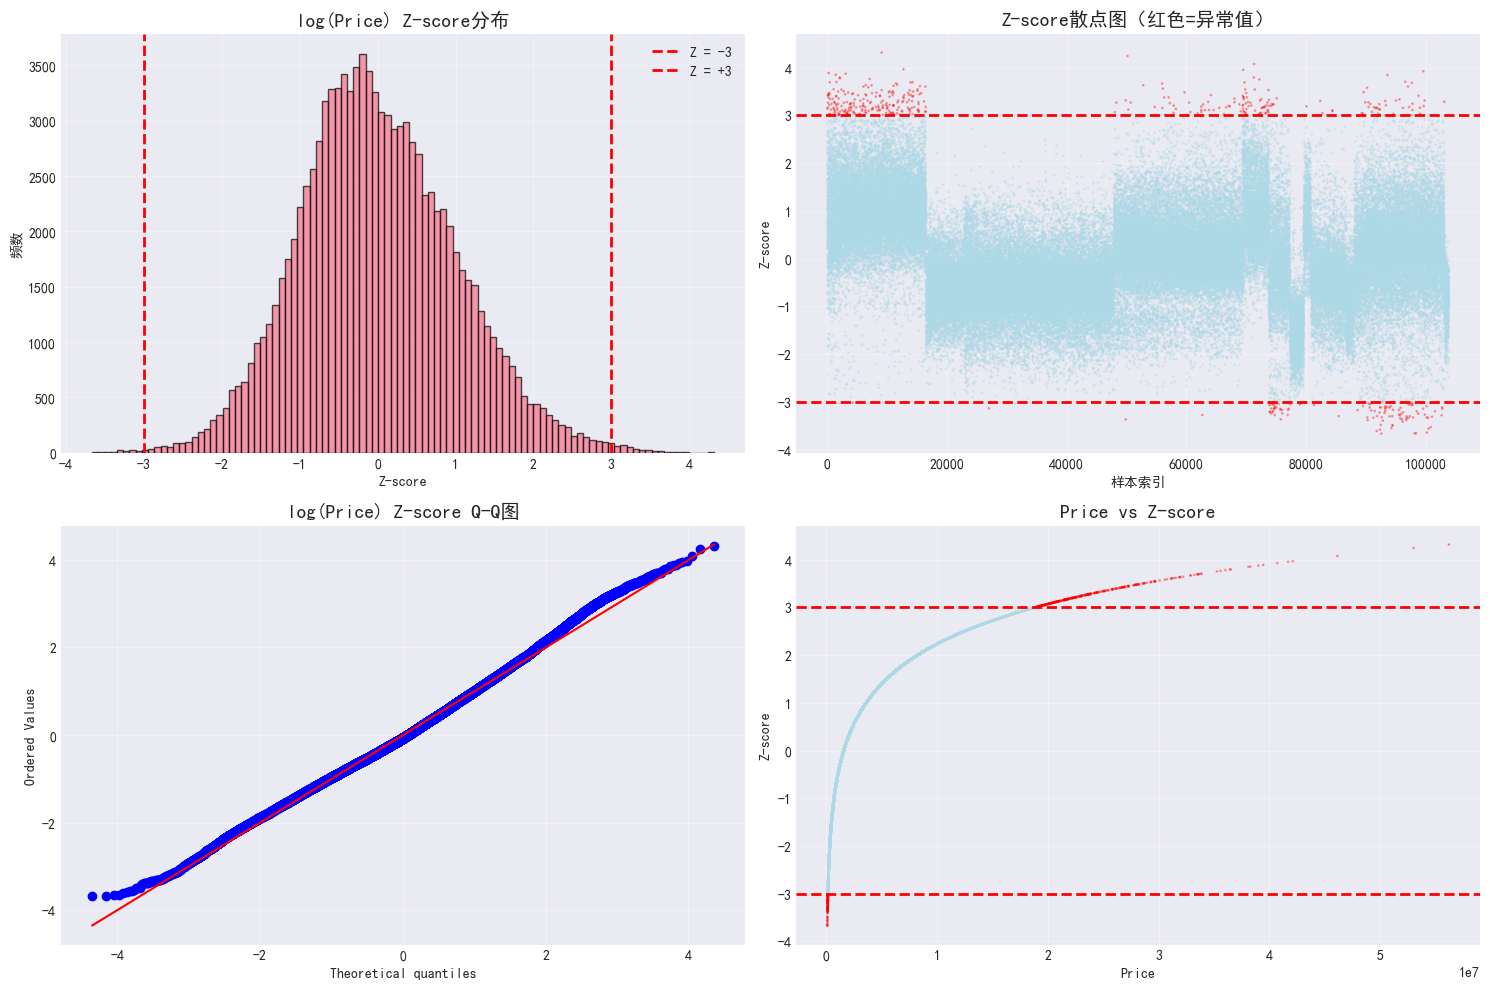


6. 剔除异常值

剔除前:
  - 样本数: 103,871
  - 特征数: 295

剔除后:
  - 样本数: 103,405
  - 特征数: 292
  - 删除样本数: 466
  - 样本保留率: 99.55%

7. 对比剔除前后的Price统计

剔除前Price统计:
count    1.038710e+05
mean     2.262366e+06
std      2.532925e+06
min      7.455330e+04
25%      8.910913e+05
50%      1.479407e+06
75%      2.680757e+06
max      5.622643e+07
Name: Price, dtype: float64

剔除后Price统计:
count    1.034050e+05
mean     2.190385e+06
std      2.174593e+06
min      1.302277e+05
25%      8.910206e+05
50%      1.475504e+06
75%      2.665228e+06
max      1.884778e+07
Name: Price, dtype: float64

统计量变化:
统计量          剔除前          剔除后     变化率(%)
 均值 2.262366e+06 2.190385e+06  -3.181658
中位数 1.479407e+06 1.475504e+06  -0.263838
标准差 2.532925e+06 2.174593e+06 -14.146972
最小值 7.455330e+04 1.302277e+05  74.677289
最大值 5.622643e+07 1.884778e+07 -66.478794
 偏度 4.350975e+00 2.909956e+00 -33.119459
 峰度 3.242640e+01 1.173949e+01 -63.796502

8. 可视化剔除前后对比


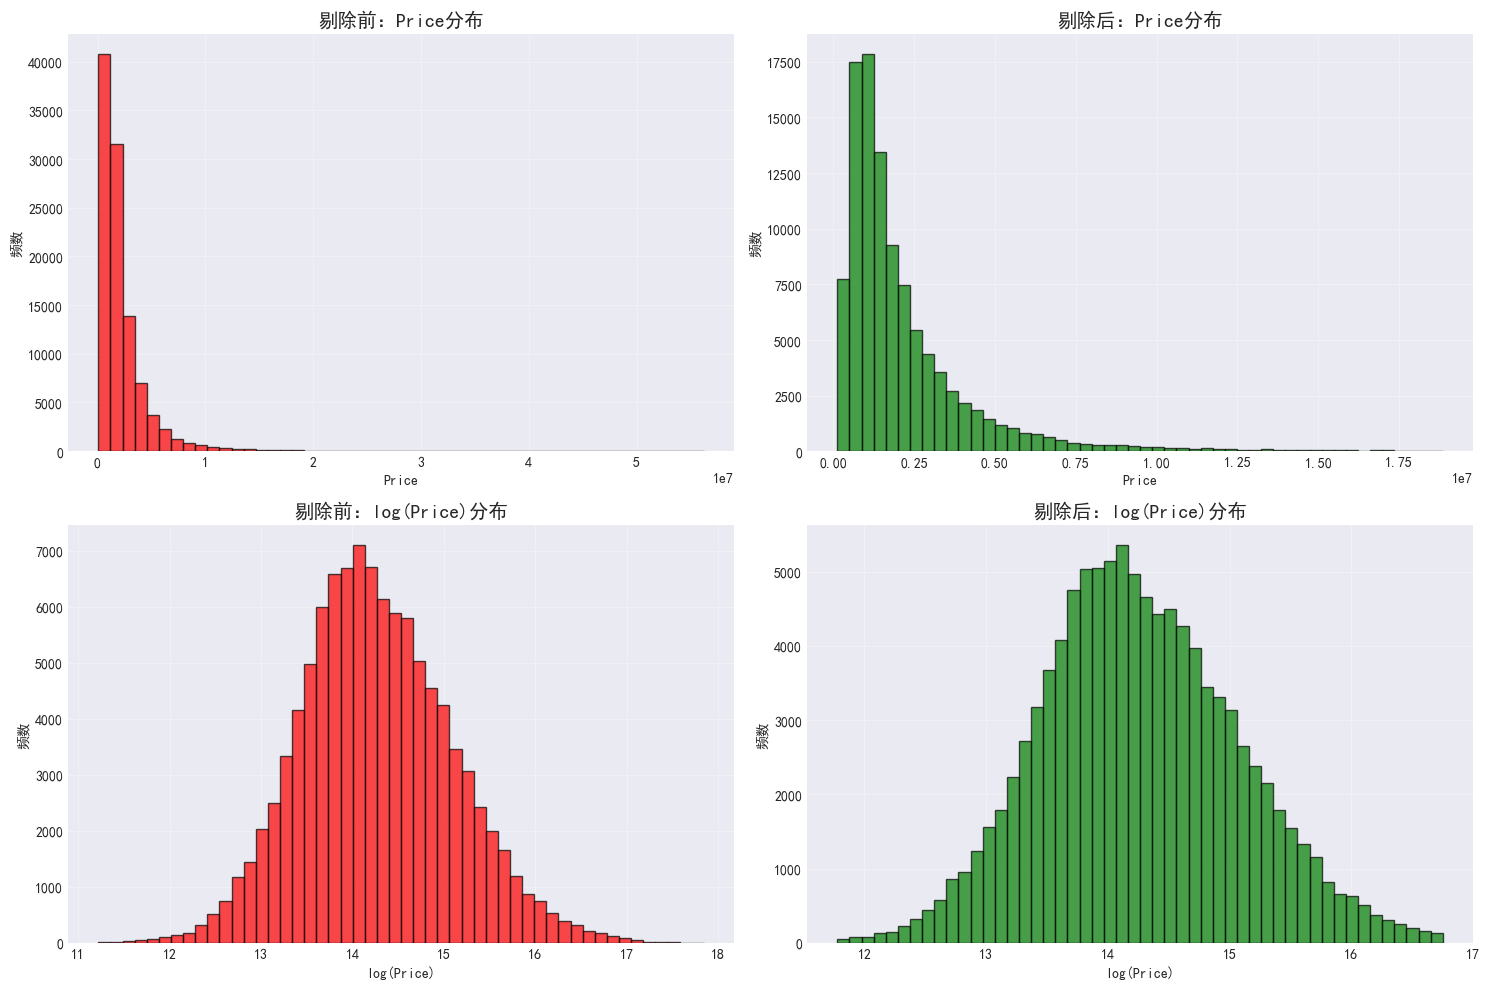


9. 检查df_selected_enhanced数据质量

缺失值统计:
  - 总缺失值: 0
  ✓ 没有缺失值

无穷值统计:
  - 总无穷值: 0
  ✓ 没有无穷值

数据类型分布:
float64    188
int32       48
bool        37
object      13
int64        6
Name: count, dtype: int64


In [141]:
# ==================== 基于log(Price)的Z-score异常值检验 ====================
print("\n" + "=" * 80)
print("基于log(Price)的Z-score异常值检验")
print("=" * 80)

# 使用特征工程后的数据
df_outlier_check = df_engineered.copy()

print(f"\n原始数据集信息:")
print(f"  - 样本数: {len(df_outlier_check):,}")
print(f"  - 特征数: {len(df_outlier_check.columns):,}")

# ==================== 1. 检查Price列是否存在 ====================
print("\n" + "=" * 60)
print("1. 检查Price列")
print("=" * 60)

if 'Price' not in df_outlier_check.columns:
    print("❌ 错误：数据中不存在'Price'列")
    print(f"可用列: {df_outlier_check.columns.tolist()}")
else:
    print(f"✓ Price列存在")
    print(f"\nPrice基本统计:")
    print(df_outlier_check['Price'].describe())
    
    # 检查Price的缺失值和负值
    price_missing = df_outlier_check['Price'].isnull().sum()
    price_negative = (df_outlier_check['Price'] <= 0).sum()
    
    print(f"\nPrice数据质量:")
    print(f"  - 缺失值: {price_missing} ({price_missing/len(df_outlier_check)*100:.2f}%)")
    print(f"  - 非正值: {price_negative} ({price_negative/len(df_outlier_check)*100:.2f}%)")
    
    if price_missing > 0 or price_negative > 0:
        print(f"\n⚠ 需要先处理Price的缺失值或非正值")
        # 删除Price缺失或非正的样本
        df_outlier_check = df_outlier_check[(df_outlier_check['Price'].notnull()) & 
                                            (df_outlier_check['Price'] > 0)].copy()
        print(f"✓ 已删除Price缺失或非正的样本")
        print(f"  剩余样本数: {len(df_outlier_check):,}")

# ==================== 2. 计算log(Price) ====================
print("\n" + "=" * 60)
print("2. 计算log(Price)")
print("=" * 60)

# 使用自然对数
df_outlier_check['log_Price'] = np.log(df_outlier_check['Price'])

print(f"✓ 已创建log_Price列")
print(f"\nlog(Price)基本统计:")
print(df_outlier_check['log_Price'].describe())

# 绘制Price和log(Price)的分布对比
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Price分布
axes[0, 0].hist(df_outlier_check['Price'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Price分布', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('频数')
axes[0, 0].grid(True, alpha=0.3)

# log(Price)分布
axes[0, 1].hist(df_outlier_check['log_Price'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('log(Price)分布', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('log(Price)')
axes[0, 1].set_ylabel('频数')
axes[0, 1].grid(True, alpha=0.3)

# Price箱线图
axes[1, 0].boxplot(df_outlier_check['Price'], vert=True)
axes[1, 0].set_title('Price箱线图', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Price')
axes[1, 0].grid(True, alpha=0.3)

# log(Price)箱线图
axes[1, 1].boxplot(df_outlier_check['log_Price'], vert=True)
axes[1, 1].set_title('log(Price)箱线图', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('log(Price)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('price_distribution_before_outlier_removal.png', dpi=300, bbox_inches='tight')
print(f"\n✓ 分布图已保存到 'price_distribution_before_outlier_removal.png'")
plt.close()

# ==================== 3. 计算Z-score ====================
print("\n" + "=" * 60)
print("3. 计算log(Price)的Z-score")
print("=" * 60)

# 计算均值和标准差
log_price_mean = df_outlier_check['log_Price'].mean()
log_price_std = df_outlier_check['log_Price'].std()

print(f"log(Price)统计量:")
print(f"  - 均值 (μ): {log_price_mean:.4f}")
print(f"  - 标准差 (σ): {log_price_std:.4f}")

# 计算Z-score
df_outlier_check['log_Price_zscore'] = (df_outlier_check['log_Price'] - log_price_mean) / log_price_std

print(f"\n✓ 已创建log_Price_zscore列")
print(f"\nZ-score基本统计:")
print(df_outlier_check['log_Price_zscore'].describe())

# ==================== 4. 识别异常值 ====================
print("\n" + "=" * 60)
print("4. 识别异常值（|Z-score| > 3）")
print("=" * 60)

# 标记异常值
df_outlier_check['is_outlier'] = df_outlier_check['log_Price_zscore'].abs() > 3

# 统计异常值
outlier_count = df_outlier_check['is_outlier'].sum()
outlier_pct = outlier_count / len(df_outlier_check) * 100

print(f"\n异常值统计:")
print(f"  - 异常值数量: {outlier_count:,}")
print(f"  - 异常值比例: {outlier_pct:.2f}%")
print(f"  - 正常值数量: {(~df_outlier_check['is_outlier']).sum():,}")

# 详细的Z-score分布
print(f"\nZ-score分布统计:")
z_ranges = [
    ('|Z| <= 1', (df_outlier_check['log_Price_zscore'].abs() <= 1).sum()),
    ('1 < |Z| <= 2', ((df_outlier_check['log_Price_zscore'].abs() > 1) & 
                      (df_outlier_check['log_Price_zscore'].abs() <= 2)).sum()),
    ('2 < |Z| <= 3', ((df_outlier_check['log_Price_zscore'].abs() > 2) & 
                      (df_outlier_check['log_Price_zscore'].abs() <= 3)).sum()),
    ('|Z| > 3', (df_outlier_check['log_Price_zscore'].abs() > 3).sum())
]

for range_name, count in z_ranges:
    pct = count / len(df_outlier_check) * 100
    print(f"  {range_name:15s}: {count:6,} ({pct:5.2f}%)")

# 异常值的Price统计
if outlier_count > 0:
    print(f"\n异常值的Price统计:")
    outliers = df_outlier_check[df_outlier_check['is_outlier']]
    print(f"  - 最小值: {outliers['Price'].min():,.2f}")
    print(f"  - 最大值: {outliers['Price'].max():,.2f}")
    print(f"  - 均值: {outliers['Price'].mean():,.2f}")
    print(f"  - 中位数: {outliers['Price'].median():,.2f}")
    
    # 显示极端异常值
    print(f"\nZ-score最极端的10个样本:")
    extreme_outliers = df_outlier_check.nlargest(10, 'log_Price_zscore')[
        ['Price', 'log_Price', 'log_Price_zscore']
    ]
    print(extreme_outliers.to_string())
    
    # 检查是否有负Z-score异常值
    negative_outliers = outliers[outliers['log_Price_zscore'] < -3]
    positive_outliers = outliers[outliers['log_Price_zscore'] > 3]
    
    print(f"\n异常值方向分布:")
    print(f"  - Z < -3 (价格过低): {len(negative_outliers):,}")
    print(f"  - Z > +3 (价格过高): {len(positive_outliers):,}")

# ==================== 5. 可视化Z-score分布 ====================
print("\n" + "=" * 60)
print("5. 可视化Z-score分布")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Z-score直方图
axes[0, 0].hist(df_outlier_check['log_Price_zscore'], bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(-3, color='red', linestyle='--', linewidth=2, label='Z = -3')
axes[0, 0].axvline(3, color='red', linestyle='--', linewidth=2, label='Z = +3')
axes[0, 0].set_title('log(Price) Z-score分布', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Z-score')
axes[0, 0].set_ylabel('频数')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Z-score箱线图
colors = ['red' if x else 'lightblue' for x in df_outlier_check['is_outlier']]
axes[0, 1].scatter(range(len(df_outlier_check)), df_outlier_check['log_Price_zscore'], 
                   c=colors, alpha=0.3, s=1)
axes[0, 1].axhline(-3, color='red', linestyle='--', linewidth=2)
axes[0, 1].axhline(3, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_title('Z-score散点图（红色=异常值）', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('样本索引')
axes[0, 1].set_ylabel('Z-score')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q图
from scipy import stats
stats.probplot(df_outlier_check['log_Price_zscore'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('log(Price) Z-score Q-Q图', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Price vs Z-score
axes[1, 1].scatter(df_outlier_check['Price'], df_outlier_check['log_Price_zscore'], 
                   c=colors, alpha=0.3, s=1)
axes[1, 1].axhline(-3, color='red', linestyle='--', linewidth=2)
axes[1, 1].axhline(3, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_title('Price vs Z-score', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Price')
axes[1, 1].set_ylabel('Z-score')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==================== 6. 剔除异常值 ====================
print("\n" + "=" * 60)
print("6. 剔除异常值")
print("=" * 60)

print(f"\n剔除前:")
print(f"  - 样本数: {len(df_outlier_check):,}")
print(f"  - 特征数: {len(df_outlier_check.columns):,}")

# 创建剔除异常值后的数据集
df_selected_enhanced = df_outlier_check[~df_outlier_check['is_outlier']].copy()

# 删除辅助列
df_selected_enhanced = df_selected_enhanced.drop(columns=['log_Price', 'log_Price_zscore', 'is_outlier'])

print(f"\n剔除后:")
print(f"  - 样本数: {len(df_selected_enhanced):,}")
print(f"  - 特征数: {len(df_selected_enhanced.columns):,}")
print(f"  - 删除样本数: {outlier_count:,}")
print(f"  - 样本保留率: {len(df_selected_enhanced)/len(df_outlier_check)*100:.2f}%")

# ==================== 7. 对比剔除前后的统计 ====================
print("\n" + "=" * 60)
print("7. 对比剔除前后的Price统计")
print("=" * 60)

print(f"\n剔除前Price统计:")
print(df_outlier_check['Price'].describe())

print(f"\n剔除后Price统计:")
print(df_selected_enhanced['Price'].describe())

# 计算变化
print(f"\n统计量变化:")
stats_comparison = pd.DataFrame({
    '统计量': ['均值', '中位数', '标准差', '最小值', '最大值', '偏度', '峰度'],
    '剔除前': [
        df_outlier_check['Price'].mean(),
        df_outlier_check['Price'].median(),
        df_outlier_check['Price'].std(),
        df_outlier_check['Price'].min(),
        df_outlier_check['Price'].max(),
        df_outlier_check['Price'].skew(),
        df_outlier_check['Price'].kurtosis()
    ],
    '剔除后': [
        df_selected_enhanced['Price'].mean(),
        df_selected_enhanced['Price'].median(),
        df_selected_enhanced['Price'].std(),
        df_selected_enhanced['Price'].min(),
        df_selected_enhanced['Price'].max(),
        df_selected_enhanced['Price'].skew(),
        df_selected_enhanced['Price'].kurtosis()
    ]
})

stats_comparison['变化率(%)'] = ((stats_comparison['剔除后'] - stats_comparison['剔除前']) / 
                                stats_comparison['剔除前'] * 100)

print(stats_comparison.to_string(index=False))

# ==================== 8. 可视化剔除前后对比 ====================
print("\n" + "=" * 60)
print("8. 可视化剔除前后对比")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 剔除前Price分布
axes[0, 0].hist(df_outlier_check['Price'], bins=50, edgecolor='black', alpha=0.7, color='red')
axes[0, 0].set_title('剔除前：Price分布', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('频数')
axes[0, 0].grid(True, alpha=0.3)

# 剔除后Price分布
axes[0, 1].hist(df_selected_enhanced['Price'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('剔除后：Price分布', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_ylabel('频数')
axes[0, 1].grid(True, alpha=0.3)

# 剔除前log(Price)分布
log_price_before = np.log(df_outlier_check['Price'])
axes[1, 0].hist(log_price_before, bins=50, edgecolor='black', alpha=0.7, color='red')
axes[1, 0].set_title('剔除前：log(Price)分布', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('log(Price)')
axes[1, 0].set_ylabel('频数')
axes[1, 0].grid(True, alpha=0.3)

# 剔除后log(Price)分布
log_price_after = np.log(df_selected_enhanced['Price'])
axes[1, 1].hist(log_price_after, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 1].set_title('剔除后：log(Price)分布', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('log(Price)')
axes[1, 1].set_ylabel('频数')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==================== 9. 检查数据质量 ====================
print("\n" + "=" * 60)
print("9. 检查df_selected_enhanced数据质量")
print("=" * 60)

# 检查缺失值
missing_count = df_selected_enhanced.isnull().sum().sum()
print(f"\n缺失值统计:")
print(f"  - 总缺失值: {missing_count:,}")

if missing_count > 0:
    missing_cols = df_selected_enhanced.isnull().sum()
    missing_cols = missing_cols[missing_cols > 0].sort_values(ascending=False)
    print(f"  - 有缺失值的列数: {len(missing_cols)}")
    print(f"\n缺失值最多的前10个特征:")
    for col, count in missing_cols.head(10).items():
        pct = count / len(df_selected_enhanced) * 100
        print(f"    {col:40s}: {count:6,} ({pct:5.2f}%)")
else:
    print(f"  ✓ 没有缺失值")

# 检查inf值
numeric_cols = df_selected_enhanced.select_dtypes(include=[np.number]).columns
inf_count = np.isinf(df_selected_enhanced[numeric_cols]).sum().sum()
print(f"\n无穷值统计:")
print(f"  - 总无穷值: {inf_count:,}")

if inf_count == 0:
    print(f"  ✓ 没有无穷值")

# 数据类型统计
print(f"\n数据类型分布:")
dtype_counts = df_selected_enhanced.dtypes.value_counts()
print(dtype_counts)

In [142]:
# ==================== 异常值处理后：数据类型转换 ====================
print("\n" + "=" * 100)
print("数据类型转换：删除特定列并转换布尔变量")
print("=" * 100)

df_no_outliers=df_selected_enhanced.copy()


# 删除指定列
columns_to_drop = ['别墅类型_填充', '楼层位置']
existing_columns_to_drop = [col for col in columns_to_drop if col in df_no_outliers.columns]

if existing_columns_to_drop:
    print(f"\n删除列: {existing_columns_to_drop}")
    df_no_outliers = df_no_outliers.drop(columns=existing_columns_to_drop)
    print(f"✅ 已删除 {len(existing_columns_to_drop)} 个列")
else:
    print(f"⚠️  未找到需要删除的列: {columns_to_drop}")

# 识别并转换布尔类型变量
print("\n转换布尔变量为数值型:")
bool_columns = df_no_outliers.select_dtypes(include=['bool']).columns.tolist()

if bool_columns:
    print(f"发现 {len(bool_columns)} 个布尔类型列:")
    for col in bool_columns[:10]:  # 显示前10个
        print(f"  - {col}")
    if len(bool_columns) > 10:
        print(f"  ... 及其他 {len(bool_columns) - 10} 个")
    
    # 转换为整数类型 (True -> 1, False -> 0)
    df_no_outliers[bool_columns] = df_no_outliers[bool_columns].astype(int)
    print(f"\n✅ 已将 {len(bool_columns)} 个布尔变量转换为整数型 (0/1)")
else:
    print("✅ 未发现布尔类型变量")

# 验证数据类型
print("\n数据类型分布:")
print(df_no_outliers.dtypes.value_counts())

print(f"\n处理后数据形状: {df_no_outliers.shape}")


数据类型转换：删除特定列并转换布尔变量

删除列: ['别墅类型_填充', '楼层位置']
✅ 已删除 2 个列

转换布尔变量为数值型:
发现 37 个布尔类型列:
  - 别墅类型_双拼
  - 别墅类型_叠拼
  - 别墅类型_联排
  - 别墅类型_非别墅
  - 交易权属_二类经济适用房
  - 交易权属_动迁安置房
  - 交易权属_售后公房
  - 交易权属_商品房
  - 交易权属_回迁房
  - 交易权属_央产房
  ... 及其他 27 个

✅ 已将 37 个布尔变量转换为整数型 (0/1)

数据类型分布:
float64    188
int32       85
object      11
int64        6
Name: count, dtype: int64

处理后数据形状: (103405, 290)


In [143]:
# ==================== 处理object类型列 ====================
print("\n" + "=" * 100)
print("处理object类型列：转换True/False字符串和数值字符串")
print("=" * 100)

# 识别所有object类型的列
object_columns = df_no_outliers.select_dtypes(include=['object']).columns.tolist()
print(f"\n发现 {len(object_columns)} 个object类型列")

# 分类处理
true_false_columns = []
numeric_string_columns = []

for col in object_columns:
    # 获取该列的唯一值（去除NaN）
    unique_values = df_no_outliers[col].dropna().unique()
    
    # 检查是否是True/False字符串
    if len(unique_values) > 0:
        # 转换为字符串并检查
        unique_str = set([str(v).strip() for v in unique_values])
        if unique_str.issubset({'True', 'False'}):
            true_false_columns.append(col)
        else:
            numeric_string_columns.append(col)

# 转换True/False字符串列
if true_false_columns:
    print(f"\n转换True/False字符串列 ({len(true_false_columns)}个):")
    for col in true_false_columns:
        print(f"  - {col}")
        # 转换为布尔值，然后转为整数
        df_no_outliers[col] = df_no_outliers[col].map({
            'True': 1, 'true': 1, True: 1,
            'False': 0, 'false': 0, False: 0
        })
        # 确保是整数类型
        df_no_outliers[col] = df_no_outliers[col].fillna(0).astype(int)
    print(f"✅ 已将 {len(true_false_columns)} 个True/False列转换为0/1")

# 转换数值字符串列
if numeric_string_columns:
    print(f"\n转换数值字符串列 ({len(numeric_string_columns)}个):")
    for col in numeric_string_columns:
        print(f"  - {col}")
        # 尝试转换为数值类型
        df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')
    print(f"✅ 已将 {len(numeric_string_columns)} 个数值字符串列转换为数值型")

# 验证转换结果
print("\n转换后数据类型分布:")
print(df_no_outliers.dtypes.value_counts())

# 检查是否还有object类型的列
remaining_object_cols = df_no_outliers.select_dtypes(include=['object']).columns.tolist()
if remaining_object_cols:
    print(f"\n⚠️  仍有 {len(remaining_object_cols)} 个object类型列:")
    for col in remaining_object_cols[:10]:
        print(f"  - {col}: {df_no_outliers[col].unique()[:5]}")
else:
    print("\n✅ 所有object列已成功转换")

print(f"\n处理后数据形状: {df_no_outliers.shape}")


处理object类型列：转换True/False字符串和数值字符串

发现 11 个object类型列

转换True/False字符串列 (11个):
  - 建筑结构_未知结构
  - 建筑结构_框架结构
  - 建筑结构_混合结构
  - 建筑结构_砖木结构
  - 建筑结构_砖混结构
  - 建筑结构_钢混结构
  - 建筑结构_钢结构
  - 装修情况_其他
  - 装修情况_毛坯
  - 装修情况_简装
  - 装修情况_精装
✅ 已将 11 个True/False列转换为0/1

转换后数据类型分布:
float64    188
int32       96
int64        6
Name: count, dtype: int64

✅ 所有object列已成功转换

处理后数据形状: (103405, 290)


In [144]:
# ==================== 4. 准备建模数据 ====================
print("\n" + "=" * 100)
print("步骤 4: 准备建模数据")
print("=" * 100)

# 分离特征和目标变量
X = df_no_outliers.drop(columns=['Price'])
y = df_no_outliers['Price'].copy()

print(f"特征矩阵形状: {X.shape}")
print(f"目标变量形状: {y.shape}")

# 检查缺失值
missing_summary = X.isnull().sum()
missing_features = missing_summary[missing_summary > 0]

if len(missing_features) > 0:
    print(f"\n⚠️  发现 {len(missing_features)} 个特征有缺失值")
    print("缺失值比例最高的10个特征:")
    missing_pct = (missing_features / len(X) * 100).sort_values(ascending=False)
    print(missing_pct.head(10))
    
    # 删除缺失率超过50%的特征
    high_missing_features = missing_pct[missing_pct > 50].index.tolist()
    if high_missing_features:
        print(f"\n删除缺失率>50%的特征 ({len(high_missing_features)}个)")
        X = X.drop(columns=high_missing_features)
    
    # 填充剩余缺失值
    print("\n填充剩余缺失值（数值特征用中位数，分类特征用众数）")
    for col in X.columns:
        if X[col].isnull().sum() > 0:
            if X[col].dtype in ['int64', 'float64']:
                X[col].fillna(X[col].median(), inplace=True)
            else:
                X[col].fillna(X[col].mode()[0] if len(X[col].mode()) > 0 else 0, inplace=True)
else:
    print("✅ 无缺失值")

# 确保所有特征都是数值类型
print("\n4.1 确保所有特征都是数值类型")
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

if non_numeric_cols:
    print(f"⚠️  发现 {len(non_numeric_cols)} 个非数值特征: {non_numeric_cols[:5]}")
    # 简单删除非数值特征（或者可以进行编码）
    X = X.select_dtypes(include=[np.number])
    print(f"删除非数值特征后，特征数量: {X.shape[1]}")
else:
    print("✅ 所有特征均为数值类型")

# 检查无穷值
inf_cols = X.columns[np.isinf(X).any()].tolist()
if inf_cols:
    print(f"\n⚠️  发现 {len(inf_cols)} 个特征包含无穷值")
    for col in inf_cols:
        X[col].replace([np.inf, -np.inf], np.nan, inplace=True)
        X[col].fillna(X[col].median(), inplace=True)
    print("✅ 已处理无穷值")

print(f"\n最终特征矩阵形状: {X.shape}")


步骤 4: 准备建模数据
特征矩阵形状: (103405, 289)
目标变量形状: (103405,)
✅ 无缺失值

4.1 确保所有特征都是数值类型
✅ 所有特征均为数值类型

最终特征矩阵形状: (103405, 289)


In [145]:
# ==================== 5. 数据集划分 ====================
print("\n" + "=" * 100)
print("步骤 5: 数据集划分（80% 训练集，20% 测试集）")
print("=" * 100)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=111
)

print(f"训练集大小: {X_train.shape[0]} 样本, {X_train.shape[1]} 特征")
print(f"测试集大小: {X_test.shape[0]} 样本, {X_test.shape[1]} 特征")
print(f"\n训练集价格统计:")
print(y_train.describe())
print(f"\n测试集价格统计:")
print(y_test.describe())



步骤 5: 数据集划分（80% 训练集，20% 测试集）
训练集大小: 82724 样本, 289 特征
测试集大小: 20681 样本, 289 特征

训练集价格统计:
count    8.272400e+04
mean     2.191098e+06
std      2.172265e+06
min      1.302277e+05
25%      8.909555e+05
50%      1.479909e+06
75%      2.667431e+06
max      1.884778e+07
Name: Price, dtype: float64

测试集价格统计:
count    2.068100e+04
mean     2.187533e+06
std      2.183933e+06
min      1.322813e+05
25%      8.911223e+05
50%      1.456493e+06
75%      2.654447e+06
max      1.879351e+07
Name: Price, dtype: float64


## 特征选择

In [147]:
# ==================== 6. 特征选择 ====================
print("\n" + "=" * 100)
print("步骤 6: 特征选择")
print("=" * 100)

# 6.1 相关性分析
print("\n[6.1] 相关性分析...")
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)

print(f"\n  Top 30 相关特征:")
top_30_corr = correlations.head(30)
for i, (feat, corr) in enumerate(top_30_corr.items(), 1):
    print(f"    {i:2d}. {feat:50s}  相关系数: {corr:.6f}")

# 删除低相关性特征（绝对相关系数<0.001）
low_corr_threshold = 0.001
low_corr_features = correlations[correlations < low_corr_threshold].index.tolist()
print(f"\n  低相关性特征(<{low_corr_threshold}): {len(low_corr_features)} 个")

# 6.2 方差分析（删除零方差和低方差特征）
print("\n[6.2] 方差分析...")
feature_variance = X_train.var()
zero_var_features = feature_variance[feature_variance == 0].index.tolist()
low_var_features = feature_variance[(feature_variance > 0) & (feature_variance < 0.01)].index.tolist()

print(f"  零方差特征: {len(zero_var_features)} 个")
print(f"  低方差特征(0<var<0.01): {len(low_var_features)} 个")

# 6.3 VIF分析（多重共线性）- 采样进行
print("\n[6.3] VIF分析（采样30000条）...")
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 只在高相关特征上做VIF（减少计算量）
high_corr_features = correlations[correlations >= 0.05].index.tolist()[:150]  # 选top 150
print(f"  在 {len(high_corr_features)} 个高相关特征上进行VIF分析...")

# 采样减少计算量
sample_size = min(30000, len(X_train))
X_train_sample = X_train[high_corr_features].sample(n=sample_size, random_state=111)
print(f"  使用 {sample_size:,} 个样本进行VIF计算...")

high_vif_features = []
vif_threshold = 10

try:
    # 替换inf和nan
    X_train_sample_clean = X_train_sample.replace([np.inf, -np.inf], np.nan).fillna(0)
    
    vif_data = pd.DataFrame()
    vif_data["特征"] = X_train_sample_clean.columns
    
    print(f"  正在计算VIF...")
    vif_values = []
    for i in range(X_train_sample_clean.shape[1]):
        if (i + 1) % 20 == 0:
            print(f"    进度: {i+1}/{X_train_sample_clean.shape[1]}")
        vif = variance_inflation_factor(X_train_sample_clean.values, i)
        vif_values.append(vif if not np.isinf(vif) else 999)
    
    vif_data["VIF"] = vif_values
    vif_data = vif_data.sort_values('VIF', ascending=False)
    
    print(f"\n  VIF统计分布:")
    print(f"    VIF > 100: {(vif_data['VIF'] > 100).sum()} 个")
    print(f"    50 < VIF <= 100: {((vif_data['VIF'] > 50) & (vif_data['VIF'] <= 100)).sum()} 个")
    print(f"    20 < VIF <= 50: {((vif_data['VIF'] > 20) & (vif_data['VIF'] <= 50)).sum()} 个")
    print(f"    10 < VIF <= 20: {((vif_data['VIF'] > 10) & (vif_data['VIF'] <= 20)).sum()} 个")
    print(f"    VIF <= 10: {(vif_data['VIF'] <= 10).sum()} 个")
    
    high_vif_features = vif_data[vif_data['VIF'] > vif_threshold]['特征'].tolist()
    print(f"\n  高VIF特征(>{vif_threshold}): {len(high_vif_features)} 个")
    
    if len(high_vif_features) > 0:
        print(f"\n  VIF最高的前20个特征:")
        for i, row in vif_data.head(20).iterrows():
            print(f"    {row['特征']:50s}  VIF: {row['VIF']:.2f}")
        
except Exception as e:
    print(f"  ⚠️  VIF计算出错: {e}")
    print(f"  跳过VIF筛选")
    high_vif_features = []

# 6.4 Lasso特征选择
print("\n[6.4] Lasso特征选择...")

# 标准化特征
print("  标准化特征...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 使用Lasso进行特征选择
print("  训练Lasso模型（alpha=100）...")
lasso_selector = Lasso(alpha=100, random_state=111, max_iter=10000)
lasso_selector.fit(X_train_scaled, y_train)

# 选择系数非零的特征
lasso_selected_features = X_train.columns[lasso_selector.coef_ != 0].tolist()
lasso_zero_features = X_train.columns[lasso_selector.coef_ == 0].tolist()

print(f"  Lasso选择特征: {len(lasso_selected_features)} 个")
print(f"  Lasso零系数特征: {len(lasso_zero_features)} 个")

# 显示Lasso最重要的特征
lasso_importance = pd.DataFrame({
    '特征': X_train.columns,
    '系数': lasso_selector.coef_,
    '绝对系数': np.abs(lasso_selector.coef_)
})
lasso_importance = lasso_importance[lasso_importance['系数'] != 0].sort_values(
    '绝对系数', ascending=False
)

print(f"\n  Lasso选择的Top 30特征:")
for i, row in lasso_importance.head(30).iterrows():
    print(f"    {row['特征']:50s}  系数: {row['系数']:8.4f}")

# 6.5 综合特征筛选
print("\n" + "=" * 100)
print("[6.5] 综合特征筛选")
print("=" * 100)

# 统计各类需要删除的特征
features_to_drop = list(set(
    low_corr_features + 
    zero_var_features + 
    low_var_features + 
    high_vif_features
))

print(f"\n特征筛选统计:")
print(f"  原始特征数: {len(X_train.columns):,}")
print(f"  - 低相关性(<{low_corr_threshold}): {len(low_corr_features):,}")
print(f"  - 零方差: {len(zero_var_features):,}")
print(f"  - 低方差(0<var<0.01): {len(low_var_features):,}")
print(f"  - 高VIF(>{vif_threshold}): {len(high_vif_features):,}")
print(f"  - Lasso零系数: {len(lasso_zero_features):,}")
print(f"  合并后待删除: {len(features_to_drop):,}")

# 策略1：保守策略 - 只删除明确有问题的特征
print(f"\n策略1：保守筛选")
print(f"  规则：删除 低相关性 OR 零方差 OR 高VIF 的特征")
features_conservative = [f for f in X_train.columns if f not in features_to_drop]
print(f"  保留特征数: {len(features_conservative):,} ({len(features_conservative)/len(X_train.columns)*100:.1f}%)")

# 策略2：激进策略 - 只保留Lasso选择的特征
print(f"\n策略2：激进筛选（纯Lasso）")
print(f"  规则：只保留Lasso系数非零的特征")
features_aggressive = lasso_selected_features
print(f"  保留特征数: {len(features_aggressive):,} ({len(features_aggressive)/len(X_train.columns)*100:.1f}%)")

# 策略3：折中策略 - Lasso选择 + 高相关低VIF
print(f"\n策略3：折中筛选（推荐）")
print(f"  规则：保留 Lasso选择 OR (高相关性 AND 非高VIF) 的特征")
high_corr_low_vif = [
    f for f in high_corr_features 
    if f not in high_vif_features 
    and f not in low_corr_features
    and f not in zero_var_features
    and f not in low_var_features
]
features_moderate = list(set(lasso_selected_features + high_corr_low_vif))
print(f"  保留特征数: {len(features_moderate):,} ({len(features_moderate)/len(X_train.columns)*100:.1f}%)")



步骤 6: 特征选择

[6.1] 相关性分析...

  Top 30 相关特征:
     1. 面积×房龄                                               相关系数: 0.506889
     2. 套内面积×房龄                                             相关系数: 0.498437
     3. 月度供热总费                                              相关系数: 0.470934
     4. 供热费×面积                                              相关系数: 0.470934
     5. 燃气费×面积                                              相关系数: 0.470889
     6. 供热费×套内面积                                            相关系数: 0.469440
     7. 燃气费×套内面积                                            相关系数: 0.466340
     8. 面积×卧室×房龄                                            相关系数: 0.441207
     9. 建筑面积_clean                                          相关系数: 0.430578
    10. 套内面积_clean                                          相关系数: 0.425853
    11. 得房率×面积                                              相关系数: 0.425853
    12. 面积×得房率                                              相关系数: 0.425853
    13. 朝向数×面积                                          

In [149]:

# 选择使用折中策略
print(f"\n✅ 采用策略1")
final_features = features_conservative

print(f"\n最终特征组成:")
lasso_only = set(lasso_selected_features) - set(high_corr_low_vif)
corr_only = set(high_corr_low_vif) - set(lasso_selected_features)
both = set(lasso_selected_features) & set(high_corr_low_vif)
print(f"  - 仅Lasso选择: {len(lasso_only):,}")
print(f"  - 仅相关性选择: {len(corr_only):,}")
print(f"  - 两者都选择: {len(both):,}")
print(f"  - 总计: {len(final_features):,}")

# 6.6 更新数据集
print("\n" + "=" * 100)
print("[6.6] 更新数据集")
print("=" * 100)

X_train_selected = X_train[final_features].copy()
X_test_selected = X_test[final_features].copy()

print(f"\n数据集形状变化:")
print(f"  训练集: {X_train.shape} → {X_train_selected.shape}")
print(f"  测试集: {X_test.shape} → {X_test_selected.shape}")
print(f"  特征保留率: {len(final_features)/len(X_train.columns)*100:.1f}%")

# 重新标准化
print(f"\n重新标准化特征...")
scaler_final = StandardScaler()
X_train_selected_scaled = scaler_final.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_final.transform(X_test_selected)
print(f"✓ 标准化完成")

# 6.7 数据质量检查
print("\n" + "=" * 100)
print("[6.7] 数据质量检查")
print("=" * 100)

print(f"\n训练集:")
print(f"  - 形状: {X_train_selected.shape}")
print(f"  - 缺失值: {X_train_selected.isnull().sum().sum()}")
print(f"  - 无穷值: {np.isinf(X_train_selected.values).sum()}")

print(f"\n测试集:")
print(f"  - 形状: {X_test_selected.shape}")
print(f"  - 缺失值: {X_test_selected.isnull().sum().sum()}")
print(f"  - 无穷值: {np.isinf(X_test_selected.values).sum()}")

# 如果有缺失值或无穷值，进行处理
if X_train_selected.isnull().sum().sum() > 0 or np.isinf(X_train_selected.values).sum() > 0:
    print(f"\n⚠️  检测到缺失值或无穷值，进行处理...")
    X_train_selected = X_train_selected.replace([np.inf, -np.inf], np.nan)
    X_test_selected = X_test_selected.replace([np.inf, -np.inf], np.nan)
    X_train_selected = X_train_selected.fillna(X_train_selected.median())
    X_test_selected = X_test_selected.fillna(X_train_selected.median())
    
    # 重新标准化
    X_train_selected_scaled = scaler_final.fit_transform(X_train_selected)
    X_test_selected_scaled = scaler_final.transform(X_test_selected)
    print(f"✓ 处理完成并重新标准化")


✅ 采用策略1

最终特征组成:
  - 仅Lasso选择: 221
  - 仅相关性选择: 2
  - 两者都选择: 31
  - 总计: 128

[6.6] 更新数据集

数据集形状变化:
  训练集: (82724, 289) → (82724, 128)
  测试集: (20681, 289) → (20681, 128)
  特征保留率: 44.3%

重新标准化特征...
✓ 标准化完成

[6.7] 数据质量检查

训练集:
  - 形状: (82724, 128)
  - 缺失值: 0
  - 无穷值: 0

测试集:
  - 形状: (20681, 128)
  - 缺失值: 0
  - 无穷值: 0


## 训练和评估模型

In [152]:
# ==================== 7. 模型训练与评估 ====================
print("\n" + "=" * 100)
print("步骤 7: 模型训练与评估")
print("=" * 100)

import joblib
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 定义评估函数
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, cv_folds=6):
    """评估模型性能"""
    # 训练模型
    print(f"  训练 {model_name}...")
    model.fit(X_train, y_train)
    
    # 预测
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # 样本内指标
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    
    # 样本外指标
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    
    # 交叉验证MAE
    print(f"  进行{cv_folds}折交叉验证...")
    cv_scores = -cross_val_score(
        model, X_train, y_train, 
        cv=cv_folds, 
        scoring='neg_mean_absolute_error',
        n_jobs=-1
    )
    cv_mae = cv_scores.mean()
    cv_mae_std = cv_scores.std()
    
    # 打印结果
    print(f"\n  {'='*80}")
    print(f"  {model_name} - 评估结果")
    print(f"  {'='*80}")
    print(f"  样本内 (In-Sample):")
    print(f"    MAE:  {train_mae:,.2f}")
    print(f"    RMSE: {train_rmse:,.2f}")
    print(f"    R²:   {train_r2:.4f}")
    print(f"  样本外 (Out-of-Sample):")
    print(f"    MAE:  {test_mae:,.2f}")
    print(f"    RMSE: {test_rmse:,.2f}")
    print(f"    R²:   {test_r2:.4f}")
    print(f"  交叉验证 ({cv_folds}-Fold CV):")
    print(f"    MAE:  {cv_mae:,.2f} (±{cv_mae_std:,.2f})")
    print(f"  {'='*80}\n")
    
    return {
        'model': model,
        'model_name': model_name,
        'train_mae': train_mae,
        'train_rmse': train_rmse,
        'train_r2': train_r2,
        'test_mae': test_mae,
        'test_rmse': test_rmse,
        'test_r2': test_r2,
        'cv_mae': cv_mae,
        'cv_mae_std': cv_mae_std,
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred
    }

# 存储所有模型结果
all_results = []

# 7.1 OLS (普通最小二乘线性回归)
print("\n[7.1] 训练 OLS 模型")
print("-" * 100)

ols_model = LinearRegression()
ols_results = evaluate_model(
    ols_model, 
    X_train_selected_scaled, 
    X_test_selected_scaled,
    y_train, 
    y_test, 
    "OLS",
    cv_folds=6
)
all_results.append(ols_results)

# 7.2 Lasso回归
print("\n[7.2] 训练 Lasso 模型")
print("-" * 100)

lasso_model = Lasso(alpha=100, random_state=111, max_iter=10000)
lasso_results = evaluate_model(
    lasso_model,
    X_train_selected_scaled,
    X_test_selected_scaled,
    y_train,
    y_test,
    "Lasso (alpha=100)",
    cv_folds=6
)
all_results.append(lasso_results)

# 7.3 Ridge回归
print("\n[7.3] 训练 Ridge 模型")
print("-" * 100)

ridge_model = Ridge(alpha=100, random_state=111, max_iter=10000)
ridge_results = evaluate_model(
    ridge_model,
    X_train_selected_scaled,
    X_test_selected_scaled,
    y_train,
    y_test,
    "Ridge (alpha=100)",
    cv_folds=6
)
all_results.append(ridge_results)

# 7.4 Elastic Net回归
print("\n[7.4] 训练 Elastic Net 模型")
print("-" * 100)

elastic_model = ElasticNet(alpha=100, l1_ratio=0.5, random_state=111, max_iter=10000)
elastic_results = evaluate_model(
    elastic_model,
    X_train_selected_scaled,
    X_test_selected_scaled,
    y_train,
    y_test,
    "Elastic Net (alpha=100, l1_ratio=0.5)",
    cv_folds=6
)
all_results.append(elastic_results)

# ==================== 8. 训练预测log(Price)的模型 ====================
print("\n" + "=" * 100)
print("步骤 8: 训练预测 log(Price) 的模型")
print("=" * 100)

# 创建log转换的目标变量
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

print(f"\nlog(Price) 训练集统计:")
print(f"  均值: {y_train_log.mean():.4f}")
print(f"  标准差: {y_train_log.std():.4f}")
print(f"  最小值: {y_train_log.min():.4f}")
print(f"  最大值: {y_train_log.max():.4f}")

# 8.1 Log-OLS
print("\n[8.1] Log-OLS模型")
print("-" * 100)

log_ols_model = LinearRegression()
print("  训练Log-OLS模型...")
log_ols_model.fit(X_train_selected_scaled, y_train_log)

# 预测并转换回原始尺度
y_train_pred_log = log_ols_model.predict(X_train_selected_scaled)
y_test_pred_log = log_ols_model.predict(X_test_selected_scaled)

y_train_pred_log_exp = np.expm1(y_train_pred_log)
y_test_pred_log_exp = np.expm1(y_test_pred_log)

# 评估（在原始尺度上）
log_ols_train_mae = mean_absolute_error(y_train, y_train_pred_log_exp)
log_ols_train_r2 = r2_score(y_train, y_train_pred_log_exp)
log_ols_test_mae = mean_absolute_error(y_test, y_test_pred_log_exp)
log_ols_test_r2 = r2_score(y_test, y_test_pred_log_exp)

# 交叉验证（在log尺度上）
print("  进行6折交叉验证...")
cv_scores_log = -cross_val_score(
    log_ols_model, X_train_selected_scaled, y_train_log,
    cv=6, scoring='neg_mean_absolute_error', n_jobs=-1
)
log_ols_cv_mae_log = cv_scores_log.mean()

print(f"\n  {'='*80}")
print(f"  Log-OLS - 评估结果")
print(f"  {'='*80}")
print(f"  样本内 (原始价格尺度):")
print(f"    MAE:  {log_ols_train_mae:,.2f}")
print(f"    R²:   {log_ols_train_r2:.4f}")
print(f"  样本外 (原始价格尺度):")
print(f"    MAE:  {log_ols_test_mae:,.2f}")
print(f"    R²:   {log_ols_test_r2:.4f}")
print(f"  交叉验证 (log尺度):")
print(f"    MAE:  {log_ols_cv_mae_log:.4f}")
print(f"  {'='*80}\n")

log_ols_results = {
    'model': log_ols_model,
    'model_name': 'Log-OLS',
    'train_mae': log_ols_train_mae,
    'test_mae': log_ols_test_mae,
    'train_r2': log_ols_train_r2,
    'test_r2': log_ols_test_r2,
    'cv_mae': log_ols_cv_mae_log,
    'y_train_pred': y_train_pred_log_exp,
    'y_test_pred': y_test_pred_log_exp,
    'is_log_model': True
}
all_results.append(log_ols_results)

# 8.2 Log-Lasso
print("\n[8.2] Log-Lasso模型")
print("-" * 100)

log_lasso = Lasso(alpha=100, random_state=111, max_iter=10000)
print("  训练Log-Lasso模型...")
log_lasso.fit(X_train_selected_scaled, y_train_log)

y_train_pred_log_lasso = log_lasso.predict(X_train_selected_scaled)
y_test_pred_log_lasso = log_lasso.predict(X_test_selected_scaled)

y_train_pred_log_lasso_exp = np.expm1(y_train_pred_log_lasso)
y_test_pred_log_lasso_exp = np.expm1(y_test_pred_log_lasso)

log_lasso_train_mae = mean_absolute_error(y_train, y_train_pred_log_lasso_exp)
log_lasso_train_r2 = r2_score(y_train, y_train_pred_log_lasso_exp)
log_lasso_test_mae = mean_absolute_error(y_test, y_test_pred_log_lasso_exp)
log_lasso_test_r2 = r2_score(y_test, y_test_pred_log_lasso_exp)

print(f"\n  {'='*80}")
print(f"  Log-Lasso - 评估结果")
print(f"  {'='*80}")
print(f"  样本内 (原始价格尺度):")
print(f"    MAE:  {log_lasso_train_mae:,.2f}")
print(f"    R²:   {log_lasso_train_r2:.4f}")
print(f"  样本外 (原始价格尺度):")
print(f"    MAE:  {log_lasso_test_mae:,.2f}")
print(f"    R²:   {log_lasso_test_r2:.4f}")
print(f"  {'='*80}\n")

log_lasso_results = {
    'model': log_lasso,
    'model_name': 'Log-Lasso',
    'train_mae': log_lasso_train_mae,
    'test_mae': log_lasso_test_mae,
    'train_r2': log_lasso_train_r2,
    'test_r2': log_lasso_test_r2,
    'cv_mae': log_ols_cv_mae_log,
    'y_train_pred': y_train_pred_log_lasso_exp,
    'y_test_pred': y_test_pred_log_lasso_exp,
    'is_log_model': True
}
all_results.append(log_lasso_results)




步骤 7: 模型训练与评估

[7.1] 训练 OLS 模型
----------------------------------------------------------------------------------------------------
  训练 OLS...
  进行6折交叉验证...

  OLS - 评估结果
  样本内 (In-Sample):
    MAE:  959,001.37
    RMSE: 1,449,095.67
    R²:   0.5550
  样本外 (Out-of-Sample):
    MAE:  969,535.37
    RMSE: 1,470,112.68
    R²:   0.5468
  交叉验证 (6-Fold CV):
    MAE:  960,904.38 (±5,007.68)


[7.2] 训练 Lasso 模型
----------------------------------------------------------------------------------------------------
  训练 Lasso (alpha=100)...
  进行6折交叉验证...

  Lasso (alpha=100) - 评估结果
  样本内 (In-Sample):
    MAE:  960,927.58
    RMSE: 1,451,510.46
    R²:   0.5535
  样本外 (Out-of-Sample):
    MAE:  971,398.49
    RMSE: 1,472,980.48
    R²:   0.5451
  交叉验证 (6-Fold CV):
    MAE:  962,945.91 (±4,647.87)


[7.3] 训练 Ridge 模型
----------------------------------------------------------------------------------------------------
  训练 Ridge (alpha=100)...
  进行6折交叉验证...

  Ridge (alpha=100) - 评估结果
  样本内 (In-Sampl

In [157]:
# 15.1 随机森林回归
print("\n[15.1] 训练 随机森林 模型")
print("-" * 100)

# 定义随机森林模型
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=40,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=111,
    n_jobs=-1,
    verbose=0
)

rf_results_dict = evaluate_model(
    rf_model,
    X_train_selected_scaled,
    X_test_selected_scaled,
    y_train,
    y_test,
    "Random Forest",
    cv_folds=6
)
all_results.append(rf_results_dict)


[15.1] 训练 随机森林 模型
----------------------------------------------------------------------------------------------------
  训练 Random Forest...
  进行6折交叉验证...

  Random Forest - 评估结果
  样本内 (In-Sample):
    MAE:  217,223.72
    RMSE: 460,830.14
    R²:   0.9550
  样本外 (Out-of-Sample):
    MAE:  284,757.10
    RMSE: 610,903.70
    R²:   0.9217
  交叉验证 (6-Fold CV):
    MAE:  306,092.05 (±3,973.69)



In [160]:
# ==================== 9. 模型对比与最佳模型选择 ====================
print("\n" + "=" * 100)
print("步骤 9: 模型对比与最佳模型选择")
print("=" * 100)

# 创建对比表
comparison_data = []
for r in all_results:
    comparison_data.append({
        'Model': r['model_name'],
        'In-Sample MAE': r['train_mae'],
        'Out-of-Sample MAE': r['test_mae'],
        'CV MAE': r['cv_mae'],
        'Test R²': r.get('test_r2', 0)
    })

comparison_df = pd.DataFrame(comparison_data)

# 按Out-of-Sample MAE排序
comparison_df = comparison_df.sort_values('Out-of-Sample MAE')

print("\n📊 模型性能对比（按Out-of-Sample MAE排序）:")
print("=" * 100)
print(comparison_df.to_string(index=False))
print("=" * 100)

# 选择最佳模型（基于Out-of-Sample MAE）
best_idx = comparison_df['Out-of-Sample MAE'].idxmin()
best_model_name = comparison_df.loc[best_idx, 'Model']
best_model_result = all_results[best_idx]

print(f"\n🏆 最佳模型: {best_model_name}")
print(f"   样本内 MAE:   {best_model_result['train_mae']:,.2f}")
print(f"   样本外 MAE:   {best_model_result['test_mae']:,.2f}")
print(f"   交叉验证 MAE: {best_model_result['cv_mae']:,.2f}")
print(f"   测试集 R²:    {best_model_result.get('test_r2', 0):.4f}")




步骤 9: 模型对比与最佳模型选择

📊 模型性能对比（按Out-of-Sample MAE排序）:
                                Model  In-Sample MAE  Out-of-Sample MAE       CV MAE   Test R²
                        Random Forest   2.172237e+05       2.847571e+05 3.060920e+05  0.921749
                              Log-OLS   8.106398e+05       8.156308e+05 3.620210e-01  0.406887
                                  OLS   9.590014e+05       9.695354e+05 9.609044e+05  0.546848
                    Lasso (alpha=100)   9.609276e+05       9.713985e+05 9.629459e+05  0.545079
                    Ridge (alpha=100)   9.686668e+05       9.796176e+05 9.709762e+05  0.534890
                            Log-Lasso   1.307049e+06       1.306260e+06 3.620210e-01 -0.083975
Elastic Net (alpha=100, l1_ratio=0.5)   1.396416e+06       1.403306e+06 1.396462e+06  0.043579

🏆 最佳模型: Random Forest
   样本内 MAE:   217,223.72
   样本外 MAE:   284,757.10
   交叉验证 MAE: 306,092.05
   测试集 R²:    0.9217


## 处理测试集并预测

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestRegressor

In [161]:
import pandas as pd  
import numpy as np  
import pickle  
from sklearn.preprocessing import StandardScaler  

print("=" * 80)  
print("测试集数据处理与预测")  
print("=" * 80)  

# ==================== 步骤 1: 保存训练好的模型和处理器 ====================  
print("\n步骤 1: 保存训练好的模型和必要对象")  
print("-" * 80)  

# 保存所有必要的对象  
models_and_objects = {  
    # 模型  
    'ols_model': ols_model,  
    'lasso_model': lasso_model,  
    'log_ols_model': log_ols_model,  
    'rf_model': rf_model,  
    
    # 数据处理对象  
    'scaler_final': scaler_final,  # 最终的标准化器  
    'final_features': final_features,  # 最终选择的特征列表  
    
    # 元数据  
    'feature_count': len(final_features),  
    'training_samples': len(X_train_selected),  
    
    # 训练集统计信息（用于验证）  
    'train_feature_names': X_train_selected.columns.tolist(),  
    'train_mean': X_train_selected.mean().to_dict(),  
    'train_std': X_train_selected.std().to_dict()  
}  

# 保存到文件  
with open('trained_models_and_objects.pkl', 'wb') as f:  
    pickle.dump(models_and_objects, f)  

print("✓ 已保存以下对象:")  
print(f"  - OLS模型")  
print(f"  - Lasso模型")  
print(f"  - Log-OLS模型")  
print(f"  - 随机森林模型")  
print(f"  - StandardScaler (scaler_final)")  
print(f"  - 最终特征列表 ({len(final_features)} 个特征)")  
print(f"  - 训练集统计信息")  


测试集数据处理与预测

步骤 1: 保存训练好的模型和必要对象
--------------------------------------------------------------------------------
✓ 已保存以下对象:
  - OLS模型
  - Lasso模型
  - Log-OLS模型
  - 随机森林模型
  - StandardScaler (scaler_final)
  - 最终特征列表 (128 个特征)
  - 训练集统计信息


## 测试集-预处理、缺失值填充和特征工程

In [163]:
# ==================== 加载测试集并复制 ====================

# ==================== 导入必要的库 ====================  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import re  
import warnings  
warnings.filterwarnings('ignore')  

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  
from sklearn.preprocessing import StandardScaler, LabelEncoder  
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
from sklearn.preprocessing import PolynomialFeatures  
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from scipy import stats  
import pandas as pd

# 加载测试集
file_path_test = r"F:\大学之道\人工智能与python程序设计\Midterm_pj\ruc_Class25Q2_test_price.csv"
price_test = pd.read_csv(file_path_test)

# 复制一份用于后续处理
price_test_clean = price_test.copy()

print(f"测试集数据形状: {price_test.shape}")
print(f"\n测试集列名:\n{price_test.columns.tolist()}")
print(f"\n测试集前5行数据:\n{price_test.head()}")



##################################################################

# ================================================================================
# 步骤 3.0: 在测试集中创建缺失值指示变量（与训练集保持一致）
# ================================================================================

print("="*80)
print("步骤 3.0: 在测试集中创建缺失值指示变量")
print("="*80)

# 定义训练集中创建过缺失指示变量的特征列表（与训练集保持完全一致）
features_with_missing_indicators = [
    '抵押信息', '别墅类型', '环线位置', '户型介绍', '供暖', '供热费',
    '物业办公电话', '套内面积', '环线', '房屋年限', '交通出行', '周边配套',
    '物业公司', '开发商', '停车费用', '建筑年代', '停车位', '容 积 率',
    '绿 化 率', '燃气费', '物 业 费', '供水', '供电', '建筑结构_comm',
    '产权描述', '物业类别', '上次交易', '房屋优势', '核心卖点', '配备电梯',
    '板块_comm', '区县', '楼栋总数', '房屋总数', 'coord_x', 'coord_y',
    '梯户比例', '房屋户型', '装修情况', '建筑结构', '房屋用途', '房屋朝向'
]

print(f"\n--- 3.0.1 为测试集创建缺失指示变量 ---\n")

# 为每个特征创建缺失指示变量
created_count = 0
for feature in features_with_missing_indicators:
    if feature in price_test_clean.columns:
        indicator_col_name = f'{feature}_缺失'
        # 创建缺失指示变量：缺失为1，不缺失为0
        price_test_clean[indicator_col_name] = price_test_clean[feature].isnull().astype(int)
        
        # 统计缺失情况
        missing_count = price_test_clean[indicator_col_name].sum()
        missing_ratio = missing_count / len(price_test_clean) * 100
        
        print(f"✓ 已创建 '{indicator_col_name}': 缺失样本数 = {missing_count} ({missing_ratio:.2f}%)")
        created_count += 1
    else:
        print(f"⚠ 警告: 特征 '{feature}' 在测试集中不存在，跳过")

print(f"\n--- 3.0.2 创建完成 ---")
print(f"共为 {created_count} 个特征创建了缺失指示变量")
print(f"测试集当前形状: {price_test_clean.shape}")



#################################################



# ==================== 处理测试集环线信息 ====================
print("\n" + "="*80)
print("步骤: 处理测试集环线信息")
print("="*80)

# 定义每个城市的环线顺序（从内到外）- 与训练集完全一致
ring_order = {
    0: ['二环内', '二至三环', '三至四环', '四至五环', '五至六环', '六环外'],
    2: ['内环内', '内环至外环', '外环外'],
    3: ['内环内', '内环至中环', '中环至外环', '外环外'],
    4: ['内环内', '内环至中环', '中环至外环', '外环外'],
    7: ['内环内', '中环至外环']
}

# 创建归一化映射
ring_normalized = {}
for city, rings in ring_order.items():
    n = len(rings)
    if n > 1:
        ring_normalized.update({(city, ring): i / (n - 1) for i, ring in enumerate(rings)})
    else:
        ring_normalized[(city, rings[0])] = 0.5  # 只有一个环线时设为0.5

# 应用归一化
price_test_clean['环线_归一化'] = price_test_clean.apply(
    lambda row: ring_normalized.get((row['城市'], row['环线']), np.nan), axis=1
)

# 用所在区域的中位数填充缺失值
price_test_clean['环线_归一化'] = price_test_clean.groupby('区域')['环线_归一化'].transform(
    lambda x: x.fillna(x.median())
)

# 如果区域中位数也是NaN，用城市的中位数填充
price_test_clean['环线_归一化'] = price_test_clean.groupby('城市')['环线_归一化'].transform(
    lambda x: x.fillna(x.median())
)

# 如果还有缺失，用全局中位数填充
price_test_clean['环线_归一化'].fillna(price_test_clean['环线_归一化'].median(), inplace=True)

print(f"✓ 测试集环线归一化完成")
print(f"\n归一化后统计:\n{price_test_clean['环线_归一化'].describe()}")
print(f"\n各城市环线分布:")
print(price_test_clean.groupby('城市')['环线_归一化'].agg(['mean', 'median', 'min', 'max', 'count']))

# 检查是否还有缺失值
missing_count = price_test_clean['环线_归一化'].isnull().sum()
print(f"\n✓ 处理后缺失值数量: {missing_count}")




###################################################################################################3

# ==================== 测试集房屋户型特征提取 ====================

import re

def extract_room_info_optimized(room_str):
    """
    提取房屋户型中的房间数量
    处理格式：
    1. "X室X厅X厨X卫" - 标准格式
    2. "X房间X卫" - 简化格式
    3. 空值/缺失值
    """
    if pd.isna(room_str) or room_str == '':
        return {
            '卧室数量': np.nan,
            '客厅数量': np.nan,
            '厨房数量': np.nan,
            '卫生间数量': np.nan
        }
    
    room_str = str(room_str).strip()
    
    # 初始化结果
    result = {
        '卧室数量': np.nan,
        '客厅数量': np.nan,
        '厨房数量': np.nan,
        '卫生间数量': np.nan
    }
    
    # 提取卧室数量 (室)
    bedroom_match = re.search(r'(\d+)室', room_str)
    if bedroom_match:
        result['卧室数量'] = int(bedroom_match.group(1))
    
    # 如果没有"室"，尝试"房间"
    if pd.isna(result['卧室数量']):
        room_match = re.search(r'(\d+)房间', room_str)
        if room_match:
            result['卧室数量'] = int(room_match.group(1))
    
    # 提取客厅数量 (厅)
    living_match = re.search(r'(\d+)厅', room_str)
    if living_match:
        result['客厅数量'] = int(living_match.group(1))
    else:
        # 如果没有明确标注客厅，默认为0（如"X房间X卫"格式）
        if '房间' in room_str:
            result['客厅数量'] = 0
    
    # 提取厨房数量 (厨)
    kitchen_match = re.search(r'(\d+)厨', room_str)
    if kitchen_match:
        result['厨房数量'] = int(kitchen_match.group(1))
    else:
        # 如果没有明确标注厨房，默认为0（如"X房间X卫"格式）
        if '房间' in room_str:
            result['厨房数量'] = 0
    
    # 提取卫生间数量 (卫)
    bathroom_match = re.search(r'(\d+)卫', room_str)
    if bathroom_match:
        result['卫生间数量'] = int(bathroom_match.group(1))
    
    return result

# ==================== 应用到测试集 ====================

print("=" * 80)
print("提取测试集房屋户型特征")
print("=" * 80)

# 应用提取函数
room_features = price_test_clean['房屋户型'].apply(extract_room_info_optimized)

# 将字典转换为DataFrame
room_features_df = pd.DataFrame(room_features.tolist())

# 添加到测试集
price_test_clean['卧室数量'] = room_features_df['卧室数量']
price_test_clean['客厅数量'] = room_features_df['客厅数量']
price_test_clean['厨房数量'] = room_features_df['厨房数量']
price_test_clean['卫生间数量'] = room_features_df['卫生间数量']

# ==================== 验证提取结果 ====================

print("\n--- 提取结果验证 ---")
print("\n原始数据 vs 提取结果（前20行）：")
validation_df = pd.DataFrame({
    '房屋户型': price_test_clean['房屋户型'].head(20),
    '卧室': price_test_clean['卧室数量'].head(20),
    '客厅': price_test_clean['客厅数量'].head(20),
    '厨房': price_test_clean['厨房数量'].head(20),
    '卫生间': price_test_clean['卫生间数量'].head(20)
})
print(validation_df.to_string(index=False))

# ==================== 创建衍生特征 ====================

# 1. 卧室卫生间比例
price_test_clean['卧卫比'] = price_test_clean['卧室数量'] / (price_test_clean['卫生间数量'] + 1)

# 2. 房型完整性（是否所有信息都齐全）
price_test_clean['房型信息完整'] = (
    price_test_clean['卧室数量'].notna() & 
    price_test_clean['客厅数量'].notna() & 
    price_test_clean['厨房数量'].notna() & 
    price_test_clean['卫生间数量'].notna()
).astype(int)

print(f"\n房型信息完整比例: {price_test_clean['房型信息完整'].mean():.2%}")

new_room_features = [
    '卧室数量', '客厅数量', '厨房数量', '卫生间数量',
    '卧卫比', '房型信息完整'
]

print(f"\n新增房间相关特征: {new_room_features}")

print("\n" + "=" * 80)
print("测试集房屋户型特征提取完成！")
print("=" * 80)



##############################################



# ==================== 处理测试集楼层特征 ====================
print("\n" + "="*80)
print("处理测试集楼层特征")
print("="*80)

def extract_floor_info_improved(floor_str):
    """
    提取楼层信息
    返回: (当前楼层0-1数值, 总楼层数, 楼层位置文本)
    
    当前楼层映射规则:
    - 地下室: 0
    - 底层: 0.1
    - 低楼层: 0.3
    - 中楼层: 0.5
    - 高楼层: 0.8
    - 顶层: 1
    - 其他/空白: nan
    """
    if pd.isna(floor_str) or str(floor_str).strip() == '':
        return np.nan, np.nan, np.nan
    
    floor_str = str(floor_str).strip()
    
    # 提取总楼层数（从括号中提取）
    total_match = re.search(r'共(\d+)层', floor_str)
    total_floor = int(total_match.group(1)) if total_match else np.nan
    
    # 定义楼层位置到数值的映射
    floor_mapping = {
        '地下室': 0.0,
        '底层': 0.1,
        '低楼层': 0.3,
        '中楼层': 0.5,
        '高楼层': 0.8,
        '顶层': 1.0
    }
    
    # 识别当前楼层类型
    current_floor_value = np.nan
    floor_position = '未知'
    
    for position, value in floor_mapping.items():
        if position in floor_str:
            current_floor_value = value
            floor_position = position
            break
    
    return current_floor_value, total_floor, floor_position

# 应用函数
print("处理楼层信息...")
floor_info = price_test_clean['所在楼层'].apply(lambda x: extract_floor_info_improved(x))

price_test_clean['当前楼层_0到1'] = floor_info.apply(lambda x: x[0])
price_test_clean['总楼层数'] = floor_info.apply(lambda x: x[1])
price_test_clean['楼层位置'] = floor_info.apply(lambda x: x[2])

# 查看处理结果
print("\n楼层位置分布:")
print(price_test_clean['楼层位置'].value_counts())

print("\n当前楼层(0-1数值)的统计:")
print(price_test_clean['当前楼层_0到1'].describe())

print("\n当前楼层(0-1数值)的取值分布:")
print(price_test_clean['当前楼层_0到1'].value_counts().sort_index())

print("\n总楼层数统计:")
print(price_test_clean['总楼层数'].describe())

# 展示一些示例
print("\n处理示例（前20行）:")
sample_df = pd.DataFrame({
    '原始所在楼层': price_test_clean['所在楼层'].head(20),
    '当前楼层(0-1)': price_test_clean['当前楼层_0到1'].head(20),
    '总楼层数': price_test_clean['总楼层数'].head(20),
    '楼层位置': price_test_clean['楼层位置'].head(20)
})
print(sample_df.to_string(index=True))

print("\n" + "="*80)
print("测试集楼层特征处理完成！")
print("="*80)


##################################################################


# ==================== 处理测试集建筑面积和套内面积 ====================

print("\n" + "="*80)
print("处理测试集建筑面积和套内面积")
print("="*80)

def extract_area_value(area_str):
    """
    提取面积数值
    参数：
        area_str: 面积字符串，如 "52.3㎡", "127.44㎡", "" 等
    返回：
        float: 提取的数值，如果无数据则返回 np.nan
    """
    # 处理空值、空字符串、纯空格的情况
    if pd.isna(area_str) or str(area_str).strip() == '':
        return np.nan
    
    # 转换为字符串并去除首尾空格
    area_str = str(area_str).strip()
    
    # 如果字符串为空，返回nan
    if not area_str:
        return np.nan
    
    # 使用正则表达式提取数字（包括小数点）
    # 匹配模式：可能的负号 + 数字 + 可能的小数点和小数部分
    match = re.search(r'(\d+\.?\d*)', area_str)
    
    if match:
        try:
            return float(match.group(1))
        except ValueError:
            return np.nan
    else:
        return np.nan

# 应用到建筑面积列
print("处理建筑面积...")
price_test_clean['建筑面积_clean'] = price_test_clean['建筑面积'].apply(extract_area_value)

# 应用到套内面积列
print("处理套内面积...")
price_test_clean['套内面积_clean'] = price_test_clean['套内面积'].apply(extract_area_value)

# 查看处理结果
print("\n处理后的前20行数据对比：")
comparison_df = pd.DataFrame({
    '原始建筑面积': price_test_clean['建筑面积'].head(20),
    '处理后建筑面积': price_test_clean['建筑面积_clean'].head(20),
    '原始套内面积': price_test_clean['套内面积'].head(20),
    '处理后套内面积': price_test_clean['套内面积_clean'].head(20)
})
print(comparison_df.to_string())

# 统计信息
print("\n" + "="*60)
print("建筑面积统计信息：")
print(f"  - 总样本数: {len(price_test_clean)}")
print(f"  - 有效值数量: {price_test_clean['建筑面积_clean'].notna().sum()}")
print(f"  - 缺失值数量: {price_test_clean['建筑面积_clean'].isna().sum()}")
print(f"  - 缺失率: {price_test_clean['建筑面积_clean'].isna().sum() / len(price_test_clean) * 100:.2f}%")
print(f"\n数值统计：")
print(price_test_clean['建筑面积_clean'].describe())

print("\n" + "="*60)
print("套内面积统计信息：")
print(f"  - 总样本数: {len(price_test_clean)}")
print(f"  - 有效值数量: {price_test_clean['套内面积_clean'].notna().sum()}")
print(f"  - 缺失值数量: {price_test_clean['套内面积_clean'].isna().sum()}")
print(f"  - 缺失率: {price_test_clean['套内面积_clean'].isna().sum() / len(price_test_clean) * 100:.2f}%")
print(f"\n数值统计：")
print(price_test_clean['套内面积_clean'].describe())

# 计算得房率（套内面积/建筑面积）
print("\n" + "="*60)
print("计算得房率...")
price_test_clean['得房率'] = price_test_clean['套内面积_clean'] / price_test_clean['建筑面积_clean']

# 得房率统计
print(f"\n得房率统计信息：")
print(f"  - 有效值数量: {price_test_clean['得房率'].notna().sum()}")
print(f"  - 缺失值数量: {price_test_clean['得房率'].isna().sum()}")
print(f"  - 缺失率: {price_test_clean['得房率'].isna().sum() / len(price_test_clean) * 100:.2f}%")
print(f"\n数值统计：")
print(price_test_clean['得房率'].describe())

print("\n" + "="*80)
print("测试集建筑面积和套内面积处理完成！")
print("="*80)


#########################################
# ==================== 处理测试集房屋朝向（八个方向）====================

print("\n" + "="*80)
print("步骤 3.4: 处理测试集朝向特征（八个方向）")
print("="*80)

def extract_orientation_features(orientation_str):
    """
    提取房屋朝向的八个方向特征
    返回：东、南、西、北、东南、东北、西南、西北的0/1标记
    如果原始数据为空，则返回nan
    """
    # 如果是空值，返回全nan
    if pd.isna(orientation_str):
        return {
            '朝东': np.nan,
            '朝南': np.nan,
            '朝西': np.nan,
            '朝北': np.nan,
            '朝东南': np.nan,
            '朝东北': np.nan,
            '朝西南': np.nan,
            '朝西北': np.nan
        }
    
    orientation_str = str(orientation_str).strip()
    
    # 如果字符串为空，返回全nan
    if orientation_str == '' or orientation_str == 'nan':
        return {
            '朝东': np.nan,
            '朝南': np.nan,
            '朝西': np.nan,
            '朝北': np.nan,
            '朝东南': np.nan,
            '朝东北': np.nan,
            '朝西南': np.nan,
            '朝西北': np.nan
        }
    
    # 初始化八个方向为0
    result = {
        '朝东': 0,
        '朝南': 0,
        '朝西': 0,
        '朝北': 0,
        '朝东南': 0,
        '朝东北': 0,
        '朝西南': 0,
        '朝西北': 0
    }
    
    # 先检查复合方向（两个字的方向，如"东南"、"东北"等）
    # 注意：要先检查复合方向，避免被单个方向匹配到
    if '东南' in orientation_str:
        result['朝东南'] = 1
    if '东北' in orientation_str:
        result['朝东北'] = 1
    if '西南' in orientation_str:
        result['朝西南'] = 1
    if '西北' in orientation_str:
        result['朝西北'] = 1
    
    # 再检查单个方向
    # 使用边界匹配，避免"东南"中的"东"被重复匹配
    # 检查是否有独立的"东"（不是"东南"或"东北"的一部分）
    if re.search(r'(?<!东)东(?![南北])', orientation_str) or \
       (orientation_str.startswith('东') and len(orientation_str) == 1):
        result['朝东'] = 1
    
    if '南' in orientation_str and '东南' not in orientation_str and '西南' not in orientation_str:
        # 检查是否是独立的"南"
        if re.search(r'(?<![东西])南', orientation_str):
            result['朝南'] = 1
    
    if re.search(r'(?<!西)西(?![南北])', orientation_str) or \
       (orientation_str.startswith('西') and len(orientation_str) == 1):
        result['朝西'] = 1
    
    if '北' in orientation_str and '东北' not in orientation_str and '西北' not in orientation_str:
        if re.search(r'(?<![东西])北', orientation_str):
            result['朝北'] = 1
    
    return result

# 应用提取函数
print("\n处理朝向特征...")
orientation_features = price_test_clean['房屋朝向'].apply(extract_orientation_features)

# 将字典列表转换为DataFrame
orientation_df = pd.DataFrame(orientation_features.tolist())

# 添加到原数据框
for col in orientation_df.columns:
    price_test_clean[col] = orientation_df[col]

# 统计各方向的分布
print("\n各朝向的分布统计：")
for col in ['朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北']:
    valid_count = price_test_clean[col].notna().sum()
    has_orientation = (price_test_clean[col] == 1).sum()
    no_orientation = (price_test_clean[col] == 0).sum()
    nan_count = price_test_clean[col].isna().sum()
    
    print(f"\n{col}:")
    print(f"  有该朝向: {has_orientation} ({has_orientation/valid_count*100:.2f}% of valid)")
    print(f"  无该朝向: {no_orientation} ({no_orientation/valid_count*100:.2f}% of valid)")
    print(f"  缺失值: {nan_count} ({nan_count/len(price_test_clean)*100:.2f}% of total)")

# 创建朝向总数特征（只统计有效值）
def count_orientations(row):
    """统计房屋的朝向数量"""
    orientations = ['朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北']
    
    # 如果所有朝向都是nan，返回nan
    if all(pd.isna(row[o]) for o in orientations):
        return np.nan
    
    # 否则统计1的数量
    return sum(row[o] == 1 for o in orientations)

price_test_clean['朝向总数'] = price_test_clean.apply(count_orientations, axis=1)

print(f"\n朝向总数分布:")
print(price_test_clean['朝向总数'].value_counts(dropna=False).sort_index())

# 创建一些衍生特征
# 是否为单一朝向
price_test_clean['是否单一朝向'] = (price_test_clean['朝向总数'] == 1).astype(float)
price_test_clean.loc[price_test_clean['朝向总数'].isna(), '是否单一朝向'] = np.nan

# 是否为南北通透
price_test_clean['是否南北通透'] = ((price_test_clean['朝南'] == 1) & (price_test_clean['朝北'] == 1)).astype(float)
price_test_clean.loc[(price_test_clean['朝南'].isna()) | (price_test_clean['朝北'].isna()), '是否南北通透'] = np.nan

# 是否为东西通透
price_test_clean['是否东西通透'] = ((price_test_clean['朝东'] == 1) & (price_test_clean['朝西'] == 1)).astype(float)
price_test_clean.loc[(price_test_clean['朝东'].isna()) | (price_test_clean['朝西'].isna()), '是否东西通透'] = np.nan

# 是否有南向（南向房屋通常更受欢迎）
price_test_clean['是否有南向'] = ((price_test_clean['朝南'] == 1) | (price_test_clean['朝东南'] == 1) | (price_test_clean['朝西南'] == 1)).astype(float)
price_test_clean.loc[(price_test_clean['朝南'].isna()) & (price_test_clean['朝东南'].isna()) & (price_test_clean['朝西南'].isna()), '是否有南向'] = np.nan

print(f"\n南北通透房屋数量: {(price_test_clean['是否南北通透'] == 1).sum()}")
print(f"东西通透房屋数量: {(price_test_clean['是否东西通透'] == 1).sum()}")
print(f"有南向房屋数量: {(price_test_clean['是否有南向'] == 1).sum()}")

# 显示一些样例
print("\n前20行朝向特征示例：")
orientation_cols = ['房屋朝向', '朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北', '朝向总数']
print(price_test_clean[orientation_cols].head(20).to_string())

print("\n" + "="*80)
print("测试集朝向特征处理完成！")
print("="*80)


######################################################






# ==================== 测试集One-Hot编码处理（保留NaN）====================
print("\n" + "=" * 80)
print("测试集One-Hot编码处理：装修情况和建筑结构")
print("=" * 80)

def create_onehot_with_nan(df, column_name, prefix=None):
    """
    创建one-hot编码，保留NaN值
    
    Parameters:
    -----------
    df : DataFrame
        输入数据框
    column_name : str
        要编码的列名
    prefix : str, optional
        one-hot列的前缀，默认使用列名
    
    Returns:
    --------
    DataFrame : 包含one-hot编码列的数据框
    """
    if prefix is None:
        prefix = column_name
    
    # 记录原始NaN位置
    nan_mask = df[column_name].isna()
    
    # 对非NaN值进行one-hot编码
    onehot_df = pd.get_dummies(df[column_name], prefix=prefix, dummy_na=False)
    
    # 将原本是NaN的行，其所有one-hot列都设为NaN
    if nan_mask.sum() > 0:
        onehot_df.loc[nan_mask, :] = np.nan
    
    return onehot_df

# 1. 处理"建筑结构"列
print("\n--- 1. 处理测试集建筑结构 ---")
print(f"建筑结构唯一值:\n{price_test_clean['建筑结构'].value_counts()}")
print(f"建筑结构缺失数量: {price_test_clean['建筑结构'].isna().sum()}")

# 创建one-hot编码
structure_onehot = create_onehot_with_nan(price_test_clean, '建筑结构', prefix='建筑结构')

print(f"\n生成的建筑结构one-hot列:")
print(structure_onehot.columns.tolist())
print(f"\n建筑结构one-hot编码示例（前10行）:")
print(structure_onehot.head(10))

# 将one-hot列添加到数据框
for col in structure_onehot.columns:
    price_test_clean[col] = structure_onehot[col]

# 2. 处理"装修情况"列
print("\n--- 2. 处理测试集装修情况 ---")
print(f"装修情况唯一值:\n{price_test_clean['装修情况'].value_counts()}")
print(f"装修情况缺失数量: {price_test_clean['装修情况'].isna().sum()}")

# 创建one-hot编码
decoration_onehot = create_onehot_with_nan(price_test_clean, '装修情况', prefix='装修情况')

print(f"\n生成的装修情况one-hot列:")
print(decoration_onehot.columns.tolist())
print(f"\n装修情况one-hot编码示例（前10行）:")
print(decoration_onehot.head(10))

# 将one-hot列添加到数据框
for col in decoration_onehot.columns:
    price_test_clean[col] = decoration_onehot[col]

# 3. 验证编码结果
print("\n--- 3. 验证编码结果 ---")

# 检查前几行
print("\n原始列和对应的one-hot编码（前10行）:")
check_cols = ['建筑结构', '装修情况'] + structure_onehot.columns.tolist() + decoration_onehot.columns.tolist()
print(price_test_clean[check_cols].head(10))

# 验证NaN是否正确保留
print("\n验证NaN保留情况:")

# 找到建筑结构为NaN的行
structure_nan_indices = price_test_clean[price_test_clean['建筑结构'].isna()].index
if len(structure_nan_indices) > 0:
    print(f"\n建筑结构为NaN的行数: {len(structure_nan_indices)}")
    print(f"示例行索引: {structure_nan_indices[:5].tolist()}")
    print(f"\n这些行的建筑结构one-hot编码:")
    print(price_test_clean.loc[structure_nan_indices[:5], structure_onehot.columns])
else:
    print("建筑结构无NaN值")

# 找到装修情况为NaN的行
decoration_nan_indices = price_test_clean[price_test_clean['装修情况'].isna()].index
if len(decoration_nan_indices) > 0:
    print(f"\n装修情况为NaN的行数: {len(decoration_nan_indices)}")
    print(f"示例行索引: {decoration_nan_indices[:5].tolist()}")
    print(f"\n这些行的装修情况one-hot编码:")
    print(price_test_clean.loc[decoration_nan_indices[:5], decoration_onehot.columns])
else:
    print("装修情况无NaN值")

# 验证one-hot编码的正确性（每行应该只有一个1，或全是NaN）
print("\n--- 4. 验证one-hot编码正确性 ---")

# 验证建筑结构
structure_sum = price_test_clean[structure_onehot.columns].sum(axis=1)
print(f"\n建筑结构one-hot每行求和统计:")
print(structure_sum.value_counts().sort_index())
print("(应该只有1.0和NaN)")

# 验证装修情况
decoration_sum = price_test_clean[decoration_onehot.columns].sum(axis=1)
print(f"\n装修情况one-hot每行求和统计:")
print(decoration_sum.value_counts().sort_index())
print("(应该只有1.0和NaN)")

# 5. 更新特征列表
print("\n--- 5. 更新测试集特征列表 ---")

# 移除原始分类列的编码版本（如果之前创建过）
if '建筑结构_编码' in price_test_clean.columns:
    price_test_clean = price_test_clean.drop(columns=['建筑结构_编码'])
if '装修情况_编码' in price_test_clean.columns:
    price_test_clean = price_test_clean.drop(columns=['装修情况_编码'])

# 将新的one-hot特征添加到特征列表
onehot_features = structure_onehot.columns.tolist() + decoration_onehot.columns.tolist()
print(f"\n新增one-hot特征数量: {len(onehot_features)}")
print(f"one-hot特征列表: {onehot_features}")

print("\n" + "=" * 80)
print("测试集One-Hot编码完成！")
print("=" * 80)







######################################################



# ==================== 测试集梯户比例提取 ====================

print("\n" + "="*80)
print("处理测试集梯户比例")
print("="*80)

def extract_elevator_ratio(ratio_str):
    """
    提取梯户比例信息
    返回：(梯数, 户数, 梯户比)
    """
    # 处理空值
    if pd.isna(ratio_str) or str(ratio_str).strip() == '':
        return np.nan, np.nan, np.nan
    
    ratio_str = str(ratio_str).strip()
    
    # 中文数字映射
    chinese_numbers = {
        '一': 1, '二': 2, '三': 3, '四': 4, '五': 5,
        '六': 6, '七': 7, '八': 8, '九': 9, '十': 10,
        '两': 2
    }
    
    # 提取梯数
    elevator_match = re.search(r'([一二三四五六七八九十两])梯', ratio_str)
    if elevator_match:
        elevator_chinese = elevator_match.group(1)
        elevator = chinese_numbers.get(elevator_chinese, np.nan)
    else:
        # 尝试提取阿拉伯数字
        elevator_match_num = re.search(r'(\d+)梯', ratio_str)
        elevator = int(elevator_match_num.group(1)) if elevator_match_num else np.nan
    
    # 提取户数 - 需要处理复杂的中文数字（如"十一"、"二十五"）
    household = np.nan
    
    # 先尝试匹配阿拉伯数字
    household_match_num = re.search(r'(\d+)户', ratio_str)
    if household_match_num:
        household = int(household_match_num.group(1))
    else:
        # 匹配中文数字户数
        # 处理 "二十五户" 这种复杂情况
        household_match = re.search(r'([一二三四五六七八九十两]+)户', ratio_str)
        if household_match:
            household_chinese = household_match.group(1)
            household = parse_chinese_number(household_chinese)
    
    # 计算梯户比
    if pd.notna(elevator) and pd.notna(household) and household != 0:
        ratio = elevator / household
    else:
        ratio = np.nan
    
    return elevator, household, ratio


def parse_chinese_number(chinese_str):
    """
    解析中文数字
    支持：一、二、...、十、十一、...、二十、二十一、...、九十九
    """
    chinese_numbers = {
        '一': 1, '二': 2, '三': 3, '四': 4, '五': 5,
        '六': 6, '七': 7, '八': 8, '九': 9, '十': 10,
        '两': 2, '零': 0
    }
    
    # 处理简单情况（一位数）
    if len(chinese_str) == 1:
        return chinese_numbers.get(chinese_str, np.nan)
    
    # 处理"十"
    if chinese_str == '十':
        return 10
    
    # 处理"十X"（如"十一"、"十五"）
    if chinese_str.startswith('十') and len(chinese_str) == 2:
        unit = chinese_numbers.get(chinese_str[1], 0)
        return 10 + unit
    
    # 处理"X十"（如"二十"、"三十"）
    if '十' in chinese_str and len(chinese_str) == 2:
        tens = chinese_numbers.get(chinese_str[0], 0)
        return tens * 10
    
    # 处理"X十Y"（如"二十五"、"三十八"）
    if '十' in chinese_str and len(chinese_str) == 3:
        tens = chinese_numbers.get(chinese_str[0], 0)
        unit = chinese_numbers.get(chinese_str[2], 0)
        return tens * 10 + unit
    
    return np.nan


# ==================== 应用到测试集 ====================

print("\n--- 处理测试集梯户比例 ---")

# 应用提取函数
elevator_info = price_test_clean['梯户比例'].apply(lambda x: extract_elevator_ratio(x))

price_test_clean['梯数'] = elevator_info.apply(lambda x: x[0])
price_test_clean['户数'] = elevator_info.apply(lambda x: x[1])
price_test_clean['梯户比'] = elevator_info.apply(lambda x: x[2])

# 显示处理结果
print("\n梯户比例处理结果示例：")
sample_df = price_test_clean[['梯户比例', '梯数', '户数', '梯户比']].head(25)
print(sample_df.to_string())

# 统计信息
print("\n\n梯数统计：")
print(price_test_clean['梯数'].value_counts().sort_index())

print("\n户数统计（前20）：")
print(price_test_clean['户数'].value_counts().sort_index().head(20))

print("\n梯户比统计：")
print(price_test_clean['梯户比'].describe())

# 检查缺失值
print(f"\n梯数缺失值数量: {price_test_clean['梯数'].isna().sum()} ({price_test_clean['梯数'].isna().sum()/len(price_test_clean)*100:.2f}%)")
print(f"户数缺失值数量: {price_test_clean['户数'].isna().sum()} ({price_test_clean['户数'].isna().sum()/len(price_test_clean)*100:.2f}%)")
print(f"梯户比缺失值数量: {price_test_clean['梯户比'].isna().sum()} ({price_test_clean['梯户比'].isna().sum()/len(price_test_clean)*100:.2f}%)")

print("\n" + "="*80)
print("测试集梯户比例处理完成！")
print("="*80)



#############################################################3



# ==================== 测试集：处理配备电梯（改进版）====================
print("\n" + "="*80)
print("步骤 3.6: 处理测试集配备电梯")
print("="*80)

def extract_elevator(elevator_str):
    """
    提取电梯信息并编码为0/1
    - '有' -> 1
    - '无' -> 0
    - NaN/空值 -> 0
    """
    if pd.isna(elevator_str):
        return 0
    
    elevator_str = str(elevator_str).strip()
    
    if elevator_str == '有':
        return 1
    else:
        return 0

# 应用电梯特征提取
price_test_clean['有电梯'] = price_test_clean['配备电梯'].apply(extract_elevator)

# 验证处理结果
print(f"配备电梯原始值分布:\n{price_test_clean['配备电梯'].value_counts(dropna=False)}")
print(f"\n有电梯编码分布:\n{price_test_clean['有电梯'].value_counts()}")
print(f"\n有电梯比例: {price_test_clean['有电梯'].mean()*100:.2f}%")

# ==================== 测试集：处理别墅类型特征（One-Hot编码）====================
print("\n" + "="*80)
print("处理测试集别墅类型特征（One-Hot编码）")
print("="*80)

# 查看别墅类型的原始分布
print("别墅类型原始分布:")
print(price_test_clean['别墅类型'].value_counts(dropna=False))
print(f"\n空值数量: {price_test_clean['别墅类型'].isnull().sum()}")

# 1. 将空白/NaN标记为"非别墅"
price_test_clean['别墅类型_填充'] = price_test_clean['别墅类型'].fillna('非别墅')

# 如果有空字符串，也标记为非别墅
price_test_clean['别墅类型_填充'] = price_test_clean['别墅类型_填充'].replace('', '非别墅')
price_test_clean['别墅类型_填充'] = price_test_clean['别墅类型_填充'].replace(' ', '非别墅')

print("\n填充后的别墅类型分布:")
print(price_test_clean['别墅类型_填充'].value_counts())

# 2. 创建One-Hot编码，drop="独栋"以避免共线性
villa_dummies = pd.get_dummies(price_test_clean['别墅类型_填充'], 
                               prefix='别墅类型',
                               drop_first=False)  # 先不drop

# 3. 手动删除"独栋"列（如果存在）
if '别墅类型_独栋' in villa_dummies.columns:
    print("\n删除'独栋'列以避免共线性")
    villa_dummies = villa_dummies.drop(columns=['别墅类型_独栋'])
    print(f"删除后剩余的别墅类型列: {villa_dummies.columns.tolist()}")
else:
    print("\n'独栋'列不存在，无需删除")

# 4. 将One-Hot编码后的列添加到数据集
price_test_clean = pd.concat([price_test_clean, villa_dummies], axis=1)

print(f"\n创建的虚拟变量列:")
for col in villa_dummies.columns:
    print(f"  - {col}: {price_test_clean[col].sum()} 个样本")

# ==================== 测试集：交易权属的One-Hot编码处理 ====================
print("\n" + "="*80)
print("处理测试集交易权属特征（One-Hot编码）")
print("="*80)

# 查看交易权属的唯一值和分布
print("交易权属的唯一值和分布：")
print(price_test_clean['交易权属'].value_counts(dropna=False))
print(f"\n缺失值数量: {price_test_clean['交易权属'].isnull().sum()}")

# 使用pandas的get_dummies进行one-hot编码
# drop_first=True：删除第一个类别，避免共线性（虚拟变量陷阱）
# dummy_na=False：不为NaN创建单独的列，NaN会在所有编码列中都是0
交易权属_encoded = pd.get_dummies(
    price_test_clean['交易权属'], 
    prefix='交易权属',
    drop_first=True,  # 删除第一个类别以避免共线性
    dummy_na=False    # NaN不创建单独的列
)

print(f"\nOne-Hot编码后的列名:")
print(交易权属_encoded.columns.tolist())
print(f"\n编码后的特征数量: {交易权属_encoded.shape[1]}")

# 查看编码结果的前几行
print("\n编码结果示例（前10行）:")
print(交易权属_encoded.head(10))

# 将编码后的特征添加到price_test_clean中
price_test_clean = pd.concat([price_test_clean, 交易权属_encoded], axis=1)

# 显示哪个类别被作为基准（被删除的类别）
all_categories = price_test_clean['交易权属'].dropna().unique()
encoded_categories = [col.replace('交易权属_', '') for col in 交易权属_encoded.columns]
baseline_category = [cat for cat in all_categories if cat not in encoded_categories]

print(f"\n基准类别（被删除以避免共线性）: {baseline_category}")
print(f"保留的类别: {encoded_categories}")

# 统计信息
print(f"\n{'='*60}")
print("One-Hot编码统计信息")
print(f"{'='*60}")
print(f"原始特征: 交易权属 (1列)")
print(f"编码后特征: {交易权属_encoded.shape[1]}列")
print(f"基准类别: {baseline_category[0] if baseline_category else '无'}")
print(f"数据形状: {price_test_clean.shape}")

print("\n" + "="*80)
print("测试集电梯、别墅类型、交易权属特征处理完成！")
print("="*80)


#####################################################################


# ==================== 测试集：对房屋用途进行One-Hot编码 ====================
print("\n" + "="*80)
print("处理测试集房屋用途（One-Hot编码）")
print("="*80)

# 查看房屋用途的唯一值和分布
print(f"房屋用途的唯一值:\n{price_test_clean['房屋用途'].value_counts()}")
print(f"\n缺失值数量: {price_test_clean['房屋用途'].isnull().sum()}")

# 使用pandas的get_dummies进行one-hot编码
# drop_first=True 会自动删除第一个类别以避免共线性
# dummy_na=False 会将NaN值在编码后保持为NaN（所有one-hot列都是NaN）
房屋用途_dummies = pd.get_dummies(
    price_test_clean['房屋用途'], 
    prefix='房屋用途',
    drop_first=True,  # 删除第一个类别以避免共线性
    dummy_na=False     # 不为NaN创建单独的列
)

# 将one-hot编码的列添加到数据框中
price_test_clean = pd.concat([price_test_clean, 房屋用途_dummies], axis=1)

print(f"\n生成的One-Hot编码列:")
print(房屋用途_dummies.columns.tolist())

print(f"\n编码后的数据示例（前10行）:")
print(price_test_clean[['房屋用途'] + 房屋用途_dummies.columns.tolist()].head(10))

# 统计信息
print(f"\n编码后的统计信息:")
print(房屋用途_dummies.describe())

# ==================== 测试集：处理房屋年限（使用One-Hot编码）====================
print("\n" + "="*80)
print("处理测试集房屋年限（One-Hot编码）")
print("="*80)

# 查看房屋年限的唯一值
print(f"房屋年限的唯一值:\n{price_test_clean['房屋年限'].value_counts()}")

# 对房屋年限进行One-Hot编码，略去一类以避免共线性
if '房屋年限' in price_test_clean.columns:
    # 创建One-Hot编码，drop_first=True避免共线性，dummy_na=False不为缺失值创建列
    house_age_dummies = pd.get_dummies(price_test_clean['房屋年限'], 
                                       prefix='房屋年限', 
                                       drop_first=True,
                                       dtype=float)
    
    # 将缺失值设置为NaN
    house_age_dummies[price_test_clean['房屋年限'].isna()] = np.nan
    
    # 将编码后的列添加到数据框
    price_test_clean = pd.concat([price_test_clean, house_age_dummies], axis=1)
    
    print(f"\n房屋年限One-Hot编码后的列:")
    print(house_age_dummies.columns.tolist())
    print(f"\n编码后的列数: {len(house_age_dummies.columns)}")
    print(f"\n前几行示例:")
    print(house_age_dummies.head(15))

# ==================== 测试集：处理产权所属（使用One-Hot编码）====================
print("\n" + "="*80)
print("处理测试集产权所属（One-Hot编码）")
print("="*80)

# 查看产权所属的唯一值
print(f"产权所属的唯一值:\n{price_test_clean['产权所属'].value_counts()}")

# 对产权所属进行One-Hot编码，略去一类以避免共线性
if '产权所属' in price_test_clean.columns:
    # 创建One-Hot编码，drop_first=True避免共线性
    ownership_dummies = pd.get_dummies(price_test_clean['产权所属'], 
                                       prefix='产权所属', 
                                       drop_first=True,
                                       dtype=float)
    
    # 将缺失值设置为NaN
    ownership_dummies[price_test_clean['产权所属'].isna()] = np.nan
    
    # 将编码后的列添加到数据框
    price_test_clean = pd.concat([price_test_clean, ownership_dummies], axis=1)
    
    print(f"\n产权所属One-Hot编码后的列:")
    print(ownership_dummies.columns.tolist())
    print(f"\n编码后的列数: {len(ownership_dummies.columns)}")
    print(f"\n前几行示例:")
    print(ownership_dummies.head(15))

# 查看编码后的数据统计
print("\n" + "="*80)
print("One-Hot编码统计信息")
print("="*80)

onehot_cols = [col for col in price_test_clean.columns if col.startswith('房屋年限_') or col.startswith('产权所属_')]
print(f"\n总共创建了 {len(onehot_cols)} 个One-Hot编码列")
print(f"\nOne-Hot编码列的缺失值情况:")
for col in onehot_cols:
    missing_pct = price_test_clean[col].isna().sum() / len(price_test_clean) * 100
    print(f"  {col}: {missing_pct:.2f}%")

print("\n" + "="*80)
print("测试集房屋用途、房屋年限、产权所属特征处理完成！")
print("="*80)


#######################################################################3


# ==================== 测试集：处理房屋优势特征 ====================
print("\n" + "="*80)
print("处理测试集房屋优势特征")
print("="*80)

def parse_house_advantage(advantage_str):
    """
    解析房屋优势字段，返回布尔值字典
    
    Parameters:
    -----------
    advantage_str : str
        房屋优势字符串
    
    Returns:
    --------
    dict : 包含4个布尔值的字典
    """
    # 初始化所有特征为False
    result = {
        '有地铁': False,
        '有装修': False,
        '房本满两年': False,
        '房本满五年': False
    }
    
    # 如果是空值，直接返回全False
    if pd.isna(advantage_str) or advantage_str == '' or advantage_str.strip() == '':
        return result
    
    # 转换为字符串并去除首尾空白
    advantage_str = str(advantage_str).strip()
    
    # 检查是否包含各个关键词
    if '地铁' in advantage_str:
        result['有地铁'] = True
    
    if '装修' in advantage_str:
        result['有装修'] = True
    
    if '房本满两年' in advantage_str:
        result['房本满两年'] = True
    
    if '房本满五年' in advantage_str:
        result['房本满五年'] = True
    
    return result

# 应用解析函数
print("开始解析房屋优势列...")
parsed_advantages = price_test_clean['房屋优势'].apply(parse_house_advantage)

# 将解析结果转换为DataFrame
advantage_df = pd.DataFrame(parsed_advantages.tolist())

# 将新列添加到原数据框
price_test_clean['有地铁'] = advantage_df['有地铁'].astype(int)
price_test_clean['有装修'] = advantage_df['有装修'].astype(int)
price_test_clean['房本满两年'] = advantage_df['房本满两年'].astype(int)
price_test_clean['房本满五年'] = advantage_df['房本满五年'].astype(int)

print("房屋优势解析完成！")

# 统计各特征的分布
print("\n房屋优势特征统计:")
print(f"有地铁: {price_test_clean['有地铁'].sum()} ({price_test_clean['有地铁'].sum()/len(price_test_clean)*100:.2f}%)")
print(f"有装修: {price_test_clean['有装修'].sum()} ({price_test_clean['有装修'].sum()/len(price_test_clean)*100:.2f}%)")
print(f"房本满两年: {price_test_clean['房本满两年'].sum()} ({price_test_clean['房本满两年'].sum()/len(price_test_clean)*100:.2f}%)")
print(f"房本满五年: {price_test_clean['房本满五年'].sum()} ({price_test_clean['房本满五年'].sum()/len(price_test_clean)*100:.2f}%)")

# 查看原始数据和解析结果的对比（抽样查看）
print("\n原始数据与解析结果对比（前20行）:")
comparison_df = pd.DataFrame({
    '原始_房屋优势': price_test_clean['房屋优势'].head(20),
    '有地铁': price_test_clean['有地铁'].head(20),
    '有装修': price_test_clean['有装修'].head(20),
    '房本满两年': price_test_clean['房本满两年'].head(20),
    '房本满五年': price_test_clean['房本满五年'].head(20)
})
print(comparison_df.to_string(index=True))

# 创建房屋优势组合特征
price_test_clean['房屋优势数量'] = (price_test_clean['有地铁'] + price_test_clean['有装修'] + 
                                   price_test_clean['房本满两年'] + price_test_clean['房本满五年'])

print(f"\n房屋优势数量分布:")
print(price_test_clean['房屋优势数量'].value_counts().sort_index())

# ==================== 测试集：改进的建筑年代处理 ====================

print("\n" + "="*80)
print("处理测试集建筑年代特征")
print("="*80)

def extract_build_year(year_str):
    """
    提取建筑年代，返回数值
    - 单个年份：直接返回，如 "2005年" -> 2005
    - 年份范围：返回中间值，如 "2011-2012年" -> 2011.5
    - 无效数据：返回 NaN
    """
    # 处理空值
    if pd.isna(year_str):
        return np.nan
    
    # 转换为字符串并去除空格
    year_str = str(year_str).strip()
    
    # 检查是否为空字符串或无意义值
    if year_str == '' or year_str.lower() in ['nan', 'none', '无', '未知', '暂无']:
        return np.nan
    
    # 提取所有四位数年份
    years = re.findall(r'(\d{4})', year_str)
    
    # 如果没有找到年份，返回NaN
    if not years:
        return np.nan
    
    # 将字符串转换为整数
    years = [int(y) for y in years]
    
    # 如果只有一个年份，直接返回
    if len(years) == 1:
        return float(years[0])
    
    # 如果有多个年份（年份范围），返回平均值（中间值）
    return np.mean(years)

# 应用到数据上
price_test_clean['建筑年代_数值'] = price_test_clean['建筑年代'].apply(extract_build_year)

# 计算房龄（以2025年为基准）
current_year = 2025
price_test_clean['房龄'] = current_year - price_test_clean['建筑年代_数值']

# 查看结果
print("\n" + "=" * 80)
print("建筑年代处理结果统计")
print("=" * 80)

print(f"\n建筑年代_数值统计:")
print(price_test_clean['建筑年代_数值'].describe())

print(f"\n房龄统计:")
print(price_test_clean['房龄'].describe())

print(f"\n缺失值统计:")
print(f"建筑年代原始缺失: {price_test_clean['建筑年代'].isna().sum()} ({price_test_clean['建筑年代'].isna().sum()/len(price_test_clean)*100:.2f}%)")
print(f"建筑年代_数值缺失: {price_test_clean['建筑年代_数值'].isna().sum()} ({price_test_clean['建筑年代_数值'].isna().sum()/len(price_test_clean)*100:.2f}%)")

# 查看建筑年代处理示例（前20行）
print("\n建筑年代处理示例（前20行）:")
build_year_sample = pd.DataFrame({
    '原始建筑年代': price_test_clean['建筑年代'].head(20),
    '建筑年代_数值': price_test_clean['建筑年代_数值'].head(20),
    '房龄': price_test_clean['房龄'].head(20)
})
print(build_year_sample.to_string(index=True))

print("\n" + "="*80)
print("测试集房屋优势和建筑年代特征处理完成！")
print("="*80)




#############################################################


# ==================== 测试集：专门针对这几列的解析函数 ====================

print("\n" + "="*80)
print("处理测试集数值特征：房屋总数、楼栋总数、绿化率、容积率、物业费")
print("="*80)

def parse_house_count(value):
    """
    解析房屋总数
    示例: '1317户' -> 1317
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)户', str(value))
    if match:
        return int(match.group(1))
    
    # 如果没有'户'字，尝试直接提取数字
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_building_count(value):
    """
    解析楼栋总数
    示例: '19栋' -> 19
    """
    if pd.isna(value):
        return np.nan
    
    match = re.search(r'(\d+)栋', str(value))
    if match:
        return int(match.group(1))
    
    # 如果没有'栋'字，尝试直接提取数字
    match = re.search(r'(\d+)', str(value))
    if match:
        return int(match.group(1))
    
    return np.nan


def parse_green_rate(value):
    """
    解析绿化率
    示例: '30%' -> 30.0, '40.10%' -> 40.10
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # 移除百分号并提取数字
    value_str = value_str.replace('%', '')
    
    # 提取数字（包括小数）
    match = re.search(r'([\d\.]+)', value_str)
    if match:
        return float(match.group(1))
    
    return np.nan


def parse_volume_rate(value):
    """
    解析容积率
    示例: '3' -> 3.0, '1.73' -> 1.73
    """
    if pd.isna(value):
        return np.nan
    
    try:
        return float(value)
    except (ValueError, TypeError):
        # 如果转换失败，尝试提取数字
        match = re.search(r'([\d\.]+)', str(value))
        if match:
            return float(match.group(1))
        return np.nan


def parse_property_fee(value):
    """
    解析物业费，处理范围值（取平均）
    示例: 
    '1.3-1.65元/月/㎡' -> 1.475
    '0.65元/月/㎡' -> 0.65
    '7元/月/㎡' -> 7.0
    """
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    # 提取所有数字（包括小数）
    numbers = re.findall(r'([\d\.]+)', value_str)
    
    if not numbers:
        return np.nan
    
    # 转换为浮点数
    numbers = [float(n) for n in numbers]
    
    # 如果有多个数字（范围），取平均值
    if len(numbers) > 1:
        return np.mean(numbers)
    else:
        return numbers[0]


# ==================== 应用解析函数到测试集 ====================

# 解析房屋总数
print("\n--- 解析测试集房屋总数 ---")
price_test_clean['房屋总数_数值'] = price_test_clean['房屋总数'].apply(parse_house_count)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': price_test_clean['房屋总数'].head(20),
    '解析后': price_test_clean['房屋总数_数值'].head(20)
}))
print(f"\n统计信息:\n{price_test_clean['房屋总数_数值'].describe()}")
print(f"缺失值数量: {price_test_clean['房屋总数_数值'].isna().sum()} ({price_test_clean['房屋总数_数值'].isna().sum()/len(price_test_clean)*100:.2f}%)")

# 解析楼栋总数
print("\n" + "=" * 80)
print("--- 解析测试集楼栋总数 ---")
price_test_clean['楼栋总数_数值'] = price_test_clean['楼栋总数'].apply(parse_building_count)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': price_test_clean['楼栋总数'].head(20),
    '解析后': price_test_clean['楼栋总数_数值'].head(20)
}))
print(f"\n统计信息:\n{price_test_clean['楼栋总数_数值'].describe()}")
print(f"缺失值数量: {price_test_clean['楼栋总数_数值'].isna().sum()} ({price_test_clean['楼栋总数_数值'].isna().sum()/len(price_test_clean)*100:.2f}%)")

# 解析绿化率
print("\n" + "=" * 80)
print("--- 解析测试集绿化率 ---")
price_test_clean['绿化率_数值'] = price_test_clean['绿 化 率'].apply(parse_green_rate)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': price_test_clean['绿 化 率'].head(20),
    '解析后': price_test_clean['绿化率_数值'].head(20)
}))
print(f"\n统计信息:\n{price_test_clean['绿化率_数值'].describe()}")
print(f"缺失值数量: {price_test_clean['绿化率_数值'].isna().sum()} ({price_test_clean['绿化率_数值'].isna().sum()/len(price_test_clean)*100:.2f}%)")

# 解析容积率
print("\n" + "=" * 80)
print("--- 解析测试集容积率 ---")
price_test_clean['容积率_数值'] = price_test_clean['容 积 率'].apply(parse_volume_rate)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': price_test_clean['容 积 率'].head(20),
    '解析后': price_test_clean['容积率_数值'].head(20)
}))
print(f"\n统计信息:\n{price_test_clean['容积率_数值'].describe()}")
print(f"缺失值数量: {price_test_clean['容积率_数值'].isna().sum()} ({price_test_clean['容积率_数值'].isna().sum()/len(price_test_clean)*100:.2f}%)")

# 解析物业费
print("\n" + "=" * 80)
print("--- 解析测试集物业费 ---")
price_test_clean['物业费_数值'] = price_test_clean['物 业 费'].apply(parse_property_fee)
print("前20个样本:")
print(pd.DataFrame({
    '原始值': price_test_clean['物 业 费'].head(20),
    '解析后': price_test_clean['物业费_数值'].head(20)
}))
print(f"\n统计信息:\n{price_test_clean['物业费_数值'].describe()}")
print(f"缺失值数量: {price_test_clean['物业费_数值'].isna().sum()} ({price_test_clean['物业费_数值'].isna().sum()/len(price_test_clean)*100:.2f}%)")

print("\n" + "="*80)
print("测试集数值特征处理完成！")
print("="*80)





####################################################################



# ==================== 测试集：One-Hot编码处理：供水、供暖、供电 ====================
print("\n" + "=" * 80)
print("测试集One-Hot编码处理：供水、供暖、供电")
print("=" * 80)

def create_onehot_from_multivalue(df, column_name, drop_first=True):
    """
    对包含多值的列进行one-hot编码（值用'/'分隔）
    
    参数:
        df: 数据框
        column_name: 要处理的列名
        drop_first: 是否删除第一个类别以避免共线性
    
    返回:
        新的one-hot编码数据框
    """
    print(f"\n处理列: {column_name}")
    print(f"原始数据示例:\n{df[column_name].head(10)}")
    
    # 1. 收集所有唯一值
    all_values = set()
    for value in df[column_name].dropna():
        if pd.notna(value) and str(value).strip():
            # 分割多值（用'/'分隔）
            values = [v.strip() for v in str(value).split('/')]
            all_values.update(values)
    
    # 排序以保证一致性
    all_values = sorted(list(all_values))
    print(f"\n发现的唯一值: {all_values}")
    
    # 2. 创建one-hot编码列
    onehot_df = pd.DataFrame(index=df.index)
    
    for unique_value in all_values:
        col_name = f"{column_name}_{unique_value}"
        
        # 初始化为NaN
        onehot_df[col_name] = np.nan
        
        # 只对非空值进行处理
        valid_mask = df[column_name].notna() & (df[column_name] != '')
        
        if valid_mask.sum() > 0:
            # 检查是否包含该值
            onehot_df.loc[valid_mask, col_name] = df.loc[valid_mask, column_name].apply(
                lambda x: 1 if unique_value in str(x) else 0
            )
    
    # 3. 剔除一列以避免共线性（如果需要）
    if drop_first and len(onehot_df.columns) > 1:
        dropped_col = onehot_df.columns[0]
        onehot_df = onehot_df.drop(columns=[dropped_col])
        print(f"为避免共线性，删除列: {dropped_col}")
    
    print(f"生成的one-hot列: {list(onehot_df.columns)}")
    print(f"\nOne-hot编码结果示例:")
    print(onehot_df.head(10))
    print(f"\n各列的统计:")
    print(onehot_df.describe())
    
    return onehot_df


# 应用到三个列
supply_columns = ['供水', '供暖', '供电']

# 存储所有one-hot编码结果
onehot_dfs = []

for col in supply_columns:
    if col in price_test_clean.columns:
        onehot_df = create_onehot_from_multivalue(price_test_clean, col, drop_first=True)
        onehot_dfs.append(onehot_df)
    else:
        print(f"\n警告: 列 '{col}' 不存在于数据中")

# 合并one-hot编码结果到原数据框
if onehot_dfs:
    price_test_clean = pd.concat([price_test_clean] + onehot_dfs, axis=1)
    print(f"\n\nOne-hot编码完成！新增列数: {sum(len(df.columns) for df in onehot_dfs)}")
    print(f"数据框新形状: {price_test_clean.shape}")

# 显示处理后的示例
print("\n" + "=" * 80)
print("处理后的数据示例（原始列 + One-Hot编码列）")
print("=" * 80)

# 选择相关列显示
display_cols = supply_columns.copy()
for df_oh in onehot_dfs:
    display_cols.extend(df_oh.columns.tolist())

if all(col in price_test_clean.columns for col in display_cols):
    print(price_test_clean[display_cols].head(15).to_string())

# 统计每个one-hot列的分布
print("\n" + "=" * 80)
print("One-Hot编码列的值分布统计")
print("=" * 80)

for df_oh in onehot_dfs:
    for col in df_oh.columns:
        if col in price_test_clean.columns:
            value_counts = price_test_clean[col].value_counts(dropna=False)
            print(f"\n{col}:")
            print(f"  1的数量: {value_counts.get(1, 0)} ({value_counts.get(1, 0)/len(price_test_clean)*100:.2f}%)")
            print(f"  0的数量: {value_counts.get(0, 0)} ({value_counts.get(0, 0)/len(price_test_clean)*100:.2f}%)")
            nan_count = price_test_clean[col].isna().sum()
            print(f"  NaN的数量: {nan_count} ({nan_count/len(price_test_clean)*100:.2f}%)")

# ==================== 测试集：解析燃气费和供热费特征 ====================

def extract_utility_fee(fee_str):
    """
    提取费用数值（取范围的平均值）
    例如：'2.61元/m³' -> 2.61
         '2.61-2.63元/m³' -> 2.62
         '' 或 NaN -> NaN
    """
    if pd.isna(fee_str) or str(fee_str).strip() == '':
        return np.nan
    
    fee_str = str(fee_str)
    
    # 提取所有数字（包括小数）
    numbers = re.findall(r'(\d+\.?\d*)', fee_str)
    
    if numbers:
        # 如果有多个数字（范围），取平均值
        numbers = [float(n) for n in numbers]
        return np.mean(numbers)
    else:
        return np.nan

# 应用到燃气费列
print("\n" + "=" * 80)
print("处理测试集燃气费特征")
print("=" * 80)

price_test_clean['燃气费_数值'] = price_test_clean['燃气费'].apply(extract_utility_fee)

print(f"\n原始燃气费数据示例:")
print(price_test_clean['燃气费'].head(20))

print(f"\n处理后的燃气费数值:")
print(price_test_clean['燃气费_数值'].head(20))

print(f"\n燃气费统计信息:")
print(price_test_clean['燃气费_数值'].describe())

print(f"\n燃气费唯一值:")
print(price_test_clean['燃气费_数值'].value_counts().sort_index())

# 应用到供热费列
print("\n" + "=" * 80)
print("处理测试集供热费特征")
print("=" * 80)

price_test_clean['供热费_数值'] = price_test_clean['供热费'].apply(extract_utility_fee)

print(f"\n原始供热费数据示例:")
print(price_test_clean['供热费'].head(20))

print(f"\n处理后的供热费数值:")
print(price_test_clean['供热费_数值'].head(20))

print(f"\n供热费统计信息:")
print(price_test_clean['供热费_数值'].describe())

print(f"\n供热费唯一值:")
print(price_test_clean['供热费_数值'].value_counts().sort_index())

# 检查缺失情况
print("\n" + "=" * 80)
print("缺失值统计")
print("=" * 80)

print(f"\n燃气费缺失数量: {price_test_clean['燃气费_数值'].isna().sum()} "
      f"({price_test_clean['燃气费_数值'].isna().sum() / len(price_test_clean) * 100:.2f}%)")

print(f"供热费缺失数量: {price_test_clean['供热费_数值'].isna().sum()} "
      f"({price_test_clean['供热费_数值'].isna().sum() / len(price_test_clean) * 100:.2f}%)")

print("\n" + "="*80)
print("测试集供水、供暖、供电、燃气费、供热费特征处理完成！")
print("="*80)

测试集数据形状: (34017, 55)

测试集列名:
['ID', '城市', '区域', '板块', '环线', '房屋户型', '所在楼层', '建筑面积', '套内面积', '房屋朝向', '建筑结构', '装修情况', '梯户比例', '配备电梯', '别墅类型', '交易时间', '交易权属', '上次交易', '房屋用途', '房屋年限', '产权所属', '抵押信息', '房屋优势', '核心卖点', '户型介绍', '周边配套', '交通出行', 'lon', 'lat', '年份', '区县', '板块_comm', '环线位置', '物业类别', '建筑年代', '开发商', '房屋总数', '楼栋总数', '物业公司', '绿 化 率', '容 积 率', '物 业 费', '建筑结构_comm', '物业办公电话', '产权描述', '供水', '供暖', '供电', '燃气费', '供热费', '停车位', '停车费用', 'coord_x', 'coord_y', '客户反馈']

测试集前5行数据:
        ID  城市   区域    板块    环线      房屋户型        所在楼层     建筑面积     套内面积 房屋朝向  建筑结构 装修情况  梯户比例 配备电梯 别墅类型       交易时间  交易权属        上次交易  房屋用途 房屋年限 产权所属  抵押信息      房屋优势                            核心卖点 户型介绍                                               周边配套                                               交通出行         lon        lat    年份     区县  板块_comm  环线位置              物业类别        建筑年代              开发商   房屋总数 楼栋总数                物业公司   绿 化 率  容 积 率          物 业 费 建筑结构_comm        物业办公电话             产权描述     供水        供暖     

In [169]:
# ==================== 备份测试集数据 ====================
print("\n" + "=" * 80)
print("备份测试集数据")
print("=" * 80)

# 创建测试集备份
price_test_backup = price_test_clean.copy()

print(f"✓ 测试集备份创建成功！")
print(f"  - 原始形状: {price_test_clean.shape}")
print(f"  - 备份形状: {price_test_backup.shape}")

# ==================== 选择指定列生成 test_selected ====================
print("\n" + "=" * 80)
print("生成 test_selected：保留指定特征")
print("=" * 80)

# 定义要保留的列（与训练集相同，但排除 'Price'）
selected_columns = [
    # 基本信息（测试集没有 Price）
    'ID','城市', '区域', '板块',
    
    # 缺失指示变量
    '抵押信息_缺失', '别墅类型_缺失', '环线位置_缺失', '户型介绍_缺失', 
    '供暖_缺失', '供热费_缺失', '物业办公电话_缺失', '套内面积_缺失', 
    '环线_缺失', '房屋年限_缺失', '交通出行_缺失', '周边配套_缺失', 
    '物业公司_缺失', '开发商_缺失', '停车费用_缺失', '建筑年代_缺失', 
    '停车位_缺失', '容 积 率_缺失', '绿 化 率_缺失', '燃气费_缺失', 
    '物 业 费_缺失', '供水_缺失', '供电_缺失', '建筑结构_comm_缺失', 
    '产权描述_缺失', '物业类别_缺失', '上次交易_缺失', '房屋优势_缺失', 
    '核心卖点_缺失', '配备电梯_缺失', '板块_comm_缺失', '区县_缺失', 
    '楼栋总数_缺失', '房屋总数_缺失', 'coord_x_缺失', 'coord_y_缺失', 
    '梯户比例_缺失', '房屋户型_缺失', '装修情况_缺失', '建筑结构_缺失', 
    '房屋用途_缺失', '房屋朝向_缺失',
    
    # 数值特征
    '环线_归一化', '卧室数量', '客厅数量', '厨房数量', '卫生间数量', 
    '卧卫比', '房型信息完整', '当前楼层_0到1', '总楼层数', '楼层位置', 
    '建筑面积_clean', '套内面积_clean', '得房率',
    
    # 朝向特征
    '朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', '朝西南', '朝西北', 
    '朝向总数', '是否单一朝向', '是否南北通透', '是否东西通透', '是否有南向',
    
    # 建筑结构独热编码
    '建筑结构_未知结构', '建筑结构_框架结构', '建筑结构_混合结构', 
    '建筑结构_砖木结构', '建筑结构_砖混结构', '建筑结构_钢混结构', 
    '建筑结构_钢结构',
    
    # 装修情况独热编码
    '装修情况_其他', '装修情况_毛坯', '装修情况_简装', '装修情况_精装',
    
    # 梯户特征
    '梯数', '户数', '梯户比', '有电梯',
    
    # 别墅类型独热编码
    '别墅类型_填充', '别墅类型_双拼', '别墅类型_叠拼', '别墅类型_联排', 
    '别墅类型_非别墅',
    
    # 交易权属独热编码
    '交易权属_二类经济适用房', '交易权属_动迁安置房', '交易权属_售后公房', 
    '交易权属_商品房', '交易权属_回迁房', '交易权属_央产房', 
    '交易权属_定向安置房', '交易权属_已购公房', '交易权属_房改房', 
    '交易权属_拆迁还建房', '交易权属_私产', '交易权属_经济适用房', 
    '交易权属_限价商品房', '交易权属_集资房',
    
    # 房屋用途独热编码
    '房屋用途_公寓', '房屋用途_公寓/住宅', '房屋用途_公寓/公寓', 
    '房屋用途_公寓（住宅）', '房屋用途_写字楼', '房屋用途_别墅', 
    '房屋用途_商业', '房屋用途_商业办公类', '房屋用途_商住两用', 
    '房屋用途_商务公寓', '房屋用途_商务型公寓', '房屋用途_四合院', 
    '房屋用途_底商', '房屋用途_新式里弄', '房屋用途_普通住宅', 
    '房屋用途_老公寓', '房屋用途_花园洋房', '房屋用途_车库', 
    '房屋用途_酒店式公寓',
    
    # 房屋年限特征
    '房屋年限_满两年', '房屋年限_满五年', '产权所属_非共有',
    
    # 文本提取特征
    '有地铁', '有装修', '房本满两年', '房本满五年', '房屋优势数量',
    
    # 小区属性特征
    '建筑年代_数值', '房龄', '房屋总数_数值', '楼栋总数_数值', 
    '绿化率_数值', '容积率_数值', '物业费_数值',
    
    # 供水供暖供电特征
    '供水_民水', '供暖_自采暖', '供暖_集中供暖', '供电_民电', 
    '燃气费_数值', '供热费_数值'
]

print(f"指定要保留的列数量: {len(selected_columns)}")

# 检查哪些列存在于 price_test_clean 中
print("\n--- 检查列的存在性 ---")

existing_columns = []
missing_columns = []

for col in selected_columns:
    if col in price_test_clean.columns:
        existing_columns.append(col)
    else:
        missing_columns.append(col)

print(f"\n✓ 存在的列数量: {len(existing_columns)}")
print(f"✗ 不存在的列数量: {len(missing_columns)}")

# 如果有缺失的列，显示详细信息
if missing_columns:
    print(f"\n⚠ 以下 {len(missing_columns)} 个列在测试集中不存在:")
    for i, col in enumerate(missing_columns, 1):
        print(f"  {i:3d}. {col}")
    
    # 尝试找到相似的列名
    print("\n--- 尝试查找相似的列名 ---")
    for missing_col in missing_columns[:10]:  # 只显示前10个
        similar_cols = [col for col in price_test_clean.columns if missing_col.replace('_缺失', '') in col]
        if similar_cols:
            print(f"\n'{missing_col}' 可能的替代列:")
            for sim_col in similar_cols[:3]:
                print(f"  - {sim_col}")

# 生成 test_selected
print("\n--- 生成 test_selected ---")
test_selected = price_test_clean[existing_columns].copy()

print(f"\n✓ test_selected 创建成功！")
print(f"  - 形状: {test_selected.shape}")
print(f"  - 样本数: {test_selected.shape[0]:,}")
print(f"  - 特征数: {test_selected.shape[1]:,}")

# 检查数据类型分布
print("\n--- test_selected 数据类型分布 ---")
dtype_counts = test_selected.dtypes.value_counts()
print(dtype_counts)

# 检查缺失值情况
print("\n--- test_selected 缺失值情况 ---")
total_missing = test_selected.isnull().sum().sum()
if total_missing > 0:
    missing_by_col = test_selected.isnull().sum()
    missing_by_col = missing_by_col[missing_by_col > 0].sort_values(ascending=False)
    print(f"\n总缺失值数量: {total_missing:,}")
    print(f"有缺失值的列数: {len(missing_by_col)}")
    
    if len(missing_by_col) > 0:
        print(f"\n缺失值最多的前50个特征:")
        for col, count in missing_by_col.head(50).items():
            pct = count / len(test_selected) * 100
            print(f"  {col:40s}: {count:6,} ({pct:5.2f}%)")
else:
    print("✓ 没有缺失值！")

# 特征分类统计
print("\n--- test_selected 特征分类统计 ---")

feature_categories = {
    '基本信息': ['城市', '区域', '板块'],
    '缺失指示变量': [col for col in existing_columns if col.endswith('_缺失')],
    '独热编码特征': [col for col in existing_columns if any(prefix in col for prefix in 
                    ['建筑结构_', '装修情况_', '别墅类型_', '交易权属_', '房屋用途_', 
                     '房屋年限_', '产权所属_', '供水_', '供暖_', '供电_'])],
    '朝向特征': [col for col in existing_columns if '朝' in col or '朝向' in col],
    '数值特征': [col for col in existing_columns if col not in 
                 [col for col in existing_columns if col.endswith('_缺失')] and 
                 col not in ['城市', '区域', '板块', '楼层位置'] and
                 not any(prefix in col for prefix in ['建筑结构_', '装修情况_', '别墅类型_', 
                                                       '交易权属_', '房屋用途_', '房屋年限_', 
                                                       '产权所属_', '供水_', '供暖_', '供电_']) and
                 '朝' not in col]
}

for category, cols in feature_categories.items():
    actual_cols = [c for c in cols if c in existing_columns]
    print(f"\n{category}: {len(actual_cols)} 个特征")
    if len(actual_cols) <= 10:
        for col in actual_cols:
            print(f"  - {col}")
    else:
        print(f"  前5个: {', '.join(actual_cols[:5])}")
        print(f"  后5个: {', '.join(actual_cols[-5:])}")

# 显示 test_selected 的前几行
print("\n--- test_selected 数据预览 ---")
print("\n前5行数据（部分列）:")
preview_cols = ['城市', '区域', '卧室数量', '建筑面积_clean', '房龄']
preview_cols = [col for col in preview_cols if col in test_selected.columns]
print(test_selected[preview_cols].head())

# 基本统计信息
print("\n--- test_selected 数值特征统计 ---")
numeric_cols = test_selected.select_dtypes(include=[np.number]).columns
print(f"\n数值特征数量: {len(numeric_cols)}")

# 保存 test_selected
output_file = 'test_selected.csv'
test_selected.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n✓ test_selected 已保存到 '{output_file}'")

# 生成特征列表文件
feature_list_df = pd.DataFrame({
    '序号': range(1, len(existing_columns) + 1),
    '特征名': existing_columns,
    '数据类型': [str(test_selected[col].dtype) for col in existing_columns],
    '缺失数量': [test_selected[col].isnull().sum() for col in existing_columns],
    '唯一值数量': [test_selected[col].nunique() for col in existing_columns]
})

feature_list_file = 'test_selected_features.csv'
feature_list_df.to_csv(feature_list_file, index=False, encoding='utf-8-sig')
print(f"✓ 特征列表已保存到 '{feature_list_file}'")

print("\n" + "=" * 80)
print("test_selected 生成完成！")
print("=" * 80)

# 最终总结
print("\n【最终总结】")
print(f"原始测试集形状: {price_test_clean.shape}")
print(f"选择后形状: {test_selected.shape}")
print(f"保留的特征比例: {test_selected.shape[1] / price_test_clean.shape[1] * 100:.1f}%")
print(f"样本数保持不变: {test_selected.shape[0] == price_test_clean.shape[0]}")

# 对比训练集和测试集的特征
print("\n【训练集与测试集特征对比】")
if 'df_selected' in locals():
    train_features = set(df_selected.columns) - {'Price'}  # 排除Price列
    test_features = set(test_selected.columns)
    
    common_features = train_features & test_features
    train_only = train_features - test_features
    test_only = test_features - train_features
    
    print(f"\n共同特征数量: {len(common_features)}")
    print(f"仅在训练集的特征数量: {len(train_only)}")
    print(f"仅在测试集的特征数量: {len(test_only)}")
    
    if train_only:
        print(f"\n仅在训练集的特征（前10个）:")
        for feat in list(train_only)[:10]:
            print(f"  - {feat}")
    
    if test_only:
        print(f"\n仅在测试集的特征（前10个）:")
        for feat in list(test_only)[:10]:
            print(f"  - {feat}")
else:
    print("训练集 df_selected 未找到，无法对比")


备份测试集数据
✓ 测试集备份创建成功！
  - 原始形状: (34017, 193)
  - 备份形状: (34017, 193)

生成 test_selected：保留指定特征
指定要保留的列数量: 146

--- 检查列的存在性 ---

✓ 存在的列数量: 141
✗ 不存在的列数量: 5

⚠ 以下 5 个列在测试集中不存在:
    1. 交易权属_回迁房
    2. 房屋用途_公寓
    3. 房屋用途_写字楼
    4. 房屋用途_四合院
    5. 房屋用途_底商

--- 尝试查找相似的列名 ---

'房屋用途_公寓' 可能的替代列:
  - 房屋用途_公寓/住宅
  - 房屋用途_公寓/公寓
  - 房屋用途_公寓（住宅）

--- 生成 test_selected ---

✓ test_selected 创建成功！
  - 形状: (34017, 141)
  - 样本数: 34,017
  - 特征数: 141

--- test_selected 数据类型分布 ---
int32      48
float64    33
bool       32
int64      15
object     13
Name: count, dtype: int64

--- test_selected 缺失值情况 ---

总缺失值数量: 211,900
有缺失值的列数: 36

缺失值最多的前50个特征:
  套内面积_clean                              : 24,102 (70.85%)
  得房率                                     : 24,102 (70.85%)
  供热费_数值                                  : 23,028 (67.70%)
  供暖_集中供暖                                 : 18,602 (54.68%)
  供暖_自采暖                                  : 18,602 (54.68%)
  房屋年限_满两年                                : 11,296 (33.21%)
  房屋年限_

In [170]:
# ==================== 对齐训练集和测试集特征（保留ID列）====================
print("\n" + "=" * 80)
print("对齐训练集和测试集特征（保留ID列）")
print("=" * 80)

# 检查ID列是否存在
has_id = 'ID' in test_selected.columns
if has_id:
    print(f"✓ 检测到测试集中存在ID列，将在处理过程中保留")
    # 备份ID列
    test_id = test_selected['ID'].copy()
else:
    print(f"⚠ 未检测到ID列")

# 获取训练集和测试集的特征（排除Price和ID）
train_features = set(df_selected.columns) - {'Price'}  # 排除Price列
test_features = set(test_selected.columns) - {'ID'}  # 排除ID列

# 找出仅在训练集的特征
train_only_features = sorted(list(train_features - test_features))

print(f"\n仅在训练集的特征数量: {len(train_only_features)}")
print(f"这些特征列表:")
for i, feat in enumerate(train_only_features, 1):
    print(f"  {i}. {feat}")

# 在测试集中添加这些特征，全部赋值为0
print(f"\n开始在测试集中添加这些特征...")

for feat in train_only_features:
    test_selected[feat] = 0
    print(f"  ✓ 添加特征 '{feat}' 并赋值为 0")

print(f"\n✓ 特征添加完成！")

# 验证结果
print("\n--- 验证结果 ---")
print(f"测试集更新后的形状: {test_selected.shape}")
print(f"新增特征数量: {len(train_only_features)}")

# 检查新增特征的值
print(f"\n新增特征的统计信息:")
for feat in train_only_features:
    unique_values = test_selected[feat].unique()
    print(f"  {feat}: 唯一值 = {unique_values}, 数量 = {len(test_selected[feat])}")

# 再次对比训练集和测试集特征
print("\n--- 再次对比训练集和测试集特征 ---")
train_features_updated = set(df_selected.columns) - {'Price'}
test_features_updated = set(test_selected.columns) - {'ID'}

common_features = train_features_updated & test_features_updated
train_only_new = train_features_updated - test_features_updated
test_only_new = test_features_updated - train_features_updated

print(f"\n共同特征数量: {len(common_features)}")
print(f"仅在训练集的特征数量: {len(train_only_new)}")
print(f"仅在测试集的特征数量: {len(test_only_new)}")

if train_only_new:
    print(f"\n⚠ 警告：仍有特征仅在训练集:")
    for feat in list(train_only_new)[:10]:
        print(f"  - {feat}")

if test_only_new:
    print(f"\n⚠ 警告：仍有特征仅在测试集:")
    for feat in list(test_only_new)[:10]:
        print(f"  - {feat}")

if len(train_only_new) == 0 and len(test_only_new) == 0:
    print(f"\n✓ 训练集和测试集特征已完全对齐！")

# 调整测试集列顺序，使其与训练集一致（除了Price），但保留ID列在最前面
print("\n--- 调整测试集列顺序 ---")
train_columns_without_price = [col for col in df_selected.columns if col != 'Price']

if has_id:
    # ID列放在最前面，然后是其他特征
    test_selected = test_selected[['ID'] + train_columns_without_price]
    print(f"✓ 测试集列顺序已调整：ID列在最前面，其余特征与训练集一致")
else:
    test_selected = test_selected[train_columns_without_price]
    print(f"✓ 测试集列顺序已调整为与训练集一致")

print(f"测试集最终形状: {test_selected.shape}")

# 验证ID列是否保留
if has_id:
    print(f"\nID列验证:")
    print(f"  - ID列位置: 第1列")
    print(f"  - ID唯一值数量: {test_selected['ID'].nunique()}")
    print(f"  - ID是否有缺失: {'是' if test_selected['ID'].isnull().any() else '否'}")
    print(f"  - ID前5个值: {test_selected['ID'].head().tolist()}")

# 显示前几行，包含新增的特征
print("\n--- 测试集数据预览（包含ID和新增特征）---")
if has_id:
    display_cols = ['ID', '城市', '区域', '卧室数量', '建筑面积_clean'] + train_only_features[:3]
else:
    display_cols = ['城市', '区域', '卧室数量', '建筑面积_clean'] + train_only_features[:5]
display_cols = [col for col in display_cols if col in test_selected.columns]
print(test_selected[display_cols].head(10))

# 重新保存 test_selected
output_file = 'test_selected.csv'
test_selected.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n✓ 更新后的 test_selected 已保存到 '{output_file}'")

# 重新生成特征列表文件
feature_list_df = pd.DataFrame({
    '序号': range(1, len(test_selected.columns) + 1),
    '特征名': test_selected.columns.tolist(),
    '数据类型': [str(test_selected[col].dtype) for col in test_selected.columns],
    '缺失数量': [test_selected[col].isnull().sum() for col in test_selected.columns],
    '唯一值数量': [test_selected[col].nunique() for col in test_selected.columns],
    '是否ID列': ['是' if col == 'ID' else '否' for col in test_selected.columns]
})

feature_list_file = 'test_selected_features_aligned.csv'
feature_list_df.to_csv(feature_list_file, index=False, encoding='utf-8-sig')
print(f"✓ 更新后的特征列表已保存到 '{feature_list_file}'")

print("\n" + "=" * 80)
print("训练集和测试集特征对齐完成！")
print("=" * 80)

# 最终总结
print("\n【最终总结】")
print(f"训练集特征数（不含Price）: {len(df_selected.columns) - 1}")
if has_id:
    print(f"测试集特征数（含ID）: {len(test_selected.columns)}")
    print(f"测试集特征数（不含ID）: {len(test_selected.columns) - 1}")
    print(f"特征数是否一致（不含Price和ID）: {len(test_selected.columns) - 1 == len(df_selected.columns) - 1}")
else:
    print(f"测试集特征数: {len(test_selected.columns)}")
    print(f"特征数是否一致: {len(test_selected.columns) == len(df_selected.columns) - 1}")
print(f"测试集样本数: {test_selected.shape[0]:,}")

# 显示列名对比
print("\n【列名对比】")
print(f"训练集前5列: {df_selected.columns[:5].tolist()}")
print(f"测试集前5列: {test_selected.columns[:5].tolist()}")


对齐训练集和测试集特征（保留ID列）
✓ 检测到测试集中存在ID列，将在处理过程中保留

仅在训练集的特征数量: 5
这些特征列表:
  1. 交易权属_回迁房
  2. 房屋用途_公寓
  3. 房屋用途_写字楼
  4. 房屋用途_四合院
  5. 房屋用途_底商

开始在测试集中添加这些特征...
  ✓ 添加特征 '交易权属_回迁房' 并赋值为 0
  ✓ 添加特征 '房屋用途_公寓' 并赋值为 0
  ✓ 添加特征 '房屋用途_写字楼' 并赋值为 0
  ✓ 添加特征 '房屋用途_四合院' 并赋值为 0
  ✓ 添加特征 '房屋用途_底商' 并赋值为 0

✓ 特征添加完成！

--- 验证结果 ---
测试集更新后的形状: (34017, 146)
新增特征数量: 5

新增特征的统计信息:
  交易权属_回迁房: 唯一值 = [0], 数量 = 34017
  房屋用途_公寓: 唯一值 = [0], 数量 = 34017
  房屋用途_写字楼: 唯一值 = [0], 数量 = 34017
  房屋用途_四合院: 唯一值 = [0], 数量 = 34017
  房屋用途_底商: 唯一值 = [0], 数量 = 34017

--- 再次对比训练集和测试集特征 ---

共同特征数量: 145
仅在训练集的特征数量: 0
仅在测试集的特征数量: 0

✓ 训练集和测试集特征已完全对齐！

--- 调整测试集列顺序 ---
✓ 测试集列顺序已调整：ID列在最前面，其余特征与训练集一致
测试集最终形状: (34017, 146)

ID列验证:
  - ID列位置: 第1列
  - ID唯一值数量: 34017
  - ID是否有缺失: 否
  - ID前5个值: [1000000, 1000001, 1000002, 1000003, 1000004]

--- 测试集数据预览（包含ID和新增特征）---
        ID  城市   区域  卧室数量  建筑面积_clean  交易权属_回迁房  房屋用途_公寓  房屋用途_写字楼
0  1000000   0  109   3.0      282.02         0        0         0
1  1000001   0   28   2.0       88.42       

In [171]:
# ==================== 测试集：按照指定规则填充缺失值 ====================
print("\n" + "=" * 80)
print("测试集：按照指定规则填充缺失值")
print("=" * 80)

# 创建副本以保留原始数据
test_filled = test_selected.copy()

# 统计填充前的缺失情况
print("\n填充前缺失值统计:")
missing_before = test_filled.isnull().sum().sum()
print(f"总缺失值数量: {missing_before:,}")

# ==================== 1. 供暖相关特征填充 ====================
print("\n" + "=" * 60)
print("1. 填充供暖相关特征")
print("=" * 60)

# 1.1 供暖_集中供暖 和 供暖_自采暖 填充为 0
if '供暖_集中供暖' in test_filled.columns:
    missing_count = test_filled['供暖_集中供暖'].isnull().sum()
    test_filled['供暖_集中供暖'].fillna(0, inplace=True)
    print(f"✓ 供暖_集中供暖: 填充 {missing_count:,} 个缺失值为 0")

if '供暖_自采暖' in test_filled.columns:
    missing_count = test_filled['供暖_自采暖'].isnull().sum()
    test_filled['供暖_自采暖'].fillna(0, inplace=True)
    print(f"✓ 供暖_自采暖: 填充 {missing_count:,} 个缺失值为 0")

# 1.2 供热费_数值 采用城市均值
if '供热费_数值' in test_filled.columns and '城市' in test_filled.columns:
    missing_count = test_filled['供热费_数值'].isnull().sum()
    
    # 计算每个城市的均值
    city_mean = test_filled.groupby('城市')['供热费_数值'].mean()
    
    # 计算全局均值（作为后备）
    global_mean = test_filled['供热费_数值'].mean()
    
    # 填充
    for city in test_filled['城市'].unique():
        mask = (test_filled['城市'] == city) & (test_filled['供热费_数值'].isnull())
        if mask.sum() > 0:
            # 如果该城市有均值，使用城市均值；否则使用全局均值
            fill_value = city_mean.get(city, global_mean)
            if pd.isna(fill_value):
                fill_value = global_mean
            test_filled.loc[mask, '供热费_数值'] = fill_value
    
    print(f"✓ 供热费_数值: 使用城市均值填充 {missing_count:,} 个缺失值")
    print(f"  全局均值: {global_mean:.2f}")

# ==================== 2. 面积相关特征填充 ====================
print("\n" + "=" * 60)
print("2. 填充面积相关特征")
print("=" * 60)

# 2.1 先计算城市的平均得房率
if '得房率' in test_filled.columns and '城市' in test_filled.columns:
    # 计算每个城市的平均得房率
    city_rate_mean = test_filled.groupby('城市')['得房率'].mean()
    global_rate_mean = test_filled['得房率'].mean()
    
    print(f"全局平均得房率: {global_rate_mean:.4f}")
    
    # 2.2 先填充得房率（使用城市均值）
    missing_count = test_filled['得房率'].isnull().sum()
    for city in test_filled['城市'].unique():
        mask = (test_filled['城市'] == city) & (test_filled['得房率'].isnull())
        if mask.sum() > 0:
            fill_value = city_rate_mean.get(city, global_rate_mean)
            if pd.isna(fill_value):
                fill_value = global_rate_mean
            test_filled.loc[mask, '得房率'] = fill_value
    
    print(f"✓ 得房率: 使用城市均值填充 {missing_count:,} 个缺失值")

# 2.3 使用建筑面积 * 得房率 填充套内面积
if '套内面积_clean' in test_filled.columns and '建筑面积_clean' in test_filled.columns and '得房率' in test_filled.columns:
    missing_count = test_filled['套内面积_clean'].isnull().sum()
    
    # 计算套内面积
    mask = test_filled['套内面积_clean'].isnull()
    test_filled.loc[mask, '套内面积_clean'] = test_filled.loc[mask, '建筑面积_clean'] * test_filled.loc[mask, '得房率']
    
    print(f"✓ 套内面积_clean: 使用 建筑面积*得房率 填充 {missing_count:,} 个缺失值")
    
    # 重新计算得房率（确保一致性）
    mask = test_filled['得房率'].isnull() | (test_filled['得房率'] == 0)
    df_valid = (test_filled['建筑面积_clean'] > 0) & mask
    test_filled.loc[df_valid, '得房率'] = test_filled.loc[df_valid, '套内面积_clean'] / test_filled.loc[df_valid, '建筑面积_clean']
    print(f"✓ 重新计算得房率以保持一致性")

# ==================== 3. 房屋年限填充 ====================
print("\n" + "=" * 60)
print("3. 填充房屋年限特征")
print("=" * 60)

if '房屋年限_满两年' in test_filled.columns:
    missing_count = test_filled['房屋年限_满两年'].isnull().sum()
    test_filled['房屋年限_满两年'].fillna(0, inplace=True)
    print(f"✓ 房屋年限_满两年: 填充 {missing_count:,} 个缺失值为 0")

if '房屋年限_满五年' in test_filled.columns:
    missing_count = test_filled['房屋年限_满五年'].isnull().sum()
    test_filled['房屋年限_满五年'].fillna(0, inplace=True)
    print(f"✓ 房屋年限_满五年: 填充 {missing_count:,} 个缺失值为 0")

# ==================== 4. 建筑年代和房龄填充（城市均值）====================
print("\n" + "=" * 60)
print("4. 填充建筑年代和房龄（城市均值）")
print("=" * 60)

city_fill_features = ['建筑年代_数值', '房龄', '容积率_数值', '绿化率_数值', 
                      '燃气费_数值', '物业费_数值']

for feature in city_fill_features:
    if feature in test_filled.columns and '城市' in test_filled.columns:
        missing_count = test_filled[feature].isnull().sum()
        
        if missing_count > 0:
            # 计算每个城市的均值
            city_mean = test_filled.groupby('城市')[feature].mean()
            global_mean = test_filled[feature].mean()
            
            # 填充
            for city in test_filled['城市'].unique():
                mask = (test_filled['城市'] == city) & (test_filled[feature].isnull())
                if mask.sum() > 0:
                    fill_value = city_mean.get(city, global_mean)
                    if pd.isna(fill_value):
                        fill_value = global_mean
                    test_filled.loc[mask, feature] = fill_value
            
            print(f"✓ {feature:20s}: 使用城市均值填充 {missing_count:,} 个缺失值 (全局均值: {global_mean:.2f})")

# ==================== 5. 供水供电填充为0 ====================
print("\n" + "=" * 60)
print("5. 填充供水供电特征")
print("=" * 60)

if '供水_民水' in test_filled.columns:
    missing_count = test_filled['供水_民水'].isnull().sum()
    test_filled['供水_民水'].fillna(0, inplace=True)
    print(f"✓ 供水_民水: 填充 {missing_count:,} 个缺失值为 0")

if '供电_民电' in test_filled.columns:
    missing_count = test_filled['供电_民电'].isnull().sum()
    test_filled['供电_民电'].fillna(0, inplace=True)
    print(f"✓ 供电_民电: 填充 {missing_count:,} 个缺失值为 0")

# ==================== 6. 楼栋和房屋总数填充（城市均值）====================
print("\n" + "=" * 60)
print("6. 填充楼栋和房屋总数（城市均值）")
print("=" * 60)

building_features = ['楼栋总数_数值', '房屋总数_数值']

for feature in building_features:
    if feature in test_filled.columns and '城市' in test_filled.columns:
        missing_count = test_filled[feature].isnull().sum()
        
        if missing_count > 0:
            # 计算每个城市的均值
            city_mean = test_filled.groupby('城市')[feature].mean()
            global_mean = test_filled[feature].mean()
            
            # 填充
            for city in test_filled['城市'].unique():
                mask = (test_filled['城市'] == city) & (test_filled[feature].isnull())
                if mask.sum() > 0:
                    fill_value = city_mean.get(city, global_mean)
                    if pd.isna(fill_value):
                        fill_value = global_mean
                    test_filled.loc[mask, feature] = fill_value
            
            print(f"✓ {feature:20s}: 使用城市均值填充 {missing_count:,} 个缺失值 (全局均值: {global_mean:.2f})")

# ==================== 7. 梯数、户数、梯户比填充（城市均值）====================
print("\n" + "=" * 60)
print("7. 填充梯数、户数、梯户比（城市均值）")
print("=" * 60)

elevator_features = ['梯数', '户数', '梯户比']

for feature in elevator_features:
    if feature in test_filled.columns and '城市' in test_filled.columns:
        missing_count = test_filled[feature].isnull().sum()
        
        if missing_count > 0:
            # 计算每个城市的均值
            city_mean = test_filled.groupby('城市')[feature].mean()
            global_mean = test_filled[feature].mean()
            
            # 填充
            for city in test_filled['城市'].unique():
                mask = (test_filled['城市'] == city) & (test_filled[feature].isnull())
                if mask.sum() > 0:
                    fill_value = city_mean.get(city, global_mean)
                    if pd.isna(fill_value):
                        fill_value = global_mean
                    test_filled.loc[mask, feature] = fill_value
            
            print(f"✓ {feature:20s}: 使用城市均值填充 {missing_count:,} 个缺失值 (全局均值: {global_mean:.4f})")

# ==================== 8. 建筑结构和装修情况填充为0 ====================
print("\n" + "=" * 60)
print("8. 填充建筑结构和装修情况")
print("=" * 60)

# 建筑结构独热编码特征
structure_features = [col for col in test_filled.columns if col.startswith('建筑结构_')]
for feature in structure_features:
    missing_count = test_filled[feature].isnull().sum()
    if missing_count > 0:
        test_filled[feature].fillna(0, inplace=True)
        print(f"✓ {feature:30s}: 填充 {missing_count:,} 个缺失值为 0")

# 装修情况独热编码特征
decoration_features = [col for col in test_filled.columns if col.startswith('装修情况_')]
for feature in decoration_features:
    missing_count = test_filled[feature].isnull().sum()
    if missing_count > 0:
        test_filled[feature].fillna(0, inplace=True)
        print(f"✓ {feature:30s}: 填充 {missing_count:,} 个缺失值为 0")

# ==================== 9. 房间数量填充为0并重新计算卧卫比 ====================
print("\n" + "=" * 60)
print("9. 填充房间数量并重新计算卧卫比")
print("=" * 60)

room_features = ['卧室数量', '客厅数量', '厨房数量', '卫生间数量']

for feature in room_features:
    if feature in test_filled.columns:
        missing_count = test_filled[feature].isnull().sum()
        if missing_count > 0:
            test_filled[feature].fillna(0, inplace=True)
            print(f"✓ {feature:20s}: 填充 {missing_count:,} 个缺失值为 0")

# 重新计算卧卫比
if '卧卫比' in test_filled.columns and '卧室数量' in test_filled.columns and '卫生间数量' in test_filled.columns:
    # 先填充原有的缺失值
    missing_count = test_filled['卧卫比'].isnull().sum()
    
    # 重新计算所有卧卫比（确保一致性）
    test_filled['卧卫比'] = test_filled['卧室数量'] / (test_filled['卫生间数量'] + 1)
    
    # 处理可能的inf值
    test_filled['卧卫比'].replace([np.inf, -np.inf], 0, inplace=True)
    
    print(f"✓ 卧卫比: 重新计算（公式：卧室数量/(卫生间数量+1)）")
    print(f"  原缺失值数量: {missing_count:,}")
    print(f"  当前缺失值数量: {test_filled['卧卫比'].isnull().sum():,}")
    print(f"  卧卫比统计: mean={test_filled['卧卫比'].mean():.2f}, median={test_filled['卧卫比'].median():.2f}")

# ==================== 10. 朝向信息填充为0 ====================
print("\n" + "=" * 60)
print("10. 填充朝向信息")
print("=" * 60)

orientation_features = ['朝东', '朝南', '朝西', '朝北', '朝东南', '朝东北', 
                        '朝西南', '朝西北', '朝向总数', '是否单一朝向', 
                        '是否南北通透', '是否东西通透', '是否有南向']

for feature in orientation_features:
    if feature in test_filled.columns:
        missing_count = test_filled[feature].isnull().sum()
        if missing_count > 0:
            test_filled[feature].fillna(0, inplace=True)
            print(f"✓ {feature:20s}: 填充 {missing_count:,} 个缺失值为 0")

# ==================== 11. 验证填充结果 ====================
print("\n" + "=" * 60)
print("11. 验证填充结果")
print("=" * 60)

# 统计填充后的缺失情况
missing_after = test_filled.isnull().sum().sum()
print(f"\n填充后缺失值统计:")
print(f"总缺失值数量: {missing_after:,}")
print(f"填充的缺失值数量: {missing_before - missing_after:,}")
print(f"缺失值减少比例: {(missing_before - missing_after) / missing_before * 100:.2f}%")

# 检查是否还有缺失值
if missing_after > 0:
    print(f"\n⚠ 仍有 {missing_after:,} 个缺失值")
    remaining_missing = test_filled.isnull().sum()
    remaining_missing = remaining_missing[remaining_missing > 0].sort_values(ascending=False)
    print(f"\n剩余缺失值的特征（前20个）:")
    for col, count in remaining_missing.head(20).items():
        pct = count / len(test_filled) * 100
        print(f"  {col:40s}: {count:6,} ({pct:5.2f}%)")
else:
    print(f"\n✓ 所有缺失值已填充完成！")

# ==================== 12. 数据质量检查 ====================
print("\n" + "=" * 60)
print("12. 数据质量检查")
print("=" * 60)

# 检查是否有inf值
inf_counts = np.isinf(test_filled.select_dtypes(include=[np.number])).sum()
total_inf = inf_counts.sum()
if total_inf > 0:
    print(f"\n⚠ 发现 {total_inf} 个无穷值")
    inf_cols = inf_counts[inf_counts > 0]
    for col, count in inf_cols.items():
        print(f"  {col}: {count} 个无穷值")
        # 替换无穷值为0或均值
        test_filled[col].replace([np.inf, -np.inf], test_filled[col].median(), inplace=True)
    print(f"✓ 已将无穷值替换为中位数")
else:
    print(f"✓ 没有无穷值")

# 检查负值（某些特征不应该有负值）
print(f"\n检查负值:")
negative_check_features = ['建筑面积_clean', '套内面积_clean', '得房率', 
                          '卧室数量', '客厅数量', '厨房数量', '卫生间数量',
                          '房龄', '物业费_数值', '绿化率_数值', '容积率_数值']

for feature in negative_check_features:
    if feature in test_filled.columns:
        negative_count = (test_filled[feature] < 0).sum()
        if negative_count > 0:
            print(f"  ⚠ {feature}: 有 {negative_count} 个负值")
            # 将负值替换为0或绝对值
            test_filled.loc[test_filled[feature] < 0, feature] = 0
        else:
            print(f"  ✓ {feature}: 无负值")

# ==================== 13. 保存填充后的数据 ====================
print("\n" + "=" * 60)
print("13. 保存填充后的数据")
print("=" * 60)

# 保存填充后的数据
output_file = 'test_selected_filled.csv'
test_filled.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"✓ 填充后的测试集数据已保存到 '{output_file}'")

# 生成填充报告
print("\n" + "=" * 80)
print("测试集缺失值填充完成报告")
print("=" * 80)

print(f"\n数据集信息:")
print(f"  - 样本数: {len(test_filled):,}")
print(f"  - 特征数: {len(test_filled.columns):,}")
print(f"  - 填充前总缺失值: {missing_before:,}")
print(f"  - 填充后总缺失值: {missing_after:,}")
print(f"  - 填充成功率: {(missing_before - missing_after) / missing_before * 100:.2f}%")

print("\n" + "=" * 80)
print("测试集缺失值填充完成！")
print("=" * 80)


测试集：按照指定规则填充缺失值

填充前缺失值统计:
总缺失值数量: 211,900

1. 填充供暖相关特征
✓ 供暖_集中供暖: 填充 18,602 个缺失值为 0
✓ 供暖_自采暖: 填充 18,602 个缺失值为 0
✓ 供热费_数值: 使用城市均值填充 23,028 个缺失值
  全局均值: 20.60

2. 填充面积相关特征
全局平均得房率: 0.8184
✓ 得房率: 使用城市均值填充 24,102 个缺失值
✓ 套内面积_clean: 使用 建筑面积*得房率 填充 24,102 个缺失值
✓ 重新计算得房率以保持一致性

3. 填充房屋年限特征
✓ 房屋年限_满两年: 填充 11,296 个缺失值为 0
✓ 房屋年限_满五年: 填充 11,296 个缺失值为 0

4. 填充建筑年代和房龄（城市均值）
✓ 建筑年代_数值             : 使用城市均值填充 9,406 个缺失值 (全局均值: 2005.03)
✓ 房龄                  : 使用城市均值填充 9,406 个缺失值 (全局均值: 19.97)
✓ 容积率_数值              : 使用城市均值填充 9,303 个缺失值 (全局均值: 2.61)
✓ 绿化率_数值              : 使用城市均值填充 9,180 个缺失值 (全局均值: 37.36)
✓ 燃气费_数值              : 使用城市均值填充 9,157 个缺失值 (全局均值: 2.77)
✓ 物业费_数值              : 使用城市均值填充 8,489 个缺失值 (全局均值: 2.41)

5. 填充供水供电特征
✓ 供水_民水: 填充 8,195 个缺失值为 0
✓ 供电_民电: 填充 8,177 个缺失值为 0

6. 填充楼栋和房屋总数（城市均值）
✓ 楼栋总数_数值             : 使用城市均值填充 3,715 个缺失值 (全局均值: 37.57)
✓ 房屋总数_数值             : 使用城市均值填充 3,715 个缺失值 (全局均值: 1962.30)

7. 填充梯数、户数、梯户比（城市均值）
✓ 梯数                  : 使用城市均值填充 635 个缺失值 (全局均值: 1.7607)
✓ 户数 

In [172]:
# ==================== 测试集特征工程：非线性项和交互项（修正版）====================
print("\n" + "=" * 80)
print("测试集特征工程：生成非线性项和交互项（修正版）")
print("=" * 80)

# 创建副本
test_engineered = test_filled.copy()

print(f"\n原始特征数: {len(test_engineered.columns)}")

# ==================== 1. 定义核心数值特征 ====================
print("\n" + "=" * 60)
print("1. 识别核心数值特征")
print("=" * 60)

# 定义核心连续数值特征（用于创建非线性项）
core_continuous_features = [
    '建筑面积_clean',
    '套内面积_clean', 
    '得房率',
    '卧室数量',
    '客厅数量',
    '卫生间数量',
    '卧卫比',
    '总楼层数',
    '当前楼层_0到1',
    '房龄',
    '房屋总数_数值',
    '楼栋总数_数值',
    '绿化率_数值',
    '容积率_数值',
    '物业费_数值',
    '梯户比',
    '梯数',
    '户数',
    '燃气费_数值',
    '供热费_数值',
    '朝向总数'
]

# 过滤出实际存在的特征
core_continuous_features = [f for f in core_continuous_features if f in test_engineered.columns]
print(f"核心连续特征数量: {len(core_continuous_features)}")

# ==================== 2. 创建非线性项 ====================
print("\n" + "=" * 60)
print("2. 创建非线性项")
print("=" * 60)

# 2.1 平方项（针对重要特征）
print("\n--- 2.1 创建平方项 ---")
square_features = [
    '建筑面积_clean',
    '套内面积_clean',
    '房龄',
    '卧室数量',
    '卫生间数量',
    '总楼层数',
    '容积率_数值',
    '绿化率_数值',
    '物业费_数值',
    '梯户比',
    '得房率'
]

square_count = 0
for feature in square_features:
    if feature in test_engineered.columns:
        new_feature = f'{feature}_平方'
        test_engineered[new_feature] = test_engineered[feature] ** 2
        square_count += 1
        print(f"✓ 创建 {new_feature}")

print(f"共创建 {square_count} 个平方项特征")

# 2.2 立方项（针对关键特征）
print("\n--- 2.2 创建立方项 ---")
cubic_features = [
    '建筑面积_clean',
    '套内面积_clean',
    '房龄',
    '总楼层数'
]

cubic_count = 0
for feature in cubic_features:
    if feature in test_engineered.columns:
        new_feature = f'{feature}_立方'
        test_engineered[new_feature] = test_engineered[feature] ** 3
        cubic_count += 1
        print(f"✓ 创建 {new_feature}")

print(f"共创建 {cubic_count} 个立方项特征")

# 2.3 平方根项
print("\n--- 2.3 创建平方根项 ---")
sqrt_features = [
    '建筑面积_clean',
    '套内面积_clean',
    '房龄',
    '房屋总数_数值',
    '物业费_数值',
    '总楼层数'
]

sqrt_count = 0
for feature in sqrt_features:
    if feature in test_engineered.columns:
        new_feature = f'{feature}_平方根'
        test_engineered[new_feature] = np.sqrt(np.maximum(test_engineered[feature], 0))
        sqrt_count += 1
        print(f"✓ 创建 {new_feature}")

print(f"共创建 {sqrt_count} 个平方根项特征")

# 2.4 对数项（log1p避免log(0)）
print("\n--- 2.4 创建对数项 ---")
log_features = [
    '建筑面积_clean',
    '套内面积_clean',
    '房龄',
    '房屋总数_数值',
    '楼栋总数_数值',
    '物业费_数值',
    '供热费_数值',
    '燃气费_数值',
    '总楼层数',
    '梯户比'
]

log_count = 0
for feature in log_features:
    if feature in test_engineered.columns:
        new_feature = f'{feature}_对数'
        test_engineered[new_feature] = np.log1p(np.maximum(test_engineered[feature], 0))
        log_count += 1
        print(f"✓ 创建 {new_feature}")

print(f"共创建 {log_count} 个对数项特征")

# 2.5 倒数项
print("\n--- 2.5 创建倒数项 ---")
reciprocal_features = [
    '房龄',
    '总楼层数',
    '梯户比',
    '得房率'
]

reciprocal_count = 0
for feature in reciprocal_features:
    if feature in test_engineered.columns:
        new_feature = f'{feature}_倒数'
        test_engineered[new_feature] = 1 / (test_engineered[feature] + 1)
        reciprocal_count += 1
        print(f"✓ 创建 {new_feature}")

print(f"共创建 {reciprocal_count} 个倒数项特征")

# ==================== 3. 创建交互项（相乘）====================
print("\n" + "=" * 60)
print("3. 创建交互项（特征相乘）")
print("=" * 60)

interaction_count = 0

# 3.1 面积相关交互
print("\n--- 3.1 面积相关交互 ---")
area_interactions = [
    ('建筑面积_clean', '卧室数量', '面积×卧室数'),
    ('建筑面积_clean', '客厅数量', '面积×客厅数'),
    ('建筑面积_clean', '卫生间数量', '面积×卫生间数'),
    ('套内面积_clean', '卧室数量', '套内面积×卧室数'),
    ('建筑面积_clean', '总楼层数', '面积×楼层数'),
    ('建筑面积_clean', '房龄', '面积×房龄'),
    ('套内面积_clean', '房龄', '套内面积×房龄'),
    ('建筑面积_clean', '得房率', '面积×得房率'),
    ('套内面积_clean', '得房率', '套内面积×得房率'),
    ('建筑面积_clean', '卧卫比', '面积×卧卫比')
]

for feat1, feat2, new_name in area_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.2 费用与面积的交互（得到总费用）
print("\n--- 3.2 费用×面积交互（计算总费用）---")
fee_area_interactions = [
    ('物业费_数值', '建筑面积_clean', '物业费×面积'),
    ('物业费_数值', '套内面积_clean', '物业费×套内面积'),
    ('供热费_数值', '建筑面积_clean', '供热费×面积'),
    ('供热费_数值', '套内面积_clean', '供热费×套内面积'),
    ('燃气费_数值', '建筑面积_clean', '燃气费×面积'),
    ('燃气费_数值', '套内面积_clean', '燃气费×套内面积')
]

for feat1, feat2, new_name in fee_area_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.3 费用相关交互
print("\n--- 3.3 费用相关交互 ---")
fee_interactions = [
    ('物业费_数值', '房龄', '物业费×房龄'),
    ('物业费_数值', '总楼层数', '物业费×楼层数'),
    ('物业费_数值', '绿化率_数值', '物业费×绿化率'),
    ('物业费_数值', '容积率_数值', '物业费×容积率'),
    ('供热费_数值', '房龄', '供热费×房龄'),
    ('燃气费_数值', '房龄', '燃气费×房龄'),
    ('物业费_数值', '梯户比', '物业费×梯户比')
]

for feat1, feat2, new_name in fee_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.4 房龄相关交互
print("\n--- 3.4 房龄相关交互 ---")
age_interactions = [
    ('房龄', '总楼层数', '房龄×楼层数'),
    ('房龄', '容积率_数值', '房龄×容积率'),
    ('房龄', '绿化率_数值', '房龄×绿化率'),
    ('房龄', '卧室数量', '房龄×卧室数'),
    ('房龄', '卫生间数量', '房龄×卫生间数'),
    ('房龄', '梯户比', '房龄×梯户比'),
    ('房龄', '得房率', '房龄×得房率')
]

for feat1, feat2, new_name in age_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.5 楼层相关交互
print("\n--- 3.5 楼层相关交互 ---")
floor_interactions = [
    ('当前楼层_0到1', '总楼层数', '楼层位置×总楼层'),
    ('当前楼层_0到1', '建筑面积_clean', '楼层位置×面积'),
    ('总楼层数', '梯户比', '总楼层×梯户比'),
    ('总楼层数', '有电梯', '总楼层×电梯'),
    ('当前楼层_0到1', '有电梯', '楼层位置×电梯'),
    ('总楼层数', '建筑面积_clean', '总楼层×面积'),
    ('总楼层数', '卧室数量', '总楼层×卧室数'),
    ('当前楼层_0到1', '梯户比', '楼层位置×梯户比')
]

for feat1, feat2, new_name in floor_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.6 小区品质相关交互
print("\n--- 3.6 小区品质相关交互 ---")
quality_interactions = [
    ('容积率_数值', '绿化率_数值', '容积率×绿化率'),
    ('容积率_数值', '建筑面积_clean', '容积率×面积'),
    ('绿化率_数值', '建筑面积_clean', '绿化率×面积'),
    ('容积率_数值', '房屋总数_数值', '容积率×房屋总数'),
    ('绿化率_数值', '房屋总数_数值', '绿化率×房屋总数'),
    ('房屋总数_数值', '楼栋总数_数值', '房屋总数×楼栋数'),
    ('房屋总数_数值', '建筑面积_clean', '房屋总数×面积'),
    ('楼栋总数_数值', '建筑面积_clean', '楼栋数×面积'),
    ('容积率_数值', '总楼层数', '容积率×楼层数'),
    ('绿化率_数值', '总楼层数', '绿化率×楼层数')
]

for feat1, feat2, new_name in quality_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.7 户型相关交互
print("\n--- 3.7 户型相关交互 ---")
layout_interactions = [
    ('卧室数量', '客厅数量', '卧室×客厅'),
    ('卧室数量', '卫生间数量', '卧室×卫生间'),
    ('卧室数量', '厨房数量', '卧室×厨房'),
    ('客厅数量', '卫生间数量', '客厅×卫生间'),
    ('卧卫比', '建筑面积_clean', '卧卫比×面积'),
    ('卧卫比', '总楼层数', '卧卫比×楼层数'),
    ('卧室数量', '朝向总数', '卧室×朝向数'),
    ('卧室数量', '梯户比', '卧室×梯户比')
]

for feat1, feat2, new_name in layout_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.8 朝向相关交互
print("\n--- 3.8 朝向相关交互 ---")
orientation_interactions = [
    ('朝南', '建筑面积_clean', '朝南×面积'),
    ('朝向总数', '建筑面积_clean', '朝向数×面积'),
    ('是否南北通透', '建筑面积_clean', '南北通透×面积'),
    ('是否东西通透', '建筑面积_clean', '东西通透×面积'),
    ('朝南', '总楼层数', '朝南×楼层数'),
    ('是否有南向', '当前楼层_0到1', '有南向×楼层位置'),
    ('朝向总数', '总楼层数', '朝向数×楼层数'),
    ('朝南', '卧室数量', '朝南×卧室数'),
    ('朝向总数', '卧室数量', '朝向数×卧室数'),
    ('是否南北通透', '卧室数量', '南北通透×卧室数')
]

for feat1, feat2, new_name in orientation_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.9 梯户相关交互
print("\n--- 3.9 梯户相关交互 ---")
elevator_interactions = [
    ('梯数', '户数', '梯数×户数'),
    ('梯户比', '建筑面积_clean', '梯户比×面积'),
    ('梯户比', '总楼层数', '梯户比×楼层数'),
    ('梯数', '总楼层数', '梯数×楼层数'),
    ('户数', '总楼层数', '户数×楼层数'),
    ('有电梯', '建筑面积_clean', '有电梯×面积'),
    ('有电梯', '卧室数量', '有电梯×卧室数')
]

for feat1, feat2, new_name in elevator_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

# 3.10 得房率相关交互
print("\n--- 3.10 得房率相关交互 ---")
efficiency_interactions = [
    ('得房率', '建筑面积_clean', '得房率×面积'),
    ('得房率', '卧室数量', '得房率×卧室数'),
    ('得房率', '总楼层数', '得房率×楼层数'),
    ('得房率', '房龄', '得房率×房龄'),
    ('得房率', '物业费_数值', '得房率×物业费'),
    ('得房率', '绿化率_数值', '得房率×绿化率')
]

for feat1, feat2, new_name in efficiency_interactions:
    if feat1 in test_engineered.columns and feat2 in test_engineered.columns:
        test_engineered[new_name] = test_engineered[feat1] * test_engineered[feat2]
        interaction_count += 1
        print(f"✓ 创建 {new_name}")

print(f"\n总交互项数量: {interaction_count}")

# ==================== 4. 创建比率特征 ====================
print("\n" + "=" * 60)
print("4. 创建比率特征")
print("=" * 60)

ratio_count = 0

# 4.1 面积相关比率
if '建筑面积_clean' in test_engineered.columns and '卧室数量' in test_engineered.columns:
    test_engineered['人均卧室面积'] = test_engineered['建筑面积_clean'] / (test_engineered['卧室数量'] + 1)
    ratio_count += 1
    print(f"✓ 创建 人均卧室面积 = 建筑面积/(卧室数+1)")

if '套内面积_clean' in test_engineered.columns and '卧室数量' in test_engineered.columns:
    test_engineered['套内人均卧室面积'] = test_engineered['套内面积_clean'] / (test_engineered['卧室数量'] + 1)
    ratio_count += 1
    print(f"✓ 创建 套内人均卧室面积")

if '建筑面积_clean' in test_engineered.columns and '卫生间数量' in test_engineered.columns:
    test_engineered['人均卫生间面积'] = test_engineered['建筑面积_clean'] / (test_engineered['卫生间数量'] + 1)
    ratio_count += 1
    print(f"✓ 创建 人均卫生间面积")

# 4.2 小区相关比率
if '房屋总数_数值' in test_engineered.columns and '楼栋总数_数值' in test_engineered.columns:
    test_engineered['平均每栋户数'] = test_engineered['房屋总数_数值'] / (test_engineered['楼栋总数_数值'] + 1)
    ratio_count += 1
    print(f"✓ 创建 平均每栋户数")

if '总楼层数' in test_engineered.columns and '房屋总数_数值' in test_engineered.columns:
    test_engineered['楼层密度'] = test_engineered['总楼层数'] / (test_engineered['房屋总数_数值'] + 1)
    ratio_count += 1
    print(f"✓ 创建 楼层密度")

if '建筑面积_clean' in test_engineered.columns and '房屋总数_数值' in test_engineered.columns:
    test_engineered['户均面积'] = test_engineered['房屋总数_数值'] / (test_engineered['建筑面积_clean'] + 1)
    ratio_count += 1
    print(f"✓ 创建 户均面积")

# 4.3 容积率和绿化率比率
if '容积率_数值' in test_engineered.columns and '绿化率_数值' in test_engineered.columns:
    test_engineered['容积率绿化率比'] = test_engineered['容积率_数值'] / (test_engineered['绿化率_数值'] + 0.1)
    ratio_count += 1
    print(f"✓ 创建 容积率绿化率比")

if '绿化率_数值' in test_engineered.columns and '容积率_数值' in test_engineered.columns:
    test_engineered['绿化率容积率比'] = test_engineered['绿化率_数值'] / (test_engineered['容积率_数值'] + 0.1)
    ratio_count += 1
    print(f"✓ 创建 绿化率容积率比")

# 4.4 户型比率
if '客厅数量' in test_engineered.columns and '卧室数量' in test_engineered.columns:
    test_engineered['客卧比'] = test_engineered['客厅数量'] / (test_engineered['卧室数量'] + 1)
    ratio_count += 1
    print(f"✓ 创建 客卧比")

if '厨房数量' in test_engineered.columns and '卧室数量' in test_engineered.columns:
    test_engineered['厨卧比'] = test_engineered['厨房数量'] / (test_engineered['卧室数量'] + 1)
    ratio_count += 1
    print(f"✓ 创建 厨卧比")

# 4.5 费用比率
if '供热费_数值' in test_engineered.columns and '物业费_数值' in test_engineered.columns:
    test_engineered['供热物业比'] = test_engineered['供热费_数值'] / (test_engineered['物业费_数值'] + 0.1)
    ratio_count += 1
    print(f"✓ 创建 供热物业比")

if '燃气费_数值' in test_engineered.columns and '物业费_数值' in test_engineered.columns:
    test_engineered['燃气物业比'] = test_engineered['燃气费_数值'] / (test_engineered['物业费_数值'] + 0.1)
    ratio_count += 1
    print(f"✓ 创建 燃气物业比")

# 4.6 楼层比率
if '当前楼层_0到1' in test_engineered.columns:
    test_engineered['楼层高度指数'] = test_engineered['当前楼层_0到1'] / (1 - test_engineered['当前楼层_0到1'] + 0.01)
    ratio_count += 1
    print(f"✓ 创建 楼层高度指数")

print(f"\n总比率特征数量: {ratio_count}")

# ==================== 5. 创建组合特征 ====================
print("\n" + "=" * 60)
print("5. 创建组合特征")
print("=" * 60)

combo_count = 0

# 5.1 房屋综合面积指标
if all(col in test_engineered.columns for col in ['卧室数量', '客厅数量', '厨房数量', '卫生间数量']):
    test_engineered['房间总数'] = (test_engineered['卧室数量'] + test_engineered['客厅数量'] + 
                              test_engineered['厨房数量'] + test_engineered['卫生间数量'])
    combo_count += 1
    print(f"✓ 创建 房间总数")
    
    if '建筑面积_clean' in test_engineered.columns:
        test_engineered['平均房间面积'] = test_engineered['建筑面积_clean'] / (test_engineered['房间总数'] + 1)
        combo_count += 1
        print(f"✓ 创建 平均房间面积")

# 5.2 楼层舒适度指标
if all(col in test_engineered.columns for col in ['当前楼层_0到1', '总楼层数', '有电梯']):
    # 中间楼层最舒适，高楼层有电梯加分，低楼层无电梯不扣分
    test_engineered['楼层舒适度'] = (1 - abs(test_engineered['当前楼层_0到1'] - 0.5) * 2) * (1 + test_engineered['有电梯'] * test_engineered['当前楼层_0到1'])
    combo_count += 1
    print(f"✓ 创建 楼层舒适度")

# 5.3 小区品质综合指标
if all(col in test_engineered.columns for col in ['绿化率_数值', '容积率_数值', '物业费_数值']):
    # 标准化后组合
    green_norm = test_engineered['绿化率_数值'] / (test_engineered['绿化率_数值'].max() + 1)
    density_norm = 1 - test_engineered['容积率_数值'] / (test_engineered['容积率_数值'].max() + 1)
    property_norm = test_engineered['物业费_数值'] / (test_engineered['物业费_数值'].max() + 1)
    
    test_engineered['小区品质指数'] = (green_norm * 0.3 + density_norm * 0.3 + property_norm * 0.4)
    combo_count += 1
    print(f"✓ 创建 小区品质指数")

# 5.4 户型合理性指标
if all(col in test_engineered.columns for col in ['卧室数量', '卫生间数量', '客厅数量']):
    # 理想比例评分
    test_engineered['户型合理度'] = 1 / (1 + 
        abs(test_engineered['客厅数量'] - test_engineered['卧室数量'] * 0.5) + 
        abs(test_engineered['卫生间数量'] - test_engineered['卧室数量'] * 0.5))
    combo_count += 1
    print(f"✓ 创建 户型合理度")

# 5.5 房龄折旧系数（指数衰减）
if '房龄' in test_engineered.columns:
    test_engineered['房龄折旧系数'] = np.exp(-0.03 * test_engineered['房龄'])
    test_engineered['房龄价值保持率'] = 1 / (1 + 0.02 * test_engineered['房龄'])
    combo_count += 2
    print(f"✓ 创建 房龄折旧系数 和 房龄价值保持率")

# 5.6 朝向综合得分（加权）
if all(col in test_engineered.columns for col in ['朝南', '朝东', '朝西', '朝北']):
    test_engineered['朝向加权得分'] = (
        test_engineered['朝南'] * 3.0 + 
        test_engineered['朝东'] * 1.5 + 
        test_engineered['朝西'] * 1.0 + 
        test_engineered['朝北'] * 0.5
    )
    combo_count += 1
    print(f"✓ 创建 朝向加权得分")
    
    if all(col in test_engineered.columns for col in ['朝东南', '朝西南', '朝东北', '朝西北']):
        test_engineered['朝向加权得分'] += (
            test_engineered['朝东南'] * 2.5 +
            test_engineered['朝西南'] * 2.0 +
            test_engineered['朝东北'] * 1.5 +
            test_engineered['朝西北'] * 1.0
        )

# 5.7 采光通风综合指标
if all(col in test_engineered.columns for col in ['朝向总数', '是否南北通透', '是否有南向']):
    test_engineered['采光通风指数'] = (
        test_engineered['朝向总数'] * 0.5 + 
        test_engineered['是否南北通透'] * 2.0 + 
        test_engineered['是否有南向'] * 1.5
    )
    combo_count += 1
    print(f"✓ 创建 采光通风指数")

# 5.8 总费用指标（估算月度和年度）
if all(col in test_engineered.columns for col in ['物业费_数值', '建筑面积_clean']):
    test_engineered['月度物业总费'] = test_engineered['物业费_数值'] * test_engineered['建筑面积_clean']
    test_engineered['年度物业总费'] = test_engineered['月度物业总费'] * 12
    combo_count += 2
    print(f"✓ 创建 月度物业总费 和 年度物业总费")

if all(col in test_engineered.columns for col in ['供热费_数值', '建筑面积_clean']):
    test_engineered['月度供热总费'] = test_engineered['供热费_数值'] * test_engineered['建筑面积_clean']
    combo_count += 1
    print(f"✓ 创建 月度供热总费")

# 5.9 性价比指标
if all(col in test_engineered.columns for col in ['建筑面积_clean', '卧室数量', '有电梯']):
    test_engineered['房屋配置得分'] = (
        test_engineered['建筑面积_clean'] / 100 + 
        test_engineered['卧室数量'] * 10 + 
        test_engineered['有电梯'] * 5
    )
    combo_count += 1
    print(f"✓ 创建 房屋配置得分")

# 5.10 密度舒适度
if all(col in test_engineered.columns for col in ['梯户比', '房屋总数_数值', '容积率_数值']):
    test_engineered['居住密度指数'] = (
        (1 / (test_engineered['梯户比'] + 1)) * 0.4 +
        (1 / (test_engineered['容积率_数值'] + 1)) * 0.6
    )
    combo_count += 1
    print(f"✓ 创建 居住密度指数")

print(f"\n总组合特征数量: {combo_count}")

# ==================== 6. 三阶交互项（高阶特征）====================
print("\n" + "=" * 60)
print("6. 创建三阶交互项")
print("=" * 60)

triple_count = 0

# 6.1 面积×房龄×楼层
if all(col in test_engineered.columns for col in ['建筑面积_clean', '房龄', '总楼层数']):
    test_engineered['面积×房龄×楼层'] = test_engineered['建筑面积_clean'] * test_engineered['房龄'] * test_engineered['总楼层数']
    triple_count += 1
    print(f"✓ 创建 面积×房龄×楼层")

# 6.2 面积×卧室×房龄
if all(col in test_engineered.columns for col in ['建筑面积_clean', '卧室数量', '房龄']):
    test_engineered['面积×卧室×房龄'] = test_engineered['建筑面积_clean'] * test_engineered['卧室数量'] * test_engineered['房龄']
    triple_count += 1
    print(f"✓ 创建 面积×卧室×房龄")

# 6.3 物业费×面积×房龄
if all(col in test_engineered.columns for col in ['物业费_数值', '建筑面积_clean', '房龄']):
    test_engineered['物业费×面积×房龄'] = test_engineered['物业费_数值'] * test_engineered['建筑面积_clean'] * test_engineered['房龄']
    triple_count += 1
    print(f"✓ 创建 物业费×面积×房龄")

# 6.4 容积率×绿化率×面积
if all(col in test_engineered.columns for col in ['容积率_数值', '绿化率_数值', '建筑面积_clean']):
    test_engineered['容积率×绿化率×面积'] = test_engineered['容积率_数值'] * test_engineered['绿化率_数值'] * test_engineered['建筑面积_clean']
    triple_count += 1
    print(f"✓ 创建 容积率×绿化率×面积")

# 6.5 楼层×梯户比×面积
if all(col in test_engineered.columns for col in ['总楼层数', '梯户比', '建筑面积_clean']):
    test_engineered['楼层×梯户比×面积'] = test_engineered['总楼层数'] * test_engineered['梯户比'] * test_engineered['建筑面积_clean']
    triple_count += 1
    print(f"✓ 创建 楼层×梯户比×面积")

print(f"\n总三阶交互项数量: {triple_count}")

# ==================== 7. 处理新特征的异常值 ====================
print("\n" + "=" * 60)
print("7. 处理新特征的异常值")
print("=" * 60)

# 获取所有新创建的数值特征
new_numeric_cols = test_engineered.select_dtypes(include=[np.number]).columns
original_numeric_cols = test_filled.select_dtypes(include=[np.number]).columns
new_features = [col for col in new_numeric_cols if col not in original_numeric_cols]

print(f"新创建的数值特征数量: {len(new_features)}")

# 处理inf和-inf
inf_replaced = 0
for col in new_features:
    if col in test_engineered.columns:
        inf_count = np.isinf(test_engineered[col]).sum()
        if inf_count > 0:
            median_val = test_engineered[col].replace([np.inf, -np.inf], np.nan).median()
            if pd.isna(median_val):
                median_val = 0
            test_engineered[col].replace([np.inf, -np.inf], median_val, inplace=True)
            inf_replaced += inf_count

if inf_replaced > 0:
    print(f"✓ 共替换 {inf_replaced} 个无穷值")
else:
    print(f"✓ 没有无穷值")

# 处理NaN
nan_filled = 0
for col in new_features:
    if col in test_engineered.columns:
        nan_count = test_engineered[col].isnull().sum()
        if nan_count > 0:
            median_val = test_engineered[col].median()
            if pd.isna(median_val):
                median_val = 0
            test_engineered[col].fillna(median_val, inplace=True)
            nan_filled += nan_count

if nan_filled > 0:
    print(f"✓ 共填充 {nan_filled} 个NaN值")
else:
    print(f"✓ 没有NaN值")

# ==================== 8. 特征工程总结 ====================
print("\n" + "=" * 60)
print("8. 测试集特征工程总结")
print("=" * 60)

total_nonlinear = square_count + cubic_count + sqrt_count + log_count + reciprocal_count
total_new_features = total_nonlinear + interaction_count + ratio_count + combo_count + triple_count

print(f"\n原始特征数: {len(test_filled.columns)}")
print(f"工程后特征数: {len(test_engineered.columns)}")
print(f"新增特征数: {len(test_engineered.columns) - len(test_filled.columns)}")

print(f"\n特征分类统计:")
print(f"  1. 非线性项: {total_nonlinear}")
print(f"     - 平方项: {square_count}")
print(f"     - 立方项: {cubic_count}")
print(f"     - 平方根项: {sqrt_count}")
print(f"     - 对数项: {log_count}")
print(f"     - 倒数项: {reciprocal_count}")
print(f"  2. 二阶交互项: {interaction_count}")
print(f"  3. 比率特征: {ratio_count}")
print(f"  4. 组合特征: {combo_count}")
print(f"  5. 三阶交互项: {triple_count}")
print(f"\n总新增特征: {total_new_features}")

# ==================== 9. 保存工程后的测试集数据 ====================
print("\n" + "=" * 60)
print("9. 保存特征工程后的测试集数据")
print("=" * 60)

# 保存完整数据
output_file = 'test_engineered.csv'
test_engineered.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"✓ 测试集特征工程后的数据已保存到 '{output_file}'")

# 保存新特征列表
new_features_df = pd.DataFrame({
    '序号': range(1, len(new_features) + 1),
    '特征名': new_features,
    '均值': [test_engineered[col].mean() for col in new_features],
    '标准差': [test_engineered[col].std() for col in new_features],
    '最小值': [test_engineered[col].min() for col in new_features],
    '最大值': [test_engineered[col].max() for col in new_features]
})

new_features_file = 'test_new_features_list.csv'
new_features_df.to_csv(new_features_file, index=False, encoding='utf-8-sig')
print(f"✓ 测试集新特征列表已保存到 '{new_features_file}'")

# 生成特征工程报告
with open('test_feature_engineering_report.txt', 'w', encoding='utf-8') as f:
    f.write("=" * 80 + "\n")
    f.write("测试集特征工程报告（修正版）\n")
    f.write("=" * 80 + "\n\n")
    
    f.write(f"原始特征数: {len(test_filled.columns)}\n")
    f.write(f"工程后特征数: {len(test_engineered.columns)}\n")
    f.write(f"新增特征数: {len(test_engineered.columns) - len(test_filled.columns)}\n\n")
    
    f.write("特征类型统计:\n")
    f.write(f"  1. 非线性项: {total_nonlinear}\n")
    f.write(f"     - 平方项: {square_count}\n")
    f.write(f"     - 立方项: {cubic_count}\n")
    f.write(f"     - 平方根项: {sqrt_count}\n")
    f.write(f"     - 对数项: {log_count}\n")
    f.write(f"     - 倒数项: {reciprocal_count}\n")
    f.write(f"  2. 二阶交互项: {interaction_count}\n")
    f.write(f"  3. 比率特征: {ratio_count}\n")
    f.write(f"  4. 组合特征: {combo_count}\n")
    f.write(f"  5. 三阶交互项: {triple_count}\n\n")
    
    f.write(f"数据质量:\n")
    f.write(f"  - 处理的无穷值: {inf_replaced}\n")
    f.write(f"  - 填充的NaN值: {nan_filled}\n")

print(f"✓ 测试集特征工程报告已保存到 'test_feature_engineering_report.txt'")

print("\n" + "=" * 80)
print("测试集特征工程完成！")
print("=" * 80)

print(f"\n测试集数据信息:")
print(f"  - 样本数: {len(test_engineered):,}")
print(f"  - 原始特征数: {len(test_filled.columns):,}")
print(f"  - 工程后特征数: {len(test_engineered.columns):,}")
print(f"  - 新增特征数: {len(test_engineered.columns) - len(test_filled.columns):,}")
print(f"  - 缺失值: {test_engineered.isnull().sum().sum()}")

# ==================== 10. 对比训练集和测试集的特征 ====================
print("\n" + "=" * 60)
print("10. 对比训练集和测试集的特征")
print("=" * 60)

if 'df_engineered' in locals():
    # 排除Price列
    train_features = set(df_engineered.columns) - {'Price'}
    test_features = set(test_engineered.columns)
    
    common_features = train_features & test_features
    train_only = train_features - test_features
    test_only = test_features - train_features
    
    print(f"\n共同特征数量: {len(common_features)}")
    print(f"仅在训练集的特征数量: {len(train_only)}")
    print(f"仅在测试集的特征数量: {len(test_only)}")
    
    if train_only:
        print(f"\n⚠ 仅在训练集的特征（前10个）:")
        for feat in list(train_only)[:10]:
            print(f"  - {feat}")
    
    if test_only:
        print(f"\n⚠ 仅在测试集的特征（前10个）:")
        for feat in list(test_only)[:10]:
            print(f"  - {feat}")
    
    if len(train_only) == 0 and len(test_only) == 0:
        print(f"\n✓ 训练集和测试集特征完全对齐（不含Price）！")
else:
    print("训练集 df_engineered 未找到，无法对比")


测试集特征工程：生成非线性项和交互项（修正版）

原始特征数: 146

1. 识别核心数值特征
核心连续特征数量: 21

2. 创建非线性项

--- 2.1 创建平方项 ---
✓ 创建 建筑面积_clean_平方
✓ 创建 套内面积_clean_平方
✓ 创建 房龄_平方
✓ 创建 卧室数量_平方
✓ 创建 卫生间数量_平方
✓ 创建 总楼层数_平方
✓ 创建 容积率_数值_平方
✓ 创建 绿化率_数值_平方
✓ 创建 物业费_数值_平方
✓ 创建 梯户比_平方
✓ 创建 得房率_平方
共创建 11 个平方项特征

--- 2.2 创建立方项 ---
✓ 创建 建筑面积_clean_立方
✓ 创建 套内面积_clean_立方
✓ 创建 房龄_立方
✓ 创建 总楼层数_立方
共创建 4 个立方项特征

--- 2.3 创建平方根项 ---
✓ 创建 建筑面积_clean_平方根
✓ 创建 套内面积_clean_平方根
✓ 创建 房龄_平方根
✓ 创建 房屋总数_数值_平方根
✓ 创建 物业费_数值_平方根
✓ 创建 总楼层数_平方根
共创建 6 个平方根项特征

--- 2.4 创建对数项 ---
✓ 创建 建筑面积_clean_对数
✓ 创建 套内面积_clean_对数
✓ 创建 房龄_对数
✓ 创建 房屋总数_数值_对数
✓ 创建 楼栋总数_数值_对数
✓ 创建 物业费_数值_对数
✓ 创建 供热费_数值_对数
✓ 创建 燃气费_数值_对数
✓ 创建 总楼层数_对数
✓ 创建 梯户比_对数
共创建 10 个对数项特征

--- 2.5 创建倒数项 ---
✓ 创建 房龄_倒数
✓ 创建 总楼层数_倒数
✓ 创建 梯户比_倒数
✓ 创建 得房率_倒数
共创建 4 个倒数项特征

3. 创建交互项（特征相乘）

--- 3.1 面积相关交互 ---
✓ 创建 面积×卧室数
✓ 创建 面积×客厅数
✓ 创建 面积×卫生间数
✓ 创建 套内面积×卧室数
✓ 创建 面积×楼层数
✓ 创建 面积×房龄
✓ 创建 套内面积×房龄
✓ 创建 面积×得房率
✓ 创建 套内面积×得房率
✓ 创建 面积×卧卫比

--- 3.2 费用×面积交互（计算总费用）---
✓ 创建 物业费×面积
✓ 创建 物业费×套内面积
✓ 创建 供热费×面积
✓ 创建 供热费×套内面积
✓ 创建

In [176]:
# ==================== 测试集：数据类型转换 ====================
print("\n" + "=" * 100)
print("测试集数据类型转换：删除特定列并转换布尔变量")
print("=" * 100)

test_no_outliers = test_engineered.copy()

# 删除指定列（但保留ID列）
columns_to_drop = ['别墅类型_填充', '楼层位置']
existing_columns_to_drop = [col for col in columns_to_drop if col in test_no_outliers.columns]

if existing_columns_to_drop:
    print(f"\n删除列: {existing_columns_to_drop}")
    test_no_outliers = test_no_outliers.drop(columns=existing_columns_to_drop)
    print(f"✅ 已删除 {len(existing_columns_to_drop)} 个列")
else:
    print(f"⚠️  未找到需要删除的列: {columns_to_drop}")

# 确认ID列存在
if 'ID' in test_no_outliers.columns:
    print(f"✅ ID列已保留，共 {test_no_outliers['ID'].nunique()} 个唯一ID")
else:
    print(f"⚠️  警告：未发现ID列")

# 识别并转换布尔类型变量
print("\n转换布尔变量为数值型:")
bool_columns = test_no_outliers.select_dtypes(include=['bool']).columns.tolist()

if bool_columns:
    print(f"发现 {len(bool_columns)} 个布尔类型列:")
    for col in bool_columns[:10]:  # 显示前10个
        print(f"  - {col}")
    if len(bool_columns) > 10:
        print(f"  ... 及其他 {len(bool_columns) - 10} 个")
    
    # 转换为整数类型 (True -> 1, False -> 0)
    test_no_outliers[bool_columns] = test_no_outliers[bool_columns].astype(int)
    print(f"\n✅ 已将 {len(bool_columns)} 个布尔变量转换为整数型 (0/1)")
else:
    print("✅ 未发现布尔类型变量")

# 验证数据类型
print("\n数据类型分布:")
print(test_no_outliers.dtypes.value_counts())

print(f"\n处理后数据形状: {test_no_outliers.shape}")

# ==================== 测试集：处理object类型列 ====================
print("\n" + "=" * 100)
print("测试集：处理object类型列：转换True/False字符串和数值字符串")
print("=" * 100)

# 识别所有object类型的列（排除ID列）
object_columns = test_no_outliers.select_dtypes(include=['object']).columns.tolist()

# 从object列表中移除ID列（如果存在）
if 'ID' in object_columns:
    object_columns.remove('ID')
    print(f"✅ ID列将被保留为原始类型")

print(f"\n发现 {len(object_columns)} 个需要处理的object类型列")

# 分类处理
true_false_columns = []
numeric_string_columns = []

for col in object_columns:
    # 获取该列的唯一值（去除NaN）
    unique_values = test_no_outliers[col].dropna().unique()
    
    # 检查是否是True/False字符串
    if len(unique_values) > 0:
        # 转换为字符串并检查
        unique_str = set([str(v).strip() for v in unique_values])
        if unique_str.issubset({'True', 'False'}):
            true_false_columns.append(col)
        else:
            numeric_string_columns.append(col)

# 转换True/False字符串列
if true_false_columns:
    print(f"\n转换True/False字符串列 ({len(true_false_columns)}个):")
    for col in true_false_columns:
        print(f"  - {col}")
        # 转换为布尔值，然后转为整数
        test_no_outliers[col] = test_no_outliers[col].map({
            'True': 1, 'true': 1, True: 1,
            'False': 0, 'false': 0, False: 0
        })
        # 确保是整数类型
        test_no_outliers[col] = test_no_outliers[col].fillna(0).astype(int)
    print(f"✅ 已将 {len(true_false_columns)} 个True/False列转换为0/1")

# 转换数值字符串列
if numeric_string_columns:
    print(f"\n转换数值字符串列 ({len(numeric_string_columns)}个):")
    for col in numeric_string_columns:
        print(f"  - {col}")
        # 尝试转换为数值类型
        test_no_outliers[col] = pd.to_numeric(test_no_outliers[col], errors='coerce')
    print(f"✅ 已将 {len(numeric_string_columns)} 个数值字符串列转换为数值型")

# 验证转换结果
print("\n转换后数据类型分布:")
print(test_no_outliers.dtypes.value_counts())

# 检查是否还有object类型的列（ID除外）
remaining_object_cols = test_no_outliers.select_dtypes(include=['object']).columns.tolist()
if 'ID' in remaining_object_cols:
    remaining_object_cols.remove('ID')

if remaining_object_cols:
    print(f"\n⚠️  仍有 {len(remaining_object_cols)} 个object类型列（不含ID）:")
    for col in remaining_object_cols[:10]:
        print(f"  - {col}: {test_no_outliers[col].unique()[:5]}")
else:
    print("\n✅ 所有object列已成功转换（ID列除外）")

# 最终确认ID列状态
if 'ID' in test_no_outliers.columns:
    print(f"\n✅ ID列状态:")
    print(f"   - 数据类型: {test_no_outliers['ID'].dtype}")
    print(f"   - 唯一值数量: {test_no_outliers['ID'].nunique()}")
    print(f"   - 总样本数: {len(test_no_outliers)}")
    print(f"   - 缺失值: {test_no_outliers['ID'].isnull().sum()}")
    
    # 显示前几个ID示例
    print(f"   - ID示例: {test_no_outliers['ID'].head().tolist()}")

print(f"\n测试集处理后数据形状: {test_no_outliers.shape}")

# ==================== 保存处理后的测试集 ====================
print("\n" + "=" * 100)
print("保存处理后的测试集")
print("=" * 100)

# 保存处理后的测试集
output_file = 'test_no_outliers.csv'
test_no_outliers.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"✅ 处理后的测试集已保存到 '{output_file}'")

# 生成数据摘要
print("\n" + "=" * 100)
print("测试集数据处理完成摘要")
print("=" * 100)

print(f"\n数据集信息:")
print(f"  - 样本数: {len(test_no_outliers):,}")
print(f"  - 特征数: {len(test_no_outliers.columns):,}")
print(f"  - 包含ID列: {'是' if 'ID' in test_no_outliers.columns else '否'}")
print(f"  - 缺失值总数: {test_no_outliers.isnull().sum().sum()}")

print(f"\n数据类型统计:")
for dtype, count in test_no_outliers.dtypes.value_counts().items():
    print(f"  - {dtype}: {count} 个特征")

# 对比训练集和测试集的列
if 'df_no_outliers' in locals():
    train_cols = set(df_no_outliers.columns) - {'Price'}
    test_cols = set(test_no_outliers.columns) - {'ID'}
    
    common_cols = train_cols & test_cols
    train_only = train_cols - test_cols
    test_only = test_cols - train_cols
    
    print(f"\n训练集与测试集特征对比:")
    print(f"  - 共同特征数: {len(common_cols)}")
    print(f"  - 仅在训练集: {len(train_only)} 个")
    print(f"  - 仅在测试集: {len(test_only)} 个")
    
    if train_only:
        print(f"\n  仅在训练集的特征（前10个）:")
        for col in list(train_only)[:10]:
            print(f"    - {col}")
    
    if test_only:
        print(f"\n  仅在测试集的特征（前10个）:")
        for col in list(test_only)[:10]:
            print(f"    - {col}")
    
    if len(train_only) == 1 and 'Price' in df_no_outliers.columns:
        if len(test_only) == 1 and 'ID' in test_no_outliers.columns:
            print(f"\n✅ 训练集和测试集特征完全对齐！")
            print(f"   训练集特有: Price（目标变量）")
            print(f"   测试集特有: ID（主键）")
else:
    print("\n训练集 df_no_outliers 未找到，无法对比")

print("\n" + "=" * 100)
print("测试集数据类型转换完成！")
print("=" * 100)


测试集数据类型转换：删除特定列并转换布尔变量

删除列: ['别墅类型_填充', '楼层位置']
✅ 已删除 2 个列
✅ ID列已保留，共 34017 个唯一ID

转换布尔变量为数值型:
发现 32 个布尔类型列:
  - 别墅类型_双拼
  - 别墅类型_叠拼
  - 别墅类型_联排
  - 别墅类型_非别墅
  - 交易权属_二类经济适用房
  - 交易权属_动迁安置房
  - 交易权属_售后公房
  - 交易权属_商品房
  - 交易权属_央产房
  - 交易权属_定向安置房
  ... 及其他 22 个

✅ 已将 32 个布尔变量转换为整数型 (0/1)

数据类型分布:
float64    174
int32       80
int64       25
object      11
Name: count, dtype: int64

处理后数据形状: (34017, 290)

测试集：处理object类型列：转换True/False字符串和数值字符串

发现 11 个需要处理的object类型列

转换True/False字符串列 (11个):
  - 建筑结构_未知结构
  - 建筑结构_框架结构
  - 建筑结构_混合结构
  - 建筑结构_砖木结构
  - 建筑结构_砖混结构
  - 建筑结构_钢混结构
  - 建筑结构_钢结构
  - 装修情况_其他
  - 装修情况_毛坯
  - 装修情况_简装
  - 装修情况_精装
✅ 已将 11 个True/False列转换为0/1

转换后数据类型分布:
float64    174
int32       91
int64       25
Name: count, dtype: int64

✅ 所有object列已成功转换（ID列除外）

✅ ID列状态:
   - 数据类型: int64
   - 唯一值数量: 34017
   - 总样本数: 34017
   - 缺失值: 0
   - ID示例: [1000000, 1000001, 1000002, 1000003, 1000004]

测试集处理后数据形状: (34017, 290)

保存处理后的测试集
✅ 处理后的测试集已保存到 'test_no_outliers.csv'

测试集数据处理完成摘要

数据集信息:


## 测试集-特征筛选

In [178]:
# ==================== 测试集：特征筛选（保留最终使用的特征）====================
print("\n" + "=" * 100)
print("测试集：特征筛选 - 保留ID和最终使用的特征")
print("=" * 100)

# 1. 备份测试集
test_backup = test_no_outliers.copy()
print(f"✅ 已备份测试集，形状: {test_backup.shape}")

# 2. 定义要保留的特征（不包括ID，后面会单独添加）
selected_features = final_features

print(f"\n指定的特征数量: {len(selected_features)}")

# 3. 检查哪些特征在测试集中存在
existing_features = []
missing_features = []

for feat in selected_features:
    if feat in test_no_outliers.columns:
        existing_features.append(feat)
    else:
        missing_features.append(feat)

print(f"\n特征检查结果:")
print(f"  ✅ 存在的特征: {len(existing_features)}")
print(f"  ⚠️  缺失的特征: {len(missing_features)}")

if missing_features:
    print(f"\n缺失的特征列表:")
    for i, feat in enumerate(missing_features, 1):
        print(f"  {i:3d}. {feat}")

# 4. 添加ID列到保留列表
if 'ID' in test_no_outliers.columns:
    final_columns = ['ID'] + existing_features
    print(f"\n✅ ID列已添加到保留列表")
else:
    final_columns = existing_features
    print(f"\n⚠️  警告：未找到ID列")

# 5. 筛选特征
test_selected_final = test_no_outliers[final_columns].copy()

print(f"\n特征筛选完成:")
print(f"  原始特征数: {len(test_no_outliers.columns)}")
print(f"  保留特征数: {len(test_selected_final.columns)}")
print(f"  删除特征数: {len(test_no_outliers.columns) - len(test_selected_final.columns)}")

# 6. 数据质量检查
print(f"\n数据质量检查:")
print(f"  样本数: {len(test_selected_final):,}")
print(f"  特征数: {len(test_selected_final.columns):,}")
print(f"  总缺失值: {test_selected_final.isnull().sum().sum():,}")

# 检查ID列
if 'ID' in test_selected_final.columns:
    print(f"\nID列状态:")
    print(f"  数据类型: {test_selected_final['ID'].dtype}")
    print(f"  唯一值数量: {test_selected_final['ID'].nunique()}")
    print(f"  缺失值: {test_selected_final['ID'].isnull().sum()}")
    print(f"  ID示例: {test_selected_final['ID'].head(3).tolist()}")

# 7. 查看删除了哪些特征
dropped_columns = [col for col in test_no_outliers.columns if col not in final_columns]
print(f"\n删除的特征数量: {len(dropped_columns)}")
if len(dropped_columns) > 0:
    print(f"\n删除的特征（前30个）:")
    for i, col in enumerate(dropped_columns[:30], 1):
        print(f"  {i:3d}. {col}")
    if len(dropped_columns) > 30:
        print(f"  ... 及其他 {len(dropped_columns) - 30} 个特征")

# 8. 数据类型分布
print(f"\n筛选后数据类型分布:")
dtype_counts = test_selected_final.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} 个特征")

# 9. 检查是否有缺失值的特征
missing_features_stats = test_selected_final.isnull().sum()
features_with_missing = missing_features_stats[missing_features_stats > 0].sort_values(ascending=False)

if len(features_with_missing) > 0:
    print(f"\n⚠️  有缺失值的特征 ({len(features_with_missing)} 个):")
    for feat, count in features_with_missing.head(20).items():
        pct = count / len(test_selected_final) * 100
        print(f"  - {feat:40s}: {count:6,} ({pct:5.2f}%)")
else:
    print(f"\n✅ 所有特征均无缺失值")

# 10. 保存筛选后的测试集
output_file = 'test_selected_final.csv'
test_selected_final.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n✅ 筛选后的测试集已保存到 '{output_file}'")

# 11. 保存备份
backup_file = 'test_before_selection_backup.csv'
test_backup.to_csv(backup_file, index=False, encoding='utf-8-sig')
print(f"✅ 测试集备份已保存到 '{backup_file}'")

# 12. 保存特征列表
features_df = pd.DataFrame({
    '序号': range(1, len(final_columns) + 1),
    '特征名': final_columns,
    '数据类型': [test_selected_final[col].dtype for col in final_columns],
    '缺失值数量': [test_selected_final[col].isnull().sum() for col in final_columns],
    '唯一值数量': [test_selected_final[col].nunique() for col in final_columns]
})

features_list_file = 'test_selected_features_list.csv'
features_df.to_csv(features_list_file, index=False, encoding='utf-8-sig')
print(f"✅ 特征列表已保存到 '{features_list_file}'")

# 13. 对比训练集和测试集
if 'X_selected' in locals():
    train_features = set(X_selected.columns)
    test_features = set(test_selected_final.columns) - {'ID'}
    
    common_features = train_features & test_features
    train_only = train_features - test_features
    test_only = test_features - train_features
    
    print(f"\n" + "=" * 100)
    print("训练集与测试集特征对比")
    print("=" * 100)
    
    print(f"\n特征对比统计:")
    print(f"  训练集特征数: {len(train_features)}")
    print(f"  测试集特征数 (不含ID): {len(test_features)}")
    print(f"  共同特征数: {len(common_features)}")
    print(f"  仅在训练集: {len(train_only)}")
    print(f"  仅在测试集: {len(test_only)}")
    
    if train_only:
        print(f"\n仅在训练集的特征:")
        for i, feat in enumerate(sorted(train_only), 1):
            print(f"  {i:3d}. {feat}")
    
    if test_only:
        print(f"\n仅在测试集的特征:")
        for i, feat in enumerate(sorted(test_only), 1):
            print(f"  {i:3d}. {feat}")
    
    if len(train_only) == 0 and len(test_only) == 0:
        print(f"\n✅ 训练集和测试集特征完全对齐！")
    else:
        print(f"\n⚠️  训练集和测试集特征存在差异，请检查")
else:
    print(f"\n⚠️  训练集 X_selected 未找到，无法对比")

# 14. 生成最终报告
print("\n" + "=" * 100)
print("测试集特征筛选完成报告")
print("=" * 100)

report_lines = [
    "=" * 100,
    "测试集特征筛选报告",
    "=" * 100,
    "",
    f"1. 数据集信息:",
    f"   - 样本数: {len(test_selected_final):,}",
    f"   - 原始特征数: {len(test_no_outliers.columns):,}",
    f"   - 筛选后特征数: {len(test_selected_final.columns):,}",
    f"   - 删除特征数: {len(dropped_columns):,}",
    "",
    f"2. 特征状态:",
    f"   - 指定特征数: {len(selected_features)}",
    f"   - 存在的特征: {len(existing_features)}",
    f"   - 缺失的特征: {len(missing_features)}",
    f"   - 包含ID列: {'是' if 'ID' in test_selected_final.columns else '否'}",
    "",
    f"3. 数据质量:",
    f"   - 总缺失值: {test_selected_final.isnull().sum().sum():,}",
    f"   - 有缺失值的特征数: {len(features_with_missing)}",
    "",
    f"4. 文件输出:",
    f"   - 筛选后数据: {output_file}",
    f"   - 备份文件: {backup_file}",
    f"   - 特征列表: {features_list_file}",
    "",
    "=" * 100
]

report_text = '\n'.join(report_lines)
print(report_text)

# 保存报告
report_file = 'test_feature_selection_report.txt'
with open(report_file, 'w', encoding='utf-8') as f:
    f.write(report_text)
    
    if missing_features:
        f.write("\n\n缺失的特征列表:\n")
        for i, feat in enumerate(missing_features, 1):
            f.write(f"  {i:3d}. {feat}\n")
    
    if dropped_columns:
        f.write(f"\n\n删除的特征列表 (共{len(dropped_columns)}个):\n")
        for i, col in enumerate(dropped_columns, 1):
            f.write(f"  {i:3d}. {col}\n")

print(f"\n✅ 完整报告已保存到 '{report_file}'")

print("\n" + "=" * 100)
print("测试集特征筛选完成！")
print("=" * 100)


测试集：特征筛选 - 保留ID和最终使用的特征
✅ 已备份测试集，形状: (34017, 290)

指定的特征数量: 128

特征检查结果:
  ✅ 存在的特征: 128
  ⚠️  缺失的特征: 0

✅ ID列已添加到保留列表

特征筛选完成:
  原始特征数: 290
  保留特征数: 129
  删除特征数: 161

数据质量检查:
  样本数: 34,017
  特征数: 129
  总缺失值: 0

ID列状态:
  数据类型: int64
  唯一值数量: 34017
  缺失值: 0
  ID示例: [1000000, 1000001, 1000002]

删除的特征数量: 161

删除的特征（前30个）:
    1. 抵押信息_缺失
    2. 别墅类型_缺失
    3. 供暖_缺失
    4. 容 积 率_缺失
    5. 绿 化 率_缺失
    6. 板块_comm_缺失
    7. 区县_缺失
    8. 楼栋总数_缺失
    9. 房屋总数_缺失
   10. coord_x_缺失
   11. coord_y_缺失
   12. 房屋户型_缺失
   13. 装修情况_缺失
   14. 建筑结构_缺失
   15. 房屋用途_缺失
   16. 房屋朝向_缺失
   17. 卧室数量
   18. 客厅数量
   19. 卫生间数量
   20. 房型信息完整
   21. 建筑面积_clean
   22. 套内面积_clean
   23. 得房率
   24. 朝北
   25. 朝向总数
   26. 是否单一朝向
   27. 是否南北通透
   28. 建筑结构_砖木结构
   29. 户数
   30. 梯户比
  ... 及其他 131 个特征

筛选后数据类型分布:
  float64: 65 个特征
  int32: 46 个特征
  int64: 18 个特征

✅ 所有特征均无缺失值

✅ 筛选后的测试集已保存到 'test_selected_final.csv'
✅ 测试集备份已保存到 'test_before_selection_backup.csv'
✅ 特征列表已保存到 'test_selected_features_list.csv'

⚠️  训练集 X_selected 

## 测试集预测

In [181]:
# ==================== 读取训练好的模型并预测测试集 ====================
print("\n" + "=" * 100)
print("读取训练好的模型并对测试集进行预测")
print("=" * 100)

import pickle
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ==================== 步骤 1: 读取模型和对象 ====================
print("\n步骤 1: 读取训练好的模型和对象")
print("-" * 80)

pkl_file_path = r"F:\大学之道\人工智能与python程序设计\trained_models_and_objects.pkl"

try:
    with open(pkl_file_path, 'rb') as f:
        models_and_objects = pickle.load(f)
    print("✅ 成功读取模型文件")
except Exception as e:
    print(f"❌ 读取模型文件失败: {e}")
    raise

# 提取对象
ols_model = models_and_objects['ols_model']
lasso_model = models_and_objects['lasso_model']
log_ols_model = models_and_objects['log_ols_model']
rf_model = models_and_objects['rf_model']
scaler_final = models_and_objects['scaler_final']
final_features = models_and_objects['final_features']

print(f"\n已加载的对象:")
print(f"  ✓ OLS模型")
print(f"  ✓ Lasso模型")
print(f"  ✓ Log-OLS模型")
print(f"  ✓ 随机森林模型")
print(f"  ✓ StandardScaler")
print(f"  ✓ 最终特征列表: {len(final_features)} 个特征")
print(f"  ✓ 训练样本数: {models_and_objects['training_samples']}")

# ==================== 步骤 2: 检查测试集 ====================
print("\n步骤 2: 检查测试集数据")
print("-" * 80)

# 确保test_selected_final已加载
if 'test_selected_final' not in locals():
    print("⚠️  test_selected_final 未找到，尝试读取文件...")
    try:
        test_selected_final = pd.read_csv('test_selected_final.csv')
        print(f"✅ 成功读取测试集文件")
    except:
        print("❌ 无法读取测试集文件，请先运行特征筛选代码")
        raise

print(f"\n测试集信息:")
print(f"  - 样本数: {len(test_selected_final):,}")
print(f"  - 特征数: {len(test_selected_final.columns):,}")

# 检查ID列
if 'ID' not in test_selected_final.columns:
    print("❌ 测试集中未找到ID列")
    raise ValueError("测试集必须包含ID列")
else:
    print(f"  ✓ ID列存在，共 {test_selected_final['ID'].nunique()} 个唯一ID")

# ==================== 步骤 3: 特征对齐 ====================
print("\n步骤 3: 特征对齐")
print("-" * 80)

# 保存ID列
test_ids = test_selected_final['ID'].copy()

# 获取测试集的特征列（排除ID）
test_feature_cols = [col for col in test_selected_final.columns if col != 'ID']

print(f"\n训练集特征数: {len(final_features)}")
print(f"测试集特征数: {len(test_feature_cols)}")

# 检查特征是否对齐
train_features_set = set(final_features)
test_features_set = set(test_feature_cols)

missing_in_test = train_features_set - test_features_set
extra_in_test = test_features_set - train_features_set

if missing_in_test:
    print(f"\n⚠️  测试集缺少的特征 ({len(missing_in_test)} 个):")
    for i, feat in enumerate(sorted(missing_in_test)[:20], 1):
        print(f"  {i:2d}. {feat}")
    if len(missing_in_test) > 20:
        print(f"  ... 及其他 {len(missing_in_test) - 20} 个")

if extra_in_test:
    print(f"\n⚠️  测试集多余的特征 ({len(extra_in_test)} 个):")
    for i, feat in enumerate(sorted(extra_in_test)[:20], 1):
        print(f"  {i:2d}. {feat}")
    if len(extra_in_test) > 20:
        print(f"  ... 及其他 {len(extra_in_test) - 20} 个")

# 按照训练集的特征顺序提取测试集特征
print(f"\n按照训练集特征顺序重排测试集...")

# 对于缺失的特征，用0填充
X_test = pd.DataFrame(index=test_selected_final.index)
for feat in final_features:
    if feat in test_selected_final.columns:
        X_test[feat] = test_selected_final[feat]
    else:
        X_test[feat] = 0  # 缺失特征填充为0
        print(f"  ⚠️  特征 '{feat}' 缺失，已填充为0")

print(f"\n✅ 特征对齐完成")
print(f"  - 测试集样本数: {len(X_test)}")
print(f"  - 测试集特征数: {len(X_test.columns)}")
print(f"  - 特征顺序已与训练集一致")

# ==================== 步骤 4: 数据标准化 ====================
print("\n步骤 4: 数据标准化")
print("-" * 80)

# 检查缺失值
missing_count = X_test.isnull().sum().sum()
if missing_count > 0:
    print(f"⚠️  发现 {missing_count} 个缺失值，使用中位数填充")
    X_test = X_test.fillna(X_test.median())

# 使用训练好的scaler进行标准化
print(f"使用训练集的StandardScaler进行标准化...")
X_test_scaled = scaler_final.transform(X_test)

print(f"✅ 标准化完成")
print(f"  - 标准化后形状: {X_test_scaled.shape}")

# ==================== 步骤 5: 模型预测 ====================
print("\n步骤 5: 使用各模型进行预测")
print("-" * 80)

predictions = {}

# 5.1 OLS模型预测
print("\n5.1 OLS模型预测...")
try:
    y_pred_ols = ols_model.predict(X_test_scaled)
    predictions['OLS'] = y_pred_ols
    print(f"✅ OLS预测完成")
    print(f"   预测范围: [{y_pred_ols.min():.2f}, {y_pred_ols.max():.2f}]")
    print(f"   预测均值: {y_pred_ols.mean():.2f}")
except Exception as e:
    print(f"❌ OLS预测失败: {e}")

# 5.2 Lasso模型预测
print("\n5.2 Lasso模型预测...")
try:
    y_pred_lasso = lasso_model.predict(X_test_scaled)
    predictions['Lasso'] = y_pred_lasso
    print(f"✅ Lasso预测完成")
    print(f"   预测范围: [{y_pred_lasso.min():.2f}, {y_pred_lasso.max():.2f}]")
    print(f"   预测均值: {y_pred_lasso.mean():.2f}")
except Exception as e:
    print(f"❌ Lasso预测失败: {e}")

# 5.3 Log-OLS模型预测（需要反对数变换）
print("\n5.3 Log-OLS模型预测...")
try:
    y_pred_log = log_ols_model.predict(X_test_scaled)
    # 反对数变换 (log1p的逆运算是expm1)
    y_pred_log_original = np.expm1(y_pred_log)
    predictions['Log-OLS'] = y_pred_log_original
    print(f"✅ Log-OLS预测完成（已反对数变换）")
    print(f"   预测范围: [{y_pred_log_original.min():.2f}, {y_pred_log_original.max():.2f}]")
    print(f"   预测均值: {y_pred_log_original.mean():.2f}")
except Exception as e:
    print(f"❌ Log-OLS预测失败: {e}")

# 5.4 随机森林模型预测
print("\n5.4 随机森林模型预测...")
try:
    y_pred_rf = rf_model.predict(X_test_scaled)
    predictions['RandomForest'] = y_pred_rf
    print(f"✅ 随机森林预测完成")
    print(f"   预测范围: [{y_pred_rf.min():.2f}, {y_pred_rf.max():.2f}]")
    print(f"   预测均值: {y_pred_rf.mean():.2f}")
except Exception as e:
    print(f"❌ 随机森林预测失败: {e}")

# ==================== 步骤 6: 保存预测结果 ====================
print("\n步骤 6: 保存预测结果")
print("-" * 80)



# 保存每个模型的预测结果
saved_files = []

for model_name, pred_values in predictions.items():
    # 创建DataFrame
    result_df = pd.DataFrame({
        'ID': test_ids,
        'Price': pred_values
    })
    
    # 确保Price为正值
    result_df['Price'] = result_df['Price'].clip(lower=0)
    
    # 生成文件名
    filename = f"{model_name}_predictions_price.csv"
    filepath = os.path.join(filename)
    
    # 保存文件
    result_df.to_csv(filepath, index=False, encoding='utf-8-sig')
    saved_files.append(filename)
    
    print(f"\n✅ 已保存 {model_name} 预测结果:")
    print(f"   文件路径: {filepath}")
    print(f"   样本数: {len(result_df)}")
    print(f"   预测统计:")
    print(f"     最小值: {result_df['Price'].min():.2f}")
    print(f"     最大值: {result_df['Price'].max():.2f}")
    print(f"     均值:   {result_df['Price'].mean():.2f}")
    print(f"     中位数: {result_df['Price'].median():.2f}")
    print(f"   前5个预测:")
    print(result_df.head().to_string(index=False))



读取训练好的模型并对测试集进行预测

步骤 1: 读取训练好的模型和对象
--------------------------------------------------------------------------------
✅ 成功读取模型文件

已加载的对象:
  ✓ OLS模型
  ✓ Lasso模型
  ✓ Log-OLS模型
  ✓ 随机森林模型
  ✓ StandardScaler
  ✓ 最终特征列表: 128 个特征
  ✓ 训练样本数: 82724

步骤 2: 检查测试集数据
--------------------------------------------------------------------------------

测试集信息:
  - 样本数: 34,017
  - 特征数: 129
  ✓ ID列存在，共 34017 个唯一ID

步骤 3: 特征对齐
--------------------------------------------------------------------------------

训练集特征数: 128
测试集特征数: 128

按照训练集特征顺序重排测试集...

✅ 特征对齐完成
  - 测试集样本数: 34017
  - 测试集特征数: 128
  - 特征顺序已与训练集一致

步骤 4: 数据标准化
--------------------------------------------------------------------------------
使用训练集的StandardScaler进行标准化...
✅ 标准化完成
  - 标准化后形状: (34017, 128)

步骤 5: 使用各模型进行预测
--------------------------------------------------------------------------------

5.1 OLS模型预测...
✅ OLS预测完成
   预测范围: [-14459491.89, 15168222.81]
   预测均值: 2522913.73

5.2 Lasso模型预测...
✅ Lasso预测完成
   预测范围: [-13189161.16, 14215650.19]


# 3
# 3合并同模型的租房、售房数据
# 3

In [182]:
import pandas as pd

# 文件路径
base_path = r"F:\大学之道\人工智能与python程序设计"

# 定义模型对应关系
models = {
    'OLS': ('OLS_predictions_price.csv', 'rent_predictions_ols.csv'),
    'Lasso': ('Lasso_predictions_price.csv', 'rent_predictions_lasso.csv'),
    'Log-OLS': ('Log-OLS_predictions_price.csv', 'rent_predictions_log_ols.csv'),
    'RandomForest': ('RandomForest_predictions_price.csv', 'rent_predictions_rf.csv')
}

# 合并并保存
for model_name, (price_file, rent_file) in models.items():
    # 读取文件
    df_price = pd.read_csv(f"{base_path}\\{price_file}")
    df_rent = pd.read_csv(f"{base_path}\\{rent_file}")
    
    # 合并
    df_combined = pd.concat([df_price, df_rent], ignore_index=True)
    
    # 保存
    output_file = f"{base_path}\\{model_name}_predictions_combined.csv"
    df_combined.to_csv(output_file, index=False, encoding='utf-8-sig')
    
    print(f"✓ {model_name}: {len(df_price)} + {len(df_rent)} = {len(df_combined)} 条记录")

print("\n完成！生成文件:")
for model_name in models.keys():
    print(f"  - {model_name}_predictions_combined.csv")

✓ OLS: 34017 + 9773 = 43790 条记录
✓ Lasso: 34017 + 9773 = 43790 条记录
✓ Log-OLS: 34017 + 9773 = 43790 条记录
✓ RandomForest: 34017 + 9773 = 43790 条记录

完成！生成文件:
  - OLS_predictions_combined.csv
  - Lasso_predictions_combined.csv
  - Log-OLS_predictions_combined.csv
  - RandomForest_predictions_combined.csv
